<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica5_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equipo #6
## Integrantes:
- Julio Pinzón
- Javier De La Rosa Mondragón
- Salomón Rmz.

----

<h1><center>Monte Carlo</center></h1>
    
    
El algoritmo se basa en el muestreo aleatorio repetido en un intento de determinar la probabilidad. Esto significa simular un evento con entradas aleatorias un gran número de veces para obtener su estimación. 
    
Las simulaciones Monte Carlo se pueden utilizar en una amplia gama de campos que van desde la economía, el juego, la ingeniería, la energía y cualquier otro campo intermedio. Por lo tanto, no importa en qué campo profesional se encuentre, es algo excelente que debe conocer.

---

Al aprender a construir simulaciones Monte Carlo, es mejor comenzar con un modelo básico para comprender los fundamentos. La forma más fácil y común de hacerlo es con juegos simples, por lo que utilizaremos un juego de dados en este caso. 

Probablemente haya escuchado el dicho, "la casa siempre gana", así que para este ejemplo, la casa (típicamente un casino) tendrá una ventaja, y mostraremos lo que eso significa para las posibles ganancias del jugador.



## El juego de dados

Nuestro juego simple involucrará dos dados de seis caras. P

ara ganar, el jugador debe sacar el mismo número en ambos dados. 

Un dado de seis caras tiene seis resultados posibles (1, 2, 3, 4, 5 y 6). Con dos dados, ahora hay 36 resultados posibles (1 y 1, 1 y 2, 1 y 3, etc., o 6 x 6 = 36 posibilidades). 

En este juego, la casa tiene más oportunidades de ganar (30 resultados frente a los 6 resultados del jugador), lo que significa que la casa tiene bastante ventaja.

---

Digamos que nuestro jugador comienza con un saldo de 1,000 y está preparado para perderlo todo, por lo que apuesta 1 en cada tirada (lo que significa que se tiran ambos dados) y decide jugar 1,000 tiradas. Debido a que la casa es tan generosa, ofrecen pagar 4 veces la apuesta del jugador cuando el jugador gana. 

Por ejemplo, si el jugador gana la primera tirada, su saldo aumenta en $4 y finaliza la ronda con un saldo de 1,004. Si milagrosamente lograban una racha de 1000 victorias, podrían irse a casa con 5000. Si perdía todas las rondas, podrían irse a casa sin nada. No es una mala relación riesgo-recompensa… o tal vez lo sea.

In [1]:
# Importando paqueterias
import matplotlib.pyplot as plt
import random

DEBUG = 0

Ahora, debemos definir nuestra función que genere valores entre 1 y 6 para ambos dados. Podemos auxiliarnos con la funcion *random.randinit()*

Tomando en consideración la condición de que si el dado 1 es identico al dado 2, tendremos un resultado positivo en la apuesta, caso contrario, tendremos una derrota.

In [2]:
# Creando funcion de lanzamiento de dados
def roll_dice():
    same_num = 0
    roll1 = random.randint(1,6)
    roll2 = random.randint(1,6)
    #print(roll1,roll2)
    if roll1 == roll2:
        same_num = 1
    return same_num
roll_dice()

def roll_dice_1or2_is_win():
    roll = random.randint(1,6)
    
    #print(roll)
    
    if roll <= 2:
        return 1
    else:
        return 0
roll_dice()



0

Cada simulación Monte Carlo requerirá que sepa cuáles son sus entradas y qué información está buscando obtener. 

En esta práctica, ya definimos cuáles son nuestras entradas cuando describimos el juego. **Dijimos que nuestra cantidad de tiradas por juego es 1,000, y la cantidad que el jugador apostará en cada tirada es $1**. 

Además de nuestras variables de entrada, necesitamos definir cuántas veces queremos simular el juego. Podemos usar la variable num_simulations como nuestro conteo de simulación de Monte Carlo. Cuanto más alto hagamos este número, más precisa será la probabilidad predicha de su valor real.

La cantidad de variables que podemos rastrear generalmente aumenta con la complejidad de un proyecto, por lo que es importante precisar sobre qué información deseamos trabajar. 

Para este caso, realizaremos un seguimiento de la probabilidad de ganar (ganancias por juego divididas por el número total de tiradas) y el saldo final para cada simulación (o juego). Estos se inicializan como listas y se actualizarán al final de cada juego.

In [15]:
# Entradas
num_simulations = 10000 #Valor dado
max_num_rolls = 1000
bet = 1

# Seguimiento
win_probability = [0]
end_balance = [0]

# variables extras del equipo
# multiplicador nos dice cuánto se multiplica nuestra apuesta al ganar
multiplicador = 4
initialBalance = 1000

### Configuración de la figura

El siguiente paso es configurar nuestra figura antes de ejecutar la simulación. Al hacer esto antes de la simulación, nos permite agregar líneas a nuestra figura después de cada juego. Luego, una vez que hayamos ejecutado todas las simulaciones, podemos mostrar la gráfica para mostrar nuestros resultados.

(1000.0, 1.0)

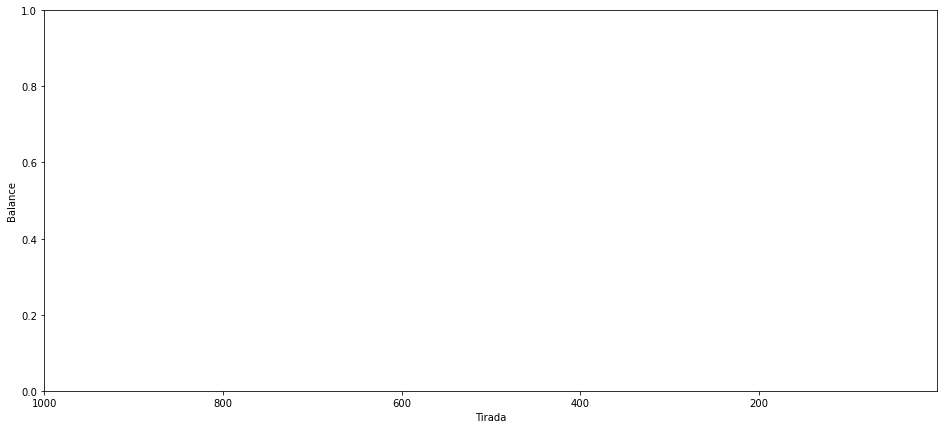

In [16]:
# Creando figura para los ejemplos de simulacion
fig = plt.figure(figsize=(16,7))
plt.xlabel("Tirada")
plt.ylabel("Balance")
#plt.#<COMPLETA>
plt.xlim(max_num_rolls)

En el siguiente código, tenemos un bucle for externo que itera a través de nuestro número predefinido de simulaciones (10 000 simulaciones) y un bucle while anidado que ejecuta cada juego (1000 tiradas). 

Antes de comenzar cada ciclo while, inicializamos el saldo del jugador como $1,000 (como una lista para fines de trazado) y un conteo de tiradas y ganancias.

    * Nuestro bucle while simulará el juego durante 1000 tiradas. Dentro de este bucle, lanzamos los dados y usamos la variable booleana devuelta por roll_dice() para determinar el resultado. Si los dados son del mismo número, agregamos 4 veces la apuesta a la lista de saldo y agregamos una ganancia al conteo de ganancias. Si los dados son diferentes, restamos la apuesta de la lista de saldo. Al final de cada lanzamiento, agregamos un conteo a nuestra lista num_rolls.

Una vez que el número de lanzamientos llega a 1000, podemos calcular la probabilidad de ganar del jugador como el número de ganancias dividido por el número total de lanzamientos. 

También podemos almacenar el saldo final del juego completo en la variable de seguimiento end_balance. Finalmente, podemos trazar las variables num_rolls y balance para agregar una línea a la figura que definimos anteriormente.

Text(0, 0.5, 'Balance')

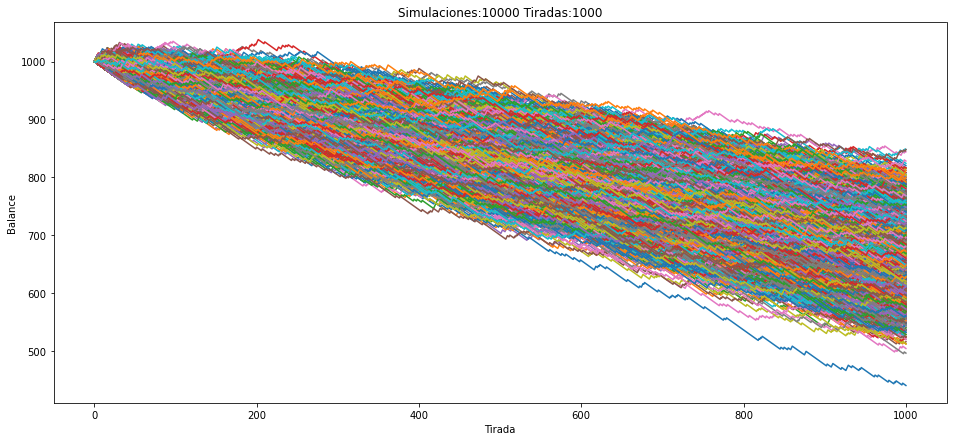

In [17]:
fig = plt.figure(figsize=(16,7))            
# For para ejecutar todas las simulaciones deseadas
for i in range(num_simulations):
#for i in range(1000):
    balance_sim = [1000]
    num_rolls = [0]
    num_wins = [0]
    win_probability_sim = [0]
    
    
    while num_rolls[-1] < max_num_rolls:
        dice = roll_dice()
        num_wins.append( num_wins[-1] + dice )
        num_rolls.append(num_rolls[-1] + 1)# Store tracking variables and add line to figure
        balance_sim.append(balance_sim[-1] -bet + multiplicador*(dice) )
        win_probability_sim.append(num_wins[-1]/num_rolls[-1])
        
        
    win_probability.append(win_probability_sim[-1])
    end_balance.append(balance_sim[-1])
    plt.plot(num_rolls,balance_sim)
    
    if DEBUG:
        for i,j,k,m in zip(num_rolls,num_wins,balance,win_probability_sim):
            print("tirada:",i,"wins:",j,'balance:',k,"win prob;",m)


plt.title("Simulaciones:"+str(num_simulations)+' Tiradas:'+str(max_num_rolls))            
plt.xlabel("Tirada")
plt.ylabel("Balance")


In [18]:
# Probabilidad promedio de victoria y saldo final
import numpy as np
overall_win_probability = np.mean(win_probability)
overall_end_balance = np.mean(end_balance)
print("Promedio de victorias despues de " + str(num_simulations) + " simulaciones: " + str(overall_win_probability))
print("Saldo promedio despues de " + str(num_simulations) + " simulaciones: $" + str(overall_end_balance))

Promedio de victorias despues de 10000 simulaciones: 0.16659054094590536
Saldo promedio despues de 10000 simulaciones: $666.3621637836217


## Desafio complementario

Ahora, realiza el mismo procedimiento pero mostrando los 
resultados para 10, 100, 1000 y 10000 lanzamientos, considerando 200, 2000 y 20000 simulaciones.

Como bien sabemos, cada que gana el individuo, la casa le pagaba 4 veces el valor de la apuesta.
Ahora, si gana, le pagaran 6 veces mas de lo apostado, siempre y cuando el individuo apueste de 3 en 3.

El monto inicial sería ahora de 800. ¿Cuánta diferencia existe entre los resultados obtenidos para cada escenario?
¿En cuales se tiene un porcentaje mayor de victoria? 

**Respuesta del equipo:** cuando apuesta de 3el promedio de balance es de ~$800, o sea, no ganan ni pierden.

Grafica estos resultados utilizando graficas de pastel y de barras y realiza una comparación entre ellos. 

Promedio de victorias despues de 2000 simulaciones: 0.16673713143428284
Saldo promedio despues de 2000 simulaciones: $800.5227386306847


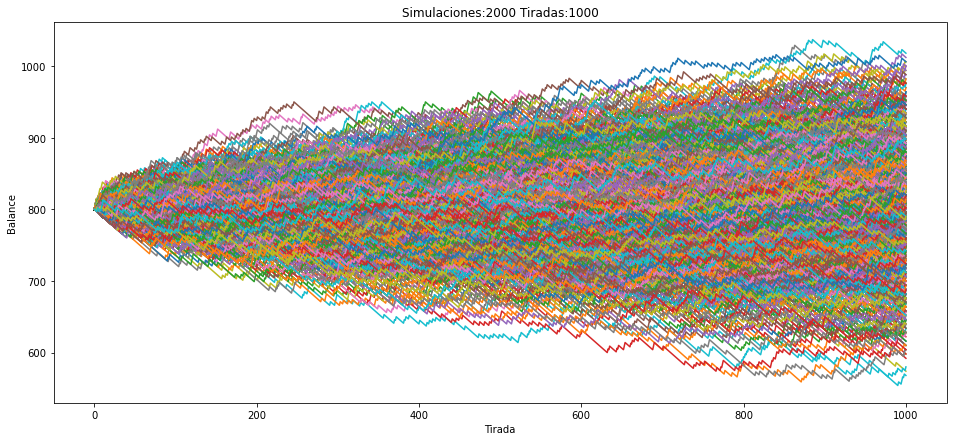

In [21]:
# Entradas
num_simulations = 2000 #Valor dado
max_num_rolls = 1000
bet = 3

# Seguimiento
win_probability = [0]
end_balance = [0]

# variables extras del equipo
# multiplicador nos dice cuánto se multiplica nuestra apuesta al ganar
multiplicador = 6
initialBalance = 800

fig = plt.figure(figsize=(16,7))            
# For para ejecutar todas las simulaciones deseadas
for i in range(num_simulations):
#for i in range(1000):
    balance_sim = [initialBalance]
    num_rolls = [0]
    num_wins = [0]
    win_probability_sim = [0]
    
    
    while num_rolls[-1] < max_num_rolls:
        dice = roll_dice()
        num_wins.append( num_wins[-1] + dice )
        num_rolls.append(num_rolls[-1] + 1)# Store tracking variables and add line to figure
        balance_sim.append(balance_sim[-1] -1 + multiplicador*(dice) )
        win_probability_sim.append(num_wins[-1]/num_rolls[-1])
        
        
    win_probability.append(win_probability_sim[-1])
    end_balance.append(balance_sim[-1])
    plt.plot(num_rolls,balance_sim)
    
    if DEBUG:
        for i,j,k,m in zip(num_rolls,num_wins,balance,win_probability_sim):
            print("tirada:",i,"wins:",j,'balance:',k,"win prob;",m)


plt.title("Simulaciones:"+str(num_simulations)+' Tiradas:'+str(max_num_rolls))            
plt.xlabel("Tirada")
plt.ylabel("Balance")

# Probabilidad promedio de victoria y saldo final
import numpy as np
overall_win_probability = np.mean(win_probability)
overall_end_balance = np.mean(end_balance)
print("Promedio de victorias despues de " + str(num_simulations) + " simulaciones: " + str(overall_win_probability))
print("Saldo promedio despues de " + str(num_simulations) + " simulaciones: $" + str(overall_end_balance))

## ¿Qué es web scrapping?

Es una técnica para recuperar grandes cantidades de datos de Internet.

-----

Existen diferentes técnicas como Scrappy, BeautifulSoup, etc. La librería más común es BeautifulSoup. 

Extrae la página Html de cualquier sitio web. Los datos almacenados por web Scrapping son un formato no estructurado. Convertimos los datos no estructurados en estructurados para el análisis y la exploración de datos.

------

### Bibliotecas utilizadas para Web Scraping

Como sabemos, Python se usa para varias aplicaciones y existen diferentes bibliotecas para diferentes propósitos. En nuestra demostración adicional, usaremos las siguientes bibliotecas:

   * BeautifulSoup: Beautiful Soup es un paquete de Python para analizar documentos HTML y XML. Crea árboles de análisis que son útiles para extraer los datos fácilmente.
   * Pandas: Pandas es una biblioteca que se utiliza para la manipulación y el análisis de datos. Se utiliza para extraer los datos y almacenarlos en el formato deseado.
   * Utilice matplotlib y seaborn para la visualización de datos

------
### ¿Cómo funciona el Web Scraping?

Cuando ejecuta el código para web scraping, se envía una solicitud a la URL que ha mencionado. Como respuesta a la solicitud, el servidor envía los datos y le permite leer la página HTML o XML. Luego, el código analiza la página HTML o XML, encuentra los datos y los extrae.

Para extraer datos utilizando web scraping con Python, debe seguir estos pasos básicos:

   * Busque la URL que desea raspar
   * Inspecciona la página
   * Encuentra los datos que quieres extraer
   * Escribe el codigo
   * Ejecute el código y extraiga los datos
   * Almacene los datos en el formato requerido

------

-------

### Datos del sitio web de Flipkart

Para comprobar cuál debería ser el precio óptimo de nuestro producto, estos precios pueden variar mucho. Entonces, vamos a mostrar cómo podemos obtener información relacionada con un producto en particular (computadora portátil).

Primero, importemos todas las bibliotecas necesarias:

In [4]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

Los datos que extraemos son datos no estructurados. Por eso, crearemos listas vacías para almacenarlas de forma estructurada

In [5]:
name=[]
prices=[]
ratings=[]
df = pd.DataFrame()

## Paso 1: busque la URL

Para este ejemplo, vamos a **raspar** (Scrap) el sitio web de **Flipkart** para extraer el nombre, el precio y la calificación de las computadoras portátiles. La URL de esta página es:

[Flipkart](https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.)

In [6]:
url = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY."

In [8]:
flipkart_response = requests.get(url)
flipkart_response

<Response [200]>

### Paso 2: inspección de la página

Los datos suelen estar anidados en etiquetas. Entonces, inspeccionamos la página para ver, bajo qué etiqueta están anidados los datos que queremos raspar. Para inspeccionar la página, simplemente haga clic derecho en el elemento y haga clic en "Inspeccionar" (o F12).

![img](https://miro.medium.com/max/571/0*TF2VBxPanqhxb-hY.png)

In [10]:
txt = '''
<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.a47a6a.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" sizes="72x72" href="/apple-touch-icon-72x72.png"/><link rel="apple-touch-icon" sizes="114x114" href="/apple-touch-icon-114x114.png"/><link rel="apple-touch-icon" sizes="144x144" href="/apple-touch-icon-144x144.png"/><link rel="apple-touch-icon" href="/apple-touch-icon-57x57.png"/><meta name="twitter:card" content="app"><meta name="twitter:site" content="@flipkart"><meta name="twitter:creator" content="@flipkart"><meta name="twitter:title" content="Laptops- Buy Products Online at Best Price in India - All Categories | Flipkart.com"><meta name="twitter:description" content="Shop for electronics, apparels & more using our Flipkart app Free shipping & COD."><meta name="twitter:app:country" content="in"><meta name="al:ios:app_name" content="Flipkart"><meta name="al:ios:app_store_id" content="742044692"><meta name="twitter:app:name:iphone" content="Flipkart"><meta name="twitter:app:id:iphone" content="742044692"><meta name="twitter:app:url:iphone" content="http://dl.flipkart.com/dl/home?"><meta name="twitter:app:name:ipad" content="Flipkart"><meta name="twitter:app:id:ipad" content="742044692"><meta name="twitter:app:url:ipad" content="http://dl.flipkart.com/dl/home?"><meta name="twitter:app:name:googleplay" content="Flipkart"><meta name="twitter:app:id:googleplay" content="com.flipkart.android"><meta name="twitter:app:url:googleplay" content="http://dl.flipkart.com/dl/home?"><style>#container {
			height: 100%;
		}</style> <script src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/js/runtime.92305f0e.js" defer="defer" crossorigin="anonymous"></script><script src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/js/vendor.chunk.e15fff75.js" defer="defer" crossorigin="anonymous"></script><script src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/js/app_modules.chunk.cb523517.js" defer="defer" crossorigin="anonymous"></script><script src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/js/app_common.chunk.735779d7.js" defer="defer" crossorigin="anonymous"></script><script src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/js/app.chunk.d45da6cd.js" defer="defer" crossorigin="anonymous"></script> <link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/Browse.chunk.1da65c.css"/><title>Laptops- Buy Products Online at Best Price in India - All Categories | Flipkart.com</title><meta name="og_title" property="og:title" content="Laptops- Buy Products Online at Best Price in India - All Categories | Flipkart.com"/><meta name="Keywords" content="Laptops"/> <meta name="Description" content="Laptops- Buy Products Online at Best Price in India. India&#x27;s Leading E-commerce Company - Free Home Delivery - All Categories | Flipkart.com"/><meta property="og:description" content="Laptops- Buy Products Online at Best Price in India. India&#x27;s Leading E-commerce Company - Free Home Delivery - All Categories | Flipkart.com"/> <meta name="robots" content="noindex"/>   <meta name="msvalidate.01" content="F4EEB3A0AFFDD385992A06E6920C0AC3"/> <!--[if IE 9 ]>
	<script nonce="14504741762841117010">
		window.browserVersion = 'IE9';
		document.documentElement.className += ' ie9';
	</script>
	<![endif]--><!--[if !IE]><!--><script nonce="14504741762841117010">if (/*@cc_on!@*/false) {
			window.browserVersion = 'IE10';
			document.documentElement.className += ' ie10';
		}</script><!--<![endif]--> <script nonce="14504741762841117010">;window.NREUM||(NREUM={});NREUM.init={distributed_tracing:{enabled:true},privacy:{cookies_enabled:true},ajax:{deny_list:["bam.nr-data.net"]}};

			;NREUM.loader_config={accountID:"3700282",trustKey:"3679896",agentID:"1588759528",licenseKey:"NRJS-dd5f16cdf95712c6cba",applicationID:"1588759528"}
			;NREUM.info={beacon:"bam.nr-data.net",errorBeacon:"bam.nr-data.net",licenseKey:"NRJS-dd5f16cdf95712c6cba",applicationID:"1588759528",sa:1}
			window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{s.console&&console.log(t)}catch(e){}}var o,i=t("ee"),a=t(31),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1&&(s.dev=!0),o.indexOf("nr_dev")!==-1&&(s.nrDev=!0))}catch(c){}s.nrDev&&i.on("internal-error",function(t){r(t.stack)}),s.dev&&i.on("fn-err",function(t,e,n){r(n.stack)}),s.dev&&(r("NR AGENT IN DEVELOPMENT MODE"),r("flags: "+a(s,function(t,e){return t}).join(", ")))},{}],2:[function(t,e,n){function r(t,e,n,r,s){try{l?l-=1:o(s||new UncaughtException(t,e,n),!0)}catch(f){try{i("ierr",[f,c.now(),!0])}catch(d){}}return"function"==typeof u&&u.apply(this,a(arguments))}function UncaughtException(t,e,n){this.message=t||"Uncaught error with no additional information",this.sourceURL=e,this.line=n}function o(t,e){var n=e?null:c.now();i("err",[t,n])}var i=t("handle"),a=t(32),s=t("ee"),c=t("loader"),f=t("gos"),u=window.onerror,d=!1,p="nr@seenError";if(!c.disabled){var l=0;c.features.err=!0,t(1),window.onerror=r;try{throw new Error}catch(h){"stack"in h&&(t(14),t(13),"addEventListener"in window&&t(7),c.xhrWrappable&&t(15),d=!0)}s.on("fn-start",function(t,e,n){d&&(l+=1)}),s.on("fn-err",function(t,e,n){d&&!n[p]&&(f(n,p,function(){return!0}),this.thrown=!0,o(n))}),s.on("fn-end",function(){d&&!this.thrown&&l>0&&(l-=1)}),s.on("internal-error",function(t){i("ierr",[t,c.now(),!0])})}},{}],3:[function(t,e,n){var r=t("loader");r.disabled||(r.features.ins=!0)},{}],4:[function(t,e,n){function r(){U++,L=g.hash,this[u]=y.now()}function o(){U--,g.hash!==L&&i(0,!0);var t=y.now();this[h]=~~this[h]+t-this[u],this[d]=t}function i(t,e){E.emit("newURL",[""+g,e])}function a(t,e){t.on(e,function(){this[e]=y.now()})}var s="-start",c="-end",f="-body",u="fn"+s,d="fn"+c,p="cb"+s,l="cb"+c,h="jsTime",m="fetch",v="addEventListener",w=window,g=w.location,y=t("loader");if(w[v]&&y.xhrWrappable&&!y.disabled){var x=t(11),b=t(12),E=t(9),R=t(7),O=t(14),T=t(8),S=t(15),P=t(10),M=t("ee"),C=M.get("tracer"),N=t(23);t(17),y.features.spa=!0;var L,U=0;M.on(u,r),b.on(p,r),P.on(p,r),M.on(d,o),b.on(l,o),P.on(l,o),M.buffer([u,d,"xhr-resolved"]),R.buffer([u]),O.buffer(["setTimeout"+c,"clearTimeout"+s,u]),S.buffer([u,"new-xhr","send-xhr"+s]),T.buffer([m+s,m+"-done",m+f+s,m+f+c]),E.buffer(["newURL"]),x.buffer([u]),b.buffer(["propagate",p,l,"executor-err","resolve"+s]),C.buffer([u,"no-"+u]),P.buffer(["new-jsonp","cb-start","jsonp-error","jsonp-end"]),a(T,m+s),a(T,m+"-done"),a(P,"new-jsonp"),a(P,"jsonp-end"),a(P,"cb-start"),E.on("pushState-end",i),E.on("replaceState-end",i),w[v]("hashchange",i,N(!0)),w[v]("load",i,N(!0)),w[v]("popstate",function(){i(0,U>1)},N(!0))}},{}],5:[function(t,e,n){function r(){var t=new PerformanceObserver(function(t,e){var n=t.getEntries();s(v,[n])});try{t.observe({entryTypes:["resource"]})}catch(e){}}function o(t){if(s(v,[window.performance.getEntriesByType(w)]),window.performance["c"+p])try{window.performance[h](m,o,!1)}catch(t){}else try{window.performance[h]("webkit"+m,o,!1)}catch(t){}}function i(t){}if(window.performance&&window.performance.timing&&window.performance.getEntriesByType){var a=t("ee"),s=t("handle"),c=t(14),f=t(13),u=t(6),d=t(23),p="learResourceTimings",l="addEventListener",h="removeEventListener",m="resourcetimingbufferfull",v="bstResource",w="resource",g="-start",y="-end",x="fn"+g,b="fn"+y,E="bstTimer",R="pushState",O=t("loader");if(!O.disabled){O.features.stn=!0,t(9),"addEventListener"in window&&t(7);var T=NREUM.o.EV;a.on(x,function(t,e){var n=t[0];n instanceof T&&(this.bstStart=O.now())}),a.on(b,function(t,e){var n=t[0];n instanceof T&&s("bst",[n,e,this.bstStart,O.now()])}),c.on(x,function(t,e,n){this.bstStart=O.now(),this.bstType=n}),c.on(b,function(t,e){s(E,[e,this.bstStart,O.now(),this.bstType])}),f.on(x,function(){this.bstStart=O.now()}),f.on(b,function(t,e){s(E,[e,this.bstStart,O.now(),"requestAnimationFrame"])}),a.on(R+g,function(t){this.time=O.now(),this.startPath=location.pathname+location.hash}),a.on(R+y,function(t){s("bstHist",[location.pathname+location.hash,this.startPath,this.time])}),u()?(s(v,[window.performance.getEntriesByType("resource")]),r()):l in window.performance&&(window.performance["c"+p]?window.performance[l](m,o,d(!1)):window.performance[l]("webkit"+m,o,d(!1))),document[l]("scroll",i,d(!1)),document[l]("keypress",i,d(!1)),document[l]("click",i,d(!1))}}},{}],6:[function(t,e,n){e.exports=function(){return"PerformanceObserver"in window&&"function"==typeof window.PerformanceObserver}},{}],7:[function(t,e,n){function r(t){for(var e=t;e&&!e.hasOwnProperty(u);)e=Object.getPrototypeOf(e);e&&o(e)}function o(t){s.inPlace(t,[u,d],"-",i)}function i(t,e){return t[1]}var a=t("ee").get("events"),s=t("wrap-function")(a,!0),c=t("gos"),f=XMLHttpRequest,u="addEventListener",d="removeEventListener";e.exports=a,"getPrototypeOf"in Object?(r(document),r(window),r(f.prototype)):f.prototype.hasOwnProperty(u)&&(o(window),o(f.prototype)),a.on(u+"-start",function(t,e){var n=t[1];if(null!==n&&("function"==typeof n||"object"==typeof n)){var r=c(n,"nr@wrapped",function(){function t(){if("function"==typeof n.handleEvent)return n.handleEvent.apply(n,arguments)}var e={object:t,"function":n}[typeof n];return e?s(e,"fn-",null,e.name||"anonymous"):n});this.wrapped=t[1]=r}}),a.on(d+"-start",function(t){t[1]=this.wrapped||t[1]})},{}],8:[function(t,e,n){function r(t,e,n){var r=t[e];"function"==typeof r&&(t[e]=function(){var t=i(arguments),e={};o.emit(n+"before-start",[t],e);var a;e[m]&&e[m].dt&&(a=e[m].dt);var s=r.apply(this,t);return o.emit(n+"start",[t,a],s),s.then(function(t){return o.emit(n+"end",[null,t],s),t},function(t){throw o.emit(n+"end",[t],s),t})})}var o=t("ee").get("fetch"),i=t(32),a=t(31);e.exports=o;var s=window,c="fetch-",f=c+"body-",u=["arrayBuffer","blob","json","text","formData"],d=s.Request,p=s.Response,l=s.fetch,h="prototype",m="nr@context";d&&p&&l&&(a(u,function(t,e){r(d[h],e,f),r(p[h],e,f)}),r(s,"fetch",c),o.on(c+"end",function(t,e){var n=this;if(e){var r=e.headers.get("content-length");null!==r&&(n.rxSize=r),o.emit(c+"done",[null,e],n)}else o.emit(c+"done",[t],n)}))},{}],9:[function(t,e,n){var r=t("ee").get("history"),o=t("wrap-function")(r);e.exports=r;var i=window.history&&window.history.constructor&&window.history.constructor.prototype,a=window.history;i&&i.pushState&&i.replaceState&&(a=i),o.inPlace(a,["pushState","replaceState"],"-")},{}],10:[function(t,e,n){function r(t){function e(){f.emit("jsonp-end",[],l),t.removeEventListener("load",e,c(!1)),t.removeEventListener("error",n,c(!1))}function n(){f.emit("jsonp-error",[],l),f.emit("jsonp-end",[],l),t.removeEventListener("load",e,c(!1)),t.removeEventListener("error",n,c(!1))}var r=t&&"string"==typeof t.nodeName&&"script"===t.nodeName.toLowerCase();if(r){var o="function"==typeof t.addEventListener;if(o){var a=i(t.src);if(a){var d=s(a),p="function"==typeof d.parent[d.key];if(p){var l={};u.inPlace(d.parent,[d.key],"cb-",l),t.addEventListener("load",e,c(!1)),t.addEventListener("error",n,c(!1)),f.emit("new-jsonp",[t.src],l)}}}}}function o(){return"addEventListener"in window}function i(t){var e=t.match(d);return e?e[1]:null}function a(t,e){var n=t.match(l),r=n[1],o=n[3];return o?a(o,e[r]):e[r]}function s(t){var e=t.match(p);return e&&e.length>=3?{key:e[2],parent:a(e[1],window)}:{key:t,parent:window}}var c=t(23),f=t("ee").get("jsonp"),u=t("wrap-function")(f);if(e.exports=f,o()){var d=/[?&](?:callback|cb)=([^&#]+)/,p=/(.*)\.([^.]+)/,l=/^(\w+)(\.|$)(.*)$/,h=["appendChild","insertBefore","replaceChild"];Node&&Node.prototype&&Node.prototype.appendChild?u.inPlace(Node.prototype,h,"dom-"):(u.inPlace(HTMLElement.prototype,h,"dom-"),u.inPlace(HTMLHeadElement.prototype,h,"dom-"),u.inPlace(HTMLBodyElement.prototype,h,"dom-")),f.on("dom-start",function(t){r(t[0])})}},{}],11:[function(t,e,n){var r=t("ee").get("mutation"),o=t("wrap-function")(r),i=NREUM.o.MO;e.exports=r,i&&(window.MutationObserver=function(t){return this instanceof i?new i(o(t,"fn-")):i.apply(this,arguments)},MutationObserver.prototype=i.prototype)},{}],12:[function(t,e,n){function r(t){var e=i.context(),n=s(t,"executor-",e,null,!1),r=new f(n);return i.context(r).getCtx=function(){return e},r}var o=t("wrap-function"),i=t("ee").get("promise"),a=t("ee").getOrSetContext,s=o(i),c=t(31),f=NREUM.o.PR;e.exports=i,f&&(window.Promise=r,["all","race"].forEach(function(t){var e=f[t];f[t]=function(n){function r(t){return function(){i.emit("propagate",[null,!o],a,!1,!1),o=o||!t}}var o=!1;c(n,function(e,n){Promise.resolve(n).then(r("all"===t),r(!1))});var a=e.apply(f,arguments),s=f.resolve(a);return s}}),["resolve","reject"].forEach(function(t){var e=f[t];f[t]=function(t){var n=e.apply(f,arguments);return t!==n&&i.emit("propagate",[t,!0],n,!1,!1),n}}),f.prototype["catch"]=function(t){return this.then(null,t)},f.prototype=Object.create(f.prototype,{constructor:{value:r}}),c(Object.getOwnPropertyNames(f),function(t,e){try{r[e]=f[e]}catch(n){}}),o.wrapInPlace(f.prototype,"then",function(t){return function(){var e=this,n=o.argsToArray.apply(this,arguments),r=a(e);r.promise=e,n[0]=s(n[0],"cb-",r,null,!1),n[1]=s(n[1],"cb-",r,null,!1);var c=t.apply(this,n);return r.nextPromise=c,i.emit("propagate",[e,!0],c,!1,!1),c}}),i.on("executor-start",function(t){t[0]=s(t[0],"resolve-",this,null,!1),t[1]=s(t[1],"resolve-",this,null,!1)}),i.on("executor-err",function(t,e,n){t[1](n)}),i.on("cb-end",function(t,e,n){i.emit("propagate",[n,!0],this.nextPromise,!1,!1)}),i.on("propagate",function(t,e,n){this.getCtx&&!e||(this.getCtx=function(){if(t instanceof Promise)var e=i.context(t);return e&&e.getCtx?e.getCtx():this})}),r.toString=function(){return""+f})},{}],13:[function(t,e,n){var r=t("ee").get("raf"),o=t("wrap-function")(r),i="equestAnimationFrame";e.exports=r,o.inPlace(window,["r"+i,"mozR"+i,"webkitR"+i,"msR"+i],"raf-"),r.on("raf-start",function(t){t[0]=o(t[0],"fn-")})},{}],14:[function(t,e,n){function r(t,e,n){t[0]=a(t[0],"fn-",null,n)}function o(t,e,n){this.method=n,this.timerDuration=isNaN(t[1])?0:+t[1],t[0]=a(t[0],"fn-",this,n)}var i=t("ee").get("timer"),a=t("wrap-function")(i),s="setTimeout",c="setInterval",f="clearTimeout",u="-start",d="-";e.exports=i,a.inPlace(window,[s,"setImmediate"],s+d),a.inPlace(window,[c],c+d),a.inPlace(window,[f,"clearImmediate"],f+d),i.on(c+u,r),i.on(s+u,o)},{}],15:[function(t,e,n){function r(t,e){d.inPlace(e,["onreadystatechange"],"fn-",s)}function o(){var t=this,e=u.context(t);t.readyState>3&&!e.resolved&&(e.resolved=!0,u.emit("xhr-resolved",[],t)),d.inPlace(t,y,"fn-",s)}function i(t){x.push(t),m&&(E?E.then(a):w?w(a):(R=-R,O.data=R))}function a(){for(var t=0;t<x.length;t++)r([],x[t]);x.length&&(x=[])}function s(t,e){return e}function c(t,e){for(var n in t)e[n]=t[n];return e}t(7);var f=t("ee"),u=f.get("xhr"),d=t("wrap-function")(u),p=t(23),l=NREUM.o,h=l.XHR,m=l.MO,v=l.PR,w=l.SI,g="readystatechange",y=["onload","onerror","onabort","onloadstart","onloadend","onprogress","ontimeout"],x=[];e.exports=u;var b=window.XMLHttpRequest=function(t){var e=new h(t);try{u.emit("new-xhr",[e],e),e.addEventListener(g,o,p(!1))}catch(n){try{u.emit("internal-error",[n])}catch(r){}}return e};if(c(h,b),b.prototype=h.prototype,d.inPlace(b.prototype,["open","send"],"-xhr-",s),u.on("send-xhr-start",function(t,e){r(t,e),i(e)}),u.on("open-xhr-start",r),m){var E=v&&v.resolve();if(!w&&!v){var R=1,O=document.createTextNode(R);new m(a).observe(O,{characterData:!0})}}else f.on("fn-end",function(t){t[0]&&t[0].type===g||a()})},{}],16:[function(t,e,n){function r(t){if(!s(t))return null;var e=window.NREUM;if(!e.loader_config)return null;var n=(e.loader_config.accountID||"").toString()||null,r=(e.loader_config.agentID||"").toString()||null,f=(e.loader_config.trustKey||"").toString()||null;if(!n||!r)return null;var h=l.generateSpanId(),m=l.generateTraceId(),v=Date.now(),w={spanId:h,traceId:m,timestamp:v};return(t.sameOrigin||c(t)&&p())&&(w.traceContextParentHeader=o(h,m),w.traceContextStateHeader=i(h,v,n,r,f)),(t.sameOrigin&&!u()||!t.sameOrigin&&c(t)&&d())&&(w.newrelicHeader=a(h,m,v,n,r,f)),w}function o(t,e){return"00-"+e+"-"+t+"-01"}function i(t,e,n,r,o){var i=0,a="",s=1,c="",f="";return o+"@nr="+i+"-"+s+"-"+n+"-"+r+"-"+t+"-"+a+"-"+c+"-"+f+"-"+e}function a(t,e,n,r,o,i){var a="btoa"in window&&"function"==typeof window.btoa;if(!a)return null;var s={v:[0,1],d:{ty:"Browser",ac:r,ap:o,id:t,tr:e,ti:n}};return i&&r!==i&&(s.d.tk=i),btoa(JSON.stringify(s))}function s(t){return f()&&c(t)}function c(t){var e=!1,n={};if("init"in NREUM&&"distributed_tracing"in NREUM.init&&(n=NREUM.init.distributed_tracing),t.sameOrigin)e=!0;else if(n.allowed_origins instanceof Array)for(var r=0;r<n.allowed_origins.length;r++){var o=h(n.allowed_origins[r]);if(t.hostname===o.hostname&&t.protocol===o.protocol&&t.port===o.port){e=!0;break}}return e}function f(){return"init"in NREUM&&"distributed_tracing"in NREUM.init&&!!NREUM.init.distributed_tracing.enabled}function u(){return"init"in NREUM&&"distributed_tracing"in NREUM.init&&!!NREUM.init.distributed_tracing.exclude_newrelic_header}function d(){return"init"in NREUM&&"distributed_tracing"in NREUM.init&&NREUM.init.distributed_tracing.cors_use_newrelic_header!==!1}function p(){return"init"in NREUM&&"distributed_tracing"in NREUM.init&&!!NREUM.init.distributed_tracing.cors_use_tracecontext_headers}var l=t(28),h=t(18);e.exports={generateTracePayload:r,shouldGenerateTrace:s}},{}],17:[function(t,e,n){function r(t){var e=this.params,n=this.metrics;if(!this.ended){this.ended=!0;for(var r=0;r<p;r++)t.removeEventListener(d[r],this.listener,!1);return e.protocol&&"data"===e.protocol?void g("Ajax/DataUrl/Excluded"):void(e.aborted||(n.duration=a.now()-this.startTime,this.loadCaptureCalled||4!==t.readyState?null==e.status&&(e.status=0):i(this,t),n.cbTime=this.cbTime,s("xhr",[e,n,this.startTime,this.endTime,"xhr"],this)))}}function o(t,e){var n=c(e),r=t.params;r.hostname=n.hostname,r.port=n.port,r.protocol=n.protocol,r.host=n.hostname+":"+n.port,r.pathname=n.pathname,t.parsedOrigin=n,t.sameOrigin=n.sameOrigin}function i(t,e){t.params.status=e.status;var n=v(e,t.lastSize);if(n&&(t.metrics.rxSize=n),t.sameOrigin){var r=e.getResponseHeader("X-NewRelic-App-Data");r&&(t.params.cat=r.split(", ").pop())}t.loadCaptureCalled=!0}var a=t("loader");if(a.xhrWrappable&&!a.disabled){var s=t("handle"),c=t(18),f=t(16).generateTracePayload,u=t("ee"),d=["load","error","abort","timeout"],p=d.length,l=t("id"),h=t(24),m=t(22),v=t(19),w=t(23),g=t(25).recordSupportability,y=NREUM.o.REQ,x=window.XMLHttpRequest;a.features.xhr=!0,t(15),t(8),u.on("new-xhr",function(t){var e=this;e.totalCbs=0,e.called=0,e.cbTime=0,e.end=r,e.ended=!1,e.xhrGuids={},e.lastSize=null,e.loadCaptureCalled=!1,e.params=this.params||{},e.metrics=this.metrics||{},t.addEventListener("load",function(n){i(e,t)},w(!1)),h&&(h>34||h<10)||t.addEventListener("progress",function(t){e.lastSize=t.loaded},w(!1))}),u.on("open-xhr-start",function(t){this.params={method:t[0]},o(this,t[1]),this.metrics={}}),u.on("open-xhr-end",function(t,e){"loader_config"in NREUM&&"xpid"in NREUM.loader_config&&this.sameOrigin&&e.setRequestHeader("X-NewRelic-ID",NREUM.loader_config.xpid);var n=f(this.parsedOrigin);if(n){var r=!1;n.newrelicHeader&&(e.setRequestHeader("newrelic",n.newrelicHeader),r=!0),n.traceContextParentHeader&&(e.setRequestHeader("traceparent",n.traceContextParentHeader),n.traceContextStateHeader&&e.setRequestHeader("tracestate",n.traceContextStateHeader),r=!0),r&&(this.dt=n)}}),u.on("send-xhr-start",function(t,e){var n=this.metrics,r=t[0],o=this;if(n&&r){var i=m(r);i&&(n.txSize=i)}this.startTime=a.now(),this.listener=function(t){try{"abort"!==t.type||o.loadCaptureCalled||(o.params.aborted=!0),("load"!==t.type||o.called===o.totalCbs&&(o.onloadCalled||"function"!=typeof e.onload))&&o.end(e)}catch(n){try{u.emit("internal-error",[n])}catch(r){}}};for(var s=0;s<p;s++)e.addEventListener(d[s],this.listener,w(!1))}),u.on("xhr-cb-time",function(t,e,n){this.cbTime+=t,e?this.onloadCalled=!0:this.called+=1,this.called!==this.totalCbs||!this.onloadCalled&&"function"==typeof n.onload||this.end(n)}),u.on("xhr-load-added",function(t,e){var n=""+l(t)+!!e;this.xhrGuids&&!this.xhrGuids[n]&&(this.xhrGuids[n]=!0,this.totalCbs+=1)}),u.on("xhr-load-removed",function(t,e){var n=""+l(t)+!!e;this.xhrGuids&&this.xhrGuids[n]&&(delete this.xhrGuids[n],this.totalCbs-=1)}),u.on("xhr-resolved",function(){this.endTime=a.now()}),u.on("addEventListener-end",function(t,e){e instanceof x&&"load"===t[0]&&u.emit("xhr-load-added",[t[1],t[2]],e)}),u.on("removeEventListener-end",function(t,e){e instanceof x&&"load"===t[0]&&u.emit("xhr-load-removed",[t[1],t[2]],e)}),u.on("fn-start",function(t,e,n){e instanceof x&&("onload"===n&&(this.onload=!0),("load"===(t[0]&&t[0].type)||this.onload)&&(this.xhrCbStart=a.now()))}),u.on("fn-end",function(t,e){this.xhrCbStart&&u.emit("xhr-cb-time",[a.now()-this.xhrCbStart,this.onload,e],e)}),u.on("fetch-before-start",function(t){function e(t,e){var n=!1;return e.newrelicHeader&&(t.set("newrelic",e.newrelicHeader),n=!0),e.traceContextParentHeader&&(t.set("traceparent",e.traceContextParentHeader),e.traceContextStateHeader&&t.set("tracestate",e.traceContextStateHeader),n=!0),n}var n,r=t[1]||{};"string"==typeof t[0]?n=t[0]:t[0]&&t[0].url?n=t[0].url:window.URL&&t[0]&&t[0]instanceof URL&&(n=t[0].href),n&&(this.parsedOrigin=c(n),this.sameOrigin=this.parsedOrigin.sameOrigin);var o=f(this.parsedOrigin);if(o&&(o.newrelicHeader||o.traceContextParentHeader))if("string"==typeof t[0]||window.URL&&t[0]&&t[0]instanceof URL){var i={};for(var a in r)i[a]=r[a];i.headers=new Headers(r.headers||{}),e(i.headers,o)&&(this.dt=o),t.length>1?t[1]=i:t.push(i)}else t[0]&&t[0].headers&&e(t[0].headers,o)&&(this.dt=o)}),u.on("fetch-start",function(t,e){this.params={},this.metrics={},this.startTime=a.now(),this.dt=e,t.length>=1&&(this.target=t[0]),t.length>=2&&(this.opts=t[1]);var n,r=this.opts||{},i=this.target;if("string"==typeof i?n=i:"object"==typeof i&&i instanceof y?n=i.url:window.URL&&"object"==typeof i&&i instanceof URL&&(n=i.href),o(this,n),"data"!==this.params.protocol){var s=(""+(i&&i instanceof y&&i.method||r.method||"GET")).toUpperCase();this.params.method=s,this.txSize=m(r.body)||0}}),u.on("fetch-done",function(t,e){if(this.endTime=a.now(),this.params||(this.params={}),"data"===this.params.protocol)return void g("Ajax/DataUrl/Excluded");this.params.status=e?e.status:0;var n;"string"==typeof this.rxSize&&this.rxSize.length>0&&(n=+this.rxSize);var r={txSize:this.txSize,rxSize:n,duration:a.now()-this.startTime};s("xhr",[this.params,r,this.startTime,this.endTime,"fetch"],this)})}},{}],18:[function(t,e,n){var r={};e.exports=function(t){if(t in r)return r[t];if(0===(t||"").indexOf("data:"))return{protocol:"data"};var e=document.createElement("a"),n=window.location,o={};e.href=t,o.port=e.port;var i=e.href.split("://");!o.port&&i[1]&&(o.port=i[1].split("/")[0].split("@").pop().split(":")[1]),o.port&&"0"!==o.port||(o.port="https"===i[0]?"443":"80"),o.hostname=e.hostname||n.hostname,o.pathname=e.pathname,o.protocol=i[0],"/"!==o.pathname.charAt(0)&&(o.pathname="/"+o.pathname);var a=!e.protocol||":"===e.protocol||e.protocol===n.protocol,s=e.hostname===document.domain&&e.port===n.port;return o.sameOrigin=a&&(!e.hostname||s),"/"===o.pathname&&(r[t]=o),o}},{}],19:[function(t,e,n){function r(t,e){var n=t.responseType;return"json"===n&&null!==e?e:"arraybuffer"===n||"blob"===n||"json"===n?o(t.response):"text"===n||""===n||void 0===n?o(t.responseText):void 0}var o=t(22);e.exports=r},{}],20:[function(t,e,n){function r(){}function o(t,e,n,r){return function(){return u.recordSupportability("API/"+e+"/called"),i(t+e,[f.now()].concat(s(arguments)),n?null:this,r),n?void 0:this}}var i=t("handle"),a=t(31),s=t(32),c=t("ee").get("tracer"),f=t("loader"),u=t(25),d=NREUM;"undefined"==typeof window.newrelic&&(newrelic=d);var p=["setPageViewName","setCustomAttribute","setErrorHandler","finished","addToTrace","inlineHit","addRelease"],l="api-",h=l+"ixn-";a(p,function(t,e){d[e]=o(l,e,!0,"api")}),d.addPageAction=o(l,"addPageAction",!0),d.setCurrentRouteName=o(l,"routeName",!0),e.exports=newrelic,d.interaction=function(){return(new r).get()};var m=r.prototype={createTracer:function(t,e){var n={},r=this,o="function"==typeof e;return i(h+"tracer",[f.now(),t,n],r),function(){if(c.emit((o?"":"no-")+"fn-start",[f.now(),r,o],n),o)try{return e.apply(this,arguments)}catch(t){throw c.emit("fn-err",[arguments,this,t],n),t}finally{c.emit("fn-end",[f.now()],n)}}}};a("actionText,setName,setAttribute,save,ignore,onEnd,getContext,end,get".split(","),function(t,e){m[e]=o(h,e)}),newrelic.noticeError=function(t,e){"string"==typeof t&&(t=new Error(t)),u.recordSupportability("API/noticeError/called"),i("err",[t,f.now(),!1,e])}},{}],21:[function(t,e,n){function r(t){if(NREUM.init){for(var e=NREUM.init,n=t.split("."),r=0;r<n.length-1;r++)if(e=e[n[r]],"object"!=typeof e)return;return e=e[n[n.length-1]]}}e.exports={getConfiguration:r}},{}],22:[function(t,e,n){e.exports=function(t){if("string"==typeof t&&t.length)return t.length;if("object"==typeof t){if("undefined"!=typeof ArrayBuffer&&t instanceof ArrayBuffer&&t.byteLength)return t.byteLength;if("undefined"!=typeof Blob&&t instanceof Blob&&t.size)return t.size;if(!("undefined"!=typeof FormData&&t instanceof FormData))try{return JSON.stringify(t).length}catch(e){return}}}},{}],23:[function(t,e,n){var r=!1;try{var o=Object.defineProperty({},"passive",{get:function(){r=!0}});window.addEventListener("testPassive",null,o),window.removeEventListener("testPassive",null,o)}catch(i){}e.exports=function(t){return r?{passive:!0,capture:!!t}:!!t}},{}],24:[function(t,e,n){var r=0,o=navigator.userAgent.match(/Firefox[\/\s](\d+\.\d+)/);o&&(r=+o[1]),e.exports=r},{}],25:[function(t,e,n){function r(t,e){var n=[a,t,{name:t},e];return i("storeMetric",n,null,"api"),n}function o(t,e){var n=[s,t,{name:t},e];return i("storeEventMetrics",n,null,"api"),n}var i=t("handle"),a="sm",s="cm";e.exports={constants:{SUPPORTABILITY_METRIC:a,CUSTOM_METRIC:s},recordSupportability:r,recordCustom:o}},{}],26:[function(t,e,n){function r(){return s.exists&&performance.now?Math.round(performance.now()):(i=Math.max((new Date).getTime(),i))-a}function o(){return i}var i=(new Date).getTime(),a=i,s=t(33);e.exports=r,e.exports.offset=a,e.exports.getLastTimestamp=o},{}],27:[function(t,e,n){function r(t,e){var n=t.getEntries();n.forEach(function(t){"first-paint"===t.name?l("timing",["fp",Math.floor(t.startTime)]):"first-contentful-paint"===t.name&&l("timing",["fcp",Math.floor(t.startTime)])})}function o(t,e){var n=t.getEntries();if(n.length>0){var r=n[n.length-1];if(f&&f<r.startTime)return;var o=[r],i=a({});i&&o.push(i),l("lcp",o)}}function i(t){t.getEntries().forEach(function(t){t.hadRecentInput||l("cls",[t])})}function a(t){var e=navigator.connection||navigator.mozConnection||navigator.webkitConnection;if(e)return e.type&&(t["net-type"]=e.type),e.effectiveType&&(t["net-etype"]=e.effectiveType),e.rtt&&(t["net-rtt"]=e.rtt),e.downlink&&(t["net-dlink"]=e.downlink),t}function s(t){if(t instanceof w&&!y){var e=Math.round(t.timeStamp),n={type:t.type};a(n),e<=h.now()?n.fid=h.now()-e:e>h.offset&&e<=Date.now()?(e-=h.offset,n.fid=h.now()-e):e=h.now(),y=!0,l("timing",["fi",e,n])}}function c(t){"hidden"===t&&(f=h.now(),l("pageHide",[f]))}if(!("init"in NREUM&&"page_view_timing"in NREUM.init&&"enabled"in NREUM.init.page_view_timing&&NREUM.init.page_view_timing.enabled===!1)){var f,u,d,p,l=t("handle"),h=t("loader"),m=t(30),v=t(23),w=NREUM.o.EV;if("PerformanceObserver"in window&&"function"==typeof window.PerformanceObserver){u=new PerformanceObserver(r);try{u.observe({entryTypes:["paint"]})}catch(g){}d=new PerformanceObserver(o);try{d.observe({entryTypes:["largest-contentful-paint"]})}catch(g){}p=new PerformanceObserver(i);try{p.observe({type:"layout-shift",buffered:!0})}catch(g){}}if("addEventListener"in document){var y=!1,x=["click","keydown","mousedown","pointerdown","touchstart"];x.forEach(function(t){document.addEventListener(t,s,v(!1))})}m(c)}},{}],28:[function(t,e,n){function r(){function t(){return e?15&e[n++]:16*Math.random()|0}var e=null,n=0,r=window.crypto||window.msCrypto;r&&r.getRandomValues&&(e=r.getRandomValues(new Uint8Array(31)));for(var o,i="xxxxxxxx-xxxx-4xxx-yxxx-xxxxxxxxxxxx",a="",s=0;s<i.length;s++)o=i[s],"x"===o?a+=t().toString(16):"y"===o?(o=3&t()|8,a+=o.toString(16)):a+=o;return a}function o(){return a(16)}function i(){return a(32)}function a(t){function e(){return n?15&n[r++]:16*Math.random()|0}var n=null,r=0,o=window.crypto||window.msCrypto;o&&o.getRandomValues&&Uint8Array&&(n=o.getRandomValues(new Uint8Array(t)));for(var i=[],a=0;a<t;a++)i.push(e().toString(16));return i.join("")}e.exports={generateUuid:r,generateSpanId:o,generateTraceId:i}},{}],29:[function(t,e,n){function r(t,e){if(!o)return!1;if(t!==o)return!1;if(!e)return!0;if(!i)return!1;for(var n=i.split("."),r=e.split("."),a=0;a<r.length;a++)if(r[a]!==n[a])return!1;return!0}var o=null,i=null,a=/Version\/(\S+)\s+Safari/;if(navigator.userAgent){var s=navigator.userAgent,c=s.match(a);c&&s.indexOf("Chrome")===-1&&s.indexOf("Chromium")===-1&&(o="Safari",i=c[1])}e.exports={agent:o,version:i,match:r}},{}],30:[function(t,e,n){function r(t){function e(){t(s&&document[s]?document[s]:document[i]?"hidden":"visible")}"addEventListener"in document&&a&&document.addEventListener(a,e,o(!1))}var o=t(23);e.exports=r;var i,a,s;"undefined"!=typeof document.hidden?(i="hidden",a="visibilitychange",s="visibilityState"):"undefined"!=typeof document.msHidden?(i="msHidden",a="msvisibilitychange"):"undefined"!=typeof document.webkitHidden&&(i="webkitHidden",a="webkitvisibilitychange",s="webkitVisibilityState")},{}],31:[function(t,e,n){function r(t,e){var n=[],r="",i=0;for(r in t)o.call(t,r)&&(n[i]=e(r,t[r]),i+=1);return n}var o=Object.prototype.hasOwnProperty;e.exports=r},{}],32:[function(t,e,n){function r(t,e,n){e||(e=0),"undefined"==typeof n&&(n=t?t.length:0);for(var r=-1,o=n-e||0,i=Array(o<0?0:o);++r<o;)i[r]=t[e+r];return i}e.exports=r},{}],33:[function(t,e,n){e.exports={exists:"undefined"!=typeof window.performance&&window.performance.timing&&"undefined"!=typeof window.performance.timing.navigationStart}},{}],ee:[function(t,e,n){function r(){}function o(t){function e(t){return t&&t instanceof r?t:t?f(t,c,a):a()}function n(n,r,o,i,a){if(a!==!1&&(a=!0),!l.aborted||i){t&&a&&t(n,r,o);for(var s=e(o),c=m(n),f=c.length,u=0;u<f;u++)c[u].apply(s,r);var p=d[y[n]];return p&&p.push([x,n,r,s]),s}}function i(t,e){g[t]=m(t).concat(e)}function h(t,e){var n=g[t];if(n)for(var r=0;r<n.length;r++)n[r]===e&&n.splice(r,1)}function m(t){return g[t]||[]}function v(t){return p[t]=p[t]||o(n)}function w(t,e){l.aborted||u(t,function(t,n){e=e||"feature",y[n]=e,e in d||(d[e]=[])})}var g={},y={},x={on:i,addEventListener:i,removeEventListener:h,emit:n,get:v,listeners:m,context:e,buffer:w,abort:s,aborted:!1};return x}function i(t){return f(t,c,a)}function a(){return new r}function s(){(d.api||d.feature)&&(l.aborted=!0,d=l.backlog={})}var c="nr@context",f=t("gos"),u=t(31),d={},p={},l=e.exports=o();e.exports.getOrSetContext=i,l.backlog=d},{}],gos:[function(t,e,n){function r(t,e,n){if(o.call(t,e))return t[e];var r=n();if(Object.defineProperty&&Object.keys)try{return Object.defineProperty(t,e,{value:r,writable:!0,enumerable:!1}),r}catch(i){}return t[e]=r,r}var o=Object.prototype.hasOwnProperty;e.exports=r},{}],handle:[function(t,e,n){function r(t,e,n,r){o.buffer([t],r),o.emit(t,e,n)}var o=t("ee").get("handle");e.exports=r,r.ee=o},{}],id:[function(t,e,n){function r(t){var e=typeof t;return!t||"object"!==e&&"function"!==e?-1:t===window?0:a(t,i,function(){return o++})}var o=1,i="nr@id",a=t("gos");e.exports=r},{}],loader:[function(t,e,n){function r(){if(!T++){var t=O.info=NREUM.info,e=m.getElementsByTagName("script")[0];if(setTimeout(f.abort,3e4),!(t&&t.licenseKey&&t.applicationID&&e))return f.abort();c(E,function(e,n){t[e]||(t[e]=n)});var n=a();s("mark",["onload",n+O.offset],null,"api"),s("timing",["load",n]);var r=m.createElement("script");0===t.agent.indexOf("http://")||0===t.agent.indexOf("https://")?r.src=t.agent:r.src=l+"://"+t.agent,e.parentNode.insertBefore(r,e)}}function o(){"complete"===m.readyState&&i()}function i(){s("mark",["domContent",a()+O.offset],null,"api")}var a=t(26),s=t("handle"),c=t(31),f=t("ee"),u=t(29),d=t(21),p=t(23),l=d.getConfiguration("ssl")===!1?"http":"https",h=window,m=h.document,v="addEventListener",w="attachEvent",g=h.XMLHttpRequest,y=g&&g.prototype,x=!1;NREUM.o={ST:setTimeout,SI:h.setImmediate,CT:clearTimeout,XHR:g,REQ:h.Request,EV:h.Event,PR:h.Promise,MO:h.MutationObserver};var b=""+location,E={beacon:"bam.nr-data.net",errorBeacon:"bam.nr-data.net",agent:"js-agent.newrelic.com/nr-spa-1216.min.js"},R=g&&y&&y[v]&&!/CriOS/.test(navigator.userAgent),O=e.exports={offset:a.getLastTimestamp(),now:a,origin:b,features:{},xhrWrappable:R,userAgent:u,disabled:x};if(!x){t(20),t(27),m[v]?(m[v]("DOMContentLoaded",i,p(!1)),h[v]("load",r,p(!1))):(m[w]("onreadystatechange",o),h[w]("onload",r)),s("mark",["firstbyte",a.getLastTimestamp()],null,"api");var T=0}},{}],"wrap-function":[function(t,e,n){function r(t,e){function n(e,n,r,c,f){function nrWrapper(){var i,a,u,p;try{a=this,i=d(arguments),u="function"==typeof r?r(i,a):r||{}}catch(l){o([l,"",[i,a,c],u],t)}s(n+"start",[i,a,c],u,f);try{return p=e.apply(a,i)}catch(h){throw s(n+"err",[i,a,h],u,f),h}finally{s(n+"end",[i,a,p],u,f)}}return a(e)?e:(n||(n=""),nrWrapper[p]=e,i(e,nrWrapper,t),nrWrapper)}function r(t,e,r,o,i){r||(r="");var s,c,f,u="-"===r.charAt(0);for(f=0;f<e.length;f++)c=e[f],s=t[c],a(s)||(t[c]=n(s,u?c+r:r,o,c,i))}function s(n,r,i,a){if(!h||e){var s=h;h=!0;try{t.emit(n,r,i,e,a)}catch(c){o([c,n,r,i],t)}h=s}}return t||(t=u),n.inPlace=r,n.flag=p,n}function o(t,e){e||(e=u);try{e.emit("internal-error",t)}catch(n){}}function i(t,e,n){if(Object.defineProperty&&Object.keys)try{var r=Object.keys(t);return r.forEach(function(n){Object.defineProperty(e,n,{get:function(){return t[n]},set:function(e){return t[n]=e,e}})}),e}catch(i){o([i],n)}for(var a in t)l.call(t,a)&&(e[a]=t[a]);return e}function a(t){return!(t&&t instanceof Function&&t.apply&&!t[p])}function s(t,e){var n=e(t);return n[p]=t,i(t,n,u),n}function c(t,e,n){var r=t[e];t[e]=s(r,n)}function f(){for(var t=arguments.length,e=new Array(t),n=0;n<t;++n)e[n]=arguments[n];return e}var u=t("ee"),d=t(32),p="nr@original",l=Object.prototype.hasOwnProperty,h=!1;e.exports=r,e.exports.wrapFunction=s,e.exports.wrapInPlace=c,e.exports.argsToArray=f},{}]},{},["loader",2,17,5,3,4]);if(window.newrelic){if(window.newrelic.addRelease){window.newrelic.addRelease("fk-cp-zion", "5.20.0")}if(window.newrelic.setCurrentRouteName){window.newrelic.setCurrentRouteName("Search")}if(window.newrelic.setCustomAttribute){window.newrelic.setCustomAttribute("releaseId","5.20.0");window.newrelic.setCustomAttribute("deviceId", "TI167780490053400136135891022817433497584257349475864796147942263577");}}</script>  <link href="https://www.flipkart.com/search?q&#x3D;laptops&amp;otracker&#x3D;search&amp;otracker1&#x3D;search&amp;marketplace&#x3D;FLIPKART&amp;as-show&#x3D;on&amp;as&#x3D;off&amp;as-pos&#x3D;1&amp;as-type&#x3D;HISTORY.&amp;page&#x3D;2" id="next-page-link-tag" rel="next"><script nonce="14504741762841117010">!function(){if("PerformancePaintTiming" in window){var e=window.__perf={e:[]};e.o=new PerformanceObserver(function(n){e.e=e.e.concat(n.getEntries())});try{e.o.observe({entryTypes:["paint"]})}catch(e){}}}();

		if (requestAnimationFrame && performance && performance.mark) {
			requestAnimationFrame(function () {
				window.first_paint = performance.now();
				performance.mark("first_paint");
			});
		}

        // web-vitals polyfill for FID
        !function(n,e){var t,o,i,c=[],f={passive:!0,capture:!0},r=new Date,a="pointerup",u="pointercancel";function p(n,c){t||(t=c,o=n,i=new Date,w(e),s())}function s(){o>=0&&o<i-r&&(c.forEach(function(n){n(o,t)}),c=[])}function l(t){if(t.cancelable){var o=(t.timeStamp>1e12?new Date:performance.now())-t.timeStamp;"pointerdown"==t.type?function(t,o){function i(){p(t,o),r()}function c(){r()}function r(){e(a,i,f),e(u,c,f)}n(a,i,f),n(u,c,f)}(o,t):p(o,t)}}function w(n){["click","mousedown","keydown","touchstart","pointerdown"].forEach(function(e){n(e,l,f)})}w(n),self.perfMetrics=self.perfMetrics||{},self.perfMetrics.onFirstInputDelay=function(n){c.push(n),s()}}(addEventListener,removeEventListener);</script><script async src="https://www.googletagmanager.com/gtag/js?id=AW-594691041"></script><script nonce="14504741762841117010">window.dataLayer = window.dataLayer || [];
		function gtag(){dataLayer.push(arguments)};
		gtag('js', new Date());</script></head><body><div id="container"><div><div class="_1kfTjk"><div class="_1rH5Jn"><div class="_1TmfNK"></div><div class="_2Xfa2_"><div class="_3_C9Hx"><div class="_3qX0zy"><a href="/"><img width="75" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/flipkart-plus_8d85f4.png" alt="Flipkart" title="Flipkart" class="_2xm1JU"/></a><a class="_21ljIi" href="/plus">Explore<!-- --> <span class="_2FVHGh">Plus</span><img width="10" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/plus_aef861.png"/></a></div></div><div class="_1cmsER"><form class="_2M8cLY header-form-search" action="/search" method="GET"><div class="col-12-12 _2oO9oE"><div class="_3OO5Xc"><input type="text" value="laptops" class="_3704LK" title="Search for products, brands and more" name="q" autoComplete="off" placeholder="Search for products, brands and more"/></div><button class="L0Z3Pu" type="submit"><svg width="20" height="20" viewBox="0 0 17 18" class="" xmlns="http://www.w3.org/2000/svg"><g fill="#2874F1" fill-rule="evenodd"><path class="_34RNph" d="m11.618 9.897l4.225 4.212c.092.092.101.232.02.313l-1.465 1.46c-.081.081-.221.072-.314-.02l-4.216-4.203"></path><path class="_34RNph" d="m6.486 10.901c-2.42 0-4.381-1.956-4.381-4.368 0-2.413 1.961-4.369 4.381-4.369 2.42 0 4.381 1.956 4.381 4.369 0 2.413-1.961 4.368-4.381 4.368m0-10.835c-3.582 0-6.486 2.895-6.486 6.467 0 3.572 2.904 6.467 6.486 6.467 3.582 0 6.486-2.895 6.486-6.467 0-3.572-2.904-6.467-6.486-6.467"></path></g></svg></button><input type="hidden" name="otracker" value="search"/><input type="hidden" name="otracker1" value="search"/><input type="hidden" name="marketplace" value="FLIPKART"/><input type="hidden" name="as-show" value="off"/><input type="hidden" name="as" value="off"/></div><ul class="col-12-12 _1MRYA1"></ul></form></div><div class="go_DOp _2errNR"><div class="_28p97w"><div class="_1psGvi _3BvnxG"><div><a class="_1_3w1N" href="/account/login?ret=/search%3Fq%3Dlaptops%26otracker%3Dsearch%26otracker1%3Dsearch%26marketplace%3DFLIPKART%26as-show%3Don%26as%3Doff%26as-pos%3D1%26as-type%3DHISTORY.">Login</a></div></div></div></div><div class="go_DOp"><a href="https://seller.flipkart.com/sell-online/?utm_source=fkwebsite&amp;utm_medium=websitedirect" class="_3-PJz-"><span>Become a Seller</span></a></div><div class="go_DOp"><div class="_28p97w"><div class="_1psGvi _3BvnxG"><div><div class="exehdJ"> <!-- -->More<!-- --> </div></div></div><svg width="4.7" height="8" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="zZ3yfL"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="_2gTTdy"></path></svg></div></div><div class="go_DOp"><div class="_1psGvi"><div class="YUhWwv"><a class="_3SkBxJ" href="/viewcart?exploreMode=true&amp;preference=FLIPKART"><svg class="V3C5bO" width="14" height="14" viewBox="0 0 16 16" xmlns="http://www.w3.org/2000/svg"><path class="_1bS9ic" d="M15.32 2.405H4.887C3 2.405 2.46.805 2.46.805L2.257.21C2.208.085 2.083 0 1.946 0H.336C.1 0-.064.24.024.46l.644 1.945L3.11 9.767c.047.137.175.23.32.23h8.418l-.493 1.958H3.768l.002.003c-.017 0-.033-.003-.05-.003-1.06 0-1.92.86-1.92 1.92s.86 1.92 1.92 1.92c.99 0 1.805-.75 1.91-1.712l5.55.076c.12.922.91 1.636 1.867 1.636 1.04 0 1.885-.844 1.885-1.885 0-.866-.584-1.593-1.38-1.814l2.423-8.832c.12-.433-.206-.86-.655-.86" fill="#fff"></path></svg><span>Cart</span></a></div></div></div></div><div class="_1TmfNK"></div></div><div class="_1mUdNz"></div></div><div class="_331-kn"></div><div class="_36fx1h _6t1WkM _3HqJxg"><div class="_1YokD2 _2GoDe3"><div class="_1YokD2 _3Mn1Gg col-2-12" style="flex:0 0 280px;max-width:280px;padding:0px 10px 0px 0px"><div class="_1YokD2 _3Mn1Gg col-12-12"><div class="_1AtVbE col-12-12"><div class="_1KOcBL"><section class="JWMl0H _2hbLCH"><div class="_2ssEMF"><div class="_3V8rao"><span>Filters</span></div></div></section><div class="_2q_g77"><section class="_2aDURW"><div class="_2lfNTw"><span>CATEGORIES</span></div><div><div class="TB_InB"><span><svg width="10" height="10" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="_2Iqv73"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="_3zK8He"></path></svg></span><a class="_2qvBBJ _2Mji8F" title="Computers" href="/computers/pr?sid=6bo&amp;q=laptops&amp;otracker=categorytree">Computers</a></div></div><div><div class="TB_InB"><span><svg width="10" height="10" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="_2Iqv73"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class=""></path></svg></span><a class="_1jJQdf _2Mji8F" title="Laptops" href="/laptops/pr?sid=6bo,b5g&amp;q=laptops&amp;otracker=categorytree">Laptops</a></div></div></section></div><section class="_2yz7eI _2hbLCH"><div class="_3KxRU6 _2ssEMF"><div class="UR1L2I _3V8rao"><span>Price</span></div></div><div class="_2NBiOm"><div class="_1nneZ0"><div class="_2TbXIJ" style="height:0;width:0"></div><div class="_2TbXIJ" style="height:0;width:0"></div><div class="_2TbXIJ" style="height:0;width:0"></div><div class="_2TbXIJ" style="height:0;width:0"></div><div class="_2TbXIJ" style="height:0;width:0"></div><div class="_2TbXIJ" style="height:0;width:0"></div></div></div><div class="_2r34SG"><div class="_12FhcQ"><div class="_31Kbhn _28DFQy"><div class="_3FdLqY"></div></div><div class="_31Kbhn WC_zGJ"><div class="_3FdLqY"></div></div><div class="_2IN3-t"></div><div class="_2IN3-t _1mRwrD"></div></div><div class="_15GU70"><div class="_1ftpgI" style="width:undefinedpx">.</div><div class="_1ftpgI" style="width:undefinedpx">.</div><div class="_1ftpgI" style="width:undefinedpx">.</div><div class="_1ftpgI" style="width:undefinedpx">.</div><div class="_1ftpgI" style="width:undefinedpx">.</div><div class="_1ftpgI" style="width:undefinedpx">.</div><div class="_1ftpgI" style="width:0px">.</div></div></div><div class="_2b0bUo"><div class="_1YAKP4"><select class="_2YxCDZ"><option selected="" value="Min" class="_3AsjWR">Min</option><option value="20000" class="_3AsjWR">₹20000</option><option value="40000" class="_3AsjWR">₹40000</option><option value="50000" class="_3AsjWR">₹50000</option><option value="60000" class="_3AsjWR">₹60000</option><option value="75000" class="_3AsjWR">₹75000</option></select></div><div class="_3zohzR">to</div><div class="_3uDYxP"><select class="_2YxCDZ"><option value="20000" class="_3AsjWR">₹20000</option><option value="40000" class="_3AsjWR">₹40000</option><option value="50000" class="_3AsjWR">₹50000</option><option value="60000" class="_3AsjWR">₹60000</option><option value="75000" class="_3AsjWR">₹75000</option><option selected="" value="Max" class="_3AsjWR">₹75000+</option></select></div></div></section><section class="_2hbLCH _24gLJx"><label class="_2iDkf8 shbqsL"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny _3tCU7L"></div><div class="_3879cV"><div class="_3U-Vxu"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png" class="_3U-Vxu"/></div></div></label><div class="Bv11UC"><span class="question">?</span></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Processor</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n _3DyGEM"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div><div class="_3FPh42"><div class="_2d0we9"><div class="_2pBqj6"><svg width="20" height="20" viewBox="0 0 17 18" class="_3WAvPc" xmlns="http://www.w3.org/2000/svg"><g fill="#2874F1" fill-rule="evenodd"><path class="-OwdlC" d="m11.618 9.897l4.225 4.212c.092.092.101.232.02.313l-1.465 1.46c-.081.081-.221.072-.314-.02l-4.216-4.203"></path><path class="-OwdlC" d="m6.486 10.901c-2.42 0-4.381-1.956-4.381-4.368 0-2.413 1.961-4.369 4.381-4.369 2.42 0 4.381 1.956 4.381 4.369 0 2.413-1.961 4.368-4.381 4.368m0-10.835c-3.582 0-6.486 2.895-6.486 6.467 0 3.572 2.904 6.467 6.486 6.467 3.582 0 6.486-2.895 6.486-6.467 0-3.572-2.904-6.467-6.486-6.467"></path></g></svg><input type="text" value="" class="_34uFYj" placeholder="Search Processor"/></div><div class="_4921Z t0pPfW" title="Core i5"><div class="_1Y4Vhm _4FO7b6"><label class="_2iDkf8 t0pPfW"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div><div class="_3879cV">Core i5</div></label></div></div><div class="_4921Z t0pPfW" title="Core i3"><div class="_1Y4Vhm _4FO7b6"><label class="_2iDkf8 t0pPfW"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div><div class="_3879cV">Core i3</div></label></div></div><div class="_4921Z t0pPfW" title="Core i7"><div class="_1Y4Vhm _4FO7b6"><label class="_2iDkf8 t0pPfW"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div><div class="_3879cV">Core i7</div></label></div></div><div class="_4921Z t0pPfW" title="Ryzen 7 Quad Core"><div class="_1Y4Vhm _4FO7b6"><label class="_2iDkf8 t0pPfW"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div><div class="_3879cV">Ryzen 7 Quad Core</div></label></div></div><div class="_4921Z t0pPfW" title="Ryzen 5 Quad Core"><div class="_1Y4Vhm _4FO7b6"><label class="_2iDkf8 t0pPfW"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div><div class="_3879cV">Ryzen 5 Quad Core</div></label></div></div><div class="_4921Z t0pPfW" title="Core i9"><div class="_1Y4Vhm _4FO7b6"><label class="_2iDkf8 t0pPfW"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div><div class="_3879cV">Core i9</div></label></div></div></div><div class="QvtND5 _2w_U27"><span>25 MORE</span></div></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Brand</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">GST Invoice Available</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Screen Size</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Operating System</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Dedicated Graphics Memory</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Hard Disk Capacity</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Type</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Processor Brand</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Discount</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Graphic Processor Name</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Touch Screen</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Ram Type</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Customer Ratings</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n _3DyGEM"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div><div class="_3FPh42"><div class="_2d0we9"><div class="_4921Z t0pPfW" title="4★ &amp; above"><div class="_1Y4Vhm _4FO7b6"><label class="_2iDkf8 t0pPfW"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div><div class="_3879cV">4★ &amp; above</div></label></div></div><div class="_4921Z t0pPfW" title="3★ &amp; above"><div class="_1Y4Vhm _4FO7b6"><label class="_2iDkf8 t0pPfW"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div><div class="_3879cV">3★ &amp; above</div></label></div></div></div></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">RAM Capacity</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">LifeStyle</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Graphic Processor Series</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Processor Generation</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Weight</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Features</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Storage Type</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">SSD Capacity</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Usage</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Offers</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n _3DyGEM"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div><div class="_3FPh42"><div class="_2d0we9"><div class="_4921Z t0pPfW" title="Buy More, Save More"><div class="_1Y4Vhm _4FO7b6"><label class="_2iDkf8 t0pPfW"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div><div class="_3879cV">Buy More, Save More</div></label></div></div><div class="_4921Z t0pPfW" title="No Cost EMI"><div class="_1Y4Vhm _4FO7b6"><label class="_2iDkf8 t0pPfW"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div><div class="_3879cV">No Cost EMI</div></label></div></div><div class="_4921Z t0pPfW" title="Special Price"><div class="_1Y4Vhm _4FO7b6"><label class="_2iDkf8 t0pPfW"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div><div class="_3879cV">Special Price</div></label></div></div></div></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Graphics Memory Type</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section><section class="_167Mu3 _2hbLCH"><div class="_213eRC _2ssEMF"><div class="_2gmUFU _3V8rao">Availability</div><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ttx38n"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="IIvmWM"></path></svg></div></section></div></div><div class="_1AtVbE col-12-12"><a class="_1nY1tt" title="Buying Guide" href="/buying-guide/laptops?sid=6bo,b5g&amp;otracker=bg_from_browse_lhs"><div><span>Need help?</span></div><div class="_1mVNvF"><span>Help me decide</span><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="ViewtL"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="_2Zt1Py"></path></svg></div><img alt="Buying Guide" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/buying-guide-illustration_4dd325.png"/></a></div></div></div><div class="_1YokD2 _3Mn1Gg" style="flex-grow:1;overflow:auto"><div class="_1YokD2 _2GoDe3 col-12-12" style="background-color:#ffffff;align-items:flex-end"><div class="_1AtVbE" style="flex-grow:1;overflow:auto"><div class="W_R1IA"><div class="_1MR4o5"><div class="_3GIHBu"><a class="_2whKao" href="/">Home</a><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="_39X-Og"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="DpXnhQ"></path></svg></div><div class="_3GIHBu"><a class="_2whKao" href="/computers/pr?sid=6bo&amp;marketplace=FLIPKART">Computers</a><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="_39X-Og"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="DpXnhQ"></path></svg></div><div class="_3GIHBu"><a class="_2whKao" href="/laptops/pr?sid=6bo,b5g&amp;marketplace=FLIPKART">Laptops</a><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="_39X-Og"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="DpXnhQ"></path></svg></div></div><span class="_10Ermr">Showing 1 – 24 of 1,373 results for &quot;<span>laptops</span>&quot;</span><div class="_5THWM1"><span class="_2i7N3j">Sort By</span><div class="_10UF8M _3LsR0e">Relevance</div><div class="_10UF8M">Popularity</div><div class="_10UF8M">Price -- Low to High</div><div class="_10UF8M">Price -- High to Low</div><div class="_10UF8M">Newest First</div></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGKW2NUQJFVKSC" style="width:100%"><div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/hp-intel-celeron-dual-core-4-gb-64-gb-emmc-storage-chrome-os-14a-na1004tu-chromebook/p/itm0c05997839997?pid=COMGKW2NUQJFVKSC&amp;lid=LSTCOMGKW2NUQJFVKSCIUU2X8&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_dJzal9oYgOXsDKlKVNu7%2B84rd89rHpHcZmPZaPudLlO4Kh12sZXxmkfZlKukZwhraRqZmzLO%2Fztj73jFckhaqA%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="HP intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004TU Chromebook" src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/6/p/a/chromebook-chromebook-hp-original-imagkwj8tahdykbd.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">HP intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004TU Chromebook</div><div class="gUuXy-"><span id="productRating_LSTCOMGKW2NUQJFVKSCIUU2X8_COMGKW2NUQJFVKSC_" class="_1lRcqv"><div class="_3LWZlK">3.8<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>8 Ratings </span><span class="_13vcmD">&amp;</span><span> 1 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Celeron Dual Core Processor</li><li class="rgWa7D">4 GB LPDDR4 RAM</li><li class="rgWa7D">Chrome Operating System</li><li class="rgWa7D">35.56 cm (14 Inch) Touchscreen Display</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹21,800</div><div class="_3I9_wc _27UcVY">₹<!-- -->31,531</div><div class="_3Ay6Sb"><span>30% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#26A541;font-size:14px;font-weight:700">Bank Offer</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMG9VHHF6HVJPP9" style="width:100%"><div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/lenovo-ideapad-3-ryzen-5-hexa-core-5500u-8-gb-512-gb-ssd-windows-11-home-15alc6-thin-light-laptop/p/itm790def6ef6b6f?pid=COMG9VHHF6HVJPP9&amp;lid=LSTCOMG9VHHF6HVJPP9ANVRF6&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_2&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_dJzal9oYgOXsDKlKVNu7%2B84rd89rHpHcZmPZaPudLlOK%2FkjGuHhWgiTBn6z5V0B0S4lXn4otu4VE1o4S8e22qA%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin and Light Lap..." src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/2/3/5/-original-imagg5hhjunrv4e4.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin and Light Lap...</div><div class="gUuXy-"><span id="productRating_LSTCOMG9VHHF6HVJPP9ANVRF6_COMG9VHHF6HVJPP9_" class="_1lRcqv"><div class="_3LWZlK">4.3<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>1,618 Ratings </span><span class="_13vcmD">&amp;</span><span> 184 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">AMD Ryzen 5 Hexa Core Processor</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 inch) Display</li><li class="rgWa7D">Office Home and Student 2021</li><li class="rgWa7D">2 Years Onsite�Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹44,800</div><div class="_3I9_wc _27UcVY">₹<!-- -->68,490</div><div class="_3Ay6Sb"><span>34% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#26A541;font-size:14px;font-weight:700">Bank Offer</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGF9Z7JYCFBKAP" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/asus-tuf-gaming-f15-core-i5-10th-gen-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-144-hz-fx506lhb-hn358w-laptop/p/itm4d930ab779cbd?pid=COMGF9Z7JYCFBKAP&amp;lid=LSTCOMGF9Z7JYCFBKAPXYET0O&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;spotlightTagId=BestsellerId_6bo%2Fb5g&amp;srno=s_1_3&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGF9Z7JYCFBKAP.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div></div><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G..." src="https://rukminim1.flixcart.com/image/312/312/l3rmzrk0/computer/s/z/r/-original-imagetgzg4pgszmt.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...</div><div class="gUuXy-"><span id="productRating_LSTCOMGF9Z7JYCFBKAPXYET0O_COMGF9Z7JYCFBKAP_" class="_1lRcqv"><div class="_3LWZlK">4.4<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>4,919 Ratings </span><span class="_13vcmD">&amp;</span><span> 482 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i5 Processor (10th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 inch) Display</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹49,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->70,990</div><div class="_3Ay6Sb"><span>29% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400">Upto </div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:700">₹18,300</div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400"> Off on Exchange</div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#26A541;font-size:14px;font-weight:700">Bank Offer</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMG87FFPEDAAGXW" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/asus-vivobook-15-2022-core-i3-10th-gen-8-gb-512-gb-ssd-windows-11-home-x515ja-ej362ws-x515ja-ej392ws-x515ja-ej382ws-thin-light-laptop/p/itm8e0e9c901e006?pid=COMG87FFPEDAAGXW&amp;lid=LSTCOMG87FFPEDAAGXWTMCIPI&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_4&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMG87FFPEDAAGXW.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E..." src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/e/1/7/-original-imag3ebnzawky4kn.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...</div><div class="gUuXy-"><span id="productRating_LSTCOMG87FFPEDAAGXWTMCIPI_COMG87FFPEDAAGXW_" class="_1lRcqv"><div class="_3LWZlK">4.3<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>10,650 Ratings </span><span class="_13vcmD">&amp;</span><span> 1,061 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i3 Processor (10th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 inch) Display</li><li class="rgWa7D">Office Home and Student 2021</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹32,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->45,990</div><div class="_3Ay6Sb"><span>28% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400">Upto </div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:700">₹12,300</div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400"> Off on Exchange</div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#26A541;font-size:14px;font-weight:700">Bank Offer</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGG63H9BFFUYVY" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/hp-14s-intel-core-i3-11th-gen-8-gb-256-gb-ssd-windows-11-home-dy2507tu-thin-light-laptop/p/itm183e95bd1f23b?pid=COMGG63H9BFFUYVY&amp;lid=LSTCOMGG63H9BFFUYVYFHH552&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_5&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGG63H9BFFUYVY.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop" src="https://rukminim1.flixcart.com/image/312/312/l5h2xe80/computer/h/i/p/14s-dy5005tu-thin-and-light-laptop-hp-original-imagg4rc7n75zqkp.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop</div><div class="gUuXy-"><span id="productRating_LSTCOMGG63H9BFFUYVYFHH552_COMGG63H9BFFUYVY_" class="_1lRcqv"><div class="_3LWZlK">4.2<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>1,859 Ratings </span><span class="_13vcmD">&amp;</span><span> 165 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i3 Processor (11th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">256 GB SSD</li><li class="rgWa7D">35.56 cm (14 inch) Display</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹35,490</div><div class="_3I9_wc _27UcVY">₹<!-- -->47,278</div><div class="_3Ay6Sb"><span>24% off</span></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGBH774UHWUFQF" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/asus-vivobook-14-2021-celeron-dual-core-4-gb-256-gb-ssd-windows-11-home-x415ma-bv011w-thin-light-laptop/p/itm8f9bebd99f5c0?pid=COMGBH774UHWUFQF&amp;lid=LSTCOMGBH774UHWUFQFHH2XKA&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_6&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGBH774UHWUFQF.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="ASUS VivoBook 14 (2021) Celeron Dual Core - (4 GB/256 GB SSD/Windows 11 Home) X415MA-BV011W Thin and L..." src="https://rukminim1.flixcart.com/image/312/312/l2m78280/computer/z/e/f/-original-imagdx9szs8xz2rk.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">ASUS VivoBook 14 (2021) Celeron Dual Core - (4 GB/256 GB SSD/Windows 11 Home) X415MA-BV011W Thin and L...</div><div class="gUuXy-"><span id="productRating_LSTCOMGBH774UHWUFQFHH2XKA_COMGBH774UHWUFQF_" class="_1lRcqv"><div class="_3LWZlK">4.1<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>854 Ratings </span><span class="_13vcmD">&amp;</span><span> 107 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Celeron Dual Core Processor</li><li class="rgWa7D">4 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">256 GB SSD</li><li class="rgWa7D">35.56 cm (14 inch) Display</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹21,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->33,990</div><div class="_3Ay6Sb"><span>35% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400">Upto </div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:700">₹16,300</div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400"> Off on Exchange</div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#26A541;font-size:14px;font-weight:700">Bank Offer</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGHYAS6GRKGANP" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/lenovo-athlon-dual-core-4-gb-256-gb-ssd-dos-e41-55-45-2-laptop/p/itm3a9379e2f6ee9?pid=COMGHYAS6GRKGANP&amp;lid=LSTCOMGHYAS6GRKGANPOVKX3Q&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_7&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGHYAS6GRKGANP.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="Lenovo Athlon Dual Core - (4 GB/256 GB SSD/DOS) E41-55 45-2 Laptop" src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/g/w/y/-original-imagmuhrzbmzwnee.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">Lenovo Athlon Dual Core - (4 GB/256 GB SSD/DOS) E41-55 45-2 Laptop</div><div class="gUuXy-"><span id="productRating_LSTCOMGHYAS6GRKGANPOVKX3Q_COMGHYAS6GRKGANP_" class="_1lRcqv"><div class="_3LWZlK">3.9<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>31 Ratings </span><span class="_13vcmD">&amp;</span><span> 3 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">AMD Athlon Dual Core Processor</li><li class="rgWa7D">4 GB DDR4 RAM</li><li class="rgWa7D">DOS Operating System</li><li class="rgWa7D">256 GB SSD</li><li class="rgWa7D">35.56 cm (14 inch) Display</li><li class="rgWa7D">on site</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹18,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->38,000</div><div class="_3Ay6Sb"><span>50% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400">Upto </div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:700">₹12,300</div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400"> Off on Exchange</div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:12px;font-weight:400">No Cost EMI from ₹6,330/month</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGHTE8G8FXQJVN" style="width:100%"><div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/lenovo-v15-g2-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-itl-laptop/p/itmaf2c39ebc5889?pid=COMGHTE8G8FXQJVN&amp;lid=LSTCOMGHTE8G8FXQJVNGLWOW0&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_8&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_dJzal9oYgOXsDKlKVNu7%2B84rd89rHpHcZmPZaPudLlMfiAgMEErhGdauHd6lKYqwBrT96CR1I%2FcJL3cOSzGocA%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) V15 ITL G2 Laptop" src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/d/t/c/v15-g2-alc-laptop-lenovo-original-imaghq2ffspmtfuh.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) V15 ITL G2 Laptop</div><div class="gUuXy-"><span id="productRating_LSTCOMGHTE8G8FXQJVNGLWOW0_COMGHTE8G8FXQJVN_" class="_1lRcqv"><div class="_3LWZlK">4.1<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>176 Ratings </span><span class="_13vcmD">&amp;</span><span> 13 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i3 Processor (11th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 Inch) Display</li><li class="rgWa7D">No</li><li class="rgWa7D">1 Year Onsite Warranty + 1 Year Accidental Damage Protection Add On</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹38,299</div><div class="_3I9_wc _27UcVY">₹<!-- -->59,760</div><div class="_3Ay6Sb"><span>35% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#26A541;font-size:14px;font-weight:700">Bank Offer</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGG3S9ZPRYMXS5" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/hp-15s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fr2511tu-thin-light-laptop/p/itm89ae6cdc52fdc?pid=COMGG3S9ZPRYMXS5&amp;lid=LSTCOMGG3S9ZPRYMXS568APNP&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_9&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGG3S9ZPRYMXS5.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="HP 15s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fr2511TU Thin and Light Laptop" src="https://rukminim1.flixcart.com/image/312/312/l5h2xe80/computer/e/i/d/15s-fr2511tu-thin-and-light-laptop-hp-original-imagg59a7s5kymvy.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">HP 15s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fr2511TU Thin and Light Laptop</div><div class="gUuXy-"><span id="productRating_LSTCOMGG3S9ZPRYMXS568APNP_COMGG3S9ZPRYMXS5_" class="_1lRcqv"><div class="_3LWZlK">4.3<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>414 Ratings </span><span class="_13vcmD">&amp;</span><span> 43 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i3 Processor (11th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 Inch) Display</li><li class="rgWa7D">Microsoft Office 2021 Home &amp; Student, HP Documentation, HP BIOS recovery, HP Smart</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹40,450</div><div class="_3I9_wc _27UcVY">₹<!-- -->50,585</div><div class="_3Ay6Sb"><span>20% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#26A541;font-size:14px;font-weight:700">Bank Offer</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGGTT4VFWG3FFM" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/hp-14s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-dy2508tu-thin-light-laptop/p/itm49f4531237a12?pid=COMGGTT4VFWG3FFM&amp;lid=LSTCOMGGTT4VFWG3FFMB7VNLU&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_10&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGGTT4VFWG3FFM.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="HP 14s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 14s - dy2508TU Thin and Light Laptop" src="https://rukminim1.flixcart.com/image/312/312/l5h2xe80/computer/h/i/p/14s-dy5005tu-thin-and-light-laptop-hp-original-imagg4rc7n75zqkp.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">HP 14s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 14s - dy2508TU Thin and Light Laptop</div><div class="gUuXy-"><span id="productRating_LSTCOMGGTT4VFWG3FFMB7VNLU_COMGGTT4VFWG3FFM_" class="_1lRcqv"><div class="_3LWZlK">4.2<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>3,615 Ratings </span><span class="_13vcmD">&amp;</span><span> 328 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i3 Processor (11th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">35.56 cm (14 inch) Display</li><li class="rgWa7D">Microsoft Office Home &amp; Student 2021</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹39,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->50,696</div><div class="_3Ay6Sb"><span>21% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400">Upto </div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:700">₹14,300</div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400"> Off on Exchange</div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:12px;font-weight:400">No Cost EMI from ₹3,333/month</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGFRHGDB9G3Z9C" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/hp-ryzen-5-hexa-core-5500u-16-gb-512-gb-ssd-windows-11-home-15s-eq2182au-thin-light-laptop/p/itm09b322c037285?pid=COMGFRHGDB9G3Z9C&amp;lid=LSTCOMGFRHGDB9G3Z9CBGKRA6&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_11&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGFRHGDB9G3Z9C.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="HP Ryzen 5 Hexa Core 5500U - (16 GB/512 GB SSD/Windows 11 Home) 15s- eq2182AU Thin and Light Laptop" src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/5/6/i/-original-imaggshd5zgfe8ev.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">HP Ryzen 5 Hexa Core 5500U - (16 GB/512 GB SSD/Windows 11 Home) 15s- eq2182AU Thin and Light Laptop</div><div class="gUuXy-"><span id="productRating_LSTCOMGFRHGDB9G3Z9CBGKRA6_COMGFRHGDB9G3Z9C_" class="_1lRcqv"><div class="_3LWZlK">4.3<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>355 Ratings </span><span class="_13vcmD">&amp;</span><span> 36 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">AMD Ryzen 5 Hexa Core Processor</li><li class="rgWa7D">16 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 Inch) Display</li><li class="rgWa7D">Microsoft Office 2021 Home &amp; Student, HP Documentation, HP BIOS recovery, HP Smart</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹49,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->59,108</div><div class="_3Ay6Sb"><span>15% off</span></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGHRH8ZQHBGZ22" style="width:100%"><div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/lenovo-ideapad-core-i5-11th-gen-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-120-hz-15ihu6-gaming-laptop/p/itmd97b199a502f3?pid=COMGHRH8ZQHBGZ22&amp;lid=LSTCOMGHRH8ZQHBGZ22GQOFHI&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_12&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_dJzal9oYgOXsDKlKVNu7%2B84rd89rHpHcZmPZaPudLlMFDJVGRYRZ5WfgoEjUgKPBuMy4GeRrEMpnozdKTzPZNA%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="Lenovo IdeaPad Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 16..." src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/l/d/c/gaming-3-gaming-laptop-lenovo-original-imaghtkrg8rw6jtp.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">Lenovo IdeaPad Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 16...</div><div class="gUuXy-"><span id="productRating_LSTCOMGHRH8ZQHBGZ22GQOFHI_COMGHRH8ZQHBGZ22_" class="_1lRcqv"><div class="_3LWZlK">4.3<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>2,703 Ratings </span><span class="_13vcmD">&amp;</span><span> 234 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i5 Processor (11th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 Inch) Display</li><li class="rgWa7D">1 Year Onsite Warranty + 1 Year Premium Care + 1 Year Accidentaly Damage Protection</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹57,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->80,000</div><div class="_3Ay6Sb"><span>27% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#26A541;font-size:14px;font-weight:700">Bank Offer</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGBP5FFVGDQFXY" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/dell-vostro-core-i3-10th-gen-8-gb-512-gb-ssd-windows-11-home-3510-thin-light-laptop/p/itm4026bcf6107a8?pid=COMGBP5FFVGDQFXY&amp;lid=LSTCOMGBP5FFVGDQFXYP0TQHF&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_13&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGBP5FFVGDQFXY.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="DELL Vostro Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) Vostro 3510 Thin and Light Laptop" src="https://rukminim1.flixcart.com/image/312/312/l13whow0/computer/s/e/r/-original-imagcr7j9zvqpjeq.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">DELL Vostro Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) Vostro 3510 Thin and Light Laptop</div><div class="gUuXy-"><span id="productRating_LSTCOMGBP5FFVGDQFXYP0TQHF_COMGBP5FFVGDQFXY_" class="_1lRcqv"><div class="_3LWZlK">4.1<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>214 Ratings </span><span class="_13vcmD">&amp;</span><span> 30 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i3 Processor (10th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 Inch) Display</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹36,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->54,783</div><div class="_3Ay6Sb"><span>32% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400">Upto </div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:700">₹12,300</div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400"> Off on Exchange</div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:12px;font-weight:400">No Cost EMI from ₹6,165/month</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGH53NQJHWAYP7" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/dell-vostro-core-i3-11th-gen-8-gb-1-tb-hdd-256-gb-ssd-windows-11-home-3510-thin-light-laptop/p/itm94af7689e9e9a?pid=COMGH53NQJHWAYP7&amp;lid=LSTCOMGH53NQJHWAYP7R1RMWX&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_14&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGH53NQJHWAYP7.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) Vostro 3510 Thin and Light L..." src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/x/o/u/-original-imaghkk994ybh4fh.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) Vostro 3510 Thin and Light L...</div><div class="gUuXy-"><span id="productRating_LSTCOMGH53NQJHWAYP7R1RMWX_COMGH53NQJHWAYP7_" class="_1lRcqv"><div class="_3LWZlK">4<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>189 Ratings </span><span class="_13vcmD">&amp;</span><span> 16 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Processor: Intel i3-1115G4 (Base- 1.7 GHz &amp; Turbo up to 4.10 GHz) 2 Cores</li><li class="rgWa7D">RAM &amp; Storage: 8GB DDR4 &amp; 1TB HDD + 256GB SSD</li><li class="rgWa7D">Graphics &amp; Keyboard: Integrated &amp; Standard Keyboard</li><li class="rgWa7D">Display: 15.6&quot; FHD WVA AG Narrow Border</li><li class="rgWa7D">Intel Core i3 Processor (11th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">Windows 11 Operating System</li><li class="rgWa7D">1 TB HDD|256 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 Inch) Display</li><li class="rgWa7D">1 Year Onsite Hardware Service</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹37,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->58,489</div><div class="_3Ay6Sb"><span>35% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#26A541;font-size:12px;font-weight:700">Lowest Price in 15 days</div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400">Upto </div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:700">₹16,300</div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400"> Off on Exchange</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGFY85CRF3KF5W" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/acer-aspire-3-ryzen-dual-core-3250u-8-gb-256-gb-ssd-windows-11-home-a315-23-laptop/p/itm6961e2f1ddc21?pid=COMGFY85CRF3KF5W&amp;lid=LSTCOMGFY85CRF3KF5WFX1VHM&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_15&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGFY85CRF3KF5W.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="acer Aspire 3 Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/Windows 11 Home) A315-23 Laptop" src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/q/0/8/-original-imagkgr3wcfexyd8.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">acer Aspire 3 Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/Windows 11 Home) A315-23 Laptop</div><div class="gUuXy-"><span id="productRating_LSTCOMGFY85CRF3KF5WFX1VHM_COMGFY85CRF3KF5W_" class="_1lRcqv"><div class="_3LWZlK">4.2<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>436 Ratings </span><span class="_13vcmD">&amp;</span><span> 80 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">AMD Ryzen 3 Dual Core Processor</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">256 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 Inch) Display</li><li class="rgWa7D">1 Year International Travelers Warranty (ITW)</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹26,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->42,999</div><div class="_3Ay6Sb"><span>37% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400">Upto </div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:700">₹12,300</div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400"> Off on Exchange</div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#26A541;font-size:14px;font-weight:700">Bank Offer</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGKW2NSU4SPZSG" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/hp-15s-intel-core-i3-12th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fq5007tu-thin-light-laptop/p/itm559f5c880dc4a?pid=COMGKW2NSU4SPZSG&amp;lid=LSTCOMGKW2NSU4SPZSGEOIPKZ&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_16&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGKW2NSU4SPZSG.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="HP 15s Intel Core i3 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5007TU Thin and Light Laptop" src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/c/6/1/15s-fq5007tu-thin-and-light-laptop-hp-original-imagkwj68xgexkhy.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">HP 15s Intel Core i3 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5007TU Thin and Light Laptop</div><div class="gUuXy-"><span id="productRating_LSTCOMGKW2NSU4SPZSGEOIPKZ_COMGKW2NSU4SPZSG_" class="_1lRcqv"><div class="_3LWZlK">4.2<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>121 Ratings </span><span class="_13vcmD">&amp;</span><span> 21 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i3 Processor (12th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 Inch) Display</li><li class="rgWa7D">Microsoft Office Home &amp; Student 2021</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹43,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->56,260</div><div class="_3Ay6Sb"><span>21% off</span></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGMF4YH9486AHW" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/asus-core-i5-11th-gen-8-gb-512-gb-ssd-windows-10-home-2-graphics-k513ep-bq1092t-thin-light-laptop/p/itm5e4e7f79e64f0?pid=COMGMF4YH9486AHW&amp;lid=LSTCOMGMF4YH9486AHWCWMQIZ&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_17&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGMF4YH9486AHW.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="ASUS Core i5 11th Gen - (8 GB/512 GB SSD/Windows 10 Home/2 GB Graphics) K513EP-BQ1092T Thin and Light ..." src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/1/f/e/k513ep-bq1092t-thin-and-light-laptop-asus-original-imagm5u2cmnannpd.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">ASUS Core i5 11th Gen - (8 GB/512 GB SSD/Windows 10 Home/2 GB Graphics) K513EP-BQ1092T Thin and Light ...</div><div class="gUuXy-"><span id="productRating_LSTCOMGMF4YH9486AHWCWMQIZ_COMGMF4YH9486AHW_" class="_1lRcqv"><div class="_3LWZlK">4.8<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>4 Ratings </span><span class="_13vcmD">&amp;</span><span> 0 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i5 Processor (11th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">Windows 10 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 Inch) Display</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹49,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->65,990</div><div class="_3Ay6Sb"><span>24% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#26A541;font-size:14px;font-weight:700">Bank Offer</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMFXEKMGNHZYFH9" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/apple-2020-macbook-air-m1-8-gb-256-gb-ssd-mac-os-big-sur-mgn63hn-a/p/itmde54f026889ce?pid=COMFXEKMGNHZYFH9&amp;lid=LSTCOMFXEKMGNHZYFH9P56X45&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_18&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMFXEKMGNHZYFH9.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A" src="https://rukminim1.flixcart.com/image/312/312/kp5sya80/screen-guard/tempered-glass/o/v/n/apple-macbook-air-m1-13-3-inch-lightwings-original-imag3gh5xftgbpg3.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A</div><div class="gUuXy-"><span id="productRating_LSTCOMFXEKMGNHZYFH9P56X45_COMFXEKMGNHZYFH9_" class="_1lRcqv"><div class="_3LWZlK">4.7<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>8,988 Ratings </span><span class="_13vcmD">&amp;</span><span> 806 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Apple M1 Processor</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">Mac OS Operating System</li><li class="rgWa7D">256 GB SSD</li><li class="rgWa7D">33.78 cm (13.3 inch) Display</li><li class="rgWa7D">Built-in Apps: iMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player</li><li class="rgWa7D">1 Year Limited Warra­nty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹86,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->99,900</div><div class="_3Ay6Sb"><span>12% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400">Upto </div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:700">₹17,300</div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400"> Off on Exchange</div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#26A541;font-size:14px;font-weight:700">Bank Offer</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGA5TUCZAV4HGH" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/asus-vivobook-15-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-x515ea-ej322ws-thin-light-laptop/p/itmc6461360364e0?pid=COMGA5TUCZAV4HGH&amp;lid=LSTCOMGA5TUCZAV4HGHWM8PS0&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_19&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGA5TUCZAV4HGH.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515EA-EJ322WS Thin and Light La..." src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/o/t/h/-original-imagg6t9pauha4t7.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515EA-EJ322WS Thin and Light La...</div><div class="gUuXy-"><span id="productRating_LSTCOMGA5TUCZAV4HGHWM8PS0_COMGA5TUCZAV4HGH_" class="_1lRcqv"><div class="_3LWZlK">4.1<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>302 Ratings </span><span class="_13vcmD">&amp;</span><span> 31 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i3 Processor (11th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 Inch) Display</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹35,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->50,990</div><div class="_3Ay6Sb"><span>29% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400">Upto </div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:700">₹16,300</div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400"> Off on Exchange</div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#26A541;font-size:14px;font-weight:700">Bank Offer</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGFYQZZFRKBNWV" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/asus-tuf-gaming-a17-90whr-battery-ryzen-5-hexa-core-amd-r5-4600h-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-144-hz-fa706ihrb-hx041w-laptop/p/itm210385fd14c7a?pid=COMGFYQZZFRKBNWV&amp;lid=LSTCOMGFYQZZFRKBNWVYP70VR&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_20&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGFYQZZFRKBNWV.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5 Hexa Core AMD R5-4600H - (8 GB/512 GB SSD/Windows 11 Ho..." src="https://rukminim1.flixcart.com/image/312/312/l3rmzrk0/computer/z/2/c/-original-imagetjyhhtrtkdg.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5 Hexa Core AMD R5-4600H - (8 GB/512 GB SSD/Windows 11 Ho...</div><div class="gUuXy-"><span id="productRating_LSTCOMGFYQZZFRKBNWVYP70VR_COMGFYQZZFRKBNWV_" class="_1lRcqv"><div class="_3LWZlK">4.4<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>1,552 Ratings </span><span class="_13vcmD">&amp;</span><span> 188 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">AMD Ryzen 5 Hexa Core Processor</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">43.94 cm (17.3 Inch) Display</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹53,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->71,990</div><div class="_3Ay6Sb"><span>25% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400">Upto </div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:700">₹12,300</div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400"> Off on Exchange</div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#26A541;font-size:14px;font-weight:700">Bank Offer</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGHN4MYVNWWQHG" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/hp-intel-core-i5-11th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fr4000tu-thin-light-laptop/p/itm7fbaaf16c90f1?pid=COMGHN4MYVNWWQHG&amp;lid=LSTCOMGHN4MYVNWWQHGPKYJCD&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_21&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGHN4MYVNWWQHG.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="HP Intel Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s- fr4000TU Thin and Light Laptop" src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/k/b/8/15s-fr4000tu-thin-and-light-laptop-hp-original-imaghrcwmt7v5svk.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">HP Intel Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s- fr4000TU Thin and Light Laptop</div><div class="gUuXy-"><span id="productRating_LSTCOMGHN4MYVNWWQHGPKYJCD_COMGHN4MYVNWWQHG_" class="_1lRcqv"><div class="_3LWZlK">4.3<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>88 Ratings </span><span class="_13vcmD">&amp;</span><span> 7 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i5 Processor (11th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 Inch) Display</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹52,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->56,903</div><div class="_3Ay6Sb"><span>6% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400">Upto </div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:700">₹14,300</div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400"> Off on Exchange</div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:12px;font-weight:400">No Cost EMI from ₹4,416/month</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMG4Z359A4Z3MFG" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/redmibook-pro-core-i5-11th-gen-8-gb-512-gb-ssd-windows-11-home-thin-light-laptop/p/itm436427e982703?pid=COMG4Z359A4Z3MFG&amp;lid=LSTCOMG4Z359A4Z3MFGOJQLGB&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;spotlightTagId=BestsellerId_6bo%2Fb5g&amp;srno=s_1_22&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMG4Z359A4Z3MFG.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div></div><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) Thin and Light Laptop" src="https://rukminim1.flixcart.com/image/312/312/kuwzssw0/computer/x/l/a/redmibook-15-pro-thin-and-light-laptop-redmi-original-imag7xhnakyazyma.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) Thin and Light Laptop</div><div class="gUuXy-"><span id="productRating_LSTCOMG4Z359A4Z3MFGOJQLGB_COMG4Z359A4Z3MFG_" class="_1lRcqv"><div class="_3LWZlK">4.1<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>4,079 Ratings </span><span class="_13vcmD">&amp;</span><span> 475 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i5 Processor (11th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 inch) Display</li><li class="rgWa7D">MS Office Home &amp; Student 2019, Mi Smart Share, DTS Audio processing</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹38,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->59,999</div><div class="_3Ay6Sb"><span>35% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400">Upto </div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:700">₹16,300</div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400"> Off on Exchange</div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:12px;font-weight:400">No Cost EMI from ₹6,499/month</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGG63HGDTFCCGW" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/hp-15s-intel-core-i5-12th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fq5111tu-thin-light-laptop/p/itmbecf654716fd5?pid=COMGG63HGDTFCCGW&amp;lid=LSTCOMGG63HGDTFCCGWLETTA9&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_23&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGG63HGDTFCCGW.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="HP 15s Intel Core i5 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5111TU Thin and Light Laptop" src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/y/6/4/-original-imagkqwzbryf6sp7.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">HP 15s Intel Core i5 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5111TU Thin and Light Laptop</div><div class="gUuXy-"><span id="productRating_LSTCOMGG63HGDTFCCGWLETTA9_COMGG63HGDTFCCGW_" class="_1lRcqv"><div class="_3LWZlK">4.2<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>2,054 Ratings </span><span class="_13vcmD">&amp;</span><span> 170 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i5 Processor (12th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 inch) Display</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹56,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->70,234</div><div class="_3Ay6Sb"><span>18% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400">Upto </div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:700">₹14,300</div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400"> Off on Exchange</div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:12px;font-weight:400">No Cost EMI from ₹4,750/month</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="COMGB732ZPGYB2JP" style="width:100%"><div class="_2kHMtA"><a class="_1fQZEK" target="_blank" rel="noopener noreferrer" href="/asus-tuf-gaming-a17-90whr-battery-ryzen-7-octa-core-amd-r7-4800h-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-rtx-3050-144-hz-fa706icb-hx061w-fa706ic-hx036w-laptop/p/itm1d301df445d80?pid=COMGB732ZPGYB2JP&amp;lid=LSTCOMGB732ZPGYB2JPYP6PAL&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_24&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=70b87e24-bdd5-41f3-ad11-39b35032195a.COMGB732ZPGYB2JP.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=koxrrweq400000001677804993940&amp;qH=c06ea84a1e3dc3c6"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img loading="eager" class="_396cs4" alt="ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7 Octa Core AMD R7-4800H - (8 GB/512 GB SSD/Windows 11 Ho..." src="https://rukminim1.flixcart.com/image/312/312/l3rmzrk0/computer/z/2/c/-original-imagetjyhhtrtkdg.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input type="checkbox" class="_30VH1S" readonly=""/><div class="_24_Dny"></div></label></span><label class="_6Up2sF"><span>Add to Compare</span></label></div></div><div class="_2hVSre _3nq8ih"><div class="_36FSn5"><svg xmlns="http://www.w3.org/2000/svg" class="_1l0elc" width="16" height="16" viewBox="0 0 20 16"><path d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1.566 0 3.069.746 4.05 1.915C10.981 1.745 12.484 1 14.05 1 16.822 1 19 3.22 19 6.065c0 3.471-3.06 6.316-7.695 10.617L10 17.897l-1.305-1.215z" fill="#2874F0" class="eX72wL" stroke="#FFF" fill-rule="evenodd" opacity=".9"></path></svg></div></div></div><div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7 Octa Core AMD R7-4800H - (8 GB/512 GB SSD/Windows 11 Ho...</div><div class="gUuXy-"><span id="productRating_LSTCOMGB732ZPGYB2JPYP6PAL_COMGB732ZPGYB2JP_" class="_1lRcqv"><div class="_3LWZlK">4.4<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div></span><span class="_2_R_DZ"><span><span>1,051 Ratings </span><span class="_13vcmD">&amp;</span><span> 131 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">AMD Ryzen 7 Octa Core Processor</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">43.94 cm (17.3 Inch) Display</li><li class="rgWa7D">1 Year onsite warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹67,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->94,990</div><div class="_3Ay6Sb"><span>28% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div><div class="_13J9qT"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_62673a.png"/></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400">Upto </div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:700">₹22,300</div><div class="_2Tpdn3 _18hQoS" style="color:#000000;font-size:14px;font-style:normal;font-weight:400"> Off on Exchange</div></div></div><div class="_2ZdXDB"><div class="_3xFhiH"><div class="_2Tpdn3 _18hQoS" style="color:#26A541;font-size:14px;font-weight:700">Bank Offer</div></div></div></div></div></a></div></div></div></div><div class="_1AtVbE col-12-12"><div><div class="_2MImiq"><span>Page 1 of 58</span><nav class="yFHi8N"><a class="ge-49M _2Kfbh8" href="/search?q=laptops&amp;otracker=search&amp;otracker1=search&amp;marketplace=FLIPKART&amp;as-show=on&amp;as=off&amp;as-pos=1&amp;as-type=HISTORY.&amp;page=1">1</a><a class="ge-49M" href="/search?q=laptops&amp;otracker=search&amp;otracker1=search&amp;marketplace=FLIPKART&amp;as-show=on&amp;as=off&amp;as-pos=1&amp;as-type=HISTORY.&amp;page=2">2</a><a class="ge-49M" href="/search?q=laptops&amp;otracker=search&amp;otracker1=search&amp;marketplace=FLIPKART&amp;as-show=on&amp;as=off&amp;as-pos=1&amp;as-type=HISTORY.&amp;page=3">3</a><a class="ge-49M" href="/search?q=laptops&amp;otracker=search&amp;otracker1=search&amp;marketplace=FLIPKART&amp;as-show=on&amp;as=off&amp;as-pos=1&amp;as-type=HISTORY.&amp;page=4">4</a><a class="ge-49M" href="/search?q=laptops&amp;otracker=search&amp;otracker1=search&amp;marketplace=FLIPKART&amp;as-show=on&amp;as=off&amp;as-pos=1&amp;as-type=HISTORY.&amp;page=5">5</a><a class="ge-49M" href="/search?q=laptops&amp;otracker=search&amp;otracker1=search&amp;marketplace=FLIPKART&amp;as-show=on&amp;as=off&amp;as-pos=1&amp;as-type=HISTORY.&amp;page=6">6</a><a class="ge-49M" href="/search?q=laptops&amp;otracker=search&amp;otracker1=search&amp;marketplace=FLIPKART&amp;as-show=on&amp;as=off&amp;as-pos=1&amp;as-type=HISTORY.&amp;page=7">7</a><a class="ge-49M" href="/search?q=laptops&amp;otracker=search&amp;otracker1=search&amp;marketplace=FLIPKART&amp;as-show=on&amp;as=off&amp;as-pos=1&amp;as-type=HISTORY.&amp;page=8">8</a><a class="ge-49M" href="/search?q=laptops&amp;otracker=search&amp;otracker1=search&amp;marketplace=FLIPKART&amp;as-show=on&amp;as=off&amp;as-pos=1&amp;as-type=HISTORY.&amp;page=9">9</a><a class="ge-49M" href="/search?q=laptops&amp;otracker=search&amp;otracker1=search&amp;marketplace=FLIPKART&amp;as-show=on&amp;as=off&amp;as-pos=1&amp;as-type=HISTORY.&amp;page=10">10</a><a class="_1LKTO3" href="/search?q=laptops&amp;otracker=search&amp;otracker1=search&amp;marketplace=FLIPKART&amp;as-show=on&amp;as=off&amp;as-pos=1&amp;as-type=HISTORY.&amp;page=2"><span>Next</span></a></nav><span class="_22Tduf"></span></div></div></div><div class="_1AtVbE col-12-12" style="margin:10px 0px 0px 0px"><div class="_1anD2T"><span class="PTpXCl">Did you find what you were looking for?</span><div class="_1ye8x2 _1xLf4B"><span class="_2eFmU2 _3ZMjMT">Yes</span><span class="_2eFmU2 _3ZMjMT">No</span></div></div></div></div></div><div class="_1AtVbE col-12-12" style="padding:16px 0px 0px 0px"><div class="_3E8aIl X3IECw row"><div class="_88-NUv">Reviews for Popular Laptops</div><div class="_2nRPpA"><div class="_1Ni40J"><div class="_3hVUcF"><div class="CXW8mj" style="height:150px;width:150px"><img loading="lazy" class="_396cs4" alt="HP intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004TU Chromebook" src="https://rukminim1.flixcart.com/image/300/300/xif0q/computer/6/p/a/chromebook-chromebook-hp-original-imagkwj8tahdykbd.jpeg?q=90"/></div></div><div class="_1kLt05"><a target="_blank" rel="noopener noreferrer" href="/hp-intel-celeron-dual-core-4-gb-64-gb-emmc-storage-chrome-os-14a-na1004tu-chromebook/p/itm0c05997839997?pid=COMGKW2NUQJFVKSC&amp;marketplace=FLIPKART"><div class="_1W9f5C"><div>1. HP intel Celeron Dual Core ...</div></div><div class="_3VDxyD"><div class="_3LWZlK">3.8<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div><span class="_34hpFu"><span>8 Ratings</span><span><span class="_2oY1qB">&amp;</span><span>1 Reviews</span></span></span></div><div class="_2wYYVP"><div class="_25b18c"><div class="_30jeq3 UMT9wN">₹21,800</div><div class="_3Ay6Sb _2FuKQX"><span>30% off</span></div></div></div></a><ul class="_1Sq2Fs"><li class="_2OosNL">Intel Celeron Dual Core Processor</li><li class="_2OosNL">4 GB LPDDR4 RAM</li><li class="_2OosNL">Chrome Operating System</li></ul></div></div><div class="_2tzWk4"><div class="_1A_Aux">Most Helpful Review</div><div class="col"><div class="col _2wzgFH _2cVXgz"><div class="row"><div class="_3LWZlK _1BLPMq">5<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div><p class="_2-N8zT">Must buy!</p></div><div class="row"><div class="t-ZTKy"><div><div class="">Beat croombook</div><span class="_1H-bmy"><span>Read full review</span></span></div></div></div><div class="row _3n8db9"><div class="row"><p class="_2sc7ZR _2V5EHH">DURGESH  Shankar </p><svg width="14" height="14" viewBox="0 0 12 12" xmlns="http://www.w3.org/2000/svg" class="_2a1p_T"><g><circle cx="6" cy="6" r="6" fill="#878787"></circle><path stroke="#FFF" stroke-width="1.5" d="M3 6l2 2 4-4" fill="#878787"></path></g></svg><p id="review-d016553c-41aa-4853-8981-d8b98985f20a" class="_2mcZGG"><span>Certified Buyer</span></p><p class="_2sc7ZR">1 month ago</p></div></div></div></div></div><div class="_2tzWk4"><div class="_1A_Aux">Recent Review</div><div class="col"><div class="col _2wzgFH _2cVXgz"><div class="row"><div class="_3LWZlK _1BLPMq">5<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div><p class="_2-N8zT">Must buy!</p></div><div class="row"><div class="t-ZTKy"><div><div class="">Beat croombook</div><span class="_1H-bmy"><span>Read full review</span></span></div></div></div><div class="row _3n8db9"><div class="row"><p class="_2sc7ZR _2V5EHH">DURGESH  Shankar </p><svg width="14" height="14" viewBox="0 0 12 12" xmlns="http://www.w3.org/2000/svg" class="_2a1p_T"><g><circle cx="6" cy="6" r="6" fill="#878787"></circle><path stroke="#FFF" stroke-width="1.5" d="M3 6l2 2 4-4" fill="#878787"></path></g></svg><p id="review-d016553c-41aa-4853-8981-d8b98985f20a" class="_2mcZGG"><span>Certified Buyer</span></p><p class="_2sc7ZR">1 month ago</p></div></div></div></div></div></div><div class="_2nRPpA"><div class="_1Ni40J"><div class="_3hVUcF"><div class="CXW8mj" style="height:150px;width:150px"><img loading="lazy" class="_396cs4" alt="ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/144 Hz) FX506LHB-HN358W Gaming Laptop" src="https://rukminim1.flixcart.com/image/300/300/l3rmzrk0/computer/s/z/r/-original-imagetgzg4pgszmt.jpeg?q=90"/></div></div><div class="_1kLt05"><a target="_blank" rel="noopener noreferrer" href="/asus-tuf-gaming-f15-core-i5-10th-gen-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-144-hz-fx506lhb-hn358w-laptop/p/itm4d930ab779cbd?pid=COMGF9Z7JYCFBKAP&amp;marketplace=FLIPKART"><div class="_1W9f5C"><div>2. ASUS TUF Gaming F15 Core i5...</div></div><div class="_3VDxyD"><div class="_3LWZlK">4.4<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div><span class="_34hpFu"><span>4,919 Ratings</span><span><span class="_2oY1qB">&amp;</span><span>482 Reviews</span></span></span></div><div class="_2wYYVP"><div class="_25b18c"><div class="_30jeq3 UMT9wN">₹49,990</div><div class="_3Ay6Sb _2FuKQX"><span>29% off</span></div></div></div></a><ul class="_1Sq2Fs"><li class="_2OosNL">Intel Core i5 Processor (10th Gen)</li><li class="_2OosNL">8 GB DDR4 RAM</li><li class="_2OosNL">Windows 11 Operating System</li></ul></div></div><div class="_2tzWk4"><div class="_1A_Aux">Most Helpful Review</div><div class="col"><div class="col _2wzgFH _2cVXgz"><div class="row"><div class="_3LWZlK _1BLPMq">5<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div><p class="_2-N8zT">Wonderful</p></div><div class="row"><div class="t-ZTKy"><div><div class="">Absolutely worth for money, <br/><br/>Laptop performance is beast 🔥🔥<br/>Buttery smooth in online games like valorant ,fortnite.<br/><br/>60+ FPS in triple A games<br/>Like Spider...</div><span class="_1BWGvX"><span>Read full review</span></span></div></div></div><div class="row _3n8db9"><div class="row"><p class="_2sc7ZR _2V5EHH">Flipkart Customer</p><svg width="14" height="14" viewBox="0 0 12 12" xmlns="http://www.w3.org/2000/svg" class="_2a1p_T"><g><circle cx="6" cy="6" r="6" fill="#878787"></circle><path stroke="#FFF" stroke-width="1.5" d="M3 6l2 2 4-4" fill="#878787"></path></g></svg><p id="review-898a81cf-e6f3-40b3-b3b7-4729e5dbc8ab" class="_2mcZGG"><span>Certified Buyer</span></p><p class="_2sc7ZR">5 months ago</p></div></div></div></div></div><div class="_2tzWk4"><div class="_1A_Aux">Recent Review</div><div class="col"><div class="col _2wzgFH _2cVXgz"><div class="row"><div class="_3LWZlK _32lA32 _1BLPMq">2<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div><p class="_2-N8zT">Bad quality</p></div><div class="row"><div class="t-ZTKy"><div><div class="">GTA Lagging High graphics, high graphics games lagged. Use for basic game only</div><span class="_1H-bmy"><span>Read full review</span></span></div></div></div><div class="row _3n8db9"><div class="row"><p class="_2sc7ZR _2V5EHH">Samuel Lafthaisa</p><svg width="14" height="14" viewBox="0 0 12 12" xmlns="http://www.w3.org/2000/svg" class="_2a1p_T"><g><circle cx="6" cy="6" r="6" fill="#878787"></circle><path stroke="#FFF" stroke-width="1.5" d="M3 6l2 2 4-4" fill="#878787"></path></g></svg><p id="review-17e318c3-a1f2-4a63-b5fc-222d7b4c9b45" class="_2mcZGG"><span>Certified Buyer</span></p><p class="_2sc7ZR">3 days ago</p></div></div></div></div></div></div><div class="_2nRPpA"><div class="_1Ni40J"><div class="_3hVUcF"><div class="CXW8mj" style="height:150px;width:150px"><img loading="lazy" class="_396cs4" alt="HP 14s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 14s - dy2508TU Thin and Light Laptop" src="https://rukminim1.flixcart.com/image/300/300/l5h2xe80/computer/h/i/p/14s-dy5005tu-thin-and-light-laptop-hp-original-imagg4rc7n75zqkp.jpeg?q=90"/></div></div><div class="_1kLt05"><a target="_blank" rel="noopener noreferrer" href="/hp-14s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-dy2508tu-thin-light-laptop/p/itm49f4531237a12?pid=COMGGTT4VFWG3FFM&amp;marketplace=FLIPKART"><div class="_1W9f5C"><div>3. HP 14s Intel Core i3 11th G...</div></div><div class="_3VDxyD"><div class="_3LWZlK">4.2<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div><span class="_34hpFu"><span>3,615 Ratings</span><span><span class="_2oY1qB">&amp;</span><span>328 Reviews</span></span></span></div><div class="_2wYYVP"><div class="_25b18c"><div class="_30jeq3 UMT9wN">₹39,990</div><div class="_3Ay6Sb _2FuKQX"><span>21% off</span></div></div></div></a><ul class="_1Sq2Fs"><li class="_2OosNL">Intel Core i3 Processor (11th Gen)</li><li class="_2OosNL">8 GB DDR4 RAM</li><li class="_2OosNL">64 bit Windows 11 Operating System</li></ul></div></div><div class="_2tzWk4"><div class="_1A_Aux">Most Helpful Review</div><div class="col"><div class="col _2wzgFH _2cVXgz"><div class="row"><div class="_3LWZlK _1BLPMq">5<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div><p class="_2-N8zT">Terrific</p></div><div class="row"><div class="t-ZTKy"><div><div class="">Hp laptop is the Best one 👍💞😍<br/>I am so Happy for this Lappi.💕<br/>Laptop Looks like a very Pretty 😍<br/>Sounds is Awesome and Loud❤️<br/>Display Quality is Full HD. ...</div><span class="_1BWGvX"><span>Read full review</span></span></div></div></div><div class="row _3n8db9"><div class="row"><p class="_2sc7ZR _2V5EHH">Raazpraksh Dey</p><svg width="14" height="14" viewBox="0 0 12 12" xmlns="http://www.w3.org/2000/svg" class="_2a1p_T"><g><circle cx="6" cy="6" r="6" fill="#878787"></circle><path stroke="#FFF" stroke-width="1.5" d="M3 6l2 2 4-4" fill="#878787"></path></g></svg><p id="review-fdc9a3a3-806e-4dd5-990d-a62fc48667b2" class="_2mcZGG"><span>Certified Buyer</span></p><p class="_2sc7ZR">11 months ago</p></div></div></div></div></div><div class="_2tzWk4"><div class="_1A_Aux">Recent Review</div><div class="col"><div class="col _2wzgFH _2cVXgz"><div class="row"><div class="_3LWZlK _1BLPMq">5<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div><p class="_2-N8zT">Highly recommended</p></div><div class="row"><div class="t-ZTKy"><div><div class="">Best for study and office work.</div><span class="_1H-bmy"><span>Read full review</span></span></div></div></div><div class="row _3n8db9"><div class="row"><p class="_2sc7ZR _2V5EHH">Chinmaya  Majhi</p><svg width="14" height="14" viewBox="0 0 12 12" xmlns="http://www.w3.org/2000/svg" class="_2a1p_T"><g><circle cx="6" cy="6" r="6" fill="#878787"></circle><path stroke="#FFF" stroke-width="1.5" d="M3 6l2 2 4-4" fill="#878787"></path></g></svg><p id="review-c86e7df0-56be-4ed7-a3b5-d3f89b1c011d" class="_2mcZGG"><span>Certified Buyer</span></p><p class="_2sc7ZR">13 days ago</p></div></div></div></div></div></div><div class="_2nRPpA"><div class="_1Ni40J"><div class="_3hVUcF"><div class="CXW8mj" style="height:150px;width:150px"><img loading="lazy" class="_396cs4" alt="ASUS VivoBook 14 (2021) Celeron Dual Core - (4 GB/256 GB SSD/Windows 11 Home) X415MA-BV011W Thin and Light Laptop" src="https://rukminim1.flixcart.com/image/300/300/l2m78280/computer/z/e/f/-original-imagdx9szs8xz2rk.jpeg?q=90"/></div></div><div class="_1kLt05"><a target="_blank" rel="noopener noreferrer" href="/asus-vivobook-14-2021-celeron-dual-core-4-gb-256-gb-ssd-windows-11-home-x415ma-bv011w-thin-light-laptop/p/itm8f9bebd99f5c0?pid=COMGBH774UHWUFQF&amp;marketplace=FLIPKART"><div class="_1W9f5C"><div>4. ASUS VivoBook 14 (2021) Cel...</div></div><div class="_3VDxyD"><div class="_3LWZlK">4.1<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div><span class="_34hpFu"><span>854 Ratings</span><span><span class="_2oY1qB">&amp;</span><span>107 Reviews</span></span></span></div><div class="_2wYYVP"><div class="_25b18c"><div class="_30jeq3 UMT9wN">₹21,990</div><div class="_3Ay6Sb _2FuKQX"><span>35% off</span></div></div></div></a><ul class="_1Sq2Fs"><li class="_2OosNL">Intel Celeron Dual Core Processor</li><li class="_2OosNL">4 GB DDR4 RAM</li><li class="_2OosNL">64 bit Windows 11 Operating System</li></ul></div></div><div class="_2tzWk4"><div class="_1A_Aux">Most Helpful Review</div><div class="col"><div class="col _2wzgFH _2cVXgz"><div class="row"><div class="_3LWZlK _1BLPMq">4<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div><p class="_2-N8zT">Value-for-money</p></div><div class="row"><div class="t-ZTKy"><div><div class="">Really beautiful design and performance is also nice not very excellent because it's contain 4 GB RAM. But in this range all is well.<br/>Thanks Flipcart</div><span class="_1H-bmy"><span>Read full review</span></span></div></div></div><div class="row _3n8db9"><div class="row"><p class="_2sc7ZR _2V5EHH">PRATYUSH MISHRA</p><svg width="14" height="14" viewBox="0 0 12 12" xmlns="http://www.w3.org/2000/svg" class="_2a1p_T"><g><circle cx="6" cy="6" r="6" fill="#878787"></circle><path stroke="#FFF" stroke-width="1.5" d="M3 6l2 2 4-4" fill="#878787"></path></g></svg><p id="review-81c464dd-7f55-4a05-acd0-733f7cf8d6aa" class="_2mcZGG"><span>Certified Buyer</span></p><p class="_2sc7ZR">3 months ago</p></div></div></div></div></div><div class="_2tzWk4"><div class="_1A_Aux">Recent Review</div><div class="col"><div class="col _2wzgFH _2cVXgz"><div class="row"><div class="_3LWZlK _1BLPMq">5<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div><p class="_2-N8zT">Simply awesome</p></div><div class="row"><div class="t-ZTKy"><div><div class="">Best laptop In this Prize under 22k ...good for some litle heavy task</div><span class="_1H-bmy"><span>Read full review</span></span></div></div></div><div class="row _3n8db9"><div class="row"><p class="_2sc7ZR _2V5EHH">Shashank  Shekhar</p><svg width="14" height="14" viewBox="0 0 12 12" xmlns="http://www.w3.org/2000/svg" class="_2a1p_T"><g><circle cx="6" cy="6" r="6" fill="#878787"></circle><path stroke="#FFF" stroke-width="1.5" d="M3 6l2 2 4-4" fill="#878787"></path></g></svg><p id="review-b5719eb2-7177-4efa-a1cc-890c4363aa6d" class="_2mcZGG"><span>Certified Buyer</span></p><p class="_2sc7ZR">3 days ago</p></div></div></div></div></div></div><div class="_2nRPpA"><div class="_1Ni40J"><div class="_3hVUcF"><div class="CXW8mj" style="height:150px;width:150px"><img loading="lazy" class="_396cs4" alt="APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A" src="https://rukminim1.flixcart.com/image/300/300/kp5sya80/screen-guard/tempered-glass/o/v/n/apple-macbook-air-m1-13-3-inch-lightwings-original-imag3gh5xftgbpg3.jpeg?q=90"/></div></div><div class="_1kLt05"><a target="_blank" rel="noopener noreferrer" href="/apple-2020-macbook-air-m1-8-gb-256-gb-ssd-mac-os-big-sur-mgn63hn-a/p/itmde54f026889ce?pid=COMFXEKMGNHZYFH9&amp;marketplace=FLIPKART"><div class="_1W9f5C"><div>5. APPLE 2020 Macbook Air M1 -...</div></div><div class="_3VDxyD"><div class="_3LWZlK">4.7<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div><span class="_34hpFu"><span>8,988 Ratings</span><span><span class="_2oY1qB">&amp;</span><span>806 Reviews</span></span></span></div><div class="_2wYYVP"><div class="_25b18c"><div class="_30jeq3 UMT9wN">₹86,990</div><div class="_3Ay6Sb _2FuKQX"><span>12% off</span></div></div></div></a><ul class="_1Sq2Fs"><li class="_2OosNL">Apple M1 Processor</li><li class="_2OosNL">8 GB DDR4 RAM</li><li class="_2OosNL">Mac OS Operating System</li></ul></div></div><div class="_2tzWk4"><div class="_1A_Aux">Most Helpful Review</div><div class="col"><div class="col _2wzgFH _2cVXgz"><div class="row"><div class="_3LWZlK _1BLPMq">4<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div><p class="_2-N8zT">Value-for-money</p></div><div class="row"><div class="t-ZTKy"><div><div class="">A bit expensive when we compare with  today's intel (11th gen) or AMD (Ryzen 5th gen) based windows Laptops with RTX 30 Graphics but this Apple M1 in terms o...</div><span class="_1BWGvX"><span>Read full review</span></span></div></div></div><div class="row _3n8db9"><div class="row"><p class="_2sc7ZR _2V5EHH">Nitish Sharma</p><svg width="14" height="14" viewBox="0 0 12 12" xmlns="http://www.w3.org/2000/svg" class="_2a1p_T"><g><circle cx="6" cy="6" r="6" fill="#878787"></circle><path stroke="#FFF" stroke-width="1.5" d="M3 6l2 2 4-4" fill="#878787"></path></g></svg><p id="review-e0af0a01-649b-4fcf-90db-23692ba77252" class="_2mcZGG"><span>Certified Buyer</span></p><p class="_2sc7ZR">Jun, 2021</p></div></div></div></div></div><div class="_2tzWk4"><div class="_1A_Aux">Recent Review</div><div class="col"><div class="col _2wzgFH _2cVXgz"><div class="row"><div class="_3LWZlK _1rdVr6 _1BLPMq">1<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"/></div><p class="_2-N8zT">Terrible product</p></div><div class="row"><div class="t-ZTKy"><div><div class="">Charger is getting super hot just after 20mins of use</div><span class="_1H-bmy"><span>Read full review</span></span></div></div></div><div class="row _3n8db9"><div class="row"><p class="_2sc7ZR _2V5EHH">zubair shareef</p><svg width="14" height="14" viewBox="0 0 12 12" xmlns="http://www.w3.org/2000/svg" class="_2a1p_T"><g><circle cx="6" cy="6" r="6" fill="#878787"></circle><path stroke="#FFF" stroke-width="1.5" d="M3 6l2 2 4-4" fill="#878787"></path></g></svg><p id="review-4ea3167b-a61b-4757-8cbe-b68afec975e5" class="_2mcZGG"><span>Certified Buyer</span></p><p class="_2sc7ZR">5 days ago</p></div></div></div></div></div></div></div></div><div class="_1AtVbE col-12-12"></div></div><footer class="_3voSl0"><div class="_3rc_xQ"><div class="row"><div class="col gu12 _8Qljeg"></div></div><div><div class="_2WErco row"><div class="_2Brcj4"><div class="_3-dnWo">ABOUT</div><a href="/helpcentre?otracker=undefined_footer_navlinks" class="_1arVWX">Contact Us</a><a href="/about-us?otracker=undefined_footer_navlinks" class="_1arVWX">About Us</a><a href="https://www.flipkartcareers.com/?otracker=undefined_footer_navlinks" class="_1arVWX">Careers</a><a href="http://stories.flipkart.com/?otracker=undefined_footer_navlinks" class="_1arVWX">Flipkart Stories</a><a href="/s/press?otracker=undefined_footer_navlinks" class="_1arVWX">Press</a><a href="https://www.flipkartwholesale.com/?otracker=undefined_footer_navlinks" target="_blank" class="_1arVWX" rel="noopener noreferrer">Flipkart Wholesale</a><a href="/corporate-information" class="_1arVWX">Corporate Information</a></div><div class="_2Brcj4"><div class="_3-dnWo">HELP</div><a href="/pages/payments" class="_1arVWX">Payments</a><a href="/pages/shipping" class="_1arVWX">Shipping</a><a href="/helpcentre?catalog=55c9c6edb000002e002c1701&amp;view=CATALOG" class="_1arVWX">Cancellation &amp; Returns</a><a href="/helpcentre?catalog=55c9c8e2b0000023002c1702&amp;view=CATALOG" class="_1arVWX">FAQ</a><a href="https://seller.flipkart.com/fiv?otracker=undefined_footer_navlinks" class="_1arVWX">Report Infringement</a></div><div class="_2Brcj4"><div class="_3-dnWo">POLICY</div><a href="/pages/returnpolicy?otracker=undefined_footer_navlinks" class="_1arVWX">Return Policy</a><a href="/pages/terms?otracker=undefined_footer_navlinks" class="_1arVWX">Terms Of Use</a><a href="/pages/paymentsecurity?otracker=undefined_footer_navlinks" class="_1arVWX">Security</a><a href="/pages/privacypolicy?otracker=undefined_footer_navlinks" class="_1arVWX">Privacy</a><a href="/sitemap?otracker=undefined_footer_navlinks" class="_1arVWX">Sitemap</a><a href="/pages/ewaste-compliance-tnc?otracker=undefined_footer_navlinks" class="_1arVWX">EPR Compliance</a></div><div class="_2Brcj4"><div class="_3-dnWo">SOCIAL</div><a href="https://www.facebook.com/flipkart" class="_1arVWX">Facebook</a><a href="https://www.twitter.com/flipkart" class="_1arVWX">Twitter</a><a href="https://www.youtube.com/flipkart" class="_1arVWX">YouTube</a></div><div class="_2Brcj4 address"><div class="_3JHi0r"><div class="_3-dnWo"><span>Mail Us:</span></div><div class="_1U1qnR"><div class="_1LJS6T"><div class="_2NKhZn _1U1qnR"><p>Flipkart Internet Private Limited, </p>
<p> Buildings Alyssa, Begonia &amp; </p>
<p> Clove Embassy Tech Village, </p>
<p> Outer Ring Road, Devarabeesanahalli Village, </p>
<p> Bengaluru, 560103, </p>
<p> Karnataka, India</p>
</div></div></div></div></div><div class="_2Brcj4 address"><div class="_3IT4e6"><div class="_3-dnWo"><span>Registered Office Address:</span></div><div class="_1U1qnR"><div class="_1LJS6T"><div class="_2NKhZn _1U1qnR"><p>Flipkart Internet Private Limited, </p>
<p> Buildings Alyssa, Begonia &amp; </p>
<p> Clove Embassy Tech Village, </p>
<p> Outer Ring Road, Devarabeesanahalli Village, </p>
<p> Bengaluru, 560103, </p>
<p> Karnataka, India </p>
<p> CIN : U51109KA2012PTC066107 </p>
<p> Telephone: <a href="tel:044-45614700">044-45614700</a></p>
</div></div></div></div></div></div><div><div class="_2uz0vJ"><div><img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxNiIgaGVpZ2h0PSIxNSIgdmlld0JveD0iMCAwIDE2IDE1Ij4KICAgIDxkZWZzPgogICAgICAgIDxsaW5lYXJHcmFkaWVudCBpZD0iYSIgeDE9IjAlIiB4Mj0iODYuODc2JSIgeTE9IjAlIiB5Mj0iODAuMjAyJSI+CiAgICAgICAgICAgIDxzdG9wIG9mZnNldD0iMCUiIHN0b3AtY29sb3I9IiNGRkQ4MDAiLz4KICAgICAgICAgICAgPHN0b3Agb2Zmc2V0PSIxMDAlIiBzdG9wLWNvbG9yPSIjRkZBRjAwIi8+CiAgICAgICAgPC9saW5lYXJHcmFkaWVudD4KICAgIDwvZGVmcz4KICAgIDxnIGZpbGw9Im5vbmUiIGZpbGwtcnVsZT0iZXZlbm9kZCI+CiAgICAgICAgPHBhdGggZD0iTS0yLTJoMjB2MjBILTJ6Ii8+CiAgICAgICAgPHBhdGggZmlsbD0idXJsKCNhKSIgZmlsbC1ydWxlPSJub256ZXJvIiBkPSJNMTUuOTMgNS42MTRoLTIuOTQ4VjQuMTRjMC0uODE4LS42NTUtMS40NzMtMS40NzMtMS40NzNIOC41NmMtLjgxNyAwLTEuNDczLjY1NS0xLjQ3MyAxLjQ3M3YxLjQ3NEg0LjE0Yy0uODE4IDAtMS40NjYuNjU2LTEuNDY2IDEuNDc0bC0uMDA3IDguMTA1YzAgLjgxOC42NTUgMS40NzQgMS40NzMgMS40NzRoMTEuNzljLjgxOCAwIDEuNDc0LS42NTYgMS40NzQtMS40NzRWNy4wODhjMC0uODE4LS42NTYtMS40NzQtMS40NzQtMS40NzR6bS00LjQyMSAwSDguNTZWNC4xNGgyLjk0OHYxLjQ3NHoiIHRyYW5zZm9ybT0idHJhbnNsYXRlKC0yIC0yKSIvPgogICAgPC9nPgo8L3N2Zz4K"/><a href="https://seller.flipkart.com/?utm_source=fkwebsite&amp;utm_medium=websitedirect"><span class="hDTmm5">Become a Seller</span></a></div><div><img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxNSIgaGVpZ2h0PSIxNSIgdmlld0JveD0iMCAwIDE1IDE1Ij4KICAgIDxkZWZzPgogICAgICAgIDxsaW5lYXJHcmFkaWVudCBpZD0iYSIgeDE9IjAlIiB4Mj0iODYuODc2JSIgeTE9IjAlIiB5Mj0iODAuMjAyJSI+CiAgICAgICAgICAgIDxzdG9wIG9mZnNldD0iMCUiIHN0b3AtY29sb3I9IiNGRkQ4MDAiLz4KICAgICAgICAgICAgPHN0b3Agb2Zmc2V0PSIxMDAlIiBzdG9wLWNvbG9yPSIjRkZBRjAwIi8+CiAgICAgICAgPC9saW5lYXJHcmFkaWVudD4KICAgIDwvZGVmcz4KICAgIDxnIGZpbGw9Im5vbmUiIGZpbGwtcnVsZT0iZXZlbm9kZCI+CiAgICAgICAgPHBhdGggZD0iTS0zLTNoMjB2MjBILTN6Ii8+CiAgICAgICAgPHBhdGggZmlsbD0idXJsKCNhKSIgZmlsbC1ydWxlPSJub256ZXJvIiBkPSJNMTAuNDkyIDNDNi4zNTMgMyAzIDYuMzYgMyAxMC41YzAgNC4xNCAzLjM1MyA3LjUgNy40OTIgNy41QzE0LjY0IDE4IDE4IDE0LjY0IDE4IDEwLjUgMTggNi4zNiAxNC42NCAzIDEwLjQ5MiAzem0zLjE4IDEyTDEwLjUgMTMuMDg4IDcuMzI3IDE1bC44NC0zLjYwN0w1LjM3IDguOTdsMy42OS0uMzE1TDEwLjUgNS4yNWwxLjQ0IDMuMzk4IDMuNjkuMzE1LTIuNzk4IDIuNDIyLjg0IDMuNjE1eiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoLTMgLTMpIi8+CiAgICA8L2c+Cjwvc3ZnPgo="/><a href="https://brands.flipkart.com"><span class="hDTmm5">Advertise</span></a></div><div><img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxOCIgaGVpZ2h0PSIxNyIgdmlld0JveD0iMCAwIDE4IDE3Ij4KICAgIDxkZWZzPgogICAgICAgIDxsaW5lYXJHcmFkaWVudCBpZD0iYSIgeDE9IjAlIiB4Mj0iODYuODc2JSIgeTE9IjAlIiB5Mj0iODAuMjAyJSI+CiAgICAgICAgICAgIDxzdG9wIG9mZnNldD0iMCUiIHN0b3AtY29sb3I9IiNGRkQ4MDAiLz4KICAgICAgICAgICAgPHN0b3Agb2Zmc2V0PSIxMDAlIiBzdG9wLWNvbG9yPSIjRkZBRjAwIi8+CiAgICAgICAgPC9saW5lYXJHcmFkaWVudD4KICAgIDwvZGVmcz4KICAgIDxnIGZpbGw9Im5vbmUiIGZpbGwtcnVsZT0iZXZlbm9kZCI+CiAgICAgICAgPHBhdGggZD0iTS0xLTFoMjB2MjBILTF6Ii8+CiAgICAgICAgPHBhdGggZmlsbD0idXJsKCNhKSIgZmlsbC1ydWxlPSJub256ZXJvIiBkPSJNMTYuNjY3IDVIMTQuODVjLjA5Mi0uMjU4LjE1LS41NDIuMTUtLjgzM2EyLjQ5NyAyLjQ5NyAwIDAgMC00LjU4My0xLjM3NUwxMCAzLjM1bC0uNDE3LS41NjdBMi41MSAyLjUxIDAgMCAwIDcuNSAxLjY2N2EyLjQ5NyAyLjQ5NyAwIDAgMC0yLjUgMi41YzAgLjI5MS4wNTguNTc1LjE1LjgzM0gzLjMzM2MtLjkyNSAwLTEuNjU4Ljc0Mi0xLjY1OCAxLjY2N2wtLjAwOCA5LjE2NkExLjY2IDEuNjYgMCAwIDAgMy4zMzMgMTcuNWgxMy4zMzRhMS42NiAxLjY2IDAgMCAwIDEuNjY2LTEuNjY3VjYuNjY3QTEuNjYgMS42NiAwIDAgMCAxNi42NjcgNXptMCA2LjY2N0gzLjMzM3YtNWg0LjIzNEw1LjgzMyA5LjAyNWwxLjM1Ljk3NSAxLjk4NC0yLjdMMTAgNi4xNjdsLjgzMyAxLjEzMyAxLjk4NCAyLjcgMS4zNS0uOTc1LTEuNzM0LTIuMzU4aDQuMjM0djV6IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgtMSAtMSkiLz4KICAgIDwvZz4KPC9zdmc+Cg=="/><a href="/the-gift-card-store?otracker=undefined_footer_footer_navlinks"><span class="hDTmm5">Gift Cards</span></a></div><div><img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxNSIgaGVpZ2h0PSIxNSIgdmlld0JveD0iMCAwIDE1IDE1Ij4KICAgIDxkZWZzPgogICAgICAgIDxsaW5lYXJHcmFkaWVudCBpZD0iYSIgeDE9IjAlIiB4Mj0iODYuODc2JSIgeTE9IjAlIiB5Mj0iODAuMjAyJSI+CiAgICAgICAgICAgIDxzdG9wIG9mZnNldD0iMCUiIHN0b3AtY29sb3I9IiNGRkQ4MDAiLz4KICAgICAgICAgICAgPHN0b3Agb2Zmc2V0PSIxMDAlIiBzdG9wLWNvbG9yPSIjRkZBRjAwIi8+CiAgICAgICAgPC9saW5lYXJHcmFkaWVudD4KICAgIDwvZGVmcz4KICAgIDxnIGZpbGw9Im5vbmUiIGZpbGwtcnVsZT0iZXZlbm9kZCI+CiAgICAgICAgPHBhdGggZD0iTS0yLTNoMjB2MjBILTJ6Ii8+CiAgICAgICAgPHBhdGggZmlsbD0idXJsKCNhKSIgZmlsbC1ydWxlPSJub256ZXJvIiBkPSJNOS41IDNDNS4zNiAzIDIgNi4zNiAyIDEwLjUgMiAxNC42NCA1LjM2IDE4IDkuNSAxOGM0LjE0IDAgNy41LTMuMzYgNy41LTcuNUMxNyA2LjM2IDEzLjY0IDMgOS41IDN6bS43NSAxMi43NWgtMS41di0xLjVoMS41djEuNXptMS41NTMtNS44MTNsLS42NzYuNjljLS41NC41NDgtLjg3Ny45OTgtLjg3NyAyLjEyM2gtMS41di0uMzc1YzAtLjgyNS4zMzgtMS41NzUuODc3LTIuMTIzbC45My0uOTQ1Yy4yNzgtLjI3LjQ0My0uNjQ1LjQ0My0xLjA1NyAwLS44MjUtLjY3NS0xLjUtMS41LTEuNVM4IDcuNDI1IDggOC4yNUg2LjVhMyAzIDAgMSAxIDYgMGMwIC42Ni0uMjcgMS4yNi0uNjk3IDEuNjg4eiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoLTIgLTMpIi8+CiAgICA8L2c+Cjwvc3ZnPgo="/><a href="/helpcentre?otracker=undefined_footer_footer_navlinks"><span class="hDTmm5">Help Center</span></a></div><span class="z3ht-w">© 2007-<!-- -->2023<!-- --> <span>Flipkart.com</span></span><img src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/payment-method_69e7ec.svg"/></div></div></div></div></footer><div class="_1EcK2J _38JCdA"><div class="bra6U8"><svg width="16" height="27" viewBox="0 0 16 27" xmlns="http://www.w3.org/2000/svg" class="_2TdLiZ"><path d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff" class="_3ZKfA2"></path></svg><span>Back to top</span></div></div></div></div> <script type="application/ld+json" nonce="14504741762841117010" id="jsonLD">{"@context":"http://schema.org","@type":"ItemList","itemListElement":[{"@type":"ListItem","position":1,"url":"https://www.flipkart.com/hp-intel-celeron-dual-core-4-gb-64-gb-emmc-storage-chrome-os-14a-na1004tu-chromebook/p/itm0c05997839997?pid=COMGKW2NUQJFVKSC&lid=LSTCOMGKW2NUQJFVKSCIUU2X8&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"HP intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004TU Chromebook"},{"@type":"ListItem","position":2,"url":"https://www.flipkart.com/lenovo-ideapad-3-ryzen-5-hexa-core-5500u-8-gb-512-gb-ssd-windows-11-home-15alc6-thin-light-laptop/p/itm790def6ef6b6f?pid=COMG9VHHF6HVJPP9&lid=LSTCOMG9VHHF6HVJPP9ANVRF6&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin and Light Laptop"},{"@type":"ListItem","position":3,"url":"https://www.flipkart.com/asus-tuf-gaming-f15-core-i5-10th-gen-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-144-hz-fx506lhb-hn358w-laptop/p/itm4d930ab779cbd?pid=COMGF9Z7JYCFBKAP&lid=LSTCOMGF9Z7JYCFBKAPXYET0O&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g&spotlightTagId=BestsellerId_6bo%2Fb5g","name":"ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/144 Hz) FX506LHB-HN358W Gaming Laptop"},{"@type":"ListItem","position":4,"url":"https://www.flipkart.com/asus-vivobook-15-2022-core-i3-10th-gen-8-gb-512-gb-ssd-windows-11-home-x515ja-ej362ws-x515ja-ej392ws-x515ja-ej382ws-thin-light-laptop/p/itm8e0e9c901e006?pid=COMG87FFPEDAAGXW&lid=LSTCOMG87FFPEDAAGXWTMCIPI&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-EJ392WS | X515JA-EJ382WS Thin and Light Laptop"},{"@type":"ListItem","position":5,"url":"https://www.flipkart.com/hp-14s-intel-core-i3-11th-gen-8-gb-256-gb-ssd-windows-11-home-dy2507tu-thin-light-laptop/p/itm183e95bd1f23b?pid=COMGG63H9BFFUYVY&lid=LSTCOMGG63H9BFFUYVYFHH552&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop"},{"@type":"ListItem","position":6,"url":"https://www.flipkart.com/asus-vivobook-14-2021-celeron-dual-core-4-gb-256-gb-ssd-windows-11-home-x415ma-bv011w-thin-light-laptop/p/itm8f9bebd99f5c0?pid=COMGBH774UHWUFQF&lid=LSTCOMGBH774UHWUFQFHH2XKA&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"ASUS VivoBook 14 (2021) Celeron Dual Core - (4 GB/256 GB SSD/Windows 11 Home) X415MA-BV011W Thin and Light Laptop"},{"@type":"ListItem","position":7,"url":"https://www.flipkart.com/lenovo-athlon-dual-core-4-gb-256-gb-ssd-dos-e41-55-45-2-laptop/p/itm3a9379e2f6ee9?pid=COMGHYAS6GRKGANP&lid=LSTCOMGHYAS6GRKGANPOVKX3Q&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"Lenovo Athlon Dual Core - (4 GB/256 GB SSD/DOS) E41-55 45-2 Laptop"},{"@type":"ListItem","position":8,"url":"https://www.flipkart.com/lenovo-v15-g2-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-itl-laptop/p/itmaf2c39ebc5889?pid=COMGHTE8G8FXQJVN&lid=LSTCOMGHTE8G8FXQJVNGLWOW0&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) V15 ITL G2 Laptop"},{"@type":"ListItem","position":9,"url":"https://www.flipkart.com/hp-15s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fr2511tu-thin-light-laptop/p/itm89ae6cdc52fdc?pid=COMGG3S9ZPRYMXS5&lid=LSTCOMGG3S9ZPRYMXS568APNP&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"HP 15s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fr2511TU Thin and Light Laptop"},{"@type":"ListItem","position":10,"url":"https://www.flipkart.com/hp-14s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-dy2508tu-thin-light-laptop/p/itm49f4531237a12?pid=COMGGTT4VFWG3FFM&lid=LSTCOMGGTT4VFWG3FFMB7VNLU&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"HP 14s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 14s - dy2508TU Thin and Light Laptop"}]}</script> <script type="application/ld+json" nonce="14504741762841117010" id="jsonLD">{}</script><script type="application/ld+json" nonce="14504741762841117010">{
    "@context": "http://schema.org",
    "@type": "WebSite",
    "url": "http://www.flipkart.com/",
    "potentialAction": [{
        "@type": "SearchAction",
        "target": "http://www.flipkart.com/search?q={search_term_string}",
        "query-input": "required name=search_term_string"
        },{
        "@type": "SearchAction",
        "target": "android-app://com.flipkart.android/flipkart/de_sq_seg_-search.flipkart.com-_{search_term_string}",
        "query-input": "required name=search_term_string"
    }]
}</script><script nonce="14504741762841117010" id="is_script">window.__INITIAL_STATE__ = {"abExperiments":{"super-dynam-3a8d2":{"value":"super-dynam-3a8d2","abId":"","expId":""},"super-dynam-0517b":{"value":"super-dynam-0517b","abId":"STG|launchedGroup|674ec00b|h","expId":"scz_gamification_weekly_puzzle_2"},"testVar":{"value":"control","abId":"","expId":""},"disco-dynam-cbb72":{"value":"disco-dynam-cbb72","abId":"","expId":""},"super-dynam-591e3":{"value":"super-dynam-591e3","abId":"","expId":""},"super-dynam-35f69":{"value":"super-dynam-35f69","abId":"STG|launchedGroup|674ec00b|h","expId":"scz_gamification_weekly_puzzle_2"},"clone-dynam-1c690":{"value":"clone-dynam-1c690","abId":"","expId":""},"super-dynam-2ae24":{"value":"super-dynam-2ae24","abId":"STG|launchedGroup|674ec00b|h","expId":"scz_gamification_weekly_puzzle_2"},"clone-dynam-84f57":{"value":"clone-dynam-84f57","abId":"","expId":""},"clone-dynam-c5465":{"value":"clone-dynam-c5465","abId":"","expId":""},"super-dynam-70d21":{"value":"super-dynam-70d21","abId":"STG|launchedGroup|674ec00b|h","expId":"scz_gamification_weekly_puzzle_2"},"super-dynam-ed52e":{"value":"super-dynam-ed52e","abId":"STG|launchedGroup|674ec00b|h","expId":"scz_gamification_weekly_puzzle_2"},"super-dynam-b2320":{"value":"super-dynam-b2320","abId":"","expId":""},"super-dynam-ed36b":{"value":"super-dynam-ed36b","abId":"","expId":""},"clone-dynam-771ca":{"value":"clone-dynam-771ca","abId":"","expId":""},"clone-dynam-b4918":{"value":"clone-dynam-b4918","abId":"","expId":""},"super-dynam-6302e":{"value":"super-dynam-6302e","abId":"","expId":""},"shopsy_rankingBucket":{"value":"shopsy_newness_19th_jan","abId":"1c2e5536","expId":"Shopsy_newness_signal_3rdfeb"},"q2pBucket":{"value":"false","abId":"STG|3Np5P5RDdnmZLeWnmI4h46","expId":"age_v2_solve_lifestyle"},"bucket[]":{"value":"age_solve_reformulation","abId":"STG|3Np5P5RDdnmZLeWnmI4h46","expId":"age_v2_solve_lifestyle"},"trackingId":{"value":"matching_control_AA_1st_July_2022","abId":"STG|3Np5P5RDdnmZLeWnmI4h46","expId":"age_v2_solve_lifestyle"},"lucene_adj":{"value":"no","abId":"STG|3Np5P5RDdnmZLeWnmI4h46","expId":"age_v2_solve_lifestyle"},"enableAndroidARNewOnboarding":{"value":true,"abId":"STG|launchedGroup|444cd345|h","expId":"ar_onboarding"},"enableEmptyBasketGroceryExperiment":{"value":false,"abId":"STG|3icLBCDqy0ZthmCa2A4o1V|5ad7d7f5|h","expId":"empty_basket_grocery_experiment"},"exchangeEnabledAsHeroOfPage":{"value":false,"abId":"STG|6gPSpLgFLOdWo8YQEnDrDT|3275bcf0|h","expId":"emi-or-exchange-as-hero-page"},"noCostEmiOrExchangeEnabledAsHeroOfPage":{"value":true,"abId":"STG|6gPSpLgFLOdWo8YQEnDrDT|3275bcf0|h","expId":"emi-or-exchange-as-hero-page"},"emiEnabledAsHeroOfPage":{"value":false,"abId":"STG|6gPSpLgFLOdWo8YQEnDrDT|3275bcf0|h","expId":"emi-or-exchange-as-hero-page"},"noCostEmiEnabledAsHeroOfPage":{"value":false,"abId":"STG|6gPSpLgFLOdWo8YQEnDrDT|3275bcf0|h","expId":"emi-or-exchange-as-hero-page"},"searchStoreForAllAuthorsEnabled":{"value":false,"abId":"STG|fEMWzs4RotNnFjkvaXYmZ|f770ce0a|h","expId":"all_author_exp"},"isApparelTryOnVisible":{"value":false,"abId":"STG|1e0b1MSL35gYEppNFOBbsp|16815a66|h","expId":"apparel_try-ons_on_pp_with_tryndbuy_"},"SRP_coupon_callout":{"value":true,"abId":"STG|4J9kCHYmNwna3D5Wo4ZdNu|52e90295|h","expId":"travel_srp_callouts"},"isImageSearchPopupEnabled":{"value":"true","abId":"STG|m88fw66h6fjNILgSSaDbE|11a07b52|h","expId":"image_search_top_funnel_optimisation"},"dynamicRecoCardHeight":{"value":true,"abId":"STG|launchedGroup|d1ee2a93|h","expId":"pp_-_dynamic_reco_card_height"},"deliveryCalloutDisabledFromPPS":{"value":true,"abId":"STG|launchedGroup|7a4a9280|h","expId":"productpagesummarysimplification"},"grocery_home_page_voice_search":{"value":false,"abId":"STG|2EWi7S5EgUa46VvAcWczKo|83f4e28f|h","expId":"grocery_voice_search_nudges"},"addresspageradioselection":{"value":true,"abId":"STG|launchedGroup|de71ba83|h","expId":"grocery_address_logic_change"},"plaAdsRevampLowerSlot":{"value":true,"abId":"STG|launchedGroup|1f4e1f3b|h","expId":"pla_ads_revamp_lower_slot_experiment"},"mobilesONSegmentPageRuleEnabled":{"value":false,"abId":"STG|7yUsgXSyYrNXao9PRyxMJz|23ce5247|h","expId":"page_rule_on_users_experiment"},"swatchReturnCalloutAb":{"value":false,"abId":"STG|3iAGvHjAIfyXFXAlU8qGXw|65658b42|h","expId":"swatch_return_callout_experiment"},"searchCategoryText":{"value":false,"abId":"STG|launchedGroup|1161045b|h","expId":"search_text_bar_animation"},"searchCountText":{"value":false,"abId":"STG|launchedGroup|1161045b|h","expId":"search_text_bar_animation"},"searchAnimation":{"value":false,"abId":"STG|launchedGroup|1161045b|h","expId":"search_text_bar_animation"},"SwatchAstraPPOptimizationAB":{"value":true,"abId":"STG|6h2iV3vRQJy9uRnciS0wcg|6a350c6b|h","expId":"mapi_optimisations_pageload"},"KListingOptimizationAB":{"value":true,"abId":"STG|6h2iV3vRQJy9uRnciS0wcg|6a350c6b|h","expId":"mapi_optimisations_pageload"},"ZuluPrefListingOptimizationAB":{"value":true,"abId":"STG|6h2iV3vRQJy9uRnciS0wcg|6a350c6b|h","expId":"mapi_optimisations_pageload"},"PPOptimizationAB":{"value":true,"abId":"STG|6h2iV3vRQJy9uRnciS0wcg|6a350c6b|h","expId":"mapi_optimisations_pageload"},"GrocerySBBizZoneOptimizationAB":{"value":true,"abId":"STG|6h2iV3vRQJy9uRnciS0wcg|6a350c6b|h","expId":"mapi_optimisations_pageload"},"X-Santa-ABConfig":{"value":"dts","abId":"STG|launchedGroup|e16cf1b4|h","expId":"valentines_tag_reverse_ab"},"enhancedDealsTagAB":{"value":true,"abId":"STG|6fZtp29ptonbwBl4dx7aH3|8aff49bf|h","expId":"enhanced_deals_tag_experiment"},"ENABLE_NEW_WIDGET_ON_MSITE":{"value":true,"abId":"STG|launchedGroup|d1e9f233|h","expId":"v2_on_msite_version_3"},"searchStoreForAllBrandsEnabled":{"value":false,"abId":"STG|4wFF4fHFVaXRht2nuudpkR|7ca84f22|h","expId":"all_brand_exp"},"supercoins_visibility_on_flights_hp":{"value":true,"abId":"STG|N2dTrX9DDtNDema66QN7D|b38e0de3|h","expId":"supercoins_visibility_on_flights_hp"},"showSnippetsOnRecoWidgetsVariant":{"value":0,"abId":"STG|launchedGroup|44f8722d|h","expId":"gh-3142-pp-nep-for-reco-pmu-widgetsv2"},"groceryDefaultAddressChange":{"value":true,"abId":"STG|launchedGroup|c06144dc|h","expId":"grocery_default_address_logic_update_new"},"reverseFlipkartCartPageActionOrder":{"value":true,"abId":"STG|1T0izWMq1j4b8QVfGdOe0|9a4e2997|h","expId":"reordering_ctas_on_product_card"},"ExpiryRnRonProductCard":{"value":false,"abId":"STG|4XKOzHKmdt4tpzYIPzAbxu|5b561b6a|h","expId":"expiry_and_rnr"},"ExpiryonProductCard":{"value":true,"abId":"STG|4XKOzHKmdt4tpzYIPzAbxu|5b561b6a|h","expId":"expiry_and_rnr"}},"activateVip":{"asyncStatus":"INIT","widget":[]},"autosuggest":{"query":null,"payloadId":null,"searchHistory":[],"asyncStatus":"INIT","words":{},"searchBrowseHistoryRequest":{}},"basket":{"asyncStatus":"INIT","pageLevelError":false},"buyingGuides":{"asyncStatus":"INIT"},"cartData":{"asyncStatus":"INIT","pageLevelError":false},"saveForLaterData":{"asyncStatus":"INIT","data":{"requestedStores":[]}},"checkoutPage":{"summary":{"asyncStatus":"INIT"},"checkoutAsyncStatus":"INIT","addressCache":{"newAddressForm":{"id":"newAddressForm","name":"","addressLine1":"","addressLine2":"","landmark":"","city":"","state":"","pincode":"","phone":"","alternatePhone":"","locationTypeTag":""}},"visualState":{"login":"EXPANDED","address":"COLLAPSED","orderSummary":"COLLAPSED","payment":"COLLAPSED"},"loginState":{"asyncStatus":"INIT"},"buyNow":{"eids":"","domain":"physical","analytics":{},"quantity":0},"addressLocation":{"asyncStatus":"INIT"},"staticPage":{"asyncStatus":"INIT"}},"claimedReward":{"asyncStatus":"INIT","widget":[]},"compareAddProductData":{"asyncStatus":"INIT","brandvsproduct":{},"brand":null},"compareBrandData":{"asyncStatus":"INIT"},"comparePageData":{"asyncStatus":"INIT","showDifference":false},"compareWidgetData":[],"config":{"asyncStatus":"SUCCESS","data":{"shopsyUltraConfig":{"injectableScriptLink":"https://img1a.flixcart.com/linchpin-web/fk-platform-sdk/tracking-setup-min@8866dc414adbbad3252c638df6c8d4b3.js","showUltra":true,"stringOverrides":{"b":"","ultraExperience":"","ultraApps":"pages","mainTitle":"Shopsy"},"isUltraV2Enabled":true,"permissionMapper":[{"scope":"user.location","permissions":["android.permission.ACCESS_COARSE_LOCATION","android.permission.ACCESS_FINE_LOCATION"]},{"scope":"user.audio","permissions":["android.permission.RECORD_AUDIO"]},{"scope":"user.storage","permissions":["android.permission.READ_EXTERNAL_STORAGE","android.permission.WRITE_EXTERNAL_STORAGE"]},{"scope":"user.camera","permissions":["android.permission.CAMERA"]},{"scope":"user.contacts","permissions":["android.permission.READ_CONTACTS"]},{"scope":"user.call","permissions":["android.permission.READ_CALL_LOG"]},{"scope":"user.sms","permissions":["android.permission.READ_SMS"]}],"breadcrumbConfig":{"isEnabled":true,"batchConfig":{"syncBatchSize":5,"syncBatchTime":300000}},"clientIDDisableMenu":["flipkarthealth.services","flipkarthealth.specialpn","flipkarthealth.nav","flipkarthealth.samplehp","flipkarthealth.simplehp_nav"],"clientIDDisableHelp":["flipkarthealth.services","flipkartnft.test","flipkartnft.services","flipkarthealth.specialpn","flipkarthealth.new","flipkarthealth.nav","flipkarthealth.samplehp","flipkarthealth.simplehp_nav"],"clientIDSetSearchString":["flipkarthealth.services","flipkarthealth.richsearch"],"locationAccess":["flipkarthealth","jeeves","flipkarthealthplus"],"networkConfigs":[{"clientId":"flipkarthealth","redirectionUrl":"https://www.flipkart.com/ultra/?clientId=FlipkartHealth2024.services"}]},"tooltip-zion-services":{"deliveryCharge":"## Shipping Charges For Non Flipkart Assured Items\n\n Shipping charges are calculated based on the number of units, distance and delivery date.\n\n For Plus as well as Non-Plus customers, Seller will decide shipping charges for all non-FAssured items.","deliverdBy":"## Shipping Charges For Flipkart Assured Items\n\n Shipping charges are calculated based on the number of units, distance and delivery date. \n\n For Plus customers, shipping charges are free.\n\n For non-Plus customers, if the total value of FAssured items is more than Rs.500, shipping charges are free.  If the total value of FAssured items is less than Rs.500, shipping charges = Rs.40 per unit\n\n In case your order is not delivered even after the delivery confirmation email/SMS is shared with you, please contact us within 7 days to report this issue. Issue reported after 7 days of delivery confirmation email/SMS being sent will be automatically rejected.\n\n\\* For faster delivery, shipping charges will be applicable","tentativeRelease":"__What is the tentative delivery time?__\n\n Sellers generally procure and ship the items within the time specified on the product page. Business days exclude public holidays and Sundays.\n\n Estimated delivery time depends on the following factors:\n * The Seller offering the product \n * Product's availability with the Seller \n * The destination to which you want the order shipped to and the Seller's location\n\n__Why does the delivery date not correspond to the delivery timeline of X-Y business days?__ \n\n It is possible that the Seller or our courier partners observe a holiday between the day you placed your order and the date of delivery, which is based on the timelines shown on the product page. In this case, we add a day to the estimated date. Some courier partners and Sellers do not work on Sundays and this is factored in to the delivery dates. \n\n __Why does the estimated delivery time vary for each seller?__ \n\n You have probably noticed varying estimated delivery times for Sellers of the product you are interested in. Delivery times are influenced by product availability, geographic location of the Seller, your shipping destination and the courier partner's time-to-deliver to your location. \n\n Please enter your default pin code on the product page (you don't have to enter it every single time) to know more accurate delivery times on the product page itself. \n\n __Seller does not/cannot ship to my area. Why?__ \n\n Enter your pincode on the product page (you don't have to enter it every single time) to know whether the product can be delivered to your location. \n\n If you haven't provided your pincode until the checkout stage, the pincode in your last used shipping address will be used to check for serviceability. \n\n Whether your location can be serviced or not depends on:\n\n * Whether the Seller actually ships to your location \n * Legal restrictions, if any, in shipping particular products to your location \n * The availability of reliable courier partners in your location \n\n At times Sellers prefer not to ship to certain locations. This is entirely at their discretion.\n\n More answers in our <a href='/pages/shipping' target='_blank'>Shipping FAQs »</a>","groceryDeliveryCharges":"**Why is there a shipping charge?**\r\n\r\nSupermart waives off the delivery charge if you shop above a certain value. For Orders under the defined value, a nominal delivery charge is added per order.\r\n\r\n**What is the estimated delivery time?**\r\n\r\nSupermart delivers at a convenient time as selected by you at the checkout time. Slots for delivery are available from next day.\r\n\r\n**Seller does not/cannot ship to my area. Why?**\r\n\r\nCurrently, Supermart is available only in select cities. We hope to launch in your location soon!","emiTableFaq":"\nThis table shows different banks and the respective EMI options based on the product price. This is for indicative purposes only, your EMI payments may differ with total order amount and additional bank charges, if any.","emiFaq":"\n\n- Select your preferred EMI option at the time of payment.\r\n- Final EMI is calculated on the total value of your order at the time of payment.\r\n- The Bank charges annual interest rates according to the reducing monthly balance. In the monthly reducing cycle, the principal is reduced with every EMI and the interest is calculated on the outstanding balance.\r\n- The minimum order value to avail the EMI payment option is Rs 2,500.\r\n- This option is available only when the cart contains items from a single seller.\r\n- The Bank charges annual interest rates according to the reducing monthly balance. In the monthly reducing cycle, the principal is reduced with every EMI and the interest is calculated on the outstanding balance.\r\n- While you will not be charged a processing fee for availing Flipkart&#39;s EMI option, the interest charged by the bank shall not be refunded by Flipkart.\r\n- You may check with the respective bank/issuer on how a cancellation, refund or pre-closure could affect the EMI terms, and what interest charges would be levied on you for the same.\r\n- For select banks, the interest amount on the first EMI will be calculated from the loan booking date till the payment due date.\r\n- Processing fee if any will be charged by your card issuing Bank. Please check the Terms & conditions of availing EMI with your Bank\r\n- GST may also be levied by the bank as applicable.","fkAssuredTnC":"Flipkart Assured is the seal of Quality and Reliability. Flipkart Assured products are verified, packed with care and safely dispatched by Flipkart. With extensive quality checks, stringent seller guidelines and reliable & free shipping, Flipkart Assured guarantees a superior and hassle-free shopping experience, every time. \n\n * 6 quality Checks - Flipkart Quality guidelines ensure that extensive quality checks are done from storage to final packaging so that you get exactly what you ordered. \n * Transit Safe Packaging - Flipkart packaging guidelines ensure that your product will be safe in its journey to your doorstep. \n * Reliable Delivery - We ship your product through our most trusted courier partners, ensuring that it not only reaches you safely by the promised date but is also trackable in real-time. \n * Stringent Seller Guidelines - Flipkart Assured badge is given only to select products from our most trusted and reliable sellers to ensure your shopping outcome is perfect,very single time. \n * Free Shipping - All orders above Rs.500 are eligible for FREE shipping. \n * Faster Shipping Options - Large selection of items available with faster shipping options. We ensure you get what you want, when you want.\n\n*Available as a value added service on selected pin codes","certifiedBuyer":"The '__certified buyer__' badge indicates that this user has purchased this product on Flipkart.","flipkart_'":"__Flipkart Assured__\n\n Products marked with Flipkart Assured are sold by/sourced from a Seller but are quality checked, stocked, packed and shipped by Flipkart. Expedited delivery* options such as Same Day/In-a-Day Guarantee Delivery are an added bonus. <a href='/flipkart-assured' target='_blank'>Read More</a>\n\n \\* Shipments from locations where relevant permissions have been obtained.","phonepe_info":"<b>PhonePe UPI</b>\n\nInstant Payment: Just enter your MPIN to pay.\n\nReal Cashback: Transfer PhonePe balance instantly to your bank account for free.\n\nSecure as ATM: Only you know your secret UPI MPIN.","myProfileFAQ":"#### What happens when I update my email address (or mobile number)?\n\nYour login email id (or mobile number) changes, likewise. You'll receive all your account related communication on your updated email address (or mobile number).\n\n\n#### When will my Flipkart account be updated with the new email address (or mobile number)?\n\nIt happens as soon as you confirm the verification code sent to your email (or mobile) and save the changes.\n\n\n#### What happens to my existing Flipkart account when I update my email address (or mobile number)?\n\nUpdating your email address (or mobile number) doesn't invalidate your account. Your account remains fully functional. You'll continue seeing your Order history, saved information and personal details.\n\n\n#### Does my Seller account get affected when I update my email address?\n\nFlipkart has a 'single sign-on' policy. Any changes will reflect in your Seller account also.","changePasswordFAQ":"### Your new password must:\n\n- Be at least 4 characters in length\n\n- Not be same as your current password\n\n- Not contain common passwords.","deactivateFAQ":"### When you deactivate your account\n\n- You are logged out of your Flipkart Account\n\n- Your public profile on Flipkart is no longer visible\n\n- Your reviews/ratings are still visible, while your profile information is shown as ‘unavailable’ as a result of deactivation.\n\n- Your wishlist items are no longer accessible through the associated public hyperlink. Wishlist is shown as ‘unavailable’ as a result of deactivation\n\n- You will be unsubscribed from receiving promotional emails from Flipkart\n\n- Your account data is retained and is restored in case you choose to reactivate your account\n\n\n\n### How do I reactivate my Flipkart account?\n\n\n\nReactivation is easy.\n\n\n\nSimply login with your registered email id or mobile number and password combination used prior to deactivation. Your account data is fully restored. Default settings are applied and you will be subscribed to receive promotional emails from Flipkart.\n\n\nFlipkart retains your account data for you to conveniently start off from where you left, if you decide to reactivate your account.\n\n\n### Remember: Account Reactivation can be done on the Desktop version only.","pickupAddress_unavailable":"Please select the reason for return to proceed further","safetyNotificationMoreInfo":"\n\n * We save your card number, expiry date and name on card only. We do not save CVV Nos.\n * Be assured, your card details are 100% safe with us. We use world class encryption for storing card details and our systems are PCI DSS security certified.\n * Should you wish to un-save the card, you can do so in the 'Saved Cards' section in the 'My Account' Menu.","walletFAQ":"__What is PhonePe? What payment options does PhonePe provide?__\n\n PhonePe is a new mobile payment solution. Our goal is to make digital payments so easy and safe that people never have to carry cash or cards again! You can use PhonePe as a wallet or directly make transfers through your linked bank account using UPI. It's safe, easy and instant, you have to use it to believe it!\n\n__What is UPI? What is the advantage of UPI transfers over wallets?__\n\n 'Unified Payment Interface' (UPI) is an instant payment system that allows you to transfer money directly from your bank account. The best part about UPI is that it allows you to make payments with a few clicks without the hassle of sharing bank a/c details or typing your card details, net banking password, OTP, etc. There are many advantages of UPI. The main advantage is that you don't have to block your money by loading it into a wallet. Simply link your bank account and then you can make seamless payments without having to worry about topping up a wallet, wallet spend limits or not earning interest on your money. Makes sense to use UPI for direct bank transfer rather than the plethora of wallets, doesn't it? \n\n__Can I transfer funds from PhonePe wallet? If yes, how much can be transferred?__\n\n Yes, you can transfer funds from PhonePe wallet to your bank account using the Bank Account Number and Branch IFSC Code. You can transfer a maximum of ₹5,000 in a single transaction and a maximum of ₹25,000 in a month.\n\n__Can I use an International phone number to activate PhonePe wallet?__\n\n No, currently PhonePe wallet is available only for domestic mobile numbers.","giftcardFAQ":"__How do I buy / gift a Flipkart Gift Card?__\n\n 1. Enter the name and email address of the person you want to send the Flipkart Gift Card to. \n\n 2. Select the value of the card you would like to purchase, then click 'Proceed To Pay'. \n\n 3. You'll now see the payment options. You can pay by Credit Card / Debit Card / ATM Card / Netbanking. Proceed to pay using your preferred choice. If you need to make any changes to the Gift Card value, you can always click 'Edit' to modify it. \n\n 4. Complete the checkout process to receive an email with the Gift Card details.\n\n__How do I pay with a Flipkart Gift Card?__\n\n 1. Go to flipkart.com and select the items you want to purchase. When you are ready to checkout, click 'Proceed To Pay'. \n\n 2. Select the 'Pay By Gift Card' option. \n\n 3. Enter your 16-digit gift card number and the corresponding 6-digit PIN number when prompted. \n\n 4. If the Gift Card value doesn't cover your Order total, you will be prompted to select an additional payment method. \n\n NOTE: Funds will be deducted from your Flipkart Gift Card when you place your order. In case of any adjustment or cancellation at a later stage, we will credit the refund back to your Gift Card. \n\n__Does my Flipkart Gift Card expire?__\n\n All Flipkart Gift Cards expire 1 year from the date of their creation.","giftcardTnC":"\n\n 1. Flipkart Gift Cards (“GCs” or “Gift Cards”) are issued by Qwikcilver Solutions Pvt. Ltd. ('Qwikcilver') which is a private limited company incorporated under the laws of India, and is authorized by the Reserve Bank of India ('RBI') to issue such Gift Cards. \n 2. The Gift Cards can be redeemed online against Sellers listed on www.flipkart.com or Flipkart Mobile App or Flipkart m-site ('Platform') only. \n 3. Gift Cards can be purchased on www.flipkart.com or Flipkart Mobile App using the following payment modes only - Credit Card, Debit Card and Net Banking. \n 4. Gift Cards can be redeemed by selecting the payment mode as Gift Card. \n 5. Gift Cards cannot be used to purchase other Flipkart Gift Cards or Flipkart First subscriptions. \n 6. Gift Cards cannot be used to make bulk purchases on the Platform. \n 7. If the order value exceeds the Gift Card amount, the balance must be paid by Credit Card/Debit Card/Internet Banking. The Cash on Delivery payment option cannot be used to pay the balance amount.","savedCardFAQ":"__Why is my card being tokenised?__\n\nAs per the new RBI guidelines to make card data more secure, merchants like Flipkart cannot store the card details of users. As an alternative, RBI has authorised card networks and card issuers to offer card tokenisation services, which means the replacement of actual credit and debit card details with an alternate code called “token”. The user can either choose to tokenise their card by giving consent for future transactions or choose to continue without tokenisation.\n\n__What is a token?__\n\nA token is generated when a user gives consent to Flipkart to tokenise their card. A token is a unique value for a combination of card, token requestor (Flipkart is a token requestor & accepts request from the customer for tokenisation of a card and passes it onto the card network to issue a corresponding token) and device. The token does not contain any personal information linked to your card and is generated only when a customer uses a new card for a successful transaction on Flipkart.\n\n__Is it safe to tokenise my card?__\n\nYes. A tokenised card transaction is considered safer as the actual card details are not shared with the Flipkart during transaction processing . Card information is stored with the authorised card networks or card issuers only and Flipkart does not store your 16-digit card number.\n\n__Is tokenisation of card mandatory?__\n\nNo, customer can choose whether or not to tokenise their card.\n\n__What happens if I don’t give consent to secure my card?__\n\nIf you don’t give consent to tokenise your card, you need to enter your card details for every transaction as stipulated under the RBI guidelines.","savedVpaFAQ":"__Why is my UPI being saved on Flipkart?__\n\nIt's quicker. You can save the hassle of typing in the complete UPI information every time you shop at Flipkart by saving your UPI details. You can make your payment by selecting the saved UPI ID of your choice at checkout. While this is obviously faster, it is also very secure.\n\n__Is it safe to save my UPI on Flipkart?__\n\nAbsolutely. Your UPI ID information is 100 percent safe with us. UPI ID details are non PCI compliant and are non confidential data.\n\n__What all UPI information does Flipkart store?__\n\nFlipkart only stores UPI ID and payment provider details. We do not store UPI PIN/MPIN.\n\n__Can I delete my saved UPI?__\n\nYes, you can delete your UPI ID at any given time.","bnplTnC":"\n\n 1. Available on select sellers and Flipkart Assured Products only. \n\n 2. You can settle your dues by Credit Card, Debit Card or Netbanking. \n\n 3. Failure to pay by due date may invite a late fee.","bnplTnCv2":"\n\n 1. Available on products from select sellers only. \n\n 2. You can settle your dues by Credit Card, Debit Card or Netbanking. \n\n 3. Failure to pay by due date may invite a late fee.","product_page":{"policy":{"cancellation_fee":{"tooltip":"\n\n<b>Cancellation Policy</b>\n\nWe are liable to compensate our sellers and logistics partner for the cost, time and effort they incur while processing an order.\n\nHence, we now charge a cancellation fee on certain products.\n\nKnow more about the Cancellation Policy <a href='/pages/cancellation-tnc' target='_blank'>here</a>"}},"services":{"cash_on_delivery":{"tooltip":"__How do I place a Cash on Delivery (C-o-D) order?__ \n\n All items that have the 'Cash on Delivery Available' icon are valid for order by Cash on Delivery. Add the item(s) to your cart and proceed to checkout. When prompted to choose a payment option, select 'Pay By Cash on Delivery'. Enter the CAPTCHA text as shown, for validation. Once verified and confirmed, your order will be processed for shipment in the time specified, from the date of confirmation. You will be required to make a cash-only payment to our courier partner at the time of delivery of your order to complete the payment.\n\n __Terms & Conditions__ \n\n * e-Gift Vouchers or Store Credit cannot be used for C-o-D orders. \n * Cash-only payment at the time of delivery. \n\n More answers in our <a href='/pages/shipping' target='_blank'>Shipping FAQs »</a>"},"cash_on_delivery_part_payment":{"tooltip":"__How do I place a Cash on Delivery (C-o-D) order with advance payment?__ \n\n Add the item(s) to your cart and proceed to checkout. When prompted to choose a payment option, select 'Pay By Cash on Delivery'. You will be prompted to complete an advance payment to place the Cash on Delivery order. The advance payment can be made using any online payment method like Credit Card, Debit Card, Net Banking or UPI. Once the advance payment is done, your order will be processed for shipment in the time specified, from the date of confirmation. You will be required to make a cash-only payment for the remaining amount to our courier partner at the time of delivery of your order to complete the payment.\n\n __Terms & Conditions__ \n\n * Gift Vouchers or Store Credit cannot be used for C-o-D orders. \n * Cash-only payment at the time of delivery.\n\n More answers in our <a href='/pages/shipping' target='_blank'>Shipping FAQs »</a>"},"slotted_delivery":{"tooltip":"__How do I get an item delivered at a time convenient for me?__ \n\n While placing an order, you may select the time convenient for you from the available slots.\n\n The item will be delivered at the time you specify. We'll give you a confirmation call before the item is out for delivery.\n\n __Can I change the preferred delivery time after I have selected it at the time of placing the order?__ \n\n Yes. You may change the scheduled time of delivery. Give us a call and tell us what would be convenient for you. We'll reschedule the delivery as per your convenience.\n\n __Do I need to be available in person while taking the delivery?__ \n\n You need not be available in person at the scheduled time of delivery. You may delegate someone to accept the delivery, complete Cash on Delivery payment and sign the delivery sheet. \n\n __Are there any extra charges for scheduling the delivery at a convenient time?__ \n\n No. There are no extra charges. Just check for available slots and pick a time."},"gst_invoicing_policy":{"tooltip":"Users with registered businesses may purchase products for their business requirements offered for sale by sellers on the Platform. Provided, however, purchases on the Platform must only be for end consumption. Users must not use products purchased on the Platform for any commercial, promotional, resale or further distribution purposes.\r\n\r\n *  For purchase of all such products, a Tax Invoice including the GSTIN provided by User (“**GST invoice**”) shall be provided to the User, which will have, *inter alia*, the following details printed on it:\r\n\r\n  \\- GSTIN associated with the registered business of the User as provided by the User  \r\n  \\- Entity name of the registered business of the User as provided by the User  \r\n\r\n\r\n *  Please note that not all products are eligible for GST Invoice. Only select products sold by participating sellers and having a 'GST Invoice Available’ callout on the Product Detail Page of the Platform will be eligible for GST Invoice.\r\n *  GST Invoice will not be eligible on the following products/services:\r\n\r\n  \\- if Value Added Services of Complete Mobile Protection or Assured Buyback are attached to the products\r\n\r\n  \\- if the products are bought along with an exchange offer\r\n\r\n *  Please note that the GST invoice shall contain the details of User’s GSTIN and business entity name as provided by the User. Users should ensure that the details entered by them are accurate. Flipkart and Seller shall not entertain any request for any revision in the GST Invoice. Flipkart and Seller shall not be liable for any default on User’s part including for reasons associated with details provided by the User.\r\n *  Please note that Flipkart is not liable in any manner whatsoever in relation to the GST Invoice or any input tax credit associated therewith.\r\n *  For seamless availment of input tax credit, kindly select the address which is mentioned as the registered place of business as per the records of GST authority. Please note that availment of input tax credit is subject to provisions of GST Act and rules.\r\n *  The delivery and billing addresses will be required to be the same, please note that input tax credit will be denied by GST authority if the delivery address and GSTIN in the GST invoice are of different states.\r\n *  Please note that in case an incorrect GST details are provided during order placement, the order will be automatically cancelled.\r\n *  Please refer to our [Terms of Use][] and Privacy Policy for more details.\r\n\r\n**FAQs**\r\n\r\n1.  **What is GST Invoice option available on the product page?**\r\n\r\n  It is an option available on select products, through which you can enter your GST details during order placement and avail GST invoice which can be used to avail tax input credit.\r\n\r\n1.  **Where can I find the invoice with my GST details printed on it?**\r\n\r\n  The GST Invoice for your order will be shared in the form of a digital copy at your registered email address. You can also download the invoice for an already delivered order by visiting the 'My Orders' section and choosing the order for which you would like to download the invoice.\r\n\r\n1.  **Will I be able to edit my GST details after placing an order?**\r\n\r\n  The option to edit GST details after placing an order is currently not available. You can choose to cancel the ongoing order and place a fresh order with the correct GST details.\r\n\r\n1.  **Is the option of GST Invoice available with all products/sellers?**\r\n\r\n  The option of GST Invoice is currently available only on select products offered by participating sellers. You can visit the product page and scroll to the seller details section and if applicable, GST Invoice option will be clearly displayed. If the seller details do not call this out, it indicates that the seller does not currently provide this service.\r\n\r\n1.  **What are the details I should carefully enter while filling out my GST details?** \r\n\r\n  While entering the GST details ensure that the GST number mentioned is valid and active, belongs to the same state as that of the delivery address and also ensure that you mention the exact name of your registered business.\r\n\r\n1.  **What happens if I fill incorrect details?**\r\n\r\n  Please note that in case incorrect GST details are provided during order placement, the order will be automatically cancelled.\r\n\r\n1.  **My order is eligible for the GST Invoice but why am I not shown this option during order placement?**\r\n\r\n  An order is not eligible for GST Invoice option if value added services/plans/exchange offers are part of the order. You can choose to remove such plans from your order to ensure that your order is eligible for GST Invoice option.\r\n\r\n1.  **Can I get GST Invoice for installation/service/demo that will be charged by the brand after the delivery?**\r\n\r\n  If the delivery/installation/demo amount is charged by the brand, it is not included in the order invoice issued by the seller. Hence, it is not eligible for GST Invoice.\r\n\r\n1.  **What should I do if I missed sharing my GST details / provided incorrect details on the invoice?**\r\n\r\n  The GST related details as provided by the customers are automatically captured and printed on the invoice. Hence, this cannot be changed once the order has been placed. In case you entered the wrong GST details while placing the order, you can choose to cancel it and place a fresh order with the correct details.\r\n\r\n1.  **Can I get my invoice modified?**\r\n\r\n  The seller does not have the option to modify sections of the order invoice once it's generated.\r\n\r\n1.  **If I had entered my GST details while placing an earlier order, do I have to mention it again for the next orders I place?**\r\n\r\n  Please note that the GST details have to be entered each time you place an order for an eligible product in order to receive GST Invoice.\r\n\r\n\r\n[Terms of Use]: https://www.flipkart.com/pages/terms"},"return_policy":{"no_returns":{"tooltip":"This product is not eligible for returns. <a href='/pages/no-return-products' target='_blank'>Know more.</a>"},"2_day_easy_return":{"tooltip_TABLE":"[{\"Validity\": \"2 days from delivery/installation\",\"Covers\": \"All Return Reasons\",\"Type Accepted\": \"Refund / Replacement\"}]","tooltip":"\n\n If there are any issues with your product, you can raise a refund or replacement request within 2 days of receiving the product.\n\nSuccessful pick-up of the product is subject to the following conditions being met:\n\n *  Correct and complete product (with the original brand, article number, undetached MRP tag, product's original packaging, freebies and accessories)\n\n *  The product should be in unused, undamaged and original condition without any stains, scratches, tears or holes and with non-tampered quality check seals/return tags/ warranty seals (wherever applicable)\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"7_day_return_service_centre_action":{"tooltip":"*Returns are offered only if the product was received in damaged condition. For all other device-related issues, please contact the brand authorized service centre directly:\n\nAuthorized Service Partner Locator :</br>Apple & Beats - <a href='https://locate.apple.com/in/en' target='_blank'>https://locate.apple.com/in/en</a></br>Google - <a href='https://support.google.com/pixelphone/answer/7173456?hl=en-GB' target='_blank'>https://support.google.com/pixelphone/answer/7173456?hl=en-GB</a></br>Realme - <a href='https://www.realme.com/in/support/services' target='_blank'>https://www.realme.com/in/support/services</a></br>Samsung - <a href='https://www.samsung.com/in/support/service-center/' target='_blank'>https://www.samsung.com/in/support/service-center/</a></br>JBL - <a href='https://in.jbl.com/servicecenter.html' target='_blank'>https://in.jbl.com/servicecenter.html</a><br/>\n\n Support Site :</br>Apple & Beats - <a href='https://support.apple.com/en-in' target='_blank'>https://support.apple.com/en-in</a></br>Google - <a href='https://madeby.google.com/intl/en_in/phone/support/' target='_blank'>https://madeby.google.com/intl/en_in/phone/support/</a></br>Realme - <a href='https://www.realme.com/in/support' target='_blank'>https://www.realme.com/in/support</a></br>Samsung - <a href='https://www.samsung.com/in/support/' target='_blank'>https://www.samsung.com/in/support/</a><br/>JBL - <a href='https://support.jbl.com/in/en/' target='_blank'>https://support.jbl.com/in/en/</a>\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"3_day_return_policy_shopsy":{"tooltip_TABLE":"[{\"Validity\": \"3 days from delivery\",\"Covers\": \"Damaged and Item not as described\",\"Type Accepted\": \"Refund / Replacement\"}]","tooltip":"\r\n\r\nIf you have received a damaged product or if it is not as described, you can raise a return request on the Website/App/Mobile site within 3 days of receiving the product. The return will be considered on the basis of successful image check verification by the customer service agent.\r\n\r\nSuccessful pick-up of the product is subject to the following conditions being met:\r\n\r\n- Correct and complete product (with the original brand/product Id/undetached MRP tag/product's original packaging/freebies and accessories).\r\n- The product should be in unused, undamaged and original condition without any scratches or dents.\n\nKnow more about the Return Policy <a href='/pages/reseller-return-policy-may21' target='_blank'>here</a>"},"3_day_replacement_policy_shopsy":{"tooltip_TABLE":"[{\"Validity\": \"3 days from delivery\",\"Covers\": \"Damaged and Item not as described\",\"Type Accepted\": \"Replacement\"}]","tooltip":"If you have received a damaged product or if it is not as described, you can raise a return request on the Website/App/Mobile site within 3 days of receiving the product. The replacement will be considered on the basis of successful image check verification by the customer service agent\r\n\r\nSuccessful pick-up of the product is subject to the following conditions being met:\r\n\r\n- Correct and complete product (with the original brand/product Id/undetached MRP tag/product's original packaging/freebies and accessories).\r\n- The product should be in unused, undamaged and original condition without any scratches or dents.\n\nKnow more about the Return Policy <a href='/pages/reseller-return-policy-may21' target='_blank'>here</a>"},"7_day_replacement_service_centre_action":{"tooltip":"*Seller offers replacement only for missing items, product damaged on delivery, or wrong product delivery. \r\n\r\n   Brand assistance for device and other issues is subject to brand warranty guidelines and service policies. Please reach out to the nearest brand authorized service centre for more details.\r\n\r\nAuthorized Service Partner Locator :<br/>Vu - <a href='https://vutvs.com/contact' target='_blank'>https://vutvs.com/contact</a></br>LG - <a href ='https://www.lg.com/in/support/telephone' target='_blank'>https://www.lg.com/in/support/telephone</a></br>Godrej - <a href='https://smartnetmobile.godrej.com/baanservice/OnlineServiceRequestV2.jsp' target='_blank'>https://smartnetmobile.godrej.com/baanservice/OnlineServiceRequestV2.jsp</a><br/>Haier - <a href='https://www.haier.com/in/service-support/service-appointment/'  target='_blank'>https://www.haier.com/in/service-support/service-appointment/</a><br/>IFB - <a href='https://www.ifbappliances.com/customer-service'  target='_blank'>https://www.ifbappliances.com/customer-service</a><br/>Hindware - <a href='https://www.hindwareappliances.com/customer-support/'  target='_blank'>https://www.hindwareappliances.com/customer-support/</a><br/>Glen - <a href='https://glenindia.com/pages/contact-us'  target='_blank'>https://glenindia.com/pages/contact-us</a><br/>Faber - <a href='https://faberindia.com/pages/contact-us'  target='_blank'>https://faberindia.com/pages/contact-us</a><br/>AGARO - <a href='https://www.agarolifestyle.com/contact-us'  target='_blank'>https://www.agarolifestyle.com/contact-us</a><br/>Voltas - <a href='https://www.myvoltas.com/contact'  target='_blank'>https://www.myvoltas.com/contact</a></br/>BOSCH - <a href='https://www.bosch-home.in/service/contact-and-info'  target='_blank'>https://www.bosch-home.in/service/contact-and-info</a></br>Apple & Beats - <a href='https://locate.apple.com/in/en' target='_blank'>https://locate.apple.com/in/en</a></br>Google - <a href='https://support.google.com/googlenest/gethelp' target='_blank'>https://support.google.com/googlenest/gethelp</a></br>Realme - <a href='https://www.realme.com/in/support/services' target='_blank'>https://www.realme.com/in/support/services</a></br>Samsung - <a href='https://www.samsung.com/in/support/service-center/' target='_blank'>https://www.samsung.com/in/support/service-center/</a></br>JBL & Infinity - <a href='https://support.jbl.com/in/en/customer-service/service-centres.html' target='_blank'>https://support.jbl.com/in/en/customer-service/service-centres.html</a></br>Epson - Please reach out to 1800 425 00 11 to contact the brand authorised service centre.</br>HP - Please reach out to 18002587170 to contact the brand authorised service centre.</br>Dell & Alienware - <a href='https://www.support.dell.com' target='_blank'>www.support.dell.com</a></br>Canon - Please reach out to 18601803366 to contact the brand authorised service centre</br>MI - Please reach out to 1800 103 6286 to contact the brand authorised service centre.</br>GoPro - <a href='https://gopro.com/help/ContactUs' target='_blank'>https://gopro.com/help/ContactUs</a> Please visit the link in IST (3:30 AM to 12:30 PM) hours only<br/>Oppo - <a href='https://support.oppo.com/in/service-center/' target='_blank'>https://support.oppo.com/in/service-center/</a></br>Sony - <a href='https://locator.sony/en_IN/servicecenters/' target='_blank'>https://locator.sony/en_IN/servicecenters/</a></br>Lenovo - <a href='https://buyalenovo.com/' target='_blank'>https://buyalenovo.com/</a></br>Acer - <a href='https://www.acer.com/ac/en/IN/content/service-contact' target='_blank'>https://www.acer.com/ac/en/IN/content/service-contact</a></br>Brother - <a href='https://www.brother.in/en/support/contact#' target='_blank'>https://www.brother.in/en/support/contact#</a><br/>One Plus - <a href='https://www.oneplus.in/support/service-center' target='_blank'>https://www.oneplus.in/support/service-center</a><br/>Lifelong Massager - <a href='https://www.lifelongindiaonline.com/pages/service-support' target='_blank'>https://www.lifelongindiaonline.com/pages/service-support</a><br/>Dizo - <a href='https://www.dizo.net/Service.html' target='_blank'>https://www.dizo.net/Service.html</a><br/>Infinix - <a href='https://www.carlcare.in/in/service-center/' target='_blank'>https://www.carlcare.in/in/service-center/</a><br/>Vivo - <a href='https://www.vivo.com/in/support/service-center' target='_blank'>https://www.vivo.com/in/support/service-center</a><br/>Poco/Xiaomi/Mi - <a href='https://www.mi.com/in/service/repair/' target='_blank'>https://www.mi.com/in/service/repair/r</a><br/>\r\n\r\n Support Site :</br>Apple & Beats - <a href='https://support.apple.com/en-in' target='_blank'>https://support.apple.com/en-in</a></br>Google - <a href='https://madeby.google.com/intl/en_in/phone/support/' target='_blank'>https://madeby.google.com/intl/en_in/phone/support/</a></br>Realme - <a href='https://www.realme.com/in/support' target='_blank'>https://www.realme.com/in/support</a></br>Samsung - <a href='https://www.samsung.com/in/support/' target='_blank'>https://www.samsung.com/in/support/</a><br/>JBL & Infinity - <a href='https://support.jbl.com/in/en/' target='_blank'>https://support.jbl.com/in/en/</a></br>Epson - Please reach out to 1800 425 00 11 to contact the brand authorised service centre.</br>HP - Please reach out to 18002587170 to contact the brand authorised service centre.</br>Dell & Alienware  - <a href='https://www.support.dell.com' target='_blank'>www.support.dell.com</a></br>Canon - Please reach out to 18601803366 to contact the brand authorised service centre<br/>MI - Please reach out to 1800 103 6286 to contact the brand authorised service centre.</br>GoPro - <a href='https://gopro.com/help/ContactUs' target='_blank'>https://gopro.com/help/ContactUs</a></br>Dizo - Please reach out to Voice Support - Toll Free Number  1800 843 3030 or Email Support - service.in@dizo.net</a></br>Motorola - <a href='https://motorola-mobility-en-in.custhelp.com/' target='_blank'>https://motorola-mobility-en-in.custhelp.com/</a></br>\r\n\r\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"7_day_replacement_lifestyle":{"tooltip_TABLE":"[{\"Validity\": \"7 days from delivery\",\"Covers\": \"Damaged, Defective, Item not as described\",\"Type Accepted\": \"Replacement\"}]","tooltip":"\n\n*If you have received a damaged or defective product or if it is not as described, you can raise a replacement request on the Website/App/Mobile site within 7 days of receiving the product.\n\nSuccessful pick-up of the product is subject to the following conditions being met:\n\n *  Correct and complete product (with the original brand/product Id/undetached MRP tag/product's original packaging/freebies and accessories).\n *  The product should be in unused, undamaged and original condition without any scratches or dents.\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"7_day_replacement_bgm":{"tooltip_TABLE":"[{\"Validity\": \"7 days from delivery\",\"Covers\": \"Damaged and wrong item received\",\"Type Accepted\": \"Replacement\"}]","tooltip":"*If you have received a damaged product or wrong item received, you can raise a replacement request on the Website/App/Mobile site within 7 days of receiving the product. The replacement will be considered on the basis of successful image check verification by the customer service agent..\n\n Successful pick-up of the product is subject to the following conditions being met: \n\n * Correct and complete product (with the original brand, article number, undetached MRP tag, product&#39;s original packaging, freebies and accessories) \n * The product should be in unused, undamaged and original condition without any stains, scratches, tears or holes and with non-tampered quality check seals/return tags/ warranty seals (wherever applicable)\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"7_day_return_policy_bgm":{"tooltip_TABLE":"[{\"Validity\": \"7 days from delivery\",\"Covers\": \"Damaged and Item not as described\",\"Type Accepted\": \"Refund/Replacement\"}]","tooltip":"*If you have received a damaged product or if it is not as described, you can raise a return request on the Website/App/Mobile site within 7 days of receiving the product. The return will be considered on the basis of successful image check verification by the customer service agent.\n\n Successful pick-up of the product is subject to the following conditions being met:\n\n * Correct and complete product (with the original brand/product Id/undetached MRP tag/product's original packaging/freebies and accessories) \n * The product should be in unused, undamaged and original condition without any scratches or dents."},"7_day_replacement_laptop":{"tooltip_TABLE":"[{\"Validity\": \"7 days from delivery\",\"Covers\": \"Damaged, Defective, Item not as described\",\"Type Accepted\": \"Replacement\"}]","tooltip":"For products requiring installation, Returns valid only when installed by Flipkart authorized personnel.\n *  If you have received a damaged or defective product or if it is not as described, you can raise a replacement request on the Website/App/Mobile site within 7 days of receiving the product.\n\nWe will help you troubleshoot any issues you may have, either through online tools, over the phone, and/or through an in-person technician visit.\n\n1.  Only one replacement will be provided in the unlikely event that the product is defective.\n2.  The product will be considered to be defective if the technician is not able to repair/resolve the issue. Cases acknowledged as Dead on Arrival by the technician will be replaced with a new product.\n3.  Software issues including OS, driver related issues and hardware issues including display, keyboard, trackpad, battery, speaker related issues that can be resolved by the technician will not be eligible for replacement. The technician will provide appropriate resolution for all of these cases.\n4.  Product will neither be considered defective nor eligible for replacement if the customer denies the technician from carrying out the appropriate repair to the product after the defect is acknowledged by the technician\n\nSuccessful pick-up of the product is subject to the following conditions being met:\n\n *  Correct and complete product (with the original brand/product Id/undetached MRP tag/product's original packaging/freebies and accessories).\n *  The product should be in unused, undamaged and original condition without any scratches or dents.\n *  Before returning, the device should be formatted and screen lock should be disabled. iCloud account should be unlocked for Apple devices.\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"7_day_replacement":{"tooltip":"*For products requiring installation, Returns valid only when installed by Flipkart authorized personnel. \n\n If you have received a damaged or defective product or if it is not as described, you can raise a replacement request on the Website/App/Mobile site within 7 days of receiving the product.\n\n We will help you troubleshoot any issues you may have, either through online tools, over the phone, and/or through an in-person technical visit. Only one (1) replacement will be provided in the unlikely event that the product is defective. If no defect is confirmed or the issue is not diagnosed within 7 days of delivery, you will be directed to a brand service centre to resolve any subsequent issues.\n\n In the rare event that you receive a damaged mobile, please create a return within 48 hours of switching on the device. Returning post 48 hours may result in your return being rejected. \n\n Successful pick-up of the product is subject to the following conditions being met:\n\n * Correct and complete product (with the original brand/product Id/undetached MRP tag/product's original packaging/freebies and accessories).\n * The product should be in unused, undamaged and original condition without any scratches or dents.\n * Before returning a Mobile/Laptop/Tablet, the device should be formatted and screen lock should be disabled. iCloud account should be unlocked for Apple devices.\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>","tooltip_TABLE":"[{\"Validity\": \"7 days from delivery\",\"Covers\": \"Damaged, Defective, Item not as described\",\"Type Accepted\": \"Replacement\"}]"},"7_day_return":{"tooltip_TABLE":"[{\"Validity\": \"7 days from delivery\",\"Covers\": \"Damaged, Defective, Item not as described\",\"Type Accepted\": \"Refund / Replacement\"}]","tooltip":"\n\n If you have received a damaged or defective product or if it is not as described, you can raise a replacement request on the Website/App/Mobile site within 7 days of receiving the product.\n\n  We will help you troubleshoot any issues you may have, either through online tools, over the phone, and/or through an in-person technical visit. Only one (1) replacement will be provided in the unlikely event that the product is defective. If no defect is confirmed or the issue is not diagnosed within 7 days of delivery, you will be directed to a brand service centre to resolve any subsequent issues.\n\n In the rare event that you receive a damaged product, please create a return within 48 hours of switching on the device. Returning post 48 hours may result in your return being rejected.\n\nSuccessful pick-up of the product is subject to the following conditions being met:\n\n *  Correct and complete product (with the original brand/product Id/undetached MRP tag/product's original packaging/freebies and accessories).\n\n *  The product should be in unused, undamaged and original condition without any stains, scratches, tears or holes and with non-tampered quality check seals/return tags/ warranty seals (wherever applicable)\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"7_days_returns_grocery":{"tooltip_TABLE":"[{\"Validity\": \"Easy doorstep return\",\"Covers\": \"Defective & Item not as described\",\"Type Accepted\": \"Refund\"}]","tooltip":"If you have received a defective product or if it is not as described, you can return the item immediately during delivery by handing it over to the delivery executive and refund will be processed accordingly. You can also raise a request for return within 7 days of delivery.\n\n We will pick up the items before initiating a refund. Successful pick-up of the product is subject to the following conditions being met: \n\n * Correct and complete product free of any damages (including Freebies). \n * For items being returned on account of being different from what was ordered, please ensure the items are not opened.\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"2_day_return":{"tooltip":"\n\n*If you have received a defective product or if it is not as described, you can return the item immediately during delivery by handing it over to the delivery executive and refund will be processed accordingly. You can also raise a request for return within 2 days of delivery.\n\nWe will pick up the items before initiating a refund. Successful pick-up of the product is subject to the following conditions being met:\n\n *  Correct and complete product free of any damages (including Freebies).\n *  For items being returned on account of being different from what was ordered, please ensure the items are not opened.\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>","tooltip_TABLE":"[{\"Validity\": \"2 days from delivery\",\"Covers\": \"Defective & Item not as described\",\"Type Accepted\": \"Refund\"}]"},"2_day_saving_pass":{"tooltip":"\n\n*2 days return is offered on this product. <a href='/pages/returnpolicy' target='_blank'>Know more</a>"},"2_day_digital":{"tooltip":"\n\nIf you have received a damaged product or if it is not as described, You can raise a request for return within 2 days of delivery.\n\nWe will pick up the items before initiating a refund. Successful pick-up of the product is subject to the following conditions being met:\n\n *  Return request should be made within 2 days of delivery\n *  Product with expiry date post delivery date is not eligible for return.\n *  Correct and complete product, free of any damages (including Freebies).\n *  For items being returned on account of being different from what was ordered, please ensure the items are not opened.\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>","tooltip_TABLE":"[{\"Validity\": \"2 days from delivery\",\"Covers\": \"Damaged,  Item not as described\",\"Type Accepted\": \"Refund\"}]"},"10_day_exchange":{"tooltip_TABLE":"[{\"Validity\": \"10 days from delivery\",\"Covers\": \"Size/Color/Fit issues\",\"Type Accepted\": \"Easy Exchange\"}]","tooltip":"If there is a size or colour or fit issue with your product, you can raise an exchange request within 10 days of receiving the product. \n\n Successful pick-up of the product is subject to the following conditions being met:\n\n * Correct and complete product (with the original brand, article number, undetached MRP tag, product's original packaging, freebies and accessories)\n - The product should be in unused, undamaged and original condition without any stains, scratches, tears or holes\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"10_day_replacement":{"tooltip_TABLE":"[{\"Validity\": \"10 days from delivery or installation (as applicable)*\",\"Covers\": \"Damaged, Defective, Item not as described\",\"Type Accepted\": \"Replacement\"}]","tooltip":"*For products requiring installation, Returns valid only when installed by Flipkart authorized personnel. \n\n If you have received a damaged or defective product or if it is not as described, you can raise a replacement request on the Website/App/Mobile site within 10 days of receiving the product.\n\nWe will help you troubleshoot any issues you may have, either through online tools, over the phone, and/or through an in-person technical visit. Only one (1) replacement will be provided in the unlikely event that the product is defective. If no defect is confirmed or the issue is not diagnosed within 10 days of delivery, you will be directed to a brand service centre to resolve any subsequent issues.\n\n In the rare event that you receive a damaged mobile, please create a return within 48 hours of switching on the device. Returning post 48 hours may result in your return being rejected. \n\n Successful pick-up of the product is subject to the following conditions being met:\n\n * Correct and complete product (with the original brand/product Id/undetached MRP tag/product's original packaging/freebies and accessories).\n * The product should be in unused, undamaged and original condition without any scratches or dents.\n * Before returning a Mobile/Laptop/Tablet, the device should be formatted and screen lock should be disabled. iCloud account should be unlocked for Apple devices.\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"10_days_returns_grocery":{"tooltip_TABLE":"[{\"Validity\": \"Easy doorstep return\",\"Covers\": \"Defective & Item not as described\",\"Type Accepted\": \"Refund\"}]","tooltip":"If you have received a defective product or if it is not as described, you can return the item immediately during delivery by handing it over to the delivery executive and refund will be processed accordingly. You can also raise a request for return within 10 days of delivery.\n\n We will pick up the items before initiating a refund. Successful pick-up of the product is subject to the following conditions being met: \n\n * Correct and complete product free of any damages (including Freebies). \n * For items being returned on account of being different from what was ordered, please ensure the items are not opened.\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"10_day_return":{"tooltip_TABLE":"[{\"Validity\": \"10 days from delivery\",\"Covers\": \"All Return Reasons\",\"Type Accepted\": \"Refund / Replacement\"}]","tooltip":"If there is any issues with your product, you can raise a refund or replacement request within 10 days of receiving the product.\n\n Successful pick-up of the product is subject to the following conditions being met: \n\n * Correct and complete product (with the original brand, article number, undetached MRP tag, product's original packaging, freebies and accessories) \n * The product should be in unused, undamaged and original condition without any stains, scratches, tears or holes\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"10_day_return_no_replacement":{"tooltip_TABLE":"[{\"Validity\": \"10 days from delivery\",\"Covers\": \"All product related issues\",\"Type Accepted\": \"Refund Only\"}]","tooltip":"If there is any issues with your product, you can raise a refund request within 10 days of receiving the product.\n\n Successful pick-up of the product is subject to the following conditions being met: \n\n * Correct and complete product (with the original brand, article number, undetached MRP tag, product's original packaging, freebies and accessories) \n * The product should be in unused, undamaged and original condition without any stains, scratches, tears or holes\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"10_day_replacement_service_centre_action":{"tooltip":"*Seller offers replacement only for missing items, product damaged on delivery, or wrong product delivery. \n\n   Brand assistance for device and other issues is subject to brand warranty guidelines and service policies. Please reach out to the nearest brand authorized service centre for more details.\n\nAuthorized Service Partner Locator :</br>Apple & Beats - <a href='https://locate.apple.com/in/en' target='_blank'>https://locate.apple.com/in/en</a></br>Google - <a href='https://support.google.com/pixelphone/answer/7173456?hl=en-GB' target='_blank'>https://support.google.com/pixelphone/answer/7173456?hl=en-GB</a></br>Realme - <a href='https://www.realme.com/in/support/services' target='_blank'>https://www.realme.com/in/support/services</a></br>Samsung - <a href='https://www.samsung.com/in/support/service-center/' target='_blank'>https://www.samsung.com/in/support/service-center/</a></br>\n\n Support Site :</br>Apple & Beats - <a href='https://support.apple.com/en-in' target='_blank'>https://support.apple.com/en-in</a></br>Google - <a href='https://madeby.google.com/intl/en_in/phone/support/' target='_blank'>https://madeby.google.com/intl/en_in/phone/support/</a></br>Realme - <a href='https://www.realme.com/in/support' target='_blank'>https://www.realme.com/in/support</a></br>Samsung - <a href='https://www.samsung.com/in/support/' target='_blank'>https://www.samsung.com/in/support/</a> \n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"10_day_replacement_lifestyle":{"tooltip_TABLE":"[{\"Validity\": \"10 days from delivery\",\"Covers\": \"Damaged, Defective, Item not as described\",\"Type Accepted\": \"Replacement\"}]","tooltip":"If you have received a damaged or defective product or if it is not as described, you can raise a replacement request on the Website/App/Mobile site within 10 days of receiving the product.\n\n Successful pick-up of the product is subject to the following conditions being met:\n\n * Correct and complete product (with the original brand/product Id/undetached MRP tag/product's original packaging/freebies and accessories).\n * The product should be in unused, undamaged and original condition without any scratches or dents.\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"10_day_return_furniture":{"tooltip_TABLE":"[{\"Validity\": \"10 days from delivery or installation (as applicable)*\",\"Covers\": \"Damaged, Defective, Item not as described\",\"Type Accepted\": \"Refund / Replacement\"}]","tooltip":"For products requiring installation, Returns valid only when installed by Flipkart authorized personnel.\n *  If you have received a damaged or defective product or if it is not as described, you can raise a return request on the Website/App/Mobile site within 10 days of receiving the product.\n\nWe will help you troubleshoot any issues you may have, either through online tools, over the phone, and/or through an in-person technical visit. Only one (1) replacement will be provided in the unlikely event that the product is defective. If no defect is confirmed or the issue is not diagnosed within 10 days of delivery, you will be directed to a brand service center to resolve any subsequent issues\n\nSuccessful pick-up of the product is subject to the following conditions being met:\n\n *  Correct and complete product (with the original brand/product Id/undetached MRP tag/product's original packaging/freebies and accessories).\n *  The product should be in unused, undamaged and original condition without any scratches or dents\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"10_day_try_buy":{"tooltip_TABLE":"[{\"Validity\": \"10 days from delivery\",\"Covers\": \"All Reasons\",\"Type Accepted\": \"Refund\"}]","tooltip":"If you are not happy with the performance of the product received or if you have received a damaged or defective product or if it is not as described, you can raise a refund request on the Website/App/Mobile site within 10 days of receiving the product.\n\n Successful pick-up of the product is subject to the following conditions being met: \n * Correct and complete product (with the original brand box and packaging, all in box contents and freebies if any).\n * The product should be undamaged and in original condition without any scratches or dents.\n\nRefunds will be issued only if it is determined that the item was not damaged while in your possession, or is not different from what was shipped to you\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"14_day_return":{"tooltip_TABLE":"[{\"Validity\": \"14 days from delivery\",\"Covers\": \"All Return Reasons\",\"Type Accepted\": \"Refund / Replacement / Exchange\"}]","tooltip":"\n\n*If there is any issue with your product, you can raise a refund, replacement or exchange request within 14 days of receiving the product.\n\nSuccessful pick-up of the product is subject to the following conditions being met:\n\n *  Correct and complete product (with the original brand, article number, undetached MRP tag, product's original packaging, freebies and accessories)\n *  The product should be in unused, undamaged and original condition without any stains, scratches, tears or holes and with non-tampered quality check seals/return tags/ warranty seals (wherever applicable)\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"15_day_return":{"tooltip_TABLE":"[{\"Validity\": \"15 days from delivery\",\"Covers\": \"All Return Reasons\",\"Type Accepted\": \"Refund / Replacement / Exchange\"}]","tooltip":"\n\n*If there is any issues with your product, you can raise a refund, replacement or exchange request within 15 days of receiving the product.\n\nSuccessful pick-up of the product is subject to the following conditions being met:\n\n *  Correct and complete product (with the original brand, article number, undetached MRP tag, product's original packaging, freebies and accessories)\n *  The product should be in unused, undamaged and original condition without any stains, scratches, tears or holes and with non-tampered quality check seals/return tags/ warranty seals (wherever applicable)\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"15_day_replacement_lifestyle":{"tooltip_TABLE":"[{\"Validity\": \"15 days from delivery\",\"Covers\": \"Damaged, Defective, Item not as described\",\"Type Accepted\": \"Replacement / Exchange\"}]","tooltip":"\n\n*If you have received a damaged or defective product or if it is not as described, you can raise a replacement request on the Website/App/Mobile site within 15 days of receiving the product.\n\nSuccessful pick-up of the product is subject to the following conditions being met:\n\n *  Correct and complete product (with the original brand/product Id/undetached MRP tag/product's original packaging/freebies and accessories).\n *  The product should be in unused, undamaged and original condition without any scratches or dents.\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"30_day_exchange":{"tooltip_TABLE":"[{\"Validity\": \"30 days from delivery\",\"Covers\": \"Size/Color/Fit issues\",\"Type Accepted\": \"Easy Exchange\"}]","tooltip":"If there is a size, colour or fit issue with your product, you can raise an exchange request within 30 days of receiving the product.\n\n Successful pick-up of the product is subject to the following conditions being met: \n\n * Correct and complete product (with the original brand, article number, undetached MRP tag, product's original packaging, freebies and accessories) \n * The product should be in unused, undamaged and original condition without any stains, scratches, tears or holes\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"30_day_return_lifestyle":{"tooltip_TABLE":"[{\"Validity\": \"30 days from delivery\",\"Covers\": \"All Return Reasons\",\"Type Accepted\": \"Refund / Replacement / Exchange\"}]","tooltip":"If there is any issues with your product, you can raise a refund, replacement or exchange request within 30 days of receiving the product.\n\n Successful pick-up of the product is subject to the following conditions being met: \n\n * Correct and complete product (with the original brand, article number, undetached MRP tag, product's original packaging, freebies and accessories) \n * The product should be in unused, undamaged and original condition without any stains, scratches, tears or holes and with non-tampered quality check seals/return tags/ warranty seals (wherever applicable)\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"10_day_returns_lifestyle":{"tooltip_TABLE":"[{\"Validity\": \"10 days from delivery\",\"Covers\": \"All Return Reasons\",\"Type Accepted\": \"Refund / Replacement / Exchange\"}]","tooltip":"If there is any issues with your product, you can raise a refund, replacement or exchange request within 10 days of receiving the product.\n\n Successful pick-up of the product is subject to the following conditions being met: \n\n * Correct and complete product (with the original brand, article number, undetached MRP tag, product&#39;s original packaging, freebies and accessories) \n * The product should be in unused, undamaged and original condition without any stains, scratches, tears or holes and with non-tampered quality check seals/return tags/ warranty seals (wherever applicable)\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"30_day_return":{"tooltip_TABLE":"[{\"Validity\": \"30 days from delivery\",\"Covers\": \"All Return Reasons\",\"Type Accepted\": \"Refund / Replacement \"}]","tooltip":"If there are any issues with your product, you can raise a refund, replacement or exchange request within 30 days of receiving the product.\n\n Successful pick-up of the product is subject to the following conditions being met: \n\n * Correct and complete product (with the original brand, article number, undetached MRP tag, product's original packaging, freebies and accessories) \n * The product should be in unused, undamaged and original condition without any stains, scratches, tears or holes and with non-tampered quality check seals/return tags/ warranty seals (wherever applicable)\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"3_day_return_policy":{"tooltip_TABLE":"[{\"Validity\": \"3 days from delivery\",\"Covers\": \"All Return Reasons\",\"Type Accepted\": \"Refund / Replacement / Exchange \"}]","tooltip":"If there is any issues with your product, you can raise a refund, replacement & exchange request within 3 days of receiving the product.\n\nSuccessful pick-up of the product is subject to the following conditions being met:\n\n *  Correct and complete product (with the original brand, article number, undetached MRP tag, product's original packaging, freebies and accessories)\n *  The product should be in unused, undamaged and original condition without any stains, scratches, tears or holes.\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"7_day_replacement_refurbished":{"tooltip_TABLE":"[{\"Validity\": \"7 days from delivery or installation(as applicable)*\",\"Covers\": \"Damaged, Defective, Item not as described\",\"Type Accepted\": \"Refund / Replacement \"}]","tooltip":"\n\n *  \\**For products requiring installation, Returns valid only when installed by Flipkart authorized personnel.\n  If you have received a damaged or defective product or if it is not as described, you can raise a replacement request on the Website/App/Mobile site within 10 days of receiving the product.\n\n We will help you troubleshoot any issues you may have, either through online tools, over the phone, and/or through an in-person technical visit. Only one (1) replacement will be provided in the unlikely event that the product is defective. If no defect is confirmed or the issue is not diagnosed within 10 days of delivery, you will be directed to a brand service center to resolve any subsequent issues.\n\n In the rare event that you receive a damaged mobile, please create a return within 48 hours of switching on the device. Returning post 48 hours may result in your return being rejected.\n\nSuccessful pick-up of the product is subject to the following conditions being met:\n\n *  Correct and complete product (with the original brand/product Id/undetached MRP tag/product&#39;s original packaging/freebies and accessories).\n *  The product should be in unused, undamaged and original condition without any scratches or dents.\n\n *  Before returning a Mobile/Laptop/Tablet, the device should be formatted and screen lock should be disabled. iCloud account should be unlocked for Apple devices.\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"lid_nqa_10_day_return":{"tooltip_TABLE":"[{\"Validity\": \"0 days from delivery or installation*\",\"Covers\": \"All Return Reasons\",\"Type Accepted\": \"Refund / Replacement \"}]","tooltip":"\n\n *  \\*For products requiring installation, Returns valid only when installed by Flipkart authorized personnel.\n *  If you have received a damaged or defective product or if it is not as described, you can raise a replacement request on the Website/App/Mobile site within 10 days of receiving the product.\n\nSuccessful pick-up of the product is subject to the following conditions being met:\n\n *  Correct and complete product (with the original brand/product Id/undetached MRP tag/product's original packaging/freebies and accessories).\n *  The product should be in unused, undamaged and original condition without any scratches or dents, stains, tears or holes and with non-tampered quality check seals/return tags/ warranty seals (wherever applicable)\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"},"30_day_replacement":{"tooltip_TABLE":"[{\"Validity\": \"30 days from delivery\",\"Covers\": \"Damaged, Defective, Item not as described\",\"Type Accepted\": \"Easy Replacement\"}]","tooltip":"If you have received a damaged or defective product or if it is not as described, you can raise a replacement request within 30 days of receiving the product.\n\n Successful pick-up of the product is subject to the following conditions being met: \n * Correct and complete product (with the original brand, article number, undetached MRP tag, product's original packaging, freebies and accessories)\n * The product should be in unused, undamaged and original condition without any stains, scratches, tears or holes\n\nKnow more about the Return Policy <a href='/pages/returnpolicy' target='_blank'>here</a>"}}}}},"globalConfig":{"deferReco":true,"disableAddNewCardOnSavedCardsSection":true,"disableRecentlyViewed":false,"disableSearch":false,"disableSeo":true,"enableRenderableSnippets":true,"enableSnippetsInSwatches":true,"enableProductPageServerRendering":true,"enableBrowsePageServerRendering":true,"enableHomePageServerRendering":true,"enableCLPServerRendering":true,"enableStreaming":true,"enableH2":true,"enableAllReviewsPageServerRendering":true,"enablePaymentDegrade":false,"enableYahooPixel":false,"enableCriteo":false,"enableFingerPrint":true,"skipCTARender":false,"enableNewProductTitle":true,"enableStickyBasketV2":true,"enableOffersAsSnippets":true,"checkBnplMigration":true,"autoSuggestCacheTTLInMillis":0,"supportHeliosRedirection":true,"enableUPIPayment":true,"enableCryspIntegration":false,"enableWalletExperiment":true,"disableBrpV1":false,"isFdpConfigIntervalEnabled":true,"fdpBatchTimeInterval":20000,"enableABV2Changes":true,"enableServerSideABV2":true,"enableClientSideABV2":false,"sessionExpiryTime":30,"bbdNFRFlags":{"compactRichNav":true,"compactRichNavTracking":true,"seoDedupe":false},"enableEEEChanges":true,"returnIssueId":"4","returnSubIssueId":"6","enableReturnTimeline":true,"enableGoToApps":true,"enableNewrelic":true,"disableCODFee":false,"enableCOOTPView":true,"enableSignupPassword":false,"enableLoginPassword":false,"enableUpdateIdentityPassword":false,"enableNewFDPPath":false},"fkc-multi-try-on-categories-list":[],"fkCameraCampaignOnboardingConfig":{"default":{"onboardingVideo":"https://static-assets-web.flixcart.com/camera/filters/filter-onb-muted.mp4","titleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_TITLE","subTitleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_SUBTITLE"},"mobileFilters":{"onboardingVideo":"https://assets.mixkit.co/videos/preview/mixkit-tree-with-yellow-flowers-1173-large.mp4","titleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_TITLE","subTitleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_SUBTITLE"},"bbd22Home":{"onboardingVideo":"https://static-assets-web.flixcart.com/camera/filters/filter-onb-muted.mp4","titleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_TITLE","subTitleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_SUBTITLE"},"internalComms":{"onboardingVideo":"https://static-assets-web.flixcart.com/camera/filters/filter-onb-muted.mp4","titleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_TITLE","subTitleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_SUBTITLE"},"mobileZones":{"onboardingVideo":"https://assets.mixkit.co/videos/preview/mixkit-tree-with-yellow-flowers-1173-large.mp4","titleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_TITLE","subTitleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_SUBTITLE"},"mobileFestiveZone":{"onboardingVideo":"https://static-assets-web.flixcart.com/camera/filters/filter-onb-muted.mp4","titleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_TITLE","subTitleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_SUBTITLE"},"shaFilters":{"onboardingVideo":"https://static-assets-web.flixcart.com/camera/filters/filter-onb-muted.mp4","titleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_TITLE","subTitleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_SUBTITLE"},"fashionFilters":{"onboardingVideo":"https://static-assets-web.flixcart.com/camera/filters/filter-onb-muted.mp4","titleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_TITLE","subTitleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_SUBTITLE"},"gameFilters":{"onboardingVideo":"https://static-assets-web.flixcart.com/camera/filters/filter-onb-muted.mp4","titleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_TITLE","subTitleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_SUBTITLE"},"flipkartAwards":{"onboardingVideo":"https://static-assets-web.flixcart.com/camera/filters/filter-onb-muted.mp4","titleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_TITLE","subTitleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_SUBTITLE"},"beautyFilters":{"onboardingVideo":"https://static-assets-web.flixcart.com/camera/filters/filter-onb-muted.mp4","titleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_TITLE","subTitleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_SUBTITLE"},"internalFilters":{"onboardingVideo":"https://static-assets-web.flixcart.com/camera/filters/filter-onb-muted.mp4","titleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_TITLE","subTitleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_SUBTITLE"},"electroFilters":{"onboardingVideo":"https://static-assets-web.flixcart.com/camera/filters/filter-onb-muted.mp4","titleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_TITLE","subTitleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_SUBTITLE"},"test":{"onboardingVideo":"https://static-assets-web.flixcart.com/camera/filters/filter-onb-muted.mp4","titleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_TITLE","subTitleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_SUBTITLE"},"tes2t":{"onboardingVideo":"https://static-assets-web.flixcart.com/camera/filters/filter-onb-muted.mp4","titleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_TITLE","subTitleIrisKey":"FK_CAMERA_ENHANCED_ONBOARDING_WITHOUT_PERMISSION_SUBTITLE"}},"cobrandedExperience":{"yahoo":{"logo":"https://img1a.flixcart.com/www/promos/new/20161121-160909-yahoo-store.png","class":"yahoo-store","store-link":"https://in.yahoo.com/","store-name":"Go Back to Yahoo.in","tracking-name":"yahoocobr","pixel-tracking-url":"https://sp.analytics.yahoo.com/spp.pl?a=10000&.yp=10021645","search-pixel-url":"https://bat.bing.com/action/0?ti=4003414&Ver=2"},"airtel":{"logo":"http://img5a.flixcart.com/www/promos/new/20150618-144245-header-airtel-white.png","class":"airtel-store","store-link":"www.airtel.in","store-name":"Go Back to Airtel.in","tracking-name":"airtel-cobrand-store"},"axis":{"logo":"https://rukminim1.flixcart.com/www/245/50/promos/02/06/2017/4a815cb2-29f5-4c5b-a5af-a9278feb1a1b.png?q=90","class":"axis-store","store-link":"http://axis.store.flipkart.com/","store-name":"Go back to Axis Bank","tracking-name":"affiliate789","footer":"Exclusive Store, for Axis Bank Customers!"},"offers":{"logo":"https://img1a.flixcart.com/www/promos/new/20150618-145909-header-smartbuy-white.png","class":"hdfc-store ","store-link":"www.smartbuy.hdfcbank.com","store-name":"Go Back to Smart buy","tracking-name":"hdfc-cobrand-store","footer":"Upto 3x Reward points or 1% cashback on your HDFC Bank cards"},"bhaskar":{"logo":"http://img6a.flixcart.com/www/promos/new/20150618-142842-header-logo-bhaskar.png","class":"bhasker-store ","store-link":"www.dainikbhaskar.com","store-name":"Go Back to Dainik Bhaskar","tracking-name":"dainik-cobrand-store"},"itzcash":{"logo":"https://rukminim1.flixcart.com/www/245/50/promos/09/01/2017/c1c2c887-ba6f-4346-9bac-fd98e208bb03.png?q=90","class":"itzcash-store","store-link":"http://itzcash.com","store-name":"Go Back to Itzcash-store","tracking-name":"itzcash-cobrand-store","footer":"Exclusive store, for Itz cash store customers!"},"indusind":{"logo":"https://img1a.flixcart.com/www/promos/new/20160620-133321-powered-header-indusindbank-new.png","class":"indusind-store","store-link":"http://indusind.store.flipkart.com/","store-name":"Go back go indsland store","tracking-name":"indusind-cobrand-store","footer":"Exclusive store for Induslnd Bank customers!"},"yono":{"logo":"https://rukminim1.flixcart.com/www/245/50/promos/13/12/2019/2ad891cf-64df-4873-a27d-2a352a36c4e3.jpg?q=100","class":"sbiyono-store ","store-link":"http://yono.store.flipkart.com/","store-name":"Go Back to SBI Yono","tracking-name":"sbiyono-cobrand-store","footer":"Exclusive offer for SBI Yono customers - Get a Flipkart Gift Voucher worth 5% of your transaction"}},"ShopsyConfig":{"isRNAutosuggestEnabled":false,"latestAppVersion":1290062,"isNewRelicEnabled":true,"blacklistedPagesForMoengage":["Homepage","ProductReview","ProductImageGallery","None","ProductSwatch","bottomSheet","dynamic","sp","MobCheckout","filters","Ozone"],"bridgeConfig":{"url":"/bridge","clients":{"flipkart":{"cookieDomain":"flipkart.com","baseUrl":"https://flipkart.com"}}},"videoReviews":{"isVideoSupported":true,"isVideoTrimmingEnabled":true,"imageSolicitationFlowA":false,"imageSolicitationFlowB":true,"videoConfig":{"duration":60000,"resolution":"MAX_720P","bitrate":2000000,"flipkartClient":"imagesInReviews"}},"enable_EHC_shopsy":true,"enable_image_search":true,"camera_config":{"enabledLensGroupIds":["5673627085176832","5681375407505408"],"leftGroupIds":["5681375407505408"],"rightGroupIds":["5673627085176832"],"imageSearchAction":{"screenType":"multiWidgetPage","type":"NAVIGATION","originalUrl":"/image-search","url":"http://www.flipkart.com/image-search","params":{"openInBottomSheet":true,"bottomSheetBehaviour":{"backgroundColor":"#00000000","contentMode":"DYNAMIC","cornerRadius":10,"peekHeight":2,"showNotch":false},"screenName":"multiWidget"},"loginType":"LOGIN_NOT_REQUIRED"},"imageSearchCompressionConfig":{"imageCompressionAllowed":true,"minImageSizeToCompress":1024,"compressionQuality":70},"imageSearchReqParams":{"q":"visual-search","requestType":"image_search"}},"redux_config":{"isReduxCheckoutEnabled":true,"routeConfig":{"uriContext":[{"segment":{"path":"bridge"},"screenType":"WEB_VIEW"},{"segment":{"suffix":"-store"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"multiWidget","screenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"search"},"screenType":"BROWSE_REACT_MULTI_WIDGET","meta":{"mapiScreenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"screenType":"QR_SCANNER","segment":{"path":"scan-coupon"}},{"segment":{"path":"plus-offer-detail"},"childSegments":[{"segment":{"path":"*"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"multiWidget","projectName":"multiWidget","mapiScreenType":"multiWidgetPage","bundleName":"multiWidget","shouldOverrideScreenName":"true","shouldOverrideScreenType":"true","journeyName":"REWARD_STORE_CNC_PAGE","journeyRole":"END"}}]},{"segment":{"path":"*"},"childSegments":[{"segment":{"path":"p"},"childSegments":[{"segment":{"path":"*"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"PRODUCT_PAGE","mapiScreenType":"productPage","bundleName":"multiWidget","projectName":"multiWidget","screenName":"multiWidget","journeyName":"PRODUCT_PAGE"},"childSegments":[{"segment":{"path":"specifications"},"screenType":"FK_CROSS_PLATFORM","meta":{"mapiScreenName":"PRODUCT_STATIC_DETAIL_PAGE","bundleName":"cross","screenName":"productDetails","projectName":"multiWidget"}}]}]},{"segment":{"path":"product-reviews"},"childSegments":[{"segment":{"path":"*"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"PRODUCT_REVIEW_PAGE","projectName":"multiWidget","bundleName":"multiWidget"}}]},{"segment":{"path":"qna-auto-answer"},"childSegments":[{"segment":{"path":"*"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"PRODUCT_REVIEW_PAGE","projectName":"multiWidget","bundleName":"multiWidget"}}]}]},{"segment":{"path":"account"},"childSegments":[{"segment":{"path":"login"},"screenType":"LOGIN_PAGE"}]},{"segment":{"path":"item"},"childSegments":[{"segment":{"path":"payments-callout"},"childSegments":[{"segment":{"path":"itemId"},"screenType":"WEB_VIEW","meta":{"toolbarState":"CrossToolbar","mapiScreenName":"INTERNAL_PAYMENTS_PAGE"}}]},{"segment":{"path":"seller-callout"},"childSegments":[{"segment":{"path":"itemId"},"screenType":"WEB_VIEW","meta":{"toolbarState":"CrossToolbar","mapiScreenName":"INTERNAL_SELLER_CALLOUTS_PAGE"}}]},{"segment":{"path":"product-warranty"},"childSegments":[{"segment":{"path":"itemId"},"screenType":"WEB_VIEW","meta":{"toolbarState":"CrossToolbar"}}]},{"segment":{"path":"product-delivery"},"childSegments":[{"segment":{"path":"itemId"},"screenType":"WEB_VIEW","meta":{"toolbarState":"CrossToolbar","mapiScreenName":"INTERNAL_DELIVERY_PAGE"}}]}]},{"segment":{"path":"rv"},"childSegments":[{"segment":{"path":"egv"},"screenType":"WEB_VIEW"},{"segment":{"path":"orders"},"screenType":"WEB_VIEW"},{"segment":{"path":"help"},"screenType":"WEB_VIEW"},{"segment":{"path":"accounts"},"screenType":"WEB_VIEW","childSegments":[{"segment":{"path":"changelanguage"},"screenType":"WEB_VIEW"}]},{"segment":{"path":"referral"},"childSegments":[{"segment":{"path":"myrewards"},"screenType":"WEB_VIEW"}]},{"segment":{"path":"prexo"},"screenType":"WEB_VIEW","meta":{"WEBVIEW_EXTRAS_HIDE_MENU_ITEM":"false"}},{"segment":{"path":"chats"},"screenType":"WEB_VIEW"}]},{"segment":{"path":"plus"},"screenType":"REACT_MULTI_WIDGET","meta":{"bundleName":"multiWidget","projectName":"multiWidget","screenName":"LOYALTY_PAGE","mapiScreenName":"LOYALTY_PAGE"},"childSegments":[{"segment":{"path":"claimed-offers"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"multiWidget","projectName":"multiWidget","mapiScreenType":"multiWidgetPage","bundleName":"multiWidget","shouldOverrideScreenName":"true","shouldOverrideScreenType":"true","journeyName":"REWARD_STORE_CNC_STATUS_PAGE","journeyRole":"END"}}]},{"segment":{"path":"collection-detail"},"screenType":"REACT_MULTI_WIDGET","meta":{"bundleName":"multiWidget","projectName":"multiWidget","screenName":"Single_Collection","mapiScreenName":"Single_Collection"}},{"segment":{"path":"expert-review"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"multiWidget","screenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"gamezone"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"gameZone","screenName":"gameZone","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"supercoin"},"screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"COIN_ZONE","mapiScreenName":"COIN_ZONE","projectName":"multiWidget","bundleName":"multiWidget"},"childSegments":[{"segment":{"path":"all-offers"},"screenType":"REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"saved-offers"},"screenType":"REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"deals"},"screenType":"REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget"}}]},{"segment":{"path":"supercoin-exchange-offer-summary"},"screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"COIN_ZONE","mapiScreenName":"COIN_ZONE","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"viewcheckout"},"screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"multiWidget","mapiScreenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"lockin-reward-checkout"},"screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"multiWidget","mapiScreenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"userfeeds"},"childSegments":[{"segment":{"path":"timeline"},"screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"FEED","mapiScreenName":"FEED","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"fs"},"childSegments":[{"segment":{"path":"timeline"},"screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"IDEAS_FULLSCREEN","mapiScreenName":"IDEAS_FULLSCREEN","projectName":"multiWidget","bundleName":"multiWidget","pageColor":"#000000","toolbarColor":"#000000","progressColor":"#FFFFFF","navigationBarColor":"#000000"}}]}]},{"segment":{"path":"travel"},"childSegments":[{"segment":{"path":"flights"},"childSegments":[{"segment":{"path":"order_confirmation"},"screenType":"REACT_MULTI_WIDGET","meta":{"shouldOverrideScreenName":"true","shouldOverrideScreenType":"true","mapiScreenType":"multiWidgetPage","screenName":"FLIGHT_ORDER_CONFIRMATION","mapiScreenName":"FLIGHT_ORDER_CONFIRMATION","projectName":"multiWidget","bundleName":"multiWidget","journeyName":"TRAVEL_BOOKING_PAGE","journeyRole":"END"}},{"segment":{"path":"review"},"childSegments":[{"segment":{"path":"traveller"},"screenType":"REACT_MULTI_WIDGET","meta":{"useSecureFetch":"TRUE","mapiScreenType":"multiWidgetPage","mapiScreenName":"FLIGHT_BOOKING_REVIEW_TRAVELLER","journeyName":"TRAVEL_BOOKING_PAGE","shouldOverrideScreenName":"true","shouldOverrideScreenType":"true","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"coupons"},"screenType":"REACT_MULTI_WIDGET","meta":{"useSecureFetch":"TRUE","mapiScreenType":"multiWidgetPage","mapiScreenName":"FLIGHT_BOOKING_REVIEW","journeyName":"TRAVEL_BOOKING_PAGE","shouldOverrideScreenName":"true","shouldOverrideScreenType":"true","projectName":"multiWidget","bundleName":"multiWidget"}}],"screenType":"REACT_MULTI_WIDGET","meta":{"useSecureFetch":"TRUE","mapiScreenType":"multiWidgetPage","mapiScreenName":"FLIGHT_BOOKING_REVIEW","journeyName":"TRAVEL_BOOKING_PAGE","shouldOverrideScreenName":"true","shouldOverrideScreenType":"true","projectName":"multiWidget","bundleName":"multiWidget"}}],"screenType":"REACT_MULTI_WIDGET","meta":{"shouldOverrideScreenName":"true","shouldOverrideScreenType":"true","mapiScreenType":"multiWidgetPage","screenName":"TRAVEL","mapiScreenName":"TRAVEL","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"bookings"},"screenType":"REACT_MULTI_WIDGET","meta":{"shouldOverrideScreenName":"true","shouldOverrideScreenType":"true","mapiScreenType":"multiWidgetPage","screenName":"TRAVEL_BOOKINGS","mapiScreenName":"TRAVEL_BOOKINGS","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"search"},"childSegments":[{"segment":{"path":"result"},"childSegments":[{"segment":{"path":"flight"},"childSegments":[{"segment":{"path":"*"},"childSegments":[{"segment":{"path":"*"},"childSegments":[{"segment":{"path":"*"},"childSegments":[{"segment":{"path":"*"},"childSegments":[{"segment":{"path":"*"},"childSegments":[{"segment":{"path":"*"},"childSegments":[{"segment":{"path":"*"},"childSegments":[{"segment":{"path":"*"},"screenType":"WEB_VIEW","meta":{"journeyName":"TRAVEL_BOOKING_PAGE"}}],"screenType":"WEB_VIEW","meta":{"journeyName":"TRAVEL_BOOKING_PAGE"}}]}]}]}]}]}]}]}]}]}]},{"segment":{"path":"hi"},"childSegments":[{"segment":{"path":"travel"},"childSegments":[{"segment":{"path":"flights"},"screenType":"REACT_MULTI_WIDGET","meta":{"shouldOverrideScreenName":"true","shouldOverrideScreenType":"true","mapiScreenType":"multiWidgetPage","screenName":"TRAVEL","mapiScreenName":"TRAVEL","projectName":"multiWidget","bundleName":"multiWidget"}}]}]},{"segment":{"path":"te"},"childSegments":[{"segment":{"path":"travel"},"childSegments":[{"segment":{"path":"flights"},"screenType":"REACT_MULTI_WIDGET","meta":{"shouldOverrideScreenName":"true","shouldOverrideScreenType":"true","mapiScreenType":"multiWidgetPage","screenName":"TRAVEL","mapiScreenName":"TRAVEL","projectName":"multiWidget","bundleName":"multiWidget"}}]}]},{"segment":{"path":"ta"},"childSegments":[{"segment":{"path":"travel"},"childSegments":[{"segment":{"path":"flights"},"screenType":"REACT_MULTI_WIDGET","meta":{"shouldOverrideScreenName":"true","shouldOverrideScreenType":"true","mapiScreenType":"multiWidgetPage","screenName":"TRAVEL","mapiScreenName":"TRAVEL","projectName":"multiWidget","bundleName":"multiWidget"}}]}]},{"segment":{"path":"kn"},"childSegments":[{"segment":{"path":"travel"},"childSegments":[{"segment":{"path":"flights"},"screenType":"REACT_MULTI_WIDGET","meta":{"shouldOverrideScreenName":"true","shouldOverrideScreenType":"true","mapiScreenType":"multiWidgetPage","screenName":"TRAVEL","mapiScreenName":"TRAVEL","projectName":"multiWidget","bundleName":"multiWidget"}}]}]},{"segment":{"path":"bn"},"childSegments":[{"segment":{"path":"travel"},"childSegments":[{"segment":{"path":"flights"},"screenType":"REACT_MULTI_WIDGET","meta":{"shouldOverrideScreenName":"true","shouldOverrideScreenType":"true","mapiScreenType":"multiWidgetPage","screenName":"TRAVEL","mapiScreenName":"TRAVEL","projectName":"multiWidget","bundleName":"multiWidget"}}]}]},{"segment":{"path":"or"},"childSegments":[{"segment":{"path":"travel"},"childSegments":[{"segment":{"path":"flights"},"screenType":"REACT_MULTI_WIDGET","meta":{"shouldOverrideScreenName":"true","shouldOverrideScreenType":"true","mapiScreenType":"multiWidgetPage","screenName":"TRAVEL","mapiScreenName":"TRAVEL","projectName":"multiWidget","bundleName":"multiWidget"}}]}]},{"segment":{"path":"gu"},"childSegments":[{"segment":{"path":"travel"},"childSegments":[{"segment":{"path":"flights"},"screenType":"REACT_MULTI_WIDGET","meta":{"shouldOverrideScreenName":"true","shouldOverrideScreenType":"true","mapiScreenType":"multiWidgetPage","screenName":"TRAVEL","mapiScreenName":"TRAVEL","projectName":"multiWidget","bundleName":"multiWidget"}}]}]},{"segment":{"path":"travel"},"childSegments":[{"segment":{"path":"hp-store"},"screenType":"REACT_MULTI_WIDGET","meta":{"shouldOverrideScreenName":"true","shouldOverrideScreenType":"true","mapiScreenType":"multiWidgetPage","screenName":"TRAVEL","mapiScreenName":"TRAVEL","projectName":"multiWidget","bundleName":"multiWidget"}}]},{"segment":{"path":"travel"},"childSegments":[{"segment":{"path":"trains"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenType":"multiWidgetPage","mapiScreenName":"TRAVEL","projectName":"multiWidget","bundleName":"multiWidget"}}]},{"segment":{"path":"flick"},"childSegments":[{"segment":{"path":"homepage"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"FLICK_HOME","screenName":"FLICK_HOME","projectName":"multiWidget","bundleName":"multiWidget","toolbarColor":"#121212","pageColor":"#121212","navigationBarColor":"#121212","pageTheme":"dark","progressColor":"#503CEB"}}]},{"segment":{"path":"videos"},"childSegments":[{"segment":{"path":"player"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"FLICK_HOME","screenName":"FLICK_HOME","projectName":"multiWidget","bundleName":"multiWidget","toolbarColor":"#121212","pageColor":"#121212","navigationBarColor":"#121212","pageTheme":"dark","progressColor":"#503CEB","orientation":"LANDSCAPE","shouldAutoHideSystemUI":"true"}}]},{"segment":{"path":"flick"},"childSegments":[{"segment":{"path":"details"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"FLICK_PAGE","screenName":"FLICK_PAGE","projectName":"multiWidget","bundleName":"multiWidget","toolbarColor":"#121212","pageColor":"#121212","navigationBarColor":"#121212","pageTheme":"dark","progressColor":"#503CEB"}}]},{"segment":{"path":"checkout"},"childSegments":[{"segment":{"path":"resume"},"screenType":"WEB_VIEW","meta":{"WEBVIEW_EXTRAS_HIDE_MENU_ITEM":"false"}}]},{"segment":{"path":"hyperlocal-address-selection"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"multiWidget","screenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"hyperlocal-ftue"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"multiWidget","screenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"getnotifications"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"multiWidget","screenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"pp"},"childSegments":[{"segment":{"path":"similar-products"},"screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"multiWidget","mapiScreenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}}]},{"segment":{"path":"cart-view-similar"},"screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"multiWidget","mapiScreenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"cart-swatch-bottomsheet"},"screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"multiWidget","mapiScreenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"milestones-detail"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"multiWidget","screenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"exchange"},"childSegments":[{"segment":{"path":"assessment"},"screenType":"REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget","mapiScreenName":"EXCHANGE","mapiScreenType":"multiWidgetPage","screenName":"EXCHANGE","shouldOverrideScreenName":"true","shouldOverrideScreenType":"true"}},{"segment":{"path":"summary"},"screenType":"REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget","mapiScreenName":"EXCHANGE","mapiScreenType":"multiWidgetPage","screenName":"EXCHANGE","shouldOverrideScreenName":"true","shouldOverrideScreenType":"true"}}]},{"segment":{"path":"rv"},"childSegments":[{"segment":{"path":"fintech"},"childSegments":[{"segment":{"path":"advanz"},"childSegments":[{"segment":{"path":"*"},"screenType":"WEB_VIEW","meta":{}}]},{"segment":{"path":"kyc"},"childSegments":[{"segment":{"path":"*"},"screenType":"WEB_VIEW","meta":{}}]},{"segment":{"path":"*"},"screenType":"WEB_VIEW","meta":{}}]},{"segment":{"path":"pay"},"screenType":"WEB_VIEW","meta":{"journeyName":"COMMON_PAGE_TAG"}}]},{"segment":{"path":"cart-recommendation"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"IN_BASKET_ASSISTANT_BOTTOMSHEET","screenName":"IN_BASKET_ASSISTANT_BOTTOMSHEET","shouldOverrideScreenName":"true","projectName":"multiWidget","bundleName":"multiWidget"}},{"segment":{"path":"captcha"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"PAYMENTS","screenName":"PAYMENTS","projectName":"multiWidget","bundleName":"multiWidget","hostName":"finapi.flipkart.com","basePath":"/api/payments/1/page/fetch"}},{"segment":{"path":"pages"},"childSegments":[{"segment":{"path":"fsup-faq"},"screenType":"WEB_VIEW"},{"segment":{"path":"fsup-tnc"},"screenType":"WEB_VIEW"},{"segment":{"path":"smartpack-faq"},"screenType":"WEB_VIEW"},{"segment":{"path":"smartpack-tnc"},"screenType":"WEB_VIEW"}]},{"segment":{"path":"smartpack"},"childSegments":[{"segment":{"path":"details"},"screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"multiWidget","mapiScreenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget","journeyName":"SMARTPACK","journeyRole":"END_WITH_START"}}]},{"segment":{"path":"gamification"},"childSegments":[{"segment":{"path":"*"},"screenType":"REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget"}}]},{"segment":{"path":"myrewards"},"screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"multiWidget","screenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}}],"absolutePathContext":[{"path":"/rate_the_app","screenType":"RATE_THE_APP"},{"path":"/fk_app_feedback","screenType":"FK_APP_FEEDBACK"},{"path":"/m/flipkart-assured","screenType":"WEB_VIEW","meta":{"WEBVIEW_EXTRAS_HIDE_MENU_ITEM":"false"}},{"path":"/st/policies","screenType":"WEB_VIEW","meta":{"WEBVIEW_EXTRAS_HIDE_MENU_ITEM":"false"}},{"path":"/pages/shopsy-terms","screenType":"WEB_VIEW","meta":{"toolbarState":"CrossToolbar"}},{"path":"/pages/shopsy-privacy-policy","screenType":"WEB_VIEW","meta":{"toolbarState":"CrossToolbar"}},{"path":"/pages/Terms%20Conditions%201","screenType":"WEB_VIEW","meta":{"toolbarState":"CrossToolbar"}},{"path":"/communication-preferences/content/push","screenType":"WEB_VIEW"},{"path":"/seller-details","screenType":"REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/user-address","screenType":"REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/pp/open-box-delivery-know-more","screenType":"REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/offer-details","screenType":"REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/reseller-my-account","screenType":"REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/reseller-share-history","screenType":"REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/delivery-info-page","screenType":"REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/viewcart","screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"CART_PAGE","mapiScreenName":"CART_PAGE","projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/fashion-search-voice","screenType":"ARC_BOTTOM_SHEET","meta":{"screenNameId":"dynamic"}},{"path":"/grocery-on-voice","screenType":"VOICE_BOTTOM_SHEET","meta":{"screenNameId":"dynamic"}},{"path":"/rv/fintech/advanz/onboarding","screenType":"WEB_VIEW"},{"path":"/rv/fintech/loader","screenType":"WEB_VIEW"},{"path":"/rv/fintech/kyc/aadhaar-xml","screenType":"WEB_VIEW"},{"path":"/rv/fintech/advanz/onboarding/ts","screenType":"WEB_VIEW"},{"path":"/rv/fintech/kyc-landing-page","screenType":"WEB_VIEW"},{"path":"/about-app","screenType":"ABOUT_APP","meta":{"screenNameId":"dynamic"}},{"path":"/try-on-experience","screenType":"REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/reseller-grocery-home","screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"clp","mapiScreenName":"clp","projectName":"multiWidget","bundleName":"multiWidget","mapiScreenType":"multiWidgetPage","shouldOverrideScreenName":"true"}},{"path":"/r1-test-page-store","screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"clp","mapiScreenName":"clp","projectName":"multiWidget","bundleName":"multiWidget","mapiScreenType":"multiWidgetPage","shouldOverrideScreenName":"true"}},{"path":"/reseller-grocery-categories","screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"clp","mapiScreenName":"clp","projectName":"multiWidget","bundleName":"multiWidget","mapiScreenType":"multiWidgetPage","shouldOverrideScreenName":"true"}},{"path":"/price-slash/list","screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"multiWidget","mapiScreenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/incentive-education-popup","screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"multiWidget","mapiScreenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}}],"regexContext":[{"path":".*/pr","screenType":"BROWSE_REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget","mapiScreenName":"productListView","mapiScreenType":"productListView"}},{"path":".*/filters","screenType":"FILTERS","meta":{"projectName":"multiWidget","bundleName":"multiWidget","mapiScreenName":"filters","openAsReactChild":"true","groceryScreenName":"filters","groceryProjectName":"filters","groceryBundleName":"cross","hyperlocalScreenName":"filters","hyperlocalProjectName":"filters","hyperlocalBundleName":"cross","fkProjectName":"multiWidget","fkBundleName":"multiWidget"}},{"path":".*/viewcart","screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"CART_PAGE","mapiScreenName":"CART_PAGE","projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/offers-list/.*","screenType":"MULTI_WIDGET","meta":{"screenNameId":"dynamic"}},{"path":"/pp/sizechart/.*","screenType":"REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget","mapiScreenName":"SIZE_CHART","screenName":"SIZE_CHART","shouldOverrideScreenName":"true"}},{"path":"/products-list/.*","screenType":"MULTI_WIDGET","meta":{"screenNameId":"dynamic"}},{"path":"/bundle-.*","screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"multiWidget","mapiScreenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/reseller-.*","screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"multiWidget","mapiScreenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/referral-.*","screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"multiWidget","mapiScreenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/smartpack/.*","screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"multiWidget","mapiScreenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"path":".*/videos/player","screenType":"REACT_MULTI_WIDGET","meta":{"mapiScreenName":"FLICK_HOME","screenName":"FLICK_HOME","projectName":"multiWidget","bundleName":"multiWidget","toolbarColor":"#121212","pageColor":"#121212","navigationBarColor":"#121212","pageTheme":"dark","progressColor":"#503CEB","orientation":"LANDSCAPE","shouldAutoHideSystemUI":"true"}},{"path":".*/view-all-products","screenType":"REACT_MULTI_WIDGET","meta":{"projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/try-on-experience.*","screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"CHOOSE_VTO_MODE_PAGE","projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/price-slash/details.*","screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"PRICE_SLASH_DETAILS","mapiScreenName":"PRICE_SLASH_DETAILS","projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/price-slash/mylist.*","screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"multiWidget","mapiScreenName":"multiWidget","projectName":"multiWidget","bundleName":"multiWidget"}},{"path":"/price-slash/slashee/.*","screenType":"REACT_MULTI_WIDGET","meta":{"screenName":"PRICE_SLASH_SLASHEE_HELP","mapiScreenName":"PRICE_SLASH_SLASHEE_HELP","projectName":"multiWidget","bundleName":"multiWidget"}}]}},"notificationThemeConfig":{"isCustomNotificationEnable":false,"notificationThemes":{"darkDefaultTheme":{"backgroundColor":"#202224","color":"#BCBDBD","title":{"color":"#FFFFFF","titleStyle":"BOLD"},"type":"right_image_50_50"},"lightDefaultTheme":{"backgroundColor":"#FFFFFF","color":"#6C6D6F","title":{"color":"#202224","titleStyle":"BOLD"},"type":"right_image_50_50"},"lightTheme1":{"backgroundColor":"#FFE9EA","color":"#6C6D6F","title":{"color":"#202224","titleStyle":"BOLD"},"type":"right_image_50_50"},"lightTheme2":{"backgroundColor":"#E5F4FF","color":"#6C6D6F","title":{"color":"#202224","titleStyle":"BOLD"},"type":"right_image_50_50"},"lightTheme3":{"backgroundColor":"#FEEFD4","color":"#6C6D6F","title":{"color":"#202224","titleStyle":"BOLD"},"type":"right_image_50_50"},"lightTheme4":{"backgroundColor":"#E9F8DC","color":"#6C6D6F","title":{"color":"#202224","titleStyle":"BOLD"},"type":"right_image_50_50"},"lightTheme5":{"backgroundColor":"#FFE9EA","color":"#6C6D6F","title":{"color":"#202224","titleStyle":"BOLD"},"type":"left_image_50_50"},"lightTheme6":{"backgroundColor":"#E5F4FF","color":"#6C6D6F","title":{"color":"#202224","titleStyle":"BOLD"},"type":"left_image_50_50"},"lightTheme7":{"backgroundColor":"#FEEFD4","color":"#6C6D6F","title":{"color":"#202224","titleStyle":"BOLD"},"type":"left_image_50_50"},"lightTheme8":{"backgroundColor":"#E9F8DC","color":"#6C6D6F","title":{"color":"#202224","titleStyle":"BOLD"},"type":"left_image_50_50"},"lightTheme9":{"backgroundColor":"#FFE9EA","color":"#6C6D6F","title":{"color":"#202224","titleStyle":"BOLD"},"type":"NO_INLINE_IMAGE"},"lightTheme10":{"backgroundColor":"#DFD7FF","color":"#6C6D6F","title":{"color":"#202224","titleStyle":"BOLD"},"type":"right_image_50_50"},"lightTheme11":{"backgroundColor":"#DFD7FF","color":"#6C6D6F","title":{"color":"#202224","titleStyle":"BOLD"},"type":"NO_INLINE_IMAGE"},"lightTheme12":{"backgroundColor":"#FCF5BD","color":"#6C6D6F","title":{"color":"#202224","titleStyle":"BOLD"},"type":"right_image_50_50"},"lightTheme13":{"backgroundColor":"#FCF5BD","color":"#6C6D6F","title":{"color":"#202224","titleStyle":"BOLD"},"type":"NO_INLINE_IMAGE"},"lightThemeTimer":{"backgroundColor":"#FFFFFF","color":"#202224","timerColor":"#FFFFFF","timerBgColor":"#000000","timerColorInProgressbar":"#2A55E5","titleColorInProgressbar":"#000000","title":{"color":"#202224","titleStyle":"BOLD"},"type":"TIMER"},"darkTheme1":{"backgroundColor":"#202224","color":"#BCBDBD","title":{"color":"#FFFFFF","titleStyle":"BOLD"},"type":"right_image_50_50"},"darkTheme2":{"backgroundColor":"#202224","color":"#BCBDBD","title":{"color":"#FFFFFF","titleStyle":"ITALIC"},"type":"left_image_50_50"},"darkTheme3":{"backgroundColor":"#202224","color":"#BCBDBD","title":{"color":"#FFFFFF","titleStyle":"ITALIC"},"type":"NO_INLINE_IMAGE"},"darkThemeTimer":{"backgroundColor":"#202224","color":"#BCBDBD","timerColor":"#000000","timerBgColor":"#FFFFFF","timerColorInProgressbar":"#FFFFFF","titleColorInProgressbar":"#B2B2B2","title":{"color":"#FFFFFF","titleStyle":"BOLD"},"type":"TIMER"}}}},"supportHeliosRedirection":true,"NewRelicConfig":{"crashReporting":true,"analyticsEvents":true,"interactionTracing":true,"defaultInteraction":true,"networkRequests":true,"networkErrorRequests":true,"handledException":true,"distributedTracing":false,"nativeReporting":true}},"responseMeta":{"params":null,"versions":{"shopsyUltraConfig":"shopsyUltraConfig.1","tooltip-zion-services":"tooltip-zion-services.device.desktop.62","globalConfig":"globalConfig.device.desktop.449","fkc-multi-try-on-categories-list":"data.3.fkc-multi-try-on-categories-list.1","fkCameraCampaignOnboardingConfig":"fkCameraCampaignOnboardingConfig.3","cobrandedExperience":"cobrandedExperience.device.desktop.49","ShopsyConfig":"ShopsyConfig.24","supportHeliosRedirection":"supportHeliosRedirection.supportHeliosRedirection.46","NewRelicConfig":"NewRelicConfig.5"}}},"deferredContent":{},"filters":{"asyncStatus":"INIT"},"grocery":{"offers":{"listingIds":[],"offerData":{}},"marketplaceServiceability":true,"marketPlacePincodeReducer":{"widgetTitle":"Where do you want the delivery ?","serviceable":false,"asyncStatus":"INIT","widgetText":"Select city"}},"helpCentre":{"breadCrumbs":[{"title":"Help Centre","url":"/helpcentre"}],"catalogs":{"asyncStatus":"INIT","list":[],"selectedCatalogId":null},"contact":{"callback":{"asyncStatus":"INIT"},"channels":{"asyncStatus":"INIT"},"emailUs":{"asyncStatus":"INIT"},"postal":{"asyncStatus":"INIT"}},"faqs":{"asyncStatus":"INIT","faqs":{},"selectedFaqId":null,"selectedFaqTitle":null},"getContext":{"asyncStatus":"INIT","contextFetched":false},"incidents":{"data":{},"asyncStatus":"INIT"},"issueFaq":{"data":{},"asyncStatus":"INIT","selectedIssueFaq":null,"parentIssue":null},"nonOrderIssue":{"asyncStatus":"INIT"},"orderIssue":{"currentOrderItem":null,"orderIssueItem":null,"showViewMore":false,"asyncStatus":"INIT"},"orderList":{"asyncStatus":"INIT","orders":{},"pages":0},"search":{"asyncStatus":"INIT"},"selectedCatalog":{"asyncStatus":"INIT","data":{}},"serviceTickets":{"incidents":{},"asyncStatus":"INIT"},"subCatalog":{"asyncStatus":"INIT","data":{},"selectedSubCatalogId":null},"suggestion":{"asyncStatus":"INIT"},"viewType":"INIT"},"inAppNotifications":{"isFetching":false,"notifications":[],"asyncStatus":"INIT"},"infiniteMU":{},"layouts":{"asyncStatus":"INIT"},"lockInData":{"asyncStatus":"INIT"},"lockinTnc":{"asyncStatus":"INIT"},"staticPage":{"asyncStatus":"INIT"},"misc":{"hostname":"www.flipkart.com","shouldComponentScroll":{"rating":false,"qna":false,"delivery":false},"port":"8081","nonce":"14504741762841117010","anchorTagMap":{"atlc2":true,"atlssmo":true}},"modal":null,"modalActionManager":{},"myAccount":{"myReviews":{"myCompleteReview":{"asyncStatus":"INIT"},"myRecentReview":{"asyncStatus":"INIT"},"myReviewDelete":{"asyncStatus":"INIT"}},"myProfileInfo":{"myPersonalInfo":{"asyncStatus":"INIT"},"updateEmailAndMobile":{"asyncStatus":"INIT"},"changePassword":{"asyncStatus":"INIT"},"deactivateAccount":{"asyncStatus":"INIT"}},"myRewards":{"asyncStatus":"INIT"},"wallet":{"walletBalance":{"asyncStatus":"INIT"},"drawBalance":{"asyncStatus":"INIT"},"activatePhonePe":{"asyncStatus":"INIT"}},"giftcard":{"giftCardList":{"asyncStatus":"INIT"},"addGiftCard":{"asyncStatus":"INIT"},"checkBalance":{"asyncStatus":"INIT"},"buyGiftCard":{"asyncStatus":"INIT"},"denomination":{"asyncStatus":"INIT"},"updateGiftList":{},"sendNotification":{"asyncStatus":"INIT"},"getStateList":{"asyncStatus":"INIT"},"mailer":{"asyncStatus":"INIT"}},"myAddresses":{"asyncStatus":"INIT"},"wishlistPageData":{"asyncStatus":"INIT","data":{},"products":[]},"savedCards":{"savedCards":{"asyncStatus":"INIT"},"savedCardToken":{"asyncStatus":"INIT"}},"savedVpas":{"savedVpas":{"asyncStatus":"INIT"},"savedVpaToken":{"asyncStatus":"INIT"}},"bnpl":{"buyNowPayLater":{"asyncStatus":"INIT","data":[]},"bnplSummary":{"asyncStatus":"INIT","data":[]},"bnplToken":{"asyncStatus":"INIT","data":[]},"bnplAccountSummary":{"asyncStatus":"INIT","data":[]},"bnplLinkedAccounts":{"asyncStatus":"INIT"},"bnplMigration":{"asyncStatus":"INIT","data":[]}},"panCard":{"pancard":{"asyncStatus":"INIT"},"pancardUploaded":{"asyncStatus":"INIT"}}},"networkStatus":"ONLINE","offerInfo":{"items":[]},"pageDataV4":{"page":{"asyncStatus":"SUCCESS","data":{"10000":[{"slotType":"LOGICAL","id":10001,"parentId":10000,"layoutParams":{"fixedWidth":280,"margin":"0,0,10,0","orientation":"","widgetHeight":450,"widgetWidth":2},"childArrangement":"STACK"},{"slotType":"LOGICAL","id":10003,"parentId":10000,"layoutParams":{"flexibleWidth":true,"orientation":"","widgetHeight":450,"widgetWidth":10},"childArrangement":"STACK"}],"10001":[{"slotType":"LOGICAL","id":10002,"parentId":10001,"layoutParams":{"orientation":"","stickyScroll":false,"widgetHeight":300,"widgetWidth":12},"childArrangement":"STACK"}],"10002":[{"slotType":"WIDGET","id":2,"parentId":10002,"layoutParams":{"orientation":"","widgetHeight":300,"widgetWidth":12},"dataId":"-83424406","elementId":"2-FILTERS","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"FILTERS","data":{"filters":{"type":"FiltersValue","facetResponse":{"count":1311,"facets":[{"id":"price_range","metadata":{"isDefault":true,"showCount":false,"sub_facet_order":"cnc","subtext":"","prefix":"₹","noFilter":true,"facetCountThreshold":30,"start":"Min Price","end":"Max Price"},"values":[{"type":"range","histogramValues":[5,5,5,5,5,5],"resource":{"params":"facets.price_range.from=Min,facets.price_range.to=Max","selected":false},"selectedRange":{"from":{"displayValue":"Min","key":"Min"},"to":{"displayValue":"₹75000+","key":"Max"}},"values":[{"displayValue":"Min","key":"Min"},{"displayValue":"₹20000","key":"20000"},{"displayValue":"₹40000","key":"40000"},{"displayValue":"₹50000","key":"50000"},{"displayValue":"₹60000","key":"60000"},{"displayValue":"₹75000","key":"75000"},{"displayValue":"₹75000+","key":"Max"}]}]},{"type":"scrollableView","id":"fulfilled_by","metadata":{"isDefault":true,"showCount":false,"subtext":"","showTitle":false,"showToolTip":true,"facetCountThreshold":30,"nested":false},"title":"Plus (FAssured)","values":[{"type":"checkbox","id":"alphabetical","values":[{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.fulfilled_by%5B%5D=Plus+%28FAssured%29","selected":false},"selectedCount":0,"title":"Plus (FAssured)"}]}]},{"type":"expandableView","id":"processor","metadata":{"isDefault":true,"showCount":false,"subtext":"","fieldName":"processor","facetCountThreshold":30,"nested":true},"title":"Processor","values":[{"type":"checkbox","id":"popularity","title":"Popular","values":[{"childCategory":false,"count":393,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Core+i5","selected":false},"selectedCount":0,"title":"Core i5"},{"childCategory":false,"count":213,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Core+i3","selected":false},"selectedCount":0,"title":"Core i3"},{"childCategory":false,"count":187,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Core+i7","selected":false},"selectedCount":0,"title":"Core i7"},{"childCategory":false,"count":7,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Ryzen+7+Quad+Core","selected":false},"selectedCount":0,"title":"Ryzen 7 Quad Core"},{"childCategory":false,"count":25,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Ryzen+5+Quad+Core","selected":false},"selectedCount":0,"title":"Ryzen 5 Quad Core"},{"childCategory":false,"count":29,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Core+i9","selected":false},"selectedCount":0,"title":"Core i9"},{"childCategory":false,"count":119,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Ryzen+5+Hexa+Core","selected":false},"selectedCount":0,"title":"Ryzen 5 Hexa Core"},{"childCategory":false,"count":124,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Ryzen+7+Octa+Core","selected":false},"selectedCount":0,"title":"Ryzen 7 Octa Core"},{"childCategory":false,"count":11,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=M1","selected":false},"selectedCount":0,"title":"M1"},{"childCategory":false,"count":38,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Ryzen+3+Dual+Core","selected":false},"selectedCount":0,"title":"Ryzen 3 Dual Core"}]},{"type":"checkbox","id":"alphabetical","title":"Rest all","values":[{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=APU+Dual+Core+A4","selected":false},"selectedCount":0,"title":"APU Dual Core A4"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=APU+Dual+Core+A6","selected":false},"selectedCount":0,"title":"APU Dual Core A6"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=APU+Dual+Core+A9","selected":false},"selectedCount":0,"title":"APU Dual Core A9"},{"childCategory":false,"count":9,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Athlon+Dual+Core","selected":false},"selectedCount":0,"title":"Athlon Dual Core"},{"childCategory":false,"count":37,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Celeron+Dual+Core","selected":false},"selectedCount":0,"title":"Celeron Dual Core"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Celeron+Quad+Core","selected":false},"selectedCount":0,"title":"Celeron Quad Core"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Dual+Core","selected":false},"selectedCount":0,"title":"Dual Core"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=M1+Max","selected":false},"selectedCount":0,"title":"M1 Max"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=M1+Pro","selected":false},"selectedCount":0,"title":"M1 Pro"},{"childCategory":false,"count":13,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=M2","selected":false},"selectedCount":0,"title":"M2"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=M2+Pro","selected":false},"selectedCount":0,"title":"M2 Pro"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=MediaTek+Kompanio+500","selected":false},"selectedCount":0,"title":"MediaTek Kompanio 500"},{"childCategory":false,"count":12,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Pentium+Quad+Core","selected":false},"selectedCount":0,"title":"Pentium Quad Core"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Pentium+Silver","selected":false},"selectedCount":0,"title":"Pentium Silver"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Ryzen+3+Hexa+Core","selected":false},"selectedCount":0,"title":"Ryzen 3 Hexa Core"},{"childCategory":false,"count":15,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Ryzen+3+Quad+Core","selected":false},"selectedCount":0,"title":"Ryzen 3 Quad Core"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Ryzen+5+Dual+Core","selected":false},"selectedCount":0,"title":"Ryzen 5 Dual Core"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Ryzen+7+Dual+Core","selected":false},"selectedCount":0,"title":"Ryzen 7 Dual Core"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Ryzen+7+Hexa+Core","selected":false},"selectedCount":0,"title":"Ryzen 7 Hexa Core"},{"childCategory":false,"count":38,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Ryzen+9+Octa+Core","selected":false},"selectedCount":0,"title":"Ryzen 9 Octa Core"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor%5B%5D=Snapdragon+7c+Gen+2","selected":false},"selectedCount":0,"title":"Snapdragon 7c Gen 2"}]}]},{"type":"scrollableView","id":"brand","metadata":{"showCount":false,"subtext":"","fieldName":"brand","isSearchable":true,"facetCountThreshold":30,"nested":false},"title":"Brand","values":[{"type":"checkbox","id":"fixed","values":[{"childCategory":false,"count":259,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=HP","selected":false},"selectedCount":0,"title":"HP"},{"childCategory":false,"count":313,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=ASUS","selected":false},"selectedCount":0,"title":"ASUS"},{"childCategory":false,"count":201,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=Lenovo","selected":false},"selectedCount":0,"title":"Lenovo"},{"childCategory":false,"count":266,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=DELL","selected":false},"selectedCount":0,"title":"DELL"},{"childCategory":false,"count":89,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=acer","selected":false},"selectedCount":0,"title":"acer"},{"childCategory":false,"count":57,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=MSI","selected":false},"selectedCount":0,"title":"MSI"},{"childCategory":false,"count":38,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=APPLE","selected":false},"selectedCount":0,"title":"APPLE"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=Mi","selected":false},"selectedCount":0,"title":"Mi"},{"childCategory":false,"count":14,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=Avita","selected":false},"selectedCount":0,"title":"Avita"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=REDMI","selected":false},"selectedCount":0,"title":"REDMI"},{"childCategory":false,"count":31,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=Infinix","selected":false},"selectedCount":0,"title":"Infinix"},{"childCategory":false,"count":7,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=GIGABYTE","selected":false},"selectedCount":0,"title":"GIGABYTE"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=SAMSUNG","selected":false},"selectedCount":0,"title":"SAMSUNG"},{"childCategory":false,"count":4,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=realme","selected":false},"selectedCount":0,"title":"realme"},{"childCategory":false,"count":4,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=Vaio","selected":false},"selectedCount":0,"title":"Vaio"},{"childCategory":false,"count":4,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=Nokia","selected":false},"selectedCount":0,"title":"Nokia"},{"childCategory":false,"count":4,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=ALIENWARE","selected":false},"selectedCount":0,"title":"ALIENWARE"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=Ultimus","selected":false},"selectedCount":0,"title":"Ultimus"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=Smartron","selected":false},"selectedCount":0,"title":"Smartron"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=MICROSOFT","selected":false},"selectedCount":0,"title":"MICROSOFT"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=LG+Gram","selected":false},"selectedCount":0,"title":"LG Gram"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=Primebook","selected":false},"selectedCount":0,"title":"Primebook"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=LG","selected":false},"selectedCount":0,"title":"LG"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.brand%5B%5D=AXL","selected":false},"selectedCount":0,"title":"AXL"}]}]},{"type":"scrollableView","id":"is_gst","metadata":{"showCount":false,"subtext":"","facetCountThreshold":30,"nested":false},"title":"GST Invoice Available","values":[{"type":"checkbox","id":"alphabetical","values":[{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.is_gst%5B%5D=GST+Invoice+Available","selected":false},"selectedCount":0,"title":"GST Invoice Available"}]}]},{"type":"scrollableView","id":"screen_size","metadata":{"showCount":false,"subtext":"","fieldName":"screen_size","facetCountThreshold":30,"nested":false},"title":"Screen Size","values":[{"type":"checkbox","id":"fixed","values":[{"childCategory":false,"count":16,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.screen_size%5B%5D=Below+12+inch","selected":false},"selectedCount":0,"title":"Below 12 inch"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.screen_size%5B%5D=12+inch+-+12.9+inch","selected":false},"selectedCount":0,"title":"12 inch - 12.9 inch"},{"childCategory":false,"count":97,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.screen_size%5B%5D=13+inch+-+13.9+inch","selected":false},"selectedCount":0,"title":"13 inch - 13.9 inch"},{"childCategory":false,"count":373,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.screen_size%5B%5D=14+inch+-+14.9+inch","selected":false},"selectedCount":0,"title":"14 inch - 14.9 inch"},{"childCategory":false,"count":686,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.screen_size%5B%5D=15+inch+-+15.9+inch","selected":false},"selectedCount":0,"title":"15 inch - 15.9 inch"},{"childCategory":false,"count":131,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.screen_size%5B%5D=16+inch+-+17.9+inch","selected":false},"selectedCount":0,"title":"16 inch - 17.9 inch"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.screen_size%5B%5D=Above+20+inch","selected":false},"selectedCount":0,"title":"Above 20 inch"}]}]},{"type":"scrollableView","id":"operating_system","metadata":{"isDefault":false,"showCount":false,"subtext":"","fieldName":"operating_system","DisplayTitle":"Which Operating System are you looking for?","facetCountThreshold":30,"nested":true},"title":"Operating System","values":[{"type":"checkbox","id":"popularity","values":[{"childCategory":false,"count":413,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.operating_system%5B%5D=Windows+10","selected":false},"selectedCount":0,"title":"Windows 10"},{"childCategory":false,"count":38,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.operating_system%5B%5D=Mac+OS","selected":false},"selectedCount":0,"title":"Mac OS"},{"childCategory":false,"count":24,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.operating_system%5B%5D=DOS","selected":false},"selectedCount":0,"title":"DOS"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.operating_system%5B%5D=Android","selected":false},"selectedCount":0,"title":"Android"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.operating_system%5B%5D=Windows+8","selected":false},"selectedCount":0,"title":"Windows 8"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.operating_system%5B%5D=Linux%2FUbuntu","selected":false},"selectedCount":0,"title":"Linux/Ubuntu"},{"childCategory":false,"count":19,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.operating_system%5B%5D=Chrome","selected":false},"selectedCount":0,"title":"Chrome"},{"childCategory":false,"count":813,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.operating_system%5B%5D=Windows+11","selected":false},"selectedCount":0,"title":"Windows 11"}]}]},{"type":"scrollableView","id":"dedicated_graphics_memory","metadata":{"showCount":false,"subtext":"","fieldName":"dedicated_graphic_memory_capacity","facetCountThreshold":30,"nested":true},"title":"Dedicated Graphics Memory","values":[{"type":"checkbox","id":"popularity","values":[{"childCategory":false,"count":268,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.dedicated_graphics_memory%5B%5D=4+GB","selected":false},"selectedCount":0,"title":"4 GB"},{"childCategory":false,"count":812,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.dedicated_graphics_memory%5B%5D=Integrated+Graphics+Card","selected":false},"selectedCount":0,"title":"Integrated Graphics Card"},{"childCategory":false,"count":91,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.dedicated_graphics_memory%5B%5D=6+GB","selected":false},"selectedCount":0,"title":"6 GB"},{"childCategory":false,"count":62,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.dedicated_graphics_memory%5B%5D=2+GB","selected":false},"selectedCount":0,"title":"2 GB"},{"childCategory":false,"count":64,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.dedicated_graphics_memory%5B%5D=8+GB","selected":false},"selectedCount":0,"title":"8 GB"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.dedicated_graphics_memory%5B%5D=10+GB","selected":false},"selectedCount":0,"title":"10 GB"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.dedicated_graphics_memory%5B%5D=12+GB","selected":false},"selectedCount":0,"title":"12 GB"},{"childCategory":false,"count":11,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.dedicated_graphics_memory%5B%5D=16+GB","selected":false},"selectedCount":0,"title":"16 GB"}]}]},{"type":"scrollableView","id":"hard_disk_capacity","metadata":{"showCount":false,"subtext":"","fieldName":"hdd_capacity","facetCountThreshold":30,"nested":true},"title":"Hard Disk Capacity","values":[{"type":"checkbox","id":"popularity","values":[{"childCategory":false,"count":147,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.hard_disk_capacity%5B%5D=1+TB","selected":false},"selectedCount":0,"title":"1 TB"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.hard_disk_capacity%5B%5D=2+TB","selected":false},"selectedCount":0,"title":"2 TB"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.hard_disk_capacity%5B%5D=256+GB","selected":false},"selectedCount":0,"title":"256 GB"},{"childCategory":false,"count":6,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.hard_disk_capacity%5B%5D=512+GB","selected":false},"selectedCount":0,"title":"512 GB"}]}]},{"type":"scrollableView","id":"type","metadata":{"showCount":false,"subtext":"","fieldName":"type","sort":true,"facetCountThreshold":30,"nested":true},"title":"Type","values":[{"type":"checkbox","id":"popularity","values":[{"childCategory":false,"count":379,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.type%5B%5D=Gaming+Laptop","selected":false},"selectedCount":0,"title":"Gaming Laptop"},{"childCategory":false,"count":595,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.type%5B%5D=Thin+and+Light+Laptop","selected":false},"selectedCount":0,"title":"Thin and Light Laptop"},{"childCategory":false,"count":65,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.type%5B%5D=2+in+1+Laptop","selected":false},"selectedCount":0,"title":"2 in 1 Laptop"},{"childCategory":false,"count":154,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.type%5B%5D=Laptop","selected":false},"selectedCount":0,"title":"Laptop"},{"childCategory":false,"count":16,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.type%5B%5D=Chromebook","selected":false},"selectedCount":0,"title":"Chromebook"},{"childCategory":false,"count":17,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.type%5B%5D=2+in+1+Gaming+Laptop","selected":false},"selectedCount":0,"title":"2 in 1 Gaming Laptop"},{"childCategory":false,"count":18,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.type%5B%5D=Business+Laptop","selected":false},"selectedCount":0,"title":"Business Laptop"},{"childCategory":false,"count":18,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.type%5B%5D=Creator+Laptop","selected":false},"selectedCount":0,"title":"Creator Laptop"},{"childCategory":false,"count":49,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.type%5B%5D=Notebook","selected":false},"selectedCount":0,"title":"Notebook"}]}]},{"type":"scrollableView","id":"processor_brand","metadata":{"showCount":false,"subtext":"","fieldName":"processor_brand","facetCountThreshold":30,"nested":true},"title":"Processor Brand","values":[{"type":"checkbox","id":"popularity","values":[{"childCategory":false,"count":390,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor_brand%5B%5D=AMD","selected":false},"selectedCount":0,"title":"AMD"},{"childCategory":false,"count":879,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor_brand%5B%5D=Intel","selected":false},"selectedCount":0,"title":"Intel"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor_brand%5B%5D=Qualcomm","selected":false},"selectedCount":0,"title":"Qualcomm"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor_brand%5B%5D=MediaTek","selected":false},"selectedCount":0,"title":"MediaTek"},{"childCategory":false,"count":36,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor_brand%5B%5D=Apple","selected":false},"selectedCount":0,"title":"Apple"}]}]},{"type":"scrollableView","id":"discount_range_v1","metadata":{"showCount":false,"subtext":"","noFilter":true,"facetCountThreshold":30,"nested":false},"title":"Discount","values":[{"type":"checkbox","id":"fixed","values":[{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.discount_range_v1%5B%5D=50%25+or+more","selected":false},"selectedCount":0,"title":"50% or more"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.discount_range_v1%5B%5D=40%25+or+more","selected":false},"selectedCount":0,"title":"40% or more"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.discount_range_v1%5B%5D=30%25+or+more","selected":false},"selectedCount":0,"title":"30% or more"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.discount_range_v1%5B%5D=20%25+or+more","selected":false},"selectedCount":0,"title":"20% or more"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.discount_range_v1%5B%5D=10%25+or+more","selected":false},"selectedCount":0,"title":"10% or more"}]}]},{"type":"scrollableView","id":"graphic_processor_name","metadata":{"showCount":false,"subtext":"","fieldName":"graphic_processor_name","facetCountThreshold":30,"nested":true},"title":"Graphic Processor Name","values":[{"type":"checkbox","id":"popularity","values":[{"childCategory":false,"count":575,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_name%5B%5D=Intel+Integrated","selected":false},"selectedCount":0,"title":"Intel Integrated"},{"childCategory":false,"count":206,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_name%5B%5D=AMD+Radeon","selected":false},"selectedCount":0,"title":"AMD Radeon"},{"childCategory":false,"count":290,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_name%5B%5D=NVIDIA+GeForce+RTX","selected":false},"selectedCount":0,"title":"NVIDIA GeForce RTX"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_name%5B%5D=Arc+A370M","selected":false},"selectedCount":0,"title":"Arc A370M"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_name%5B%5D=NVIDIA+Geforce","selected":false},"selectedCount":0,"title":"NVIDIA Geforce"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_name%5B%5D=Qualcomm+Adreno","selected":false},"selectedCount":0,"title":"Qualcomm Adreno"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_name%5B%5D=MediaTek+Integrated","selected":false},"selectedCount":0,"title":"MediaTek Integrated"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_name%5B%5D=NVIDIA+Quadro","selected":false},"selectedCount":0,"title":"NVIDIA Quadro"},{"childCategory":false,"count":61,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_name%5B%5D=NVIDIA+GeForce","selected":false},"selectedCount":0,"title":"NVIDIA GeForce"},{"childCategory":false,"count":111,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_name%5B%5D=NVIDIA+GeForce+GTX","selected":false},"selectedCount":0,"title":"NVIDIA GeForce GTX"}]}]},{"type":"scrollableView","id":"touch_screen","metadata":{"showCount":false,"subtext":"","fieldName":"touchscreen","facetCountThreshold":30,"nested":true},"title":"Touch Screen","values":[{"type":"checkbox","id":"popularity","values":[{"childCategory":false,"count":175,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.touch_screen%5B%5D=Yes","selected":false},"selectedCount":0,"title":"Yes"},{"childCategory":false,"count":1136,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.touch_screen%5B%5D=No","selected":false},"selectedCount":0,"title":"No"}]}]},{"type":"scrollableView","id":"ram_type","metadata":{"showCount":false,"subtext":"","fieldName":"system_memory_type","facetCountThreshold":30,"nested":true},"title":"Ram Type","values":[{"type":"checkbox","id":"popularity","values":[{"childCategory":false,"count":995,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.ram_type%5B%5D=DDR4","selected":false},"selectedCount":0,"title":"DDR4"},{"childCategory":false,"count":11,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.ram_type%5B%5D=LPDDR3","selected":false},"selectedCount":0,"title":"LPDDR3"},{"childCategory":false,"count":14,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.ram_type%5B%5D=DDR3","selected":false},"selectedCount":0,"title":"DDR3"},{"childCategory":false,"count":20,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.ram_type%5B%5D=LPDDR4","selected":false},"selectedCount":0,"title":"LPDDR4"},{"childCategory":false,"count":25,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.ram_type%5B%5D=Unified+Memory","selected":false},"selectedCount":0,"title":"Unified Memory"},{"childCategory":false,"count":36,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.ram_type%5B%5D=LPDDR5","selected":false},"selectedCount":0,"title":"LPDDR5"},{"childCategory":false,"count":81,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.ram_type%5B%5D=LPDDR4X","selected":false},"selectedCount":0,"title":"LPDDR4X"},{"childCategory":false,"count":129,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.ram_type%5B%5D=DDR5","selected":false},"selectedCount":0,"title":"DDR5"}]}]},{"type":"scrollableView","id":"rating","metadata":{"isDefault":true,"showCount":false,"subtext":"","facetCountThreshold":30,"nested":false},"title":"Customer Ratings","values":[{"type":"checkbox","id":"fixed","values":[{"childCategory":false,"count":718,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.rating%5B%5D=4%E2%98%85+%26+above","selected":false},"selectedCount":0,"title":"4★ & above"},{"childCategory":false,"count":860,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.rating%5B%5D=3%E2%98%85+%26+above","selected":false},"selectedCount":0,"title":"3★ & above"}]}]},{"type":"scrollableView","id":"system_memory","metadata":{"showCount":false,"subtext":"","fieldName":"system_memory","facetCountThreshold":30,"nested":true},"title":"RAM Capacity","values":[{"type":"checkbox","id":"popularity","values":[{"childCategory":false,"count":665,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.system_memory%5B%5D=8+GB","selected":false},"selectedCount":0,"title":"8 GB"},{"childCategory":false,"count":118,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.system_memory%5B%5D=4+GB","selected":false},"selectedCount":0,"title":"4 GB"},{"childCategory":false,"count":478,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.system_memory%5B%5D=16+GB","selected":false},"selectedCount":0,"title":"16 GB"},{"childCategory":false,"count":49,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.system_memory%5B%5D=32+GB","selected":false},"selectedCount":0,"title":"32 GB"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.system_memory%5B%5D=64+GB","selected":false},"selectedCount":0,"title":"64 GB"}]}]},{"type":"scrollableView","id":"life_style","metadata":{"isDefault":false,"showCount":false,"subtext":"","fieldName":"life_style","DisplayTitle":"Show me laptops for...","facetCountThreshold":30,"nested":true},"title":"LifeStyle","values":[{"type":"checkbox","id":"popularity","values":[{"childCategory":false,"count":887,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.life_style%5B%5D=Processing+%26+Multitasking","selected":false},"selectedCount":0,"title":"Processing & Multitasking"},{"childCategory":false,"count":382,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.life_style%5B%5D=Gaming","selected":false},"selectedCount":0,"title":"Gaming"},{"childCategory":false,"count":83,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.life_style%5B%5D=Travel+%26+Business","selected":false},"selectedCount":0,"title":"Travel & Business"},{"childCategory":false,"count":228,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.life_style%5B%5D=Everyday+Use","selected":false},"selectedCount":0,"title":"Everyday Use"},{"childCategory":false,"count":96,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.life_style%5B%5D=Entertainment","selected":false},"selectedCount":0,"title":"Entertainment"},{"childCategory":false,"count":109,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.life_style%5B%5D=Performance","selected":false},"selectedCount":0,"title":"Performance"}]}]},{"type":"expandableView","id":"graphic_processor_series","metadata":{"showCount":false,"subtext":"","fieldName":"graphic_processor_series","facetCountThreshold":30,"nested":false},"title":"Graphic Processor Series","values":[{"type":"checkbox","id":"fixed","values":[{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=1050","selected":false},"selectedCount":0,"title":"1050"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=1060","selected":false},"selectedCount":0,"title":"1060"},{"childCategory":false,"count":202,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=UHD","selected":false},"selectedCount":0,"title":"UHD"},{"childCategory":false,"count":149,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Iris+Xe","selected":false},"selectedCount":0,"title":"Iris Xe"},{"childCategory":false,"count":80,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=3050","selected":false},"selectedCount":0,"title":"3050"},{"childCategory":false,"count":67,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=1650","selected":false},"selectedCount":0,"title":"1650"},{"childCategory":false,"count":66,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=3060","selected":false},"selectedCount":0,"title":"3060"},{"childCategory":false,"count":60,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=AMD","selected":false},"selectedCount":0,"title":"AMD"},{"childCategory":false,"count":50,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=UHD+Graphics","selected":false},"selectedCount":0,"title":"UHD Graphics"},{"childCategory":false,"count":36,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=3050+Ti","selected":false},"selectedCount":0,"title":"3050 Ti"},{"childCategory":false,"count":30,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Iris+Xe+Graphics","selected":false},"selectedCount":0,"title":"Iris Xe Graphics"},{"childCategory":false,"count":22,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Radeon+Graphics","selected":false},"selectedCount":0,"title":"Radeon Graphics"},{"childCategory":false,"count":18,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=3070+Ti","selected":false},"selectedCount":0,"title":"3070 Ti"},{"childCategory":false,"count":17,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Radeon","selected":false},"selectedCount":0,"title":"Radeon"},{"childCategory":false,"count":17,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=MX350","selected":false},"selectedCount":0,"title":"MX350"},{"childCategory":false,"count":16,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=3070","selected":false},"selectedCount":0,"title":"3070"},{"childCategory":false,"count":15,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=UHD+620","selected":false},"selectedCount":0,"title":"UHD 620"},{"childCategory":false,"count":13,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=MX450","selected":false},"selectedCount":0,"title":"MX450"},{"childCategory":false,"count":10,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Vega+8","selected":false},"selectedCount":0,"title":"Vega 8"},{"childCategory":false,"count":7,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RTX+3050","selected":false},"selectedCount":0,"title":"RTX 3050"},{"childCategory":false,"count":7,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel+UHD+Graphics","selected":false},"selectedCount":0,"title":"Intel UHD Graphics"},{"childCategory":false,"count":7,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Integrated","selected":false},"selectedCount":0,"title":"Integrated"},{"childCategory":false,"count":7,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=3080+Ti","selected":false},"selectedCount":0,"title":"3080 Ti"},{"childCategory":false,"count":7,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=1650+Ti","selected":false},"selectedCount":0,"title":"1650 Ti"},{"childCategory":false,"count":6,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=UHD+Graphics+600","selected":false},"selectedCount":0,"title":"UHD Graphics 600"},{"childCategory":false,"count":6,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=MX550","selected":false},"selectedCount":0,"title":"MX550"},{"childCategory":false,"count":6,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=MX330","selected":false},"selectedCount":0,"title":"MX330"},{"childCategory":false,"count":6,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Iris+Plus","selected":false},"selectedCount":0,"title":"Iris Plus"},{"childCategory":false,"count":6,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel+Iris+Xe+Graphics","selected":false},"selectedCount":0,"title":"Intel Iris Xe Graphics"},{"childCategory":false,"count":6,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=HD+615","selected":false},"selectedCount":0,"title":"HD 615"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Vega","selected":false},"selectedCount":0,"title":"Vega"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=MX150","selected":false},"selectedCount":0,"title":"MX150"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=3080","selected":false},"selectedCount":0,"title":"3080"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=3050Ti","selected":false},"selectedCount":0,"title":"3050Ti"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=2060","selected":false},"selectedCount":0,"title":"2060"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=1650+Max+Q","selected":false},"selectedCount":0,"title":"1650 Max Q"},{"childCategory":false,"count":4,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Radeon+680M","selected":false},"selectedCount":0,"title":"Radeon 680M"},{"childCategory":false,"count":4,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RX+Vega+10","selected":false},"selectedCount":0,"title":"RX Vega 10"},{"childCategory":false,"count":4,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RTX+3060","selected":false},"selectedCount":0,"title":"RTX 3060"},{"childCategory":false,"count":4,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RTX+3050Ti","selected":false},"selectedCount":0,"title":"RTX 3050Ti"},{"childCategory":false,"count":4,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel+HD","selected":false},"selectedCount":0,"title":"Intel HD"},{"childCategory":false,"count":4,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Integrated+AMD+Radeon+Graphics","selected":false},"selectedCount":0,"title":"Integrated AMD Radeon Graphics"},{"childCategory":false,"count":4,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=HD+500","selected":false},"selectedCount":0,"title":"HD 500"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=UHD+600","selected":false},"selectedCount":0,"title":"UHD 600"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RX+6600M","selected":false},"selectedCount":0,"title":"RX 6600M"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=R4","selected":false},"selectedCount":0,"title":"R4"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=MX110","selected":false},"selectedCount":0,"title":"MX110"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel%C2%AE+UHD+Graphics+600","selected":false},"selectedCount":0,"title":"Intel® UHD Graphics 600"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel%C2%AE+UHD+Graphics","selected":false},"selectedCount":0,"title":"Intel® UHD Graphics"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=GTX+1650","selected":false},"selectedCount":0,"title":"GTX 1650"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=AMD+Radeon%E2%84%A2+Graphics","selected":false},"selectedCount":0,"title":"AMD Radeon™ Graphics"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=AMD+Radeon+Graphics","selected":false},"selectedCount":0,"title":"AMD Radeon Graphics"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=2070","selected":false},"selectedCount":0,"title":"2070"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=1650Ti","selected":false},"selectedCount":0,"title":"1650Ti"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=intel+hd","selected":false},"selectedCount":0,"title":"intel hd"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=amd","selected":false},"selectedCount":0,"title":"amd"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Vega+Graphics","selected":false},"selectedCount":0,"title":"Vega Graphics"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Vega+8+Graphics","selected":false},"selectedCount":0,"title":"Vega 8 Graphics"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=UHD620","selected":false},"selectedCount":0,"title":"UHD620"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=UHD+Graphics+620","selected":false},"selectedCount":0,"title":"UHD Graphics 620"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=UHD+605","selected":false},"selectedCount":0,"title":"UHD 605"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RX+6800M","selected":false},"selectedCount":0,"title":"RX 6800M"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RX+6650M","selected":false},"selectedCount":0,"title":"RX 6650M"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RX+5500M","selected":false},"selectedCount":0,"title":"RX 5500M"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RTX3060-6GB","selected":false},"selectedCount":0,"title":"RTX3060-6GB"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RTX3050-+4GB","selected":false},"selectedCount":0,"title":"RTX3050- 4GB"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RTX+3050+Ti","selected":false},"selectedCount":0,"title":"RTX 3050 Ti"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RTX+2050","selected":false},"selectedCount":0,"title":"RTX 2050"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RADEON","selected":false},"selectedCount":0,"title":"RADEON"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=NVIDIA+GeForce+GTX+1650+4GB+GDDR6","selected":false},"selectedCount":0,"title":"NVIDIA GeForce GTX 1650 4GB GDDR6"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=NVIDIA","selected":false},"selectedCount":0,"title":"NVIDIA"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel+UHD","selected":false},"selectedCount":0,"title":"Intel UHD"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel+Hd","selected":false},"selectedCount":0,"title":"Intel Hd"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel+HD+Graphics","selected":false},"selectedCount":0,"title":"Intel HD Graphics"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel","selected":false},"selectedCount":0,"title":"Intel"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Graphic+card+footnote+number%09%5B17%5D","selected":false},"selectedCount":0,"title":"Graphic card footnote number\t[17]"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=DDR4","selected":false},"selectedCount":0,"title":"DDR4"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=6800S","selected":false},"selectedCount":0,"title":"6800S"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=5500U","selected":false},"selectedCount":0,"title":"5500U"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=4070","selected":false},"selectedCount":0,"title":"4070"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=3080Ti","selected":false},"selectedCount":0,"title":"3080Ti"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=2070+with+Max-Q+Design","selected":false},"selectedCount":0,"title":"2070 with Max-Q Design"},{"childCategory":false,"count":2,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=1050Ti","selected":false},"selectedCount":0,"title":"1050Ti"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=intel","selected":false},"selectedCount":0,"title":"intel"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Vega+9","selected":false},"selectedCount":0,"title":"Vega 9"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Vega+8+Mobile","selected":false},"selectedCount":0,"title":"Vega 8 Mobile"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Vega+3","selected":false},"selectedCount":0,"title":"Vega 3"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=TUF+Dash+F15+FX517ZC","selected":false},"selectedCount":0,"title":"TUF Dash F15 FX517ZC"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=T2000","selected":false},"selectedCount":0,"title":"T2000"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=T1000","selected":false},"selectedCount":0,"title":"T1000"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RYZEN+3","selected":false},"selectedCount":0,"title":"RYZEN 3"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RX6600M","selected":false},"selectedCount":0,"title":"RX6600M"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RX5500M","selected":false},"selectedCount":0,"title":"RX5500M"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RX+Vega+M+GL","selected":false},"selectedCount":0,"title":"RX Vega M GL"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RX+6700S-+8GB","selected":false},"selectedCount":0,"title":"RX 6700S- 8GB"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RX+6700M","selected":false},"selectedCount":0,"title":"RX 6700M"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RTX3060-+6GB","selected":false},"selectedCount":0,"title":"RTX3060- 6GB"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RTX3050Ti-+4GB","selected":false},"selectedCount":0,"title":"RTX3050Ti- 4GB"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RTX+3080+Ti","selected":false},"selectedCount":0,"title":"RTX 3080 Ti"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RTX+3070+8GB+Graphics","selected":false},"selectedCount":0,"title":"RTX 3070 8GB Graphics"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=RTX","selected":false},"selectedCount":0,"title":"RTX"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=R7+M270","selected":false},"selectedCount":0,"title":"R7 M270"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=R5","selected":false},"selectedCount":0,"title":"R5"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=R3","selected":false},"selectedCount":0,"title":"R3"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Pro+5300M","selected":false},"selectedCount":0,"title":"Pro 5300M"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=P520","selected":false},"selectedCount":0,"title":"P520"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Nvidia+Quadro+T500","selected":false},"selectedCount":0,"title":"Nvidia Quadro T500"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Nvidia","selected":false},"selectedCount":0,"title":"Nvidia"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=NVidia","selected":false},"selectedCount":0,"title":"NVidia"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=NVIDIA%C2%AE+RTX%E2%84%A2+3050","selected":false},"selectedCount":0,"title":"NVIDIA® RTX™ 3050"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=NVIDIA%C2%AE+GeForce%C2%AE+MX550+%282+GB+GDDR6+dedicated%29","selected":false},"selectedCount":0,"title":"NVIDIA® GeForce® MX550 (2 GB GDDR6 dedicated)"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=NVIDIA%C2%AE+GeForce+RTX%E2%84%A2+3070+8GB+GDDR6%2C+Boost+Clock+1560+%2F+1620MHz%2C+TGP+140W","selected":false},"selectedCount":0,"title":"NVIDIA® GeForce RTX™ 3070 8GB GDDR6, Boost Clock 1560 / 1620MHz, TGP 140W"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=NVIDIA%28R%29+GeForce%28R%29+MX250+with+2GB+GDDR5","selected":false},"selectedCount":0,"title":"NVIDIA(R) GeForce(R) MX250 with 2GB GDDR5"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=NVIDIA+Quadro+T50","selected":false},"selectedCount":0,"title":"NVIDIA Quadro T50"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=NVIDIA+MX450","selected":false},"selectedCount":0,"title":"NVIDIA MX450"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=NVIDIA+GeForce+RTX+3060+6GB+GDDR6%2C+Boost+Clock+1282+%2F+1425MHz%2C+TGP+100W","selected":false},"selectedCount":0,"title":"NVIDIA GeForce RTX 3060 6GB GDDR6, Boost Clock 1282 / 1425MHz, TGP 100W"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=NVIDIA+GeForce+RTX+3060+6GB+GDDR6","selected":false},"selectedCount":0,"title":"NVIDIA GeForce RTX 3060 6GB GDDR6"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=NVIDIA+GeForce+RTX+3060","selected":false},"selectedCount":0,"title":"NVIDIA GeForce RTX 3060"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=NVIDIA+GeForce+MX550+2GB+DDR6","selected":false},"selectedCount":0,"title":"NVIDIA GeForce MX550 2GB DDR6"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=NVIDIA+GeForce+GTX+1650+%2B","selected":false},"selectedCount":0,"title":"NVIDIA GeForce GTX 1650 +"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=NVIDIA+GeForce+GTX+1650","selected":false},"selectedCount":0,"title":"NVIDIA GeForce GTX 1650"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=MX250","selected":false},"selectedCount":0,"title":"MX250"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=MX+330","selected":false},"selectedCount":0,"title":"MX 330"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Iris+Plus+655","selected":false},"selectedCount":0,"title":"Iris Plus 655"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intgrated","selected":false},"selectedCount":0,"title":"Intgrated"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel%C2%AE+UHD+Graphics+620","selected":false},"selectedCount":0,"title":"Intel® UHD Graphics 620"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel%C2%AE+Iris%C2%AE+X%3F+Graphics","selected":false},"selectedCount":0,"title":"Intel® Iris® X? Graphics"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel%C2%AE+Evo%E2%84%A2+Platform","selected":false},"selectedCount":0,"title":"Intel® Evo™ Platform"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel+Iris+X%3F","selected":false},"selectedCount":0,"title":"Intel Iris X?"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel+Iris+X+Graphics","selected":false},"selectedCount":0,"title":"Intel Iris X Graphics"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel+Integrated+UHD+Graphics","selected":false},"selectedCount":0,"title":"Intel Integrated UHD Graphics"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel+Integrated+UHD","selected":false},"selectedCount":0,"title":"Intel Integrated UHD"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel+HD+Graphics+5500","selected":false},"selectedCount":0,"title":"Intel HD Graphics 5500"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Intel+Arc","selected":false},"selectedCount":0,"title":"Intel Arc"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Integrated+Intel%C2%AE+UHD+Graphics","selected":false},"selectedCount":0,"title":"Integrated Intel® UHD Graphics"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Integrated+Intel+UHD+Graphics","selected":false},"selectedCount":0,"title":"Integrated Intel UHD Graphics"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Integrated+Intel+UHD","selected":false},"selectedCount":0,"title":"Integrated Intel UHD"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=INTEL+IRIX","selected":false},"selectedCount":0,"title":"INTEL IRIX"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=INTEL+I3","selected":false},"selectedCount":0,"title":"INTEL I3"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=INTEL+HD","selected":false},"selectedCount":0,"title":"INTEL HD"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=INTEL","selected":false},"selectedCount":0,"title":"INTEL"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=INTEGRATED","selected":false},"selectedCount":0,"title":"INTEGRATED"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=HD620","selected":false},"selectedCount":0,"title":"HD620"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=HD615","selected":false},"selectedCount":0,"title":"HD615"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=HD+620","selected":false},"selectedCount":0,"title":"HD 620"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=HD","selected":false},"selectedCount":0,"title":"HD"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=GeForce+RTX+3050+Ti","selected":false},"selectedCount":0,"title":"GeForce RTX 3050 Ti"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=GeForce+RTX+-+3050+Ti","selected":false},"selectedCount":0,"title":"GeForce RTX - 3050 Ti"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=GeForce+RTX+-+3050","selected":false},"selectedCount":0,"title":"GeForce RTX - 3050"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=G4+Processor","selected":false},"selectedCount":0,"title":"G4 Processor"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=DDR5","selected":false},"selectedCount":0,"title":"DDR5"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Core+i5","selected":false},"selectedCount":0,"title":"Core i5"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Chromebook","selected":false},"selectedCount":0,"title":"Chromebook"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Arc+A350M","selected":false},"selectedCount":0,"title":"Arc A350M"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=Adreno","selected":false},"selectedCount":0,"title":"Adreno"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=ARM+Mali+G72","selected":false},"selectedCount":0,"title":"ARM Mali G72"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=AMD+Readon","selected":false},"selectedCount":0,"title":"AMD Readon"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=AMD+Radeon%E2%84%A2+Vega+7+Graphics","selected":false},"selectedCount":0,"title":"AMD Radeon™ Vega 7 Graphics"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=AMD+Radeon+Vega+7","selected":false},"selectedCount":0,"title":"AMD Radeon Vega 7"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=AMD+Radeon","selected":false},"selectedCount":0,"title":"AMD Radeon"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=AMD+RADEON","selected":false},"selectedCount":0,"title":"AMD RADEON"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=A1000","selected":false},"selectedCount":0,"title":"A1000"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=980M","selected":false},"selectedCount":0,"title":"980M"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=940MX","selected":false},"selectedCount":0,"title":"940MX"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=8GB+RTX+3080","selected":false},"selectedCount":0,"title":"8GB RTX 3080"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=6GB+GeForce+RTX+3060","selected":false},"selectedCount":0,"title":"6GB GeForce RTX 3060"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=6700S","selected":false},"selectedCount":0,"title":"6700S"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=540","selected":false},"selectedCount":0,"title":"540"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=4060","selected":false},"selectedCount":0,"title":"4060"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=4050","selected":false},"selectedCount":0,"title":"4050"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=3070Ti","selected":false},"selectedCount":0,"title":"3070Ti"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=3070+TI","selected":false},"selectedCount":0,"title":"3070 TI"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=3050ti","selected":false},"selectedCount":0,"title":"3050ti"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=2080+with+Max-Q","selected":false},"selectedCount":0,"title":"2080 with Max-Q"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=2080+Super+with+Max-Q+Design","selected":false},"selectedCount":0,"title":"2080 Super with Max-Q Design"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=2070+Max-Q","selected":false},"selectedCount":0,"title":"2070 Max-Q"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=2060+with+Max-Q+Design","selected":false},"selectedCount":0,"title":"2060 with Max-Q Design"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=2+GB+MX330","selected":false},"selectedCount":0,"title":"2 GB MX330"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=1660+Ti","selected":false},"selectedCount":0,"title":"1660 Ti"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=1650+Ti+with+Max-Q+Design","selected":false},"selectedCount":0,"title":"1650 Ti with Max-Q Design"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=1650+Ti+with+Max-Q","selected":false},"selectedCount":0,"title":"1650 Ti with Max-Q"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=1650+Ti+Max-Q","selected":false},"selectedCount":0,"title":"1650 Ti Max-Q"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=1650+Ti+Max+Q","selected":false},"selectedCount":0,"title":"1650 Ti Max Q"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=1650+Max-Q","selected":false},"selectedCount":0,"title":"1650 Max-Q"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphic_processor_series%5B%5D=1650+MAX+Q","selected":false},"selectedCount":0,"title":"1650 MAX Q"}]}]},{"type":"scrollableView","id":"processor_generation","metadata":{"showCount":false,"subtext":"","fieldName":"processor_generation","facetCountThreshold":30,"nested":false},"title":"Processor Generation","values":[{"type":"checkbox","id":"alphabetical","values":[{"childCategory":false,"count":160,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor_generation%5B%5D=10th+Gen","selected":false},"selectedCount":0,"title":"10th Gen"},{"childCategory":false,"count":375,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor_generation%5B%5D=11th+Gen","selected":false},"selectedCount":0,"title":"11th Gen"},{"childCategory":false,"count":235,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor_generation%5B%5D=12th+Gen","selected":false},"selectedCount":0,"title":"12th Gen"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor_generation%5B%5D=13th+Gen","selected":false},"selectedCount":0,"title":"13th Gen"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor_generation%5B%5D=3rd+Gen","selected":false},"selectedCount":0,"title":"3rd Gen"},{"childCategory":false,"count":4,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor_generation%5B%5D=4th+Gen","selected":false},"selectedCount":0,"title":"4th Gen"},{"childCategory":false,"count":11,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor_generation%5B%5D=5th+Gen","selected":false},"selectedCount":0,"title":"5th Gen"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor_generation%5B%5D=6th+Gen","selected":false},"selectedCount":0,"title":"6th Gen"},{"childCategory":false,"count":18,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor_generation%5B%5D=7th+Gen","selected":false},"selectedCount":0,"title":"7th Gen"},{"childCategory":false,"count":33,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor_generation%5B%5D=8th+Gen","selected":false},"selectedCount":0,"title":"8th Gen"},{"childCategory":false,"count":10,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.processor_generation%5B%5D=9th+Gen","selected":false},"selectedCount":0,"title":"9th Gen"}]}]},{"type":"scrollableView","id":"weight","metadata":{"showCount":false,"subtext":"","fieldName":"weight","facetCountThreshold":30,"nested":false},"title":"Weight","values":[{"type":"checkbox","id":"fixed","values":[{"childCategory":false,"count":45,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.weight%5B%5D=1.2+KG+or+Below","selected":false},"selectedCount":0,"title":"1.2 KG or Below"},{"childCategory":false,"count":290,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.weight%5B%5D=1.2+KG+to+1.5+KG","selected":false},"selectedCount":0,"title":"1.2 KG to 1.5 KG"},{"childCategory":false,"count":378,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.weight%5B%5D=1.6+KG+to+1.8+KG","selected":false},"selectedCount":0,"title":"1.6 KG to 1.8 KG"},{"childCategory":false,"count":133,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.weight%5B%5D=1.9+KG+to+2.1+KG","selected":false},"selectedCount":0,"title":"1.9 KG to 2.1 KG"},{"childCategory":false,"count":269,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.weight%5B%5D=2.2+KG+to+2.6+KG","selected":false},"selectedCount":0,"title":"2.2 KG to 2.6 KG"},{"childCategory":false,"count":27,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.weight%5B%5D=Above+2.6+KG","selected":false},"selectedCount":0,"title":"Above 2.6 KG"}]}]},{"type":"scrollableView","id":"features","metadata":{"showCount":false,"subtext":"","fieldName":"Features","facetCountThreshold":30,"nested":false},"title":"Features","values":[{"type":"checkbox","id":"alphabetical","values":[{"childCategory":false,"count":768,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.features%5B%5D=Backlit+Keyboard","selected":false},"selectedCount":0,"title":"Backlit Keyboard"},{"childCategory":false,"count":973,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.features%5B%5D=Full+HD+Display","selected":false},"selectedCount":0,"title":"Full HD Display"},{"childCategory":false,"count":871,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.features%5B%5D=MS+Office","selected":false},"selectedCount":0,"title":"MS Office"},{"childCategory":false,"count":1304,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.features%5B%5D=No+Optical+Disk+Drive","selected":false},"selectedCount":0,"title":"No Optical Disk Drive"}]}]},{"type":"scrollableView","id":"storage_type","metadata":{"showCount":false,"subtext":"","fieldName":"storage_type","facetCountThreshold":30,"nested":true},"title":"Storage Type","values":[{"type":"checkbox","id":"popularity","values":[{"childCategory":false,"count":1004,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.storage_type%5B%5D=SSD","selected":false},"selectedCount":0,"title":"SSD"},{"childCategory":false,"count":24,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.storage_type%5B%5D=eMMC","selected":false},"selectedCount":0,"title":"eMMC"},{"childCategory":false,"count":68,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.storage_type%5B%5D=HDD","selected":false},"selectedCount":0,"title":"HDD"}]}]},{"type":"scrollableView","id":"ssd_capacity","metadata":{"showCount":false,"subtext":"","fieldName":"ssd_capacity","facetCountThreshold":30,"nested":false},"title":"SSD Capacity","values":[{"type":"checkbox","id":"fixed","values":[{"childCategory":false,"count":746,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.ssd_capacity%5B%5D=512+GB","selected":false},"selectedCount":0,"title":"512 GB"},{"childCategory":false,"count":238,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.ssd_capacity%5B%5D=256+GB","selected":false},"selectedCount":0,"title":"256 GB"},{"childCategory":false,"count":19,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.ssd_capacity%5B%5D=128+GB","selected":false},"selectedCount":0,"title":"128 GB"},{"childCategory":false,"count":202,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.ssd_capacity%5B%5D=1+TB","selected":false},"selectedCount":0,"title":"1 TB"},{"childCategory":false,"count":14,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.ssd_capacity%5B%5D=2+TB","selected":false},"selectedCount":0,"title":"2 TB"},{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.ssd_capacity%5B%5D=4+TB","selected":false},"selectedCount":0,"title":"4 TB"}]}]},{"type":"scrollableView","id":"speciality","metadata":{"multiselect":"true","showCount":false,"subtext":"","fieldName":"speciality","DisplayTitle":"What feature are you looking for?","facetCountThreshold":30,"nested":false},"title":"Usage","values":[{"type":"checkbox","id":"alphabetical","values":[{"childCategory":false,"count":52,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.speciality%5B%5D=Browsing+and+Email","selected":false},"selectedCount":0,"title":"Browsing and Email"},{"childCategory":false,"count":18,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.speciality%5B%5D=Business","selected":false},"selectedCount":0,"title":"Business"},{"childCategory":false,"count":160,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.speciality%5B%5D=Content+Creation","selected":false},"selectedCount":0,"title":"Content Creation"},{"childCategory":false,"count":379,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.speciality%5B%5D=Gaming","selected":false},"selectedCount":0,"title":"Gaming"},{"childCategory":false,"count":580,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.speciality%5B%5D=High+Performance","selected":false},"selectedCount":0,"title":"High Performance"},{"childCategory":false,"count":214,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.speciality%5B%5D=Media+and+Light+Work","selected":false},"selectedCount":0,"title":"Media and Light Work"}]}]},{"type":"scrollableView","id":"offer_type","metadata":{"isDefault":true,"showCount":false,"subtext":"","facetCountThreshold":30,"nested":false},"title":"Offers","values":[{"type":"checkbox","id":"alphabetical","values":[{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.offer_type%5B%5D=Buy+More%2C+Save+More","selected":false},"selectedCount":0,"title":"Buy More, Save More"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.offer_type%5B%5D=No+Cost+EMI","selected":false},"selectedCount":0,"title":"No Cost EMI"},{"childCategory":false,"count":5,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.offer_type%5B%5D=Special+Price","selected":false},"selectedCount":0,"title":"Special Price"}]}]},{"type":"scrollableView","id":"graphics_memory_type","metadata":{"showCount":false,"subtext":"","fieldName":"dedicated_graphic_memory_type","facetCountThreshold":30,"nested":true},"title":"Graphics Memory Type","values":[{"type":"checkbox","id":"popularity","values":[{"childCategory":false,"count":1,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphics_memory_type%5B%5D=GDDR5X","selected":false},"selectedCount":0,"title":"GDDR5X"},{"childCategory":false,"count":3,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphics_memory_type%5B%5D=DDR3","selected":false},"selectedCount":0,"title":"DDR3"},{"childCategory":false,"count":12,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphics_memory_type%5B%5D=DDR5","selected":false},"selectedCount":0,"title":"DDR5"},{"childCategory":false,"count":31,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphics_memory_type%5B%5D=DDR4","selected":false},"selectedCount":0,"title":"DDR4"},{"childCategory":false,"count":61,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphics_memory_type%5B%5D=GDDR5","selected":false},"selectedCount":0,"title":"GDDR5"},{"childCategory":false,"count":415,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.graphics_memory_type%5B%5D=GDDR6","selected":false},"selectedCount":0,"title":"GDDR6"}]}]},{"type":"scrollableView","id":"availability","metadata":{"showCount":false,"subtext":"","facetCountThreshold":30,"nested":false},"title":"Availability","values":[{"type":"checkbox","id":"alphabetical","values":[{"childCategory":false,"count":1311,"highlighted":false,"leafNode":false,"parentCategory":false,"resource":{"params":"facets.availability%5B%5D=Include+Out+of+Stock","selected":false},"selectedCount":0,"title":"Include Out of Stock"}]}]}],"filtersApplied":{"filterCount":0},"parentMetaInfoList":[{"id":"6bo","title":"Computers","totalProduct":0,"uri":"/computers/pr?sid=6bo&q=laptops"},{"id":"6bo/b5g","title":"Laptops","totalProduct":0,"uri":"/laptops/pr?sid=6bo,b5g&q=laptops","child":[]}]}},"store":"search.flipkart.com"}}},{"slotType":"WIDGET","id":3,"parentId":10002,"layoutParams":{"orientation":"","widgetHeight":300,"widgetWidth":12},"dataId":"-1580839992","elementId":"3-BUYING_GUIDE_ANNOUNCEMENT","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"BUYING_GUIDE_ANNOUNCEMENT","data":{"renderableComponents":[{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":"/buying-guide/laptops?sid=6bo,b5g","params":{"screenName":"clp","store":"6bo,b5g","url":"http://www.flipkart.com/buying-guide/laptops?sid=6bo,b5g"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"NAVIGATION","url":"/buying-guide/laptops?sid=6bo,b5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"AnnouncementValue","subTitle":"Go to","title":"Laptop Buying Guide"}}]}}}],"10003":[{"slotType":"LOGICAL","id":10004,"parentId":10003,"layoutParams":{"alignItems":"flex-end","backgroundColor":"#ffffff","orientation":"","widgetHeight":150,"widgetWidth":12},"childArrangement":"ADJACENT"},{"slotType":"WIDGET","id":8001000,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"-1085189195","elementId":"8001000-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"adInfo":{"adSymbolDisabled":null,"bannerId":"-1","impressionId":"en_dJzal9oYgOXsDKlKVNu7+84rd89rHpHcZmPZaPudLlO4Kh12sZXxmkfZlKukZwhraRqZmzLO/ztj73jFckhaqA==","listingId":"LSTCOMGKW2NUQJFVKSCIUU2X8","marketplaceId":"FLIPKART","numResults":1373,"productId":"COMGKW2NUQJFVKSC","responseId":"70b87e24-bdd5-41f3-ad11-39b35032195a"},"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGKW2NUQJFVKSC"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGKW2NUQJFVKSC","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGKW2NUQJFVKSCIUU2X8","pids":["COMGKW2NUQJFVKSC"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGKW2NUQJFVKSCIUU2X8"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"en_dJzal9oYgOXsDKlKVNu7+84rd89rHpHcZmPZaPudLlO4Kh12sZXxmkfZlKukZwhraRqZmzLO/ztj73jFckhaqA==","prop64":"SS_BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"1","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/hp-intel-celeron-dual-core-4-gb-64-gb-emmc-storage-chrome-os-14a-na1004tu-chromebook/p/itm0c05997839997?pid=COMGKW2NUQJFVKSC&lid=LSTCOMGKW2NUQJFVKSCIUU2X8&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"en_dJzal9oYgOXsDKlKVNu7+84rd89rHpHcZmPZaPudLlO4Kh12sZXxmkfZlKukZwhraRqZmzLO/ztj73jFckhaqA==","prop64":"SS_BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"1","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/hp-intel-celeron-dual-core-4-gb-64-gb-emmc-storage-chrome-os-14a-na1004tu-chromebook/p/itm0c05997839997?pid=COMGKW2NUQJFVKSC","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":false,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGKW2NUQJFVKSC","itemId":"ITM0C05997839997","keySpecs":["Intel Celeron Dual Core Processor","4 GB LPDDR4 RAM","Chrome Operating System","35.56 cm (14 Inch) Touchscreen Display"],"listingId":"LSTCOMGKW2NUQJFVKSCIUU2X8","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/6/p/a/chromebook-chromebook-hp-original-imagkwj8tahdykbd.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/w/p/m/chromebook-chromebook-hp-original-imagkwj8gyy4gf3k.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/y/j/w/chromebook-chromebook-hp-original-imagkwj8afyqfqnr.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/6/l/z/chromebook-chromebook-hp-original-imagkwj8xch7qgm4.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/l/l/u/chromebook-chromebook-hp-original-imagkwj8u6g844f5.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/y/v/x/chromebook-chromebook-hp-original-imagkwj8kgzrb4my.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/e/m/m/chromebook-chromebook-hp-original-imagkwj823gan7yp.jpeg?q={@quality}","width":null}]},"minKeySpecs":["35.56 cm (14 Inch) Full HD Display","Touchscreen","No Optical Disk Drive"],"offerSummaries":[{"type":"ProductOfferSummary","iconUrl":"http://rukmini1.flixcart.com/www/{@width}/{@height}/promos/06/09/2016/c22c9fc4-0555-4460-8401-bf5c28d7ba29.png?q={@quality}","title":"Freebie available"}],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":9731,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"21800.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":21800},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"31531.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":31531},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"31531.00","discount":30,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":31531},{"additionalText":null,"currency":"INR","decimalValue":"21800.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":21800}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":30},"productBrand":"HP","productCardTagDetails":[],"rating":{"type":"RatingValue","average":3.8,"base":5,"breakup":[2,0,1,0,5],"count":8,"histogramBaseCount":5,"reviewCount":1,"roundOffCount":"8"},"smartUrl":"http://dl.flipkart.com/dl/hp-intel-celeron-dual-core-4-gb-64-gb-emmc-storage-chrome-os-14a-na1004tu-chromebook/p/itm0c05997839997?pid=COMGKW2NUQJFVKSC","tags":[],"titles":{"subtitle":"14 Inch, Mineral Silver, 1.46 kg","title":"HP intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004TU Chromebook"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#26A541","fontSize":14,"fontWeight":"bold"},"text":"Bank Offer"}}]}]}]}}},{"slotType":"WIDGET","id":8001001,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"-989603868","elementId":"8001001-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"adInfo":{"adSymbolDisabled":null,"bannerId":"-1","impressionId":"en_dJzal9oYgOXsDKlKVNu7+84rd89rHpHcZmPZaPudLlOK/kjGuHhWgiTBn6z5V0B0S4lXn4otu4VE1o4S8e22qA==","listingId":"LSTCOMG9VHHF6HVJPP9ANVRF6","marketplaceId":"FLIPKART","numResults":1373,"productId":"COMG9VHHF6HVJPP9","responseId":"70b87e24-bdd5-41f3-ad11-39b35032195a"},"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMG9VHHF6HVJPP9"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMG9VHHF6HVJPP9","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMG9VHHF6HVJPP9ANVRF6","pids":["COMG9VHHF6HVJPP9"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMG9VHHF6HVJPP9ANVRF6"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"en_dJzal9oYgOXsDKlKVNu7+84rd89rHpHcZmPZaPudLlOK/kjGuHhWgiTBn6z5V0B0S4lXn4otu4VE1o4S8e22qA==","prop64":"SS_BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"2","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/lenovo-ideapad-3-ryzen-5-hexa-core-5500u-8-gb-512-gb-ssd-windows-11-home-15alc6-thin-light-laptop/p/itm790def6ef6b6f?pid=COMG9VHHF6HVJPP9&lid=LSTCOMG9VHHF6HVJPP9ANVRF6&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"en_dJzal9oYgOXsDKlKVNu7+84rd89rHpHcZmPZaPudLlOK/kjGuHhWgiTBn6z5V0B0S4lXn4otu4VE1o4S8e22qA==","prop64":"SS_BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"2","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/lenovo-ideapad-3-ryzen-5-hexa-core-5500u-8-gb-512-gb-ssd-windows-11-home-15alc6-thin-light-laptop/p/itm790def6ef6b6f?pid=COMG9VHHF6HVJPP9","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":false,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMG9VHHF6HVJPP9","itemId":"ITM790DEF6EF6B6F","keySpecs":["AMD Ryzen 5 Hexa Core Processor","8 GB DDR4 RAM","64 bit Windows 11 Operating System","512 GB SSD","39.62 cm (15.6 inch) Display","Office Home and Student 2021"],"listingId":"LSTCOMG9VHHF6HVJPP9ANVRF6","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/2/3/5/-original-imagg5hhjunrv4e4.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/v/k/z/-original-imagg5hh8gcv5bzy.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/0/z/s/-original-imagg5hhdcfdsgcs.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/g/l/1/-original-imagg5hhxvzdtfnd.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/2/u/y/-original-imagg5hh8hnhwjhz.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/a/m/j/-original-imagg5hhguhyw9ng.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/p/a/n/-original-imagg5hhgbzytjzy.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/p/9/b/-original-imagg5hhy3ubm8wd.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kxhvf680/computer/a/p/p/15alc6-thin-and-light-laptop-lenovo-original-imag9xz5gnsv8fes.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kxhvf680/computer/s/a/l/15alc6-thin-and-light-laptop-lenovo-original-imag9xz5tgvvxcm3.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kxhvf680/computer/m/x/i/15alc6-thin-and-light-laptop-lenovo-original-imag9xz5ezq2hg5q.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kxhvf680/computer/u/d/t/15alc6-thin-and-light-laptop-lenovo-original-imag9xz5zr9zrfth.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kxhvf680/computer/u/5/y/15alc6-thin-and-light-laptop-lenovo-original-imag9xz5rwsnnc2d.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kxhvf680/computer/o/k/h/15alc6-thin-and-light-laptop-lenovo-original-imag9xz5kwatnfhd.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kxhvf680/computer/h/p/8/15alc6-thin-and-light-laptop-lenovo-original-imag9xz5bevj5sck.jpeg?q={@quality}","width":null}],"videos":[{"height":null,"videoId":"OuDE8vuya4Y","videoProvider":"YOUTUBE","videoType":"THUMBNAIL","width":null}]},"minKeySpecs":["AMD Radeon AMD Gfx","39.62 cm (15.6 inch) Full HD Display","1.65 kg","Microsoft Office","No Optical Disk Drive"],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":23690,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"44800.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":44800},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"68490.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":68490},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"68490.00","discount":34,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":68490},{"additionalText":null,"currency":"INR","decimalValue":"44800.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":44800}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":34},"productBrand":"Lenovo","productCardTagDetails":[],"rating":{"type":"RatingValue","average":4.3,"base":5,"breakup":[100,32,87,480,919],"count":1618,"histogramBaseCount":919,"reviewCount":184,"roundOffCount":"1.6K+"},"smartUrl":"http://dl.flipkart.com/dl/lenovo-ideapad-3-ryzen-5-hexa-core-5500u-8-gb-512-gb-ssd-windows-11-home-15alc6-thin-light-laptop/p/itm790def6ef6b6f?pid=COMG9VHHF6HVJPP9","tags":[],"titles":{"subtitle":"15.6 inch, Arctic Grey, 1.65 kg, With MS Office","title":"Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin and Light Laptop"},"vertical":"computer","warrantySummary":"2 Years Onsite�Warranty"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#26A541","fontSize":14,"fontWeight":"bold"},"text":"Bank Offer"}}]}]}]}}},{"slotType":"WIDGET","id":8001002,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"945547210","elementId":"8001002-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGF9Z7JYCFBKAP"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGF9Z7JYCFBKAP","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGF9Z7JYCFBKAPXYET0O","pids":["COMGF9Z7JYCFBKAP"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGF9Z7JYCFBKAPXYET0O"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGF9Z7JYCFBKAP.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"3","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/asus-tuf-gaming-f15-core-i5-10th-gen-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-144-hz-fx506lhb-hn358w-laptop/p/itm4d930ab779cbd?pid=COMGF9Z7JYCFBKAP&lid=LSTCOMGF9Z7JYCFBKAPXYET0O&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g&spotlightTagId=BestsellerId_6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGF9Z7JYCFBKAP.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"3","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/asus-tuf-gaming-f15-core-i5-10th-gen-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-144-hz-fx506lhb-hn358w-laptop/p/itm4d930ab779cbd?pid=COMGF9Z7JYCFBKAP","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGF9Z7JYCFBKAP","itemId":"ITM4D930AB779CBD","keySpecs":["Intel Core i5 Processor (10th Gen)","8 GB DDR4 RAM","Windows 11 Operating System","512 GB SSD","39.62 cm (15.6 inch) Display"],"listingId":"LSTCOMGF9Z7JYCFBKAPXYET0O","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/s/z/r/-original-imagetgzg4pgszmt.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l58iaa80/computer/0/a/y/-original-imagfykpuynz8qux.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l58iaa80/computer/n/q/w/-original-imagfykphaz62rmq.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/y/s/u/-original-imagetgz6ghszhgf.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/s/t/p/-original-imagetgzgypryebm.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/o/o/8/-original-imagetgznadexgwp.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/l/a/x/-original-imagetgz9nxdcfg3.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/b/z/v/-original-imagetgzhfguzzpe.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/e/8/g/-original-imagetgzf3nfwy28.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/o/b/t/-original-imagetgzxcnsjpru.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/s/y/a/-original-imagetgz7bcd3cqv.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/y/r/b/-original-imagetgzrgvhgvsk.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/klwmufk0/computer/u/s/b/na-gaming-laptop-asus-original-imagyx4z3zsyzxy2.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/v/y/m/-original-imagetgzf6z2sgzj.jpeg?q={@quality}","width":null}],"videos":[{"height":null,"videoId":"KFfBIn3w6VY","videoProvider":"YOUTUBE","videoType":"THUMBNAIL","width":null}]},"minKeySpecs":["NVIDIA GeForce GTX 1650 4 GB Gfx","39.62 cm (15.6 inch) Full HD Display","No Optical Disk Drive"],"offerSummaries":[{"type":"ProductOfferSummary","iconUrl":"http://rukmini1.flixcart.com/www/{@width}/{@height}/promos/06/09/2016/c22c9fc4-0555-4460-8401-bf5c28d7ba29.png?q={@quality}","title":"Freebie available"}],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":21000,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"49990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":49990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"70990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":70990},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"70990.00","discount":29,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":70990},{"additionalText":null,"currency":"INR","decimalValue":"49990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":49990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":29},"productBrand":"ASUS","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.4,"base":5,"breakup":[297,82,199,1070,3271],"count":4919,"histogramBaseCount":3271,"reviewCount":482,"roundOffCount":"4.9K+"},"smartUrl":"http://dl.flipkart.com/dl/asus-tuf-gaming-f15-core-i5-10th-gen-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-144-hz-fx506lhb-hn358w-laptop/p/itm4d930ab779cbd?pid=COMGF9Z7JYCFBKAP","tags":[],"titles":{"subtitle":"15.6 inch, Black Plastic, 2.30 kg kg","title":"ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/144 Hz) FX506LHB-HN358W Gaming Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":"Upto "}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"bold"},"text":"₹18,300"}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":" Off on Exchange"}}]},{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#26A541","fontSize":14,"fontWeight":"bold"},"text":"Bank Offer"}}]}],"spotlight":{"action":null,"metaData":null,"rcType":null,"tracking":{"spotlight_spotlighttype_productposition":"spotlight_BESTSELLER_3"},"trackingData":null,"value":{"type":"Spotlight","animation":{"animationId":"spotlight_animation_default","animationStatus":true,"animationType":"shimmer"},"renderAttributes":{"background":"#00A098"},"text":"Bestseller"}}}]}}},{"slotType":"WIDGET","id":8001003,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"-1644089438","elementId":"8001003-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMG87FFPEDAAGXW"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMG87FFPEDAAGXW","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMG87FFPEDAAGXWTMCIPI","pids":["COMG87FFPEDAAGXW"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMG87FFPEDAAGXWTMCIPI"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMG87FFPEDAAGXW.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"4","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/asus-vivobook-15-2022-core-i3-10th-gen-8-gb-512-gb-ssd-windows-11-home-x515ja-ej362ws-x515ja-ej392ws-x515ja-ej382ws-thin-light-laptop/p/itm8e0e9c901e006?pid=COMG87FFPEDAAGXW&lid=LSTCOMG87FFPEDAAGXWTMCIPI&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMG87FFPEDAAGXW.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"4","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/asus-vivobook-15-2022-core-i3-10th-gen-8-gb-512-gb-ssd-windows-11-home-x515ja-ej362ws-x515ja-ej392ws-x515ja-ej382ws-thin-light-laptop/p/itm8e0e9c901e006?pid=COMG87FFPEDAAGXW","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMG87FFPEDAAGXW","itemId":"ITM8E0E9C901E006","keySpecs":["Intel Core i3 Processor (10th Gen)","8 GB DDR4 RAM","64 bit Windows 11 Operating System","512 GB SSD","39.62 cm (15.6 inch) Display","Office Home and Student 2021"],"listingId":"LSTCOMG87FFPEDAAGXWTMCIPI","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/e/1/7/-original-imag3ebnzawky4kn.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/i/x/o/-original-imagdx9qedcveu2m.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/b/u/t/-original-imagdx9rptagne7z.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/4/3/l/-original-imagdx9qetmzqjz7.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/h/v/o/-original-imagdx9qzpmh4hvf.jpeg?q={@quality}","width":null}],"videos":[{"height":null,"videoId":"ijq2VXzcNEs","videoProvider":"YOUTUBE","videoType":"THUMBNAIL","width":null}]},"minKeySpecs":["39.62 cm (15.6 inch) Full HD Display","1.80 kg","Microsoft Office","No Optical Disk Drive"],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":13000,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"32990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":32990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"45990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":45990},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"45990.00","discount":28,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":45990},{"additionalText":null,"currency":"INR","decimalValue":"32990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":32990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":28},"productBrand":"ASUS","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.3,"base":5,"breakup":[631,215,745,2867,6192],"count":10650,"histogramBaseCount":6192,"reviewCount":1061,"roundOffCount":"10.6K+"},"smartUrl":"http://dl.flipkart.com/dl/asus-vivobook-15-2022-core-i3-10th-gen-8-gb-512-gb-ssd-windows-11-home-x515ja-ej362ws-x515ja-ej392ws-x515ja-ej382ws-thin-light-laptop/p/itm8e0e9c901e006?pid=COMG87FFPEDAAGXW","tags":["Exchange Offer"],"titles":{"subtitle":"15.6 inch, Transparent Silver, 1.80 kg, With MS Office","title":"ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-EJ392WS | X515JA-EJ382WS Thin and Light Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":"Upto "}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"bold"},"text":"₹12,300"}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":" Off on Exchange"}}]},{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#26A541","fontSize":14,"fontWeight":"bold"},"text":"Bank Offer"}}]}]}]}}},{"slotType":"WIDGET","id":8001004,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"174136699","elementId":"8001004-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGG63H9BFFUYVY"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGG63H9BFFUYVY","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGG63H9BFFUYVYFHH552","pids":["COMGG63H9BFFUYVY"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGG63H9BFFUYVYFHH552"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGG63H9BFFUYVY.SEARCH","position":"5","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/hp-14s-intel-core-i3-11th-gen-8-gb-256-gb-ssd-windows-11-home-dy2507tu-thin-light-laptop/p/itm183e95bd1f23b?pid=COMGG63H9BFFUYVY&lid=LSTCOMGG63H9BFFUYVYFHH552&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGG63H9BFFUYVY.SEARCH","position":"5","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/hp-14s-intel-core-i3-11th-gen-8-gb-256-gb-ssd-windows-11-home-dy2507tu-thin-light-laptop/p/itm183e95bd1f23b?pid=COMGG63H9BFFUYVY","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGG63H9BFFUYVY","itemId":"ITM183E95BD1F23B","keySpecs":["Intel Core i3 Processor (11th Gen)","8 GB DDR4 RAM","64 bit Windows 11 Operating System","256 GB SSD","35.56 cm (14 inch) Display"],"listingId":"LSTCOMGG63H9BFFUYVYFHH552","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l5h2xe80/computer/h/i/p/14s-dy5005tu-thin-and-light-laptop-hp-original-imagg4rc7n75zqkp.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/1/s/o/14s-dy2507tu-thin-and-light-laptop-hp-original-imaggheseph8q6mr.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/z/z/h/-original-imagkqwzbuttvcfu.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/z/v/6/14s-dy2507tu-thin-and-light-laptop-hp-original-imagghesmxjahamx.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/j/a/q/-original-imagkqwzgc4shvgn.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/x/u/q/14s-dy2507tu-thin-and-light-laptop-hp-original-imagghesxwpzpcbe.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/2/1/d/14s-dy2507tu-thin-and-light-laptop-hp-original-imagghesdhnp3wxk.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/k/u/u/x360-bf0058tu-thin-and-light-laptop-hp-original-image2t2zsgzak6t.jpeg?q={@quality}","width":null}],"videos":[{"height":null,"videoId":"baUKTWBJROw","videoProvider":"YOUTUBE","videoType":"THUMBNAIL","width":null}]},"minKeySpecs":["35.56 cm (14 inch) Full HD Display","1.41 Kg","Microsoft Office","No Optical Disk Drive"],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":11788,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"35490.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":35490},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"47278.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":47278},"partPriceInfo":null,"plusPriceInfo":null,"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"47278.00","discount":24,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":47278},{"additionalText":null,"currency":"INR","decimalValue":"35490.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":35490}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":24},"productBrand":"HP","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.2,"base":5,"breakup":[162,31,133,448,1085],"count":1859,"histogramBaseCount":1085,"reviewCount":165,"roundOffCount":"1.8K+"},"smartUrl":"http://dl.flipkart.com/dl/hp-14s-intel-core-i3-11th-gen-8-gb-256-gb-ssd-windows-11-home-dy2507tu-thin-light-laptop/p/itm183e95bd1f23b?pid=COMGG63H9BFFUYVY","tags":[],"titles":{"subtitle":"14 inch, Natural Silver, 1.41 Kg, With MS Office","title":"HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty"}}}]}}},{"slotType":"WIDGET","id":8001005,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"2026113477","elementId":"8001005-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGBH774UHWUFQF"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGBH774UHWUFQF","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGBH774UHWUFQFHH2XKA","pids":["COMGBH774UHWUFQF"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGBH774UHWUFQFHH2XKA"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGBH774UHWUFQF.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"6","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/asus-vivobook-14-2021-celeron-dual-core-4-gb-256-gb-ssd-windows-11-home-x415ma-bv011w-thin-light-laptop/p/itm8f9bebd99f5c0?pid=COMGBH774UHWUFQF&lid=LSTCOMGBH774UHWUFQFHH2XKA&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGBH774UHWUFQF.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"6","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/asus-vivobook-14-2021-celeron-dual-core-4-gb-256-gb-ssd-windows-11-home-x415ma-bv011w-thin-light-laptop/p/itm8f9bebd99f5c0?pid=COMGBH774UHWUFQF","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGBH774UHWUFQF","itemId":"ITM8F9BEBD99F5C0","keySpecs":["Intel Celeron Dual Core Processor","4 GB DDR4 RAM","64 bit Windows 11 Operating System","256 GB SSD","35.56 cm (14 inch) Display"],"listingId":"LSTCOMGBH774UHWUFQFHH2XKA","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/z/e/f/-original-imagdx9szs8xz2rk.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/x/o/w/-original-imagdx9sgg64mr6h.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/p/8/b/-original-imagdx9suxvvyhzq.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/o/7/t/-original-imagdx9shgmh6ggx.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/9/6/0/-original-imagdx9syhrdd9pf.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/i/w/w/-original-imagdx9sxv4cjwdr.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/x/o/l/-original-imagdx9sfnmgddsv.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/z/s/u/-original-imagdx9s8gktcubg.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/5/o/6/-original-imagdx9s8mgtekde.jpeg?q={@quality}","width":null}],"videos":[{"height":null,"videoId":"ijq2VXzcNEs","videoProvider":"YOUTUBE","videoType":"THUMBNAIL","width":null}]},"minKeySpecs":["35.56 cm (14 inch) HD Display","1.60 kg","No Optical Disk Drive"],"offerSummaries":[{"type":"ProductOfferSummary","iconUrl":"http://rukmini1.flixcart.com/www/{@width}/{@height}/promos/06/09/2016/c22c9fc4-0555-4460-8401-bf5c28d7ba29.png?q={@quality}","title":"Freebie available"}],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":12000,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"21990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":21990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"33990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":33990},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"33990.00","discount":35,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":33990},{"additionalText":null,"currency":"INR","decimalValue":"21990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":21990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":35},"productBrand":"ASUS","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.1,"base":5,"breakup":[82,33,72,201,466],"count":854,"histogramBaseCount":466,"reviewCount":107,"roundOffCount":"854"},"smartUrl":"http://dl.flipkart.com/dl/asus-vivobook-14-2021-celeron-dual-core-4-gb-256-gb-ssd-windows-11-home-x415ma-bv011w-thin-light-laptop/p/itm8f9bebd99f5c0?pid=COMGBH774UHWUFQF","tags":[],"titles":{"subtitle":"14 inch, Transparent Silver, 1.60 kg","title":"ASUS VivoBook 14 (2021) Celeron Dual Core - (4 GB/256 GB SSD/Windows 11 Home) X415MA-BV011W Thin and Light Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":"Upto "}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"bold"},"text":"₹16,300"}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":" Off on Exchange"}}]},{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#26A541","fontSize":14,"fontWeight":"bold"},"text":"Bank Offer"}}]}]}]}}},{"slotType":"WIDGET","id":8001006,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"-396860431","elementId":"8001006-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGHYAS6GRKGANP"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGHYAS6GRKGANP","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGHYAS6GRKGANPOVKX3Q","pids":["COMGHYAS6GRKGANP"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGHYAS6GRKGANPOVKX3Q"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGHYAS6GRKGANP.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:NO_COST_EMI_WITH_VALUE_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"7","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/lenovo-athlon-dual-core-4-gb-256-gb-ssd-dos-e41-55-45-2-laptop/p/itm3a9379e2f6ee9?pid=COMGHYAS6GRKGANP&lid=LSTCOMGHYAS6GRKGANPOVKX3Q&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGHYAS6GRKGANP.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:NO_COST_EMI_WITH_VALUE_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"7","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/lenovo-athlon-dual-core-4-gb-256-gb-ssd-dos-e41-55-45-2-laptop/p/itm3a9379e2f6ee9?pid=COMGHYAS6GRKGANP","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGHYAS6GRKGANP","itemId":"ITM3A9379E2F6EE9","keySpecs":["AMD Athlon Dual Core Processor","4 GB DDR4 RAM","DOS Operating System","256 GB SSD","35.56 cm (14 inch) Display"],"listingId":"LSTCOMGHYAS6GRKGANPOVKX3Q","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/g/w/y/-original-imagmuhrzbmzwnee.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/g/s/1/-original-imagm6qrgjupbjhg.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/r/9/x/-original-imagm6qrzwfyvyrc.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/m/p/w/-original-imagm6qrjrnwqgwh.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/c/8/h/-original-imagm6qrxjhjaz9s.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/c/s/z/-original-imagm6qrtpz5vzde.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/c/o/u/-original-imagm6qrhsp2qyqa.jpeg?q={@quality}","width":null}]},"minKeySpecs":["AMD Radeon RADEON Gfx","35.56 cm (14 inch) HD Plus Display","No Optical Disk Drive"],"offerSummaries":[{"type":"ProductOfferSummary","iconUrl":"http://rukmini1.flixcart.com/www/{@width}/{@height}/promos/06/09/2016/c22c9fc4-0555-4460-8401-bf5c28d7ba29.png?q={@quality}","title":"Freebie available"}],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":19010,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"18990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":18990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"38000.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":38000},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"38000.00","discount":50,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":38000},{"additionalText":null,"currency":"INR","decimalValue":"18990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":18990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":50},"productBrand":"Lenovo","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":3.9,"base":5,"breakup":[5,1,3,5,17],"count":31,"histogramBaseCount":17,"reviewCount":3,"roundOffCount":"31"},"smartUrl":"http://dl.flipkart.com/dl/lenovo-athlon-dual-core-4-gb-256-gb-ssd-dos-e41-55-45-2-laptop/p/itm3a9379e2f6ee9?pid=COMGHYAS6GRKGANP","tags":["Exchange Offer"],"titles":{"subtitle":"14 inch, Iron_grey","title":"Lenovo Athlon Dual Core - (4 GB/256 GB SSD/DOS) E41-55 45-2 Laptop"},"vertical":"computer","warrantySummary":"on site"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":"Upto "}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"bold"},"text":"₹12,300"}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":" Off on Exchange"}}]},{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"No Cost EMI from ₹6,330/month"}}]}]}]}}},{"slotType":"WIDGET","id":8001007,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"1087873355","elementId":"8001007-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"adInfo":{"adSymbolDisabled":null,"bannerId":"-1","impressionId":"en_dJzal9oYgOXsDKlKVNu7+84rd89rHpHcZmPZaPudLlMfiAgMEErhGdauHd6lKYqwBrT96CR1I/cJL3cOSzGocA==","listingId":"LSTCOMGHTE8G8FXQJVNGLWOW0","marketplaceId":"FLIPKART","numResults":1373,"productId":"COMGHTE8G8FXQJVN","responseId":"70b87e24-bdd5-41f3-ad11-39b35032195a"},"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGHTE8G8FXQJVN"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGHTE8G8FXQJVN","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGHTE8G8FXQJVNGLWOW0","pids":["COMGHTE8G8FXQJVN"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGHTE8G8FXQJVNGLWOW0"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"en_dJzal9oYgOXsDKlKVNu7+84rd89rHpHcZmPZaPudLlMfiAgMEErhGdauHd6lKYqwBrT96CR1I/cJL3cOSzGocA==","prop64":"SS_BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"8","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/lenovo-v15-g2-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-itl-laptop/p/itmaf2c39ebc5889?pid=COMGHTE8G8FXQJVN&lid=LSTCOMGHTE8G8FXQJVNGLWOW0&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"en_dJzal9oYgOXsDKlKVNu7+84rd89rHpHcZmPZaPudLlMfiAgMEErhGdauHd6lKYqwBrT96CR1I/cJL3cOSzGocA==","prop64":"SS_BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"8","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/lenovo-v15-g2-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-itl-laptop/p/itmaf2c39ebc5889?pid=COMGHTE8G8FXQJVN","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":false,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGHTE8G8FXQJVN","itemId":"ITMAF2C39EBC5889","keySpecs":["Intel Core i3 Processor (11th Gen)","8 GB DDR4 RAM","64 bit Windows 11 Operating System","512 GB SSD","39.62 cm (15.6 Inch) Display","No"],"listingId":"LSTCOMGHTE8G8FXQJVNGLWOW0","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/d/t/c/v15-g2-alc-laptop-lenovo-original-imaghq2ffspmtfuh.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/q/r/u/-original-imagmehxzvhbtdaw.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/0/h/g/v15-itl-g2-alc-thin-and-light-laptop-lenovo-original-imaghmdqzxa2eyfy.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/e/4/k/-original-imagmehxbkh8vucd.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l0pm3680/computer/u/p/x/-original-imagcfzvvr6b7fdq.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l0pm3680/computer/l/2/e/-original-imagcfzvfzpyrmyj.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/a/3/x/v15-itl-g2-alc-thin-and-light-laptop-lenovo-original-imaghmdqbthrqkhz.jpeg?q={@quality}","width":null}]},"minKeySpecs":["39.62 cm (15.6 Inch) Full HD Display","No Optical Disk Drive"],"offerSummaries":[{"type":"ProductOfferSummary","iconUrl":"http://rukmini1.flixcart.com/www/{@width}/{@height}/promos/06/09/2016/c22c9fc4-0555-4460-8401-bf5c28d7ba29.png?q={@quality}","title":"Freebie available"}],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":21461,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"38299.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":38299},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"59760.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":59760},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"59760.00","discount":35,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":59760},{"additionalText":null,"currency":"INR","decimalValue":"38299.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":38299}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":35},"productBrand":"Lenovo","productCardTagDetails":[],"rating":{"type":"RatingValue","average":4.1,"base":5,"breakup":[17,4,21,44,90],"count":176,"histogramBaseCount":90,"reviewCount":13,"roundOffCount":"176"},"smartUrl":"http://dl.flipkart.com/dl/lenovo-v15-g2-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-itl-laptop/p/itmaf2c39ebc5889?pid=COMGHTE8G8FXQJVN","tags":[],"titles":{"subtitle":"15.6 Inch, Iron Grey, 1.7 kg kg","title":"Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) V15 ITL G2 Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty + 1 Year Accidental Damage Protection Add On"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#26A541","fontSize":14,"fontWeight":"bold"},"text":"Bank Offer"}}]}]}]}}},{"slotType":"WIDGET","id":8001008,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"-116627347","elementId":"8001008-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGG3S9ZPRYMXS5"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGG3S9ZPRYMXS5","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGG3S9ZPRYMXS568APNP","pids":["COMGG3S9ZPRYMXS5"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGG3S9ZPRYMXS568APNP"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGG3S9ZPRYMXS5.SEARCH","prop64":"SS_BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"9","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/hp-15s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fr2511tu-thin-light-laptop/p/itm89ae6cdc52fdc?pid=COMGG3S9ZPRYMXS5&lid=LSTCOMGG3S9ZPRYMXS568APNP&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGG3S9ZPRYMXS5.SEARCH","prop64":"SS_BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"9","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/hp-15s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fr2511tu-thin-light-laptop/p/itm89ae6cdc52fdc?pid=COMGG3S9ZPRYMXS5","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGG3S9ZPRYMXS5","itemId":"ITM89AE6CDC52FDC","keySpecs":["Intel Core i3 Processor (11th Gen)","8 GB DDR4 RAM","64 bit Windows 11 Operating System","512 GB SSD","39.62 cm (15.6 Inch) Display","Microsoft Office 2021 Home & Student, HP Documentation, HP BIOS recovery, HP Smart"],"listingId":"LSTCOMGG3S9ZPRYMXS568APNP","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l5h2xe80/computer/e/i/d/15s-fr2511tu-thin-and-light-laptop-hp-original-imagg59a7s5kymvy.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l5h2xe80/computer/k/v/k/15s-fr2511tu-thin-and-light-laptop-hp-original-imagg59as2ukyxg7.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l5h2xe80/computer/o/q/s/15s-fr2511tu-thin-and-light-laptop-hp-original-imagg59awvmvyxny.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l5h2xe80/computer/f/p/z/15s-fr2511tu-thin-and-light-laptop-hp-original-imagg59azvu5bzhy.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l5h2xe80/computer/5/u/n/15s-fr2511tu-thin-and-light-laptop-hp-original-imagg59aqm88r2ty.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l5h2xe80/computer/2/h/5/15s-fr2511tu-thin-and-light-laptop-hp-original-imagg59a9zybfmch.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l5h2xe80/computer/z/h/b/15s-fr2511tu-thin-and-light-laptop-hp-original-imagg59aqkafjcnc.jpeg?q={@quality}","width":null}]},"minKeySpecs":["39.62 cm (15.6 Inch) Full HD Display","1.69 Kg","Microsoft Office","No Optical Disk Drive"],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":10135,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"40450.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":40450},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"50585.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":50585},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"50585.00","discount":20,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":50585},{"additionalText":null,"currency":"INR","decimalValue":"40450.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":40450}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":20},"productBrand":"HP","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.3,"base":5,"breakup":[35,8,27,92,252],"count":414,"histogramBaseCount":252,"reviewCount":43,"roundOffCount":"414"},"smartUrl":"http://dl.flipkart.com/dl/hp-15s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fr2511tu-thin-light-laptop/p/itm89ae6cdc52fdc?pid=COMGG3S9ZPRYMXS5","tags":[],"titles":{"subtitle":"15.6 Inch, Natural Silver, 1.69 Kg, With MS Office","title":"HP 15s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fr2511TU Thin and Light Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#26A541","fontSize":14,"fontWeight":"bold"},"text":"Bank Offer"}}]}]}]}}},{"slotType":"WIDGET","id":8001009,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"2068493777","elementId":"8001009-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGGTT4VFWG3FFM"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGGTT4VFWG3FFM","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGGTT4VFWG3FFMB7VNLU","pids":["COMGGTT4VFWG3FFM"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGGTT4VFWG3FFMB7VNLU"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGGTT4VFWG3FFM.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:NO_COST_EMI_WITH_VALUE_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"10","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/hp-14s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-dy2508tu-thin-light-laptop/p/itm49f4531237a12?pid=COMGGTT4VFWG3FFM&lid=LSTCOMGGTT4VFWG3FFMB7VNLU&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGGTT4VFWG3FFM.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:NO_COST_EMI_WITH_VALUE_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"10","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/hp-14s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-dy2508tu-thin-light-laptop/p/itm49f4531237a12?pid=COMGGTT4VFWG3FFM","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGGTT4VFWG3FFM","itemId":"ITM49F4531237A12","keySpecs":["Intel Core i3 Processor (11th Gen)","8 GB DDR4 RAM","64 bit Windows 11 Operating System","512 GB SSD","35.56 cm (14 inch) Display","Microsoft Office Home & Student 2021"],"listingId":"LSTCOMGGTT4VFWG3FFMB7VNLU","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l5h2xe80/computer/h/i/p/14s-dy5005tu-thin-and-light-laptop-hp-original-imagg4rc7n75zqkp.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/x/u/q/14s-dy2507tu-thin-and-light-laptop-hp-original-imagghesxwpzpcbe.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/b/x/9/14s-dy2507tu-thin-and-light-laptop-hp-original-imagghesfj5zvayj.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/s/s/q/14s-dy2508tu-thin-and-light-laptop-hp-original-imaggvehufgxyhmt.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/2/1/d/14s-dy2507tu-thin-and-light-laptop-hp-original-imagghesdhnp3wxk.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/d/f/j/14s-dy2508tu-thin-and-light-laptop-hp-original-imaggvehgfhyy5fv.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/1/s/o/14s-dy2507tu-thin-and-light-laptop-hp-original-imaggheseph8q6mr.jpeg?q={@quality}","width":null}],"videos":[{"height":null,"videoId":"baUKTWBJROw","videoProvider":"YOUTUBE","videoType":"THUMBNAIL","width":null}]},"minKeySpecs":["35.56 cm (14 inch) Full HD Display","1.41 kg","Microsoft Office","No Optical Disk Drive"],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":10706,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"39990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":39990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"50696.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":50696},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"50696.00","discount":21,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":50696},{"additionalText":null,"currency":"INR","decimalValue":"39990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":39990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":21},"productBrand":"HP","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.2,"base":5,"breakup":[253,84,231,997,2050],"count":3615,"histogramBaseCount":2050,"reviewCount":328,"roundOffCount":"3.6K+"},"smartUrl":"http://dl.flipkart.com/dl/hp-14s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-dy2508tu-thin-light-laptop/p/itm49f4531237a12?pid=COMGGTT4VFWG3FFM","tags":[],"titles":{"subtitle":"14 inch, Natural Silver, 1.41 kg, With MS Office","title":"HP 14s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 14s - dy2508TU Thin and Light Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":"Upto "}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"bold"},"text":"₹14,300"}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":" Off on Exchange"}}]},{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"No Cost EMI from ₹3,333/month"}}]}]}]}}},{"slotType":"WIDGET","id":8001010,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"-1627895122","elementId":"8001010-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGFRHGDB9G3Z9C"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGFRHGDB9G3Z9C","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGFRHGDB9G3Z9CBGKRA6","pids":["COMGFRHGDB9G3Z9C"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGFRHGDB9G3Z9CBGKRA6"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGFRHGDB9G3Z9C.SEARCH","position":"11","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/hp-ryzen-5-hexa-core-5500u-16-gb-512-gb-ssd-windows-11-home-15s-eq2182au-thin-light-laptop/p/itm09b322c037285?pid=COMGFRHGDB9G3Z9C&lid=LSTCOMGFRHGDB9G3Z9CBGKRA6&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGFRHGDB9G3Z9C.SEARCH","position":"11","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/hp-ryzen-5-hexa-core-5500u-16-gb-512-gb-ssd-windows-11-home-15s-eq2182au-thin-light-laptop/p/itm09b322c037285?pid=COMGFRHGDB9G3Z9C","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGFRHGDB9G3Z9C","itemId":"ITM09B322C037285","keySpecs":["AMD Ryzen 5 Hexa Core Processor","16 GB DDR4 RAM","64 bit Windows 11 Operating System","512 GB SSD","39.62 cm (15.6 Inch) Display","Microsoft Office 2021 Home & Student, HP Documentation, HP BIOS recovery, HP Smart"],"listingId":"LSTCOMGFRHGDB9G3Z9CBGKRA6","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/5/6/i/-original-imaggshd5zgfe8ev.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/n/q/x/-original-imaggshd6qmvafk5.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/k/e/o/-original-imaggshdhwnwga6a.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/u/r/p/-original-imaggshd4zrbvqwb.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/s/o/5/-original-imaggshdpwg6tm2d.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/7/r/w/-original-imaggshdyu7vhb3p.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/q/k/e/-original-imaggshdbrbe44jd.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/k/u/u/x360-bf0058tu-thin-and-light-laptop-hp-original-image2t2zsgzak6t.jpeg?q={@quality}","width":null}],"videos":[{"height":null,"videoId":"TZncO7FJBbE","videoProvider":"YOUTUBE","videoType":"THUMBNAIL","width":null}]},"minKeySpecs":["AMD Radeon Radeon Graphics Gfx","39.62 cm (15.6 Inch) Full HD Display","1.69 Kg","Microsoft Office","No Optical Disk Drive"],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":9118,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"49990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":49990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"59108.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":59108},"partPriceInfo":null,"plusPriceInfo":null,"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"59108.00","discount":15,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":59108},{"additionalText":null,"currency":"INR","decimalValue":"49990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":49990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":15},"productBrand":"HP","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.3,"base":5,"breakup":[26,9,20,95,205],"count":355,"histogramBaseCount":205,"reviewCount":36,"roundOffCount":"355"},"smartUrl":"http://dl.flipkart.com/dl/hp-ryzen-5-hexa-core-5500u-16-gb-512-gb-ssd-windows-11-home-15s-eq2182au-thin-light-laptop/p/itm09b322c037285?pid=COMGFRHGDB9G3Z9C","tags":[],"titles":{"subtitle":"15.6 Inch, Natural Silver, 1.69 Kg, With MS Office","title":"HP Ryzen 5 Hexa Core 5500U - (16 GB/512 GB SSD/Windows 11 Home) 15s- eq2182AU Thin and Light Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty"}}}]}}},{"slotType":"WIDGET","id":8001011,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"-1319671111","elementId":"8001011-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"adInfo":{"adSymbolDisabled":null,"bannerId":"-1","impressionId":"en_dJzal9oYgOXsDKlKVNu7+84rd89rHpHcZmPZaPudLlMFDJVGRYRZ5WfgoEjUgKPBuMy4GeRrEMpnozdKTzPZNA==","listingId":"LSTCOMGHRH8ZQHBGZ22GQOFHI","marketplaceId":"FLIPKART","numResults":1373,"productId":"COMGHRH8ZQHBGZ22","responseId":"70b87e24-bdd5-41f3-ad11-39b35032195a"},"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGHRH8ZQHBGZ22"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGHRH8ZQHBGZ22","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGHRH8ZQHBGZ22GQOFHI","pids":["COMGHRH8ZQHBGZ22"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGHRH8ZQHBGZ22GQOFHI"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"en_dJzal9oYgOXsDKlKVNu7+84rd89rHpHcZmPZaPudLlMFDJVGRYRZ5WfgoEjUgKPBuMy4GeRrEMpnozdKTzPZNA==","prop64":"SS_BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"12","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/lenovo-ideapad-core-i5-11th-gen-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-120-hz-15ihu6-gaming-laptop/p/itmd97b199a502f3?pid=COMGHRH8ZQHBGZ22&lid=LSTCOMGHRH8ZQHBGZ22GQOFHI&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"en_dJzal9oYgOXsDKlKVNu7+84rd89rHpHcZmPZaPudLlMFDJVGRYRZ5WfgoEjUgKPBuMy4GeRrEMpnozdKTzPZNA==","prop64":"SS_BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"12","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/lenovo-ideapad-core-i5-11th-gen-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-120-hz-15ihu6-gaming-laptop/p/itmd97b199a502f3?pid=COMGHRH8ZQHBGZ22","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":false,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGHRH8ZQHBGZ22","itemId":"ITMD97B199A502F3","keySpecs":["Intel Core i5 Processor (11th Gen)","8 GB DDR4 RAM","Windows 11 Operating System","512 GB SSD","39.62 cm (15.6 Inch) Display"],"listingId":"LSTCOMGHRH8ZQHBGZ22GQOFHI","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/l/d/c/gaming-3-gaming-laptop-lenovo-original-imaghtkrg8rw6jtp.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/c/w/n/gaming-3-gaming-laptop-lenovo-original-imaghtkr78nzdzm8.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/l/f/m/gaming-3-gaming-laptop-lenovo-original-imaghtkrz5zzrvkh.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/5/q/p/gaming-3-gaming-laptop-lenovo-original-imaghtkrh8uv74ex.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/5/9/o/gaming-3-gaming-laptop-lenovo-original-imaghtkr44ytkrkx.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/k/w/d/gaming-3-gaming-laptop-lenovo-original-imaghtkrg8jujxkg.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/r/f/o/gaming-3-gaming-laptop-lenovo-original-imaghtkrru7ngdz5.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/l/d/f/gaming-3-gaming-laptop-lenovo-original-imaghtkr8py2usjm.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/4/q/t/gaming-3-gaming-laptop-lenovo-original-imaghtkrs7gcquyt.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/p/h/u/gaming-3-gaming-laptop-lenovo-original-imaghtkrganeyugj.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/r/k/c/gaming-3-gaming-laptop-lenovo-original-imaghtkrtmfac26k.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/q/p/6/gaming-3-gaming-laptop-lenovo-original-imaghtkrm3xmuvhz.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/i/6/0/gaming-3-gaming-laptop-lenovo-original-imaghtkresmzzu5s.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/g/h/v/gaming-3-gaming-laptop-lenovo-original-imaghtkrznf9uzyr.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/m/i/p/gaming-3-gaming-laptop-lenovo-original-imaghtkrdsgupmgy.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/h/x/t/gaming-3-gaming-laptop-lenovo-original-imaghtkrbvycx9hh.jpeg?q={@quality}","width":null}]},"minKeySpecs":["NVIDIA GeForce GTX 1650 4 GB Gfx","39.62 cm (15.6 Inch) Full HD Display","No Optical Disk Drive"],"offerSummaries":[{"type":"ProductOfferSummary","iconUrl":"http://rukmini1.flixcart.com/www/{@width}/{@height}/promos/06/09/2016/c22c9fc4-0555-4460-8401-bf5c28d7ba29.png?q={@quality}","title":"Freebie available"}],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":22010,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"57990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":57990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"80000.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":80000},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"80000.00","discount":27,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":80000},{"additionalText":null,"currency":"INR","decimalValue":"57990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":57990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":27},"productBrand":"Lenovo","productCardTagDetails":[],"rating":{"type":"RatingValue","average":4.3,"base":5,"breakup":[176,52,174,676,1625],"count":2703,"histogramBaseCount":1625,"reviewCount":234,"roundOffCount":"2.7K+"},"smartUrl":"http://dl.flipkart.com/dl/lenovo-ideapad-core-i5-11th-gen-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-120-hz-15ihu6-gaming-laptop/p/itmd97b199a502f3?pid=COMGHRH8ZQHBGZ22","tags":[],"titles":{"subtitle":"15.6 Inch, Black, 2.25 kg","title":"Lenovo IdeaPad Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15IHU6 Gaming Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty + 1 Year Premium Care + 1 Year Accidentaly Damage Protection"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#26A541","fontSize":14,"fontWeight":"bold"},"text":"Bank Offer"}}]}]}]}}},{"slotType":"WIDGET","id":8001012,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"-218641874","elementId":"8001012-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGBP5FFVGDQFXY"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGBP5FFVGDQFXY","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGBP5FFVGDQFXYP0TQHF","pids":["COMGBP5FFVGDQFXY"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGBP5FFVGDQFXYP0TQHF"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGBP5FFVGDQFXY.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:NO_COST_EMI_WITH_VALUE_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"13","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/dell-vostro-core-i3-10th-gen-8-gb-512-gb-ssd-windows-11-home-3510-thin-light-laptop/p/itm4026bcf6107a8?pid=COMGBP5FFVGDQFXY&lid=LSTCOMGBP5FFVGDQFXYP0TQHF&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGBP5FFVGDQFXY.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:NO_COST_EMI_WITH_VALUE_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"13","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/dell-vostro-core-i3-10th-gen-8-gb-512-gb-ssd-windows-11-home-3510-thin-light-laptop/p/itm4026bcf6107a8?pid=COMGBP5FFVGDQFXY","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGBP5FFVGDQFXY","itemId":"ITM4026BCF6107A8","keySpecs":["Intel Core i3 Processor (10th Gen)","8 GB DDR4 RAM","64 bit Windows 11 Operating System","512 GB SSD","39.62 cm (15.6 Inch) Display"],"listingId":"LSTCOMGBP5FFVGDQFXYP0TQHF","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l13whow0/computer/s/e/r/-original-imagcr7j9zvqpjeq.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l13whow0/computer/c/v/8/-original-imagcr7j4nkhnseb.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l13whow0/computer/z/m/v/-original-imagcr7jcqbzu8zh.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l13whow0/computer/n/l/1/-original-imagcr7jxhqwvgff.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l13whow0/computer/a/e/x/-original-imagcr7jzy2hghnd.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l13whow0/computer/s/d/u/-original-imagcr7jznjufxp7.jpeg?q={@quality}","width":null}]},"minKeySpecs":["39.62 cm (15.6 Inch) Full HD Display","1.8 Kgs","Microsoft Office","No Optical Disk Drive"],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":17793,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"36990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":36990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"54783.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":54783},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"54783.00","discount":32,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":54783},{"additionalText":null,"currency":"INR","decimalValue":"36990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":36990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":32},"productBrand":"DELL","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.1,"base":5,"breakup":[26,5,13,56,114],"count":214,"histogramBaseCount":114,"reviewCount":30,"roundOffCount":"214"},"smartUrl":"http://dl.flipkart.com/dl/dell-vostro-core-i3-10th-gen-8-gb-512-gb-ssd-windows-11-home-3510-thin-light-laptop/p/itm4026bcf6107a8?pid=COMGBP5FFVGDQFXY","tags":["Exchange Offer"],"titles":{"subtitle":"15.6 Inch, Black, 1.8 Kgs, With MS Office","title":"DELL Vostro Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) Vostro 3510 Thin and Light Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":"Upto "}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"bold"},"text":"₹12,300"}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":" Off on Exchange"}}]},{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"No Cost EMI from ₹6,165/month"}}]}]}]}}},{"slotType":"WIDGET","id":8001013,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"245418353","elementId":"8001013-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGH53NQJHWAYP7"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGH53NQJHWAYP7","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGH53NQJHWAYP7R1RMWX","pids":["COMGH53NQJHWAYP7"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGH53NQJHWAYP7R1RMWX"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGH53NQJHWAYP7.SEARCH","prop64":"SS_LOWEST_PRICE_IN_LAST_15DAYS_PRIMARY_TEMPLATE:EXCHANGE_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"14","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/dell-vostro-core-i3-11th-gen-8-gb-1-tb-hdd-256-gb-ssd-windows-11-home-3510-thin-light-laptop/p/itm94af7689e9e9a?pid=COMGH53NQJHWAYP7&lid=LSTCOMGH53NQJHWAYP7R1RMWX&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGH53NQJHWAYP7.SEARCH","prop64":"SS_LOWEST_PRICE_IN_LAST_15DAYS_PRIMARY_TEMPLATE:EXCHANGE_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"14","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/dell-vostro-core-i3-11th-gen-8-gb-1-tb-hdd-256-gb-ssd-windows-11-home-3510-thin-light-laptop/p/itm94af7689e9e9a?pid=COMGH53NQJHWAYP7","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGH53NQJHWAYP7","itemId":"ITM94AF7689E9E9A","keySpecs":["Processor: Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4.10 GHz) 2 Cores","RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD","Graphics & Keyboard: Integrated & Standard Keyboard","Display: 15.6\" FHD WVA AG Narrow Border","Intel Core i3 Processor (11th Gen)","8 GB DDR4 RAM","Windows 11 Operating System","1 TB HDD|256 GB SSD","39.62 cm (15.6 Inch) Display"],"listingId":"LSTCOMGH53NQJHWAYP7R1RMWX","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/x/o/u/-original-imaghkk994ybh4fh.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/w/r/2/-original-imaghkk9hgbm8hh9.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/c/i/6/-original-imaghkkcbrhfwm7j.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/2/n/j/-original-imaghkk9quw8se2h.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/0/n/q/-original-imaghkk99hrsauyg.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/f/o/j/-original-imaghkk9856zhhsq.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/p/n/n/-original-imaghkkctk6jghnf.jpeg?q={@quality}","width":null}]},"minKeySpecs":["39.62 cm (15.6 Inch) Full HD Display","1.69 Kgs","Microsoft Office","No Optical Disk Drive"],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":20499,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"37990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":37990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"58489.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":58489},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"58489.00","discount":35,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":58489},{"additionalText":null,"currency":"INR","decimalValue":"37990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":37990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":35},"productBrand":"DELL","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4,"base":5,"breakup":[23,8,10,44,104],"count":189,"histogramBaseCount":104,"reviewCount":16,"roundOffCount":"189"},"smartUrl":"http://dl.flipkart.com/dl/dell-vostro-core-i3-11th-gen-8-gb-1-tb-hdd-256-gb-ssd-windows-11-home-3510-thin-light-laptop/p/itm94af7689e9e9a?pid=COMGH53NQJHWAYP7","tags":[],"titles":{"subtitle":"15.6 Inch, Carbon, 1.69 Kgs, With MS Office","title":"DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) Vostro 3510 Thin and Light Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Hardware Service"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#26A541","fontSize":12,"fontWeight":"bold"},"text":"Lowest Price in 15 days"}}]},{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":"Upto "}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"bold"},"text":"₹16,300"}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":" Off on Exchange"}}]}]}]}}},{"slotType":"WIDGET","id":8001014,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"2098537825","elementId":"8001014-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGFY85CRF3KF5W"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGFY85CRF3KF5W","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGFY85CRF3KF5WFX1VHM","pids":["COMGFY85CRF3KF5W"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGFY85CRF3KF5WFX1VHM"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGFY85CRF3KF5W.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"15","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/acer-aspire-3-ryzen-dual-core-3250u-8-gb-256-gb-ssd-windows-11-home-a315-23-laptop/p/itm6961e2f1ddc21?pid=COMGFY85CRF3KF5W&lid=LSTCOMGFY85CRF3KF5WFX1VHM&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGFY85CRF3KF5W.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"15","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/acer-aspire-3-ryzen-dual-core-3250u-8-gb-256-gb-ssd-windows-11-home-a315-23-laptop/p/itm6961e2f1ddc21?pid=COMGFY85CRF3KF5W","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGFY85CRF3KF5W","itemId":"ITM6961E2F1DDC21","keySpecs":["AMD Ryzen 3 Dual Core Processor","8 GB DDR4 RAM","64 bit Windows 11 Operating System","256 GB SSD","39.62 cm (15.6 Inch) Display"],"listingId":"LSTCOMGFY85CRF3KF5WFX1VHM","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/q/0/8/-original-imagkgr3wcfexyd8.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/t/n/t/-original-imagkgr37u6vwzbm.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/l/z/v/-original-imagkgr3ysgchzds.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/d/c/e/-original-imagggrtjgevhehg.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/4/9/v/-original-imagggrtqyqsnnuq.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l5h2xe80/computer/g/d/p/aspire-3-notebook-acer-original-imagg5aaqwfqnrfv.jpeg?q={@quality}","width":null}]},"minKeySpecs":["AMD Radeon AMD Gfx","39.62 cm (15.6 Inch) Full HD Display","No Optical Disk Drive"],"offerSummaries":[{"type":"ProductOfferSummary","iconUrl":"http://rukmini1.flixcart.com/www/{@width}/{@height}/promos/06/09/2016/c22c9fc4-0555-4460-8401-bf5c28d7ba29.png?q={@quality}","title":"Freebie available"}],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":16009,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"26990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":26990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"42999.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":42999},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"42999.00","discount":37,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":42999},{"additionalText":null,"currency":"INR","decimalValue":"26990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":26990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":37},"productBrand":"acer","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.2,"base":5,"breakup":[29,13,39,112,243],"count":436,"histogramBaseCount":243,"reviewCount":80,"roundOffCount":"436"},"smartUrl":"http://dl.flipkart.com/dl/acer-aspire-3-ryzen-dual-core-3250u-8-gb-256-gb-ssd-windows-11-home-a315-23-laptop/p/itm6961e2f1ddc21?pid=COMGFY85CRF3KF5W","tags":["Exchange Offer"],"titles":{"subtitle":"15.6 Inch, Charcoal Black, 1.9 Kg","title":"acer Aspire 3 Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/Windows 11 Home) A315-23 Laptop"},"vertical":"computer","warrantySummary":"1 Year International Travelers Warranty (ITW)"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":"Upto "}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"bold"},"text":"₹12,300"}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":" Off on Exchange"}}]},{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#26A541","fontSize":14,"fontWeight":"bold"},"text":"Bank Offer"}}]}]}]}}},{"slotType":"WIDGET","id":8001015,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"-2108397419","elementId":"8001015-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGKW2NSU4SPZSG"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGKW2NSU4SPZSG","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGKW2NSU4SPZSGEOIPKZ","pids":["COMGKW2NSU4SPZSG"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGKW2NSU4SPZSGEOIPKZ"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGKW2NSU4SPZSG.SEARCH","position":"16","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/hp-15s-intel-core-i3-12th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fq5007tu-thin-light-laptop/p/itm559f5c880dc4a?pid=COMGKW2NSU4SPZSG&lid=LSTCOMGKW2NSU4SPZSGEOIPKZ&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGKW2NSU4SPZSG.SEARCH","position":"16","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/hp-15s-intel-core-i3-12th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fq5007tu-thin-light-laptop/p/itm559f5c880dc4a?pid=COMGKW2NSU4SPZSG","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGKW2NSU4SPZSG","itemId":"ITM559F5C880DC4A","keySpecs":["Intel Core i3 Processor (12th Gen)","8 GB DDR4 RAM","64 bit Windows 11 Operating System","512 GB SSD","39.62 cm (15.6 Inch) Display","Microsoft Office Home & Student 2021"],"listingId":"LSTCOMGKW2NSU4SPZSGEOIPKZ","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/c/6/1/15s-fq5007tu-thin-and-light-laptop-hp-original-imagkwj68xgexkhy.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/l/n/y/15s-fq5007tu-thin-and-light-laptop-hp-original-imagkwj6jfe7ne67.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/6/g/c/15s-fq5111tu-thin-and-light-laptop-hp-original-imagha3xnqxykwwg.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/b/w/s/15s-fq5111tu-thin-and-light-laptop-hp-original-imagha3xftthjtry.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/w/u/o/15s-fq5111tu-thin-and-light-laptop-hp-original-imagha3xdhezvb9q.jpeg?q={@quality}","width":null}],"videos":[{"height":null,"videoId":"baUKTWBJROw","videoProvider":"YOUTUBE","videoType":"THUMBNAIL","width":null}]},"minKeySpecs":["39.62 cm (15.6 Inch) Full HD Display","1.69 kg","Microsoft Office","No Optical Disk Drive"],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":12270,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"43990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":43990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"56260.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":56260},"partPriceInfo":null,"plusPriceInfo":null,"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"56260.00","discount":21,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":56260},{"additionalText":null,"currency":"INR","decimalValue":"43990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":43990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":21},"productBrand":"HP","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.2,"base":5,"breakup":[11,1,10,27,72],"count":121,"histogramBaseCount":72,"reviewCount":21,"roundOffCount":"121"},"smartUrl":"http://dl.flipkart.com/dl/hp-15s-intel-core-i3-12th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fq5007tu-thin-light-laptop/p/itm559f5c880dc4a?pid=COMGKW2NSU4SPZSG","tags":[],"titles":{"subtitle":"15.6 Inch, Natural Silver, 1.69 kg, With MS Office","title":"HP 15s Intel Core i3 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5007TU Thin and Light Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty"}}}]}}},{"slotType":"WIDGET","id":8001016,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"-1332033934","elementId":"8001016-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGMF4YH9486AHW"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGMF4YH9486AHW","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGMF4YH9486AHWCWMQIZ","pids":["COMGMF4YH9486AHW"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGMF4YH9486AHWCWMQIZ"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGMF4YH9486AHW.SEARCH","prop64":"SS_BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"17","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/asus-core-i5-11th-gen-8-gb-512-gb-ssd-windows-10-home-2-graphics-k513ep-bq1092t-thin-light-laptop/p/itm5e4e7f79e64f0?pid=COMGMF4YH9486AHW&lid=LSTCOMGMF4YH9486AHWCWMQIZ&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGMF4YH9486AHW.SEARCH","prop64":"SS_BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"17","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/asus-core-i5-11th-gen-8-gb-512-gb-ssd-windows-10-home-2-graphics-k513ep-bq1092t-thin-light-laptop/p/itm5e4e7f79e64f0?pid=COMGMF4YH9486AHW","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGMF4YH9486AHW","itemId":"ITM5E4E7F79E64F0","keySpecs":["Intel Core i5 Processor (11th Gen)","8 GB DDR4 RAM","Windows 10 Operating System","512 GB SSD","39.62 cm (15.6 Inch) Display"],"listingId":"LSTCOMGMF4YH9486AHWCWMQIZ","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/1/f/e/k513ep-bq1092t-thin-and-light-laptop-asus-original-imagm5u2cmnannpd.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/q/e/p/k513ep-bq1092t-thin-and-light-laptop-asus-original-imagm5u27sayvgxg.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/k/u/p/k513ep-bq1092t-thin-and-light-laptop-asus-original-imagm5u2v4cdpchf.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/v/i/3/k513ep-bq1092t-thin-and-light-laptop-asus-original-imagm5u2cxhbv8pt.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/x/x/q/k513ep-bq1092t-thin-and-light-laptop-asus-original-imagm5u24aghafwu.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/y/m/t/k513ep-bq1092t-thin-and-light-laptop-asus-original-imagm5u2tfy6zwwb.jpeg?q={@quality}","width":null}]},"minKeySpecs":["NVIDIA GeForce MX330 2 GB Gfx","39.62 cm (15.6 Inch) Full HD Display","1.80 Kg","No Optical Disk Drive"],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":16000,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"49990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":49990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"65990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":65990},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"65990.00","discount":24,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":65990},{"additionalText":null,"currency":"INR","decimalValue":"49990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":49990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":24},"productBrand":"ASUS","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.8,"base":5,"breakup":[0,0,0,1,3],"count":4,"histogramBaseCount":3,"reviewCount":0,"roundOffCount":"4"},"smartUrl":"http://dl.flipkart.com/dl/asus-core-i5-11th-gen-8-gb-512-gb-ssd-windows-10-home-2-graphics-k513ep-bq1092t-thin-light-laptop/p/itm5e4e7f79e64f0?pid=COMGMF4YH9486AHW","tags":[],"titles":{"subtitle":"15.6 Inch, Indie Black, 1.80 Kg","title":"ASUS Core i5 11th Gen - (8 GB/512 GB SSD/Windows 10 Home/2 GB Graphics) K513EP-BQ1092T Thin and Light Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#26A541","fontSize":14,"fontWeight":"bold"},"text":"Bank Offer"}}]}]}]}}},{"slotType":"WIDGET","id":8001017,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"-1720440287","elementId":"8001017-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMFXEKMGNHZYFH9"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMFXEKMGNHZYFH9","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMFXEKMGNHZYFH9P56X45","pids":["COMFXEKMGNHZYFH9"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMFXEKMGNHZYFH9P56X45"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMFXEKMGNHZYFH9.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"18","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/apple-2020-macbook-air-m1-8-gb-256-gb-ssd-mac-os-big-sur-mgn63hn-a/p/itmde54f026889ce?pid=COMFXEKMGNHZYFH9&lid=LSTCOMFXEKMGNHZYFH9P56X45&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMFXEKMGNHZYFH9.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"18","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/apple-2020-macbook-air-m1-8-gb-256-gb-ssd-mac-os-big-sur-mgn63hn-a/p/itmde54f026889ce?pid=COMFXEKMGNHZYFH9","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMFXEKMGNHZYFH9","itemId":"ITMDE54F026889CE","keySpecs":["Apple M1 Processor","8 GB DDR4 RAM","Mac OS Operating System","256 GB SSD","33.78 cm (13.3 inch) Display","Built-in Apps: iMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player"],"listingId":"LSTCOMFXEKMGNHZYFH9P56X45","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kp5sya80/screen-guard/tempered-glass/o/v/n/apple-macbook-air-m1-13-3-inch-lightwings-original-imag3gh5xftgbpg3.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kruyw7k0/computer/j/q/o/na-thin-and-light-laptop-apple-original-imag5jt7uezqkefz.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kruyw7k0/computer/p/s/p/na-thin-and-light-laptop-apple-original-imag5jt7zpmhsrpm.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kruyw7k0/computer/x/f/u/na-thin-and-light-laptop-apple-original-imag5jt7uf8mb3fb.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kruyw7k0/computer/h/l/6/na-thin-and-light-laptop-apple-original-imag5jt7fx4gfun4.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kruyw7k0/computer/7/s/m/na-thin-and-light-laptop-apple-original-imag5jt7khzzmh4w.jpeg?q={@quality}","width":null}]},"minKeySpecs":["NA Gfx","33.78 cm (13.3 inch) Quad HD Display","1.29 kg","No Optical Disk Drive"],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":12910,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"86990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":86990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"99900.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":99900},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"99900.00","discount":12,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":99900},{"additionalText":null,"currency":"INR","decimalValue":"86990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":86990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":12},"productBrand":"APPLE","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.7,"base":5,"breakup":[262,64,175,1062,7425],"count":8988,"histogramBaseCount":7425,"reviewCount":806,"roundOffCount":"8.9K+"},"smartUrl":"http://dl.flipkart.com/dl/apple-2020-macbook-air-m1-8-gb-256-gb-ssd-mac-os-big-sur-mgn63hn-a/p/itmde54f026889ce?pid=COMFXEKMGNHZYFH9","tags":[],"titles":{"subtitle":"13.3 inch, Space Grey, 1.29 kg","title":"APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A"},"vertical":"computer","warrantySummary":"1 Year Limited Warra­nty"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":"Upto "}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"bold"},"text":"₹17,300"}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":" Off on Exchange"}}]},{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#26A541","fontSize":14,"fontWeight":"bold"},"text":"Bank Offer"}}]}]}]}}},{"slotType":"WIDGET","id":8001018,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"2072767863","elementId":"8001018-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGA5TUCZAV4HGH"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGA5TUCZAV4HGH","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGA5TUCZAV4HGHWM8PS0","pids":["COMGA5TUCZAV4HGH"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGA5TUCZAV4HGHWM8PS0"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGA5TUCZAV4HGH.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"19","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/asus-vivobook-15-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-x515ea-ej322ws-thin-light-laptop/p/itmc6461360364e0?pid=COMGA5TUCZAV4HGH&lid=LSTCOMGA5TUCZAV4HGHWM8PS0&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGA5TUCZAV4HGH.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"19","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/asus-vivobook-15-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-x515ea-ej322ws-thin-light-laptop/p/itmc6461360364e0?pid=COMGA5TUCZAV4HGH","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGA5TUCZAV4HGH","itemId":"ITMC6461360364E0","keySpecs":["Intel Core i3 Processor (11th Gen)","8 GB DDR4 RAM","64 bit Windows 11 Operating System","512 GB SSD","39.62 cm (15.6 Inch) Display"],"listingId":"LSTCOMGA5TUCZAV4HGHWM8PS0","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/o/t/h/-original-imagg6t9pauha4t7.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/r/i/1/-original-imagdx9qedcveu2m.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/d/p/e/-original-imagdx9rywnvynyd.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/1/z/l/-original-imagdx9qzpmh4hvf.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/d/c/m/-original-imagdx9qenr28djr.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/m/x/3/-original-imagdx9qetmzqjz7.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/l/o/3/-original-imagdx9qhgt5myy9.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/m/t/6/-original-imagdx9qp8zfvhky.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/k/3/k/-original-imagdx9qpty4zyhu.jpeg?q={@quality}","width":null}],"videos":[{"height":null,"videoId":"ijq2VXzcNEs","videoProvider":"YOUTUBE","videoType":"THUMBNAIL","width":null}]},"minKeySpecs":["39.62 cm (15.6 Inch) Full HD Display","1.80 kg","Microsoft Office","No Optical Disk Drive"],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":15000,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"35990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":35990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"50990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":50990},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"50990.00","discount":29,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":50990},{"additionalText":null,"currency":"INR","decimalValue":"35990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":35990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":29},"productBrand":"ASUS","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.1,"base":5,"breakup":[32,14,15,72,169],"count":302,"histogramBaseCount":169,"reviewCount":31,"roundOffCount":"302"},"smartUrl":"http://dl.flipkart.com/dl/asus-vivobook-15-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-x515ea-ej322ws-thin-light-laptop/p/itmc6461360364e0?pid=COMGA5TUCZAV4HGH","tags":[],"titles":{"subtitle":"15.6 Inch, Transparent Silver, 1.80 kg, With MS Office","title":"ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515EA-EJ322WS Thin and Light Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":"Upto "}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"bold"},"text":"₹16,300"}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":" Off on Exchange"}}]},{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#26A541","fontSize":14,"fontWeight":"bold"},"text":"Bank Offer"}}]}]}]}}},{"slotType":"WIDGET","id":8001019,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"157430055","elementId":"8001019-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGFYQZZFRKBNWV"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGFYQZZFRKBNWV","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGFYQZZFRKBNWVYP70VR","pids":["COMGFYQZZFRKBNWV"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGFYQZZFRKBNWVYP70VR"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGFYQZZFRKBNWV.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"20","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/asus-tuf-gaming-a17-90whr-battery-ryzen-5-hexa-core-amd-r5-4600h-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-144-hz-fa706ihrb-hx041w-laptop/p/itm210385fd14c7a?pid=COMGFYQZZFRKBNWV&lid=LSTCOMGFYQZZFRKBNWVYP70VR&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGFYQZZFRKBNWV.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"20","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/asus-tuf-gaming-a17-90whr-battery-ryzen-5-hexa-core-amd-r5-4600h-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-144-hz-fa706ihrb-hx041w-laptop/p/itm210385fd14c7a?pid=COMGFYQZZFRKBNWV","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGFYQZZFRKBNWV","itemId":"ITM210385FD14C7A","keySpecs":["AMD Ryzen 5 Hexa Core Processor","8 GB DDR4 RAM","64 bit Windows 11 Operating System","512 GB SSD","43.94 cm (17.3 Inch) Display"],"listingId":"LSTCOMGFYQZZFRKBNWVYP70VR","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/z/2/c/-original-imagetjyhhtrtkdg.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/z/4/f/-original-imaggwx83ucbguma.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/c/g/9/-original-imagetjyrd3mk7ys.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/i/x/l/-original-imagetjyuubkmjfz.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/r/j/i/-original-imagetjy8tzy8zgs.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/w/w/r/-original-imagetjyhezzqr3h.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/k/q/p/-original-imagetjyzpdymskf.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/h/2/u/-original-imagetjyshndzhtz.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/x/v/o/-original-imagetjynxzhgvet.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/k/z/j/-original-imagetjyckb73rxv.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/k/m/v/-original-imagetjyryze5twe.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/klwmufk0/computer/u/s/b/na-gaming-laptop-asus-original-imagyx4z3zsyzxy2.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/j/h/c/-original-imagetjygncrsztp.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/y/c/u/-original-imagetjyec8gchkw.jpeg?q={@quality}","width":null}],"videos":[{"height":null,"videoId":"KPhynZqFq6E","videoProvider":"YOUTUBE","videoType":"THUMBNAIL","width":null}]},"minKeySpecs":["NVIDIA GeForce GTX 1650 4 GB Gfx","43.94 cm (17.3 Inch) Full HD Display","No Optical Disk Drive"],"offerSummaries":[{"type":"ProductOfferSummary","iconUrl":"http://rukmini1.flixcart.com/www/{@width}/{@height}/promos/06/09/2016/c22c9fc4-0555-4460-8401-bf5c28d7ba29.png?q={@quality}","title":"Freebie available"}],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":18000,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"53990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":53990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"71990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":71990},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"71990.00","discount":25,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":71990},{"additionalText":null,"currency":"INR","decimalValue":"53990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":53990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":25},"productBrand":"ASUS","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.4,"base":5,"breakup":[102,25,69,339,1017],"count":1552,"histogramBaseCount":1017,"reviewCount":188,"roundOffCount":"1.5K+"},"smartUrl":"http://dl.flipkart.com/dl/asus-tuf-gaming-a17-90whr-battery-ryzen-5-hexa-core-amd-r5-4600h-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-144-hz-fa706ihrb-hx041w-laptop/p/itm210385fd14c7a?pid=COMGFYQZZFRKBNWV","tags":["Exchange Offer"],"titles":{"subtitle":"17.3 Inch, Graphite Black, 2.60 Kg","title":"ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5 Hexa Core AMD R5-4600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/144 Hz) FA706IHRB-HX041W Gaming Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":"Upto "}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"bold"},"text":"₹12,300"}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":" Off on Exchange"}}]},{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#26A541","fontSize":14,"fontWeight":"bold"},"text":"Bank Offer"}}]}]}]}}},{"slotType":"WIDGET","id":8001020,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"1245668804","elementId":"8001020-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGHN4MYVNWWQHG"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGHN4MYVNWWQHG","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGHN4MYVNWWQHGPKYJCD","pids":["COMGHN4MYVNWWQHG"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGHN4MYVNWWQHGPKYJCD"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGHN4MYVNWWQHG.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:NO_COST_EMI_WITH_VALUE_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"21","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/hp-intel-core-i5-11th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fr4000tu-thin-light-laptop/p/itm7fbaaf16c90f1?pid=COMGHN4MYVNWWQHG&lid=LSTCOMGHN4MYVNWWQHGPKYJCD&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGHN4MYVNWWQHG.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:NO_COST_EMI_WITH_VALUE_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"21","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/hp-intel-core-i5-11th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fr4000tu-thin-light-laptop/p/itm7fbaaf16c90f1?pid=COMGHN4MYVNWWQHG","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGHN4MYVNWWQHG","itemId":"ITM7FBAAF16C90F1","keySpecs":["Intel Core i5 Processor (11th Gen)","8 GB DDR4 RAM","64 bit Windows 11 Operating System","512 GB SSD","39.62 cm (15.6 Inch) Display"],"listingId":"LSTCOMGHN4MYVNWWQHGPKYJCD","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/k/b/8/15s-fr4000tu-thin-and-light-laptop-hp-original-imaghrcwmt7v5svk.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/j/d/x/15s-fr4000tu-thin-and-light-laptop-hp-original-imaghrcwgdghev3z.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/5/m/y/15s-fr4000tu-thin-and-light-laptop-hp-original-imaghrcwd6xhgcgh.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/s/m/g/15s-fr4000tu-thin-and-light-laptop-hp-original-imaghrcw5k45wnzb.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/a/y/k/15s-fr4000tu-thin-and-light-laptop-hp-original-imagha3xftthjtry.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/u/i/n/15s-fr4000tu-thin-and-light-laptop-hp-original-imaghrcwcjej4eas.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/6/w/c/15s-fr4000tu-thin-and-light-laptop-hp-original-imagkqwzx23juwxn.jpeg?q={@quality}","width":null}]},"minKeySpecs":["39.62 cm (15.6 Inch) Full HD Display","1.69 Kg","Microsoft Office","No Optical Disk Drive"],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":3913,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"52990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":52990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"56903.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":56903},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"56903.00","discount":6,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":56903},{"additionalText":null,"currency":"INR","decimalValue":"52990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":52990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":6},"productBrand":"HP","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.3,"base":5,"breakup":[6,3,1,26,52],"count":88,"histogramBaseCount":52,"reviewCount":7,"roundOffCount":"88"},"smartUrl":"http://dl.flipkart.com/dl/hp-intel-core-i5-11th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fr4000tu-thin-light-laptop/p/itm7fbaaf16c90f1?pid=COMGHN4MYVNWWQHG","tags":[],"titles":{"subtitle":"15.6 Inch, Natural Silver, 1.69 Kg, With MS Office","title":"HP Intel Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s- fr4000TU Thin and Light Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":"Upto "}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"bold"},"text":"₹14,300"}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":" Off on Exchange"}}]},{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"No Cost EMI from ₹4,416/month"}}]}]}]}}},{"slotType":"WIDGET","id":8001021,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"-299539724","elementId":"8001021-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMG4Z359A4Z3MFG"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMG4Z359A4Z3MFG","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMG4Z359A4Z3MFGOJQLGB","pids":["COMG4Z359A4Z3MFG"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMG4Z359A4Z3MFGOJQLGB"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMG4Z359A4Z3MFG.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:NO_COST_EMI_WITH_VALUE_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"22","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/redmibook-pro-core-i5-11th-gen-8-gb-512-gb-ssd-windows-11-home-thin-light-laptop/p/itm436427e982703?pid=COMG4Z359A4Z3MFG&lid=LSTCOMG4Z359A4Z3MFGOJQLGB&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g&spotlightTagId=BestsellerId_6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMG4Z359A4Z3MFG.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:NO_COST_EMI_WITH_VALUE_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"22","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/redmibook-pro-core-i5-11th-gen-8-gb-512-gb-ssd-windows-11-home-thin-light-laptop/p/itm436427e982703?pid=COMG4Z359A4Z3MFG","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMG4Z359A4Z3MFG","itemId":"ITM436427E982703","keySpecs":["Intel Core i5 Processor (11th Gen)","8 GB DDR4 RAM","Windows 11 Operating System","512 GB SSD","39.62 cm (15.6 inch) Display","MS Office Home & Student 2019, Mi Smart Share, DTS Audio processing"],"listingId":"LSTCOMG4Z359A4Z3MFGOJQLGB","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kuwzssw0/computer/x/l/a/redmibook-15-pro-thin-and-light-laptop-redmi-original-imag7xhnakyazyma.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kuwzssw0/computer/f/y/7/redmibook-15-pro-thin-and-light-laptop-redmi-original-imag7xhnkfezfush.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kuwzssw0/computer/w/m/f/redmibook-15-pro-thin-and-light-laptop-redmi-original-imag7xhn8hpnhkgb.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kuwzssw0/computer/e/5/b/redmibook-15-pro-thin-and-light-laptop-redmi-original-imag7xhnrcygw5nv.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kuwzssw0/computer/5/h/x/redmibook-15-pro-thin-and-light-laptop-redmi-original-imag7xhn9uvywmuz.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kuwzssw0/computer/v/n/n/redmibook-15-pro-thin-and-light-laptop-redmi-original-imag7xhnnj7uegz9.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/krme93k0/computer/0/3/6/redmibook-15-pro-thin-and-light-laptop-redmi-original-imag5d5kwhbgwhgn.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kw3v0cw0/computer/5/k/m/-original-imag8uz3scxkmtb3.jpeg?q={@quality}","width":null}],"videos":[{"height":null,"videoId":"d6SILKShw7Q","videoProvider":"YOUTUBE","videoType":"THUMBNAIL","width":null}]},"minKeySpecs":["39.62 cm (15.6 inch) Full HD Display","1.8 kg","Microsoft Office","No Optical Disk Drive"],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":21009,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"38990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":38990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"59999.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":59999},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"59999.00","discount":35,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":59999},{"additionalText":null,"currency":"INR","decimalValue":"38990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":38990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":35},"productBrand":"REDMI","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.1,"base":5,"breakup":[385,83,321,1109,2181],"count":4079,"histogramBaseCount":2181,"reviewCount":475,"roundOffCount":"4K+"},"smartUrl":"http://dl.flipkart.com/dl/redmibook-pro-core-i5-11th-gen-8-gb-512-gb-ssd-windows-11-home-thin-light-laptop/p/itm436427e982703?pid=COMG4Z359A4Z3MFG","tags":[],"titles":{"subtitle":"15.6 inch, Charcoal Gray, 1.8 kg, With MS Office","title":"RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) Thin and Light Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":"Upto "}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"bold"},"text":"₹16,300"}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":" Off on Exchange"}}]},{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"No Cost EMI from ₹6,499/month"}}]}],"spotlight":{"action":null,"metaData":null,"rcType":null,"tracking":{"spotlight_spotlighttype_productposition":"spotlight_BESTSELLER_22"},"trackingData":null,"value":{"type":"Spotlight","animation":{"animationId":"spotlight_animation_default","animationStatus":true,"animationType":"shimmer"},"renderAttributes":{"background":"#00A098"},"text":"Bestseller"}}}]}}},{"slotType":"WIDGET","id":8001022,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"1956256947","elementId":"8001022-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGG63HGDTFCCGW"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGG63HGDTFCCGW","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGG63HGDTFCCGWLETTA9","pids":["COMGG63HGDTFCCGW"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGG63HGDTFCCGWLETTA9"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGG63HGDTFCCGW.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:NO_COST_EMI_WITH_VALUE_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"23","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/hp-15s-intel-core-i5-12th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fq5111tu-thin-light-laptop/p/itmbecf654716fd5?pid=COMGG63HGDTFCCGW&lid=LSTCOMGG63HGDTFCCGWLETTA9&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGG63HGDTFCCGW.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:NO_COST_EMI_WITH_VALUE_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"23","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/hp-15s-intel-core-i5-12th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fq5111tu-thin-light-laptop/p/itmbecf654716fd5?pid=COMGG63HGDTFCCGW","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGG63HGDTFCCGW","itemId":"ITMBECF654716FD5","keySpecs":["Intel Core i5 Processor (12th Gen)","8 GB DDR4 RAM","64 bit Windows 11 Operating System","512 GB SSD","39.62 cm (15.6 inch) Display"],"listingId":"LSTCOMGG63HGDTFCCGWLETTA9","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/y/6/4/-original-imagkqwzbryf6sp7.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/6/g/c/15s-fq5111tu-thin-and-light-laptop-hp-original-imagha3xnqxykwwg.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/l/v/j/-original-imagkqwzubdgmwjm.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/w/n/n/15s-fq5111tu-thin-and-light-laptop-hp-original-imagha3xar7mshrq.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/w/u/o/15s-fq5111tu-thin-and-light-laptop-hp-original-imagha3xdhezvb9q.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/b/r/p/-original-imagkqwzx23juwxn.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/b/w/s/15s-fq5111tu-thin-and-light-laptop-hp-original-imagha3xftthjtry.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/k/u/u/x360-bf0058tu-thin-and-light-laptop-hp-original-image2t2zsgzak6t.jpeg?q={@quality}","width":null}],"videos":[{"height":null,"videoId":"baUKTWBJROw","videoProvider":"YOUTUBE","videoType":"THUMBNAIL","width":null}]},"minKeySpecs":["39.62 cm (15.6 inch) Full HD Display","1.69 Kg","Microsoft Office","No Optical Disk Drive"],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":13244,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"56990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":56990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"70234.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":70234},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"70234.00","discount":18,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":70234},{"additionalText":null,"currency":"INR","decimalValue":"56990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":56990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":18},"productBrand":"HP","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.2,"base":5,"breakup":[157,36,155,550,1156],"count":2054,"histogramBaseCount":1156,"reviewCount":170,"roundOffCount":"2K+"},"smartUrl":"http://dl.flipkart.com/dl/hp-15s-intel-core-i5-12th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fq5111tu-thin-light-laptop/p/itmbecf654716fd5?pid=COMGG63HGDTFCCGW","tags":[],"titles":{"subtitle":"15.6 inch, Natural Silver, 1.69 Kg, With MS Office","title":"HP 15s Intel Core i5 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5111TU Thin and Light Laptop"},"vertical":"computer","warrantySummary":"1 Year Onsite Warranty"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":"Upto "}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"bold"},"text":"₹14,300"}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":" Off on Exchange"}}]},{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"No Cost EMI from ₹4,750/month"}}]}]}]}}},{"slotType":"WIDGET","id":8001023,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"-52564018","elementId":"8001023-PRODUCT_SUMMARY","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"PRODUCT_SUMMARY","viewType":"LIST_LARGE","data":{"maxCardCount":1,"products":[{"addToWishlist":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"valid":true,"productId":"COMGB732ZPGYB2JP"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"WISHLIST_ADD","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ProductActionValue","actionType":"ADD_TO_WISHLIST","enabled":true}},"productInfo":{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":"deep_linking","originalUrl":null,"params":{"valid":true,"productId":"COMGB732ZPGYB2JP","marketplace":"FLIPKART","screenName":"PRODUCT_PAGE","listingId":"LSTCOMGB732ZPGYB2JPYP6PAL","pids":["COMGB732ZPGYB2JP"],"loadingStateKey":"LoadingStateDefaultNew","lids":["LSTCOMGB732ZPGYB2JPYP6PAL"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGB732ZPGYB2JP.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"24","contentType":"productCard","contextType":"widget"},"type":"NAVIGATION","url":"/asus-tuf-gaming-a17-90whr-battery-ryzen-7-octa-core-amd-r7-4800h-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-rtx-3050-144-hz-fa706icb-hx061w-fa706ic-hx036w-laptop/p/itm1d301df445d80?pid=COMGB732ZPGYB2JP&lid=LSTCOMGB732ZPGYB2JPYP6PAL&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a.COMGB732ZPGYB2JP.SEARCH","prop64":"SS_EXCHANGE_OFFER_PRIMARY_TEMPLATE:BANK_OFFER_PRIMARY_TEMPLATE:FREE_DELIVERY_TEMPLATE","position":"24","contentType":"productCard","contextType":"widget"},"trackingData":null,"value":{"type":"ProductSummaryValue","analyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"availability":{"MessageIntent":"positive","displayState":"IN_STOCK","intent":"positive","showMessage":false},"baseUrl":"/asus-tuf-gaming-a17-90whr-battery-ryzen-7-octa-core-amd-r7-4800h-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-rtx-3050-144-hz-fa706icb-hx061w-fa706ic-hx036w-laptop/p/itm1d301df445d80?pid=COMGB732ZPGYB2JP","buyability":{"intent":"positive","message":null,"showMessage":false},"conditionCallout":false,"flags":{"enableChat":true,"enableCompare":true,"enableFlipkartAdvantage":true,"enableOfferTag":true,"enableVisualDiscovery":false,"enableWishlist":true,"showSecondaryTitle":true,"swatchAvailableOnBrowsePage":true},"grade":{"color":null,"id":null,"name":null,"shortDesc":null},"id":"COMGB732ZPGYB2JP","itemId":"ITM1D301DF445D80","keySpecs":["AMD Ryzen 7 Octa Core Processor","8 GB DDR4 RAM","64 bit Windows 11 Operating System","512 GB SSD","43.94 cm (17.3 Inch) Display"],"listingId":"LSTCOMGB732ZPGYB2JPYP6PAL","media":{"images":[{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/z/2/c/-original-imagetjyhhtrtkdg.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/r/x/u/-original-imagetjyrpra7hrq.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l41n2q80/computer/l/a/n/-original-imagff796t6jsfz2.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/c/g/9/-original-imagetjyrd3mk7ys.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/i/x/l/-original-imagetjyuubkmjfz.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/r/j/i/-original-imagetjy8tzy8zgs.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/h/2/u/-original-imagetjyshndzhtz.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/k/q/p/-original-imagetjyzpdymskf.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/w/w/r/-original-imagetjyhezzqr3h.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/k/m/v/-original-imagetjyryze5twe.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/k/z/j/-original-imagetjyckb73rxv.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/x/v/o/-original-imagetjynxzhgvet.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/j/h/c/-original-imagetjygncrsztp.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/klwmufk0/computer/u/s/b/na-gaming-laptop-asus-original-imagyx4z3zsyzxy2.jpeg?q={@quality}","width":null},{"aspectRatio":null,"contentInfo":null,"height":null,"url":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/y/c/u/-original-imagetjyec8gchkw.jpeg?q={@quality}","width":null}],"videos":[{"height":null,"videoId":"KPhynZqFq6E","videoProvider":"YOUTUBE","videoType":"THUMBNAIL","width":null}]},"minKeySpecs":["NVIDIA GeForce RTX RTX 3050 4 GB Gfx","43.94 cm (17.3 Inch) Full HD Display","No Optical Disk Drive"],"offerSummaries":[{"type":"ProductOfferSummary","iconUrl":"http://rukmini1.flixcart.com/www/{@width}/{@height}/promos/06/09/2016/c22c9fc4-0555-4460-8401-bf5c28d7ba29.png?q={@quality}","title":"Freebie available"}],"pricing":{"type":"ListingPriceValue","deliveryCharge":{"additionalText":null,"currency":"INR","decimalValue":"0.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Delivery Charges","priceType":null,"strikeOff":false,"value":0},"discountAmount":27000,"extraDiscount":null,"finalPrice":{"additionalText":null,"currency":"INR","decimalValue":"67990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Total","priceType":null,"strikeOff":false,"value":67990},"finalSavingsText":null,"knowMore":null,"listingPriceType":"REGULAR","mrp":{"additionalText":"(incl. of all taxes)","currency":"INR","decimalValue":"94990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Maximum Retail Price","priceType":null,"strikeOff":true,"value":94990},"partPriceInfo":null,"plusPriceInfo":{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":12,"fontWeight":"normal"},"text":"Free delivery"}}]},"priceDescriptions":null,"pricePerUnit":null,"priceTags":null,"prices":[{"additionalText":null,"currency":"INR","decimalValue":"94990.00","discount":28,"downpaymentRate":0,"downpaymentRequired":false,"name":"Selling Price","priceType":"FSP","strikeOff":true,"value":94990},{"additionalText":null,"currency":"INR","decimalValue":"67990.00","discount":null,"downpaymentRate":0,"downpaymentRequired":false,"name":"Special Price","priceType":"SPECIAL_PRICE","strikeOff":false,"value":67990}],"selected":null,"showDiscountAsAmount":false,"title":null,"totalDiscount":28},"productBrand":"ASUS","productCardTagDetails":[{"image":{"type":"ImageValue","dynamicImageUrl":"https://rukminim1.flixcart.com/www/{@width}/{@height}/promos/07/06/2022/b83cee93-e815-4232-bba2-c209116588de.png?q={@quality}","height":0,"width":0},"tagDetails":null,"type":"F_ASSURED"}],"rating":{"type":"RatingValue","average":4.4,"base":5,"breakup":[60,14,44,227,706],"count":1051,"histogramBaseCount":706,"reviewCount":131,"roundOffCount":"1K+"},"smartUrl":"http://dl.flipkart.com/dl/asus-tuf-gaming-a17-90whr-battery-ryzen-7-octa-core-amd-r7-4800h-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-rtx-3050-144-hz-fa706icb-hx061w-fa706ic-hx036w-laptop/p/itm1d301df445d80?pid=COMGB732ZPGYB2JP","tags":[],"titles":{"subtitle":"17.3 Inch, Graphite Black, 2.60 Kg","title":"ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7 Octa Core AMD R7-4800H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce RTX RTX 3050/144 Hz) FA706ICB-HX061W | FA706IC-HX036W Gaming Laptop"},"vertical":"computer","warrantySummary":"1 Year onsite warranty"}},"snippets":[{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":"Upto "}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"bold"},"text":"₹22,300"}},{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#000000","fontSize":14,"fontStyle":"normal","fontWeight":"normal"},"text":" Off on Exchange"}}]},{"type":"FormattedMessageValue","data":[{"type":"FormattedRichTextData","value":{"type":"RichTextValue","style":{"color":"#26A541","fontSize":14,"fontWeight":"bold"},"text":"Bank Offer"}}]}]}]}}},{"slotType":"WIDGET","id":9,"parentId":10003,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"-1911256153","elementId":"9-PAGINATION_BAR","hasWidgetDataChanged":true,"paginatedWidget":true,"ttl":3000,"widget":{"type":"PAGINATION_BAR","data":{"currentPage":1,"navigationPages":[{"number":1,"param":"page=1","selected":true},{"number":2,"param":"page=2","selected":false},{"number":3,"param":"page=3","selected":false},{"number":4,"param":"page=4","selected":false},{"number":5,"param":"page=5","selected":false},{"number":6,"param":"page=6","selected":false},{"number":7,"param":"page=7","selected":false},{"number":8,"param":"page=8","selected":false},{"number":9,"param":"page=9","selected":false},{"number":10,"param":"page=10","selected":false}],"totalPages":58}}},{"slotType":"WIDGET","id":10,"parentId":10003,"layoutParams":{"orientation":"","spacing":"10,0,0,0","widgetHeight":150,"widgetWidth":12},"dataId":"-745641971","elementId":"10-FEEDBACK_WIDGET","hasWidgetDataChanged":true,"paginatedWidget":true,"ttl":3000,"widget":{"type":"FEEDBACK_WIDGET","data":{"answerData":{"positiveAnswerData":{"insideTextBoxMessage":"Please note that we may not be able to respond directly to feedback submitted through this form.","showTextBox":true,"text":"We’d love to hear from you about our search experience. Your feedback will help us improve Flipkart for everyone.","textBoxCharSize":1000},"negativeAnswerData":{"insideTextBoxMessage":"Please note that we may not be able to respond directly to feedback submitted through this form.","options":[{"action":null,"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"SelectableButtonValue","buttonType":"DEFAULT","id":"5","selected":false,"title":"Above my budget"}},{"action":null,"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"SelectableButtonValue","buttonType":"DEFAULT","id":"3","selected":false,"title":"Sort/Filter option isn't helpful"}},{"action":null,"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"SelectableButtonValue","buttonType":"DEFAULT","id":"11","selected":false,"title":"Cannot be delivered at my pincode"}},{"action":null,"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"SelectableButtonValue","buttonType":"DEFAULT","id":"12","selected":false,"title":"Not enough variety or choice"}},{"action":null,"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"SelectableButtonValue","buttonType":"DEFAULT","id":"2","selected":false,"title":"Irrelevant results"}},{"action":null,"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"SelectableButtonValue","buttonType":"DEFAULT","id":"4","selected":false,"title":"Out of stock"}},{"action":null,"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"SelectableButtonValue","buttonType":"DEFAULT","id":"8","selected":false,"title":"Not available on Flipkart"}}],"optionsTitle":"Choose an option that best describes your problem.","showTextBox":true,"text":"Please share any more details around the issue. Your feedback will help us improve Flipkart for everyone.","textBoxCharSize":1000}},"onSubmitMessage":"Thank you for your feedback.","question":{"type":"TextValue","title":"Did you find what you were looking for?"},"questionActions":[{"action":null,"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"FeedbackWidgetButtonValue","id":"1_Y","referenceId":"positiveAnswerData","title":"Yes"}},{"action":null,"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"FeedbackWidgetButtonValue","id":"1_N","referenceId":"negativeAnswerData","title":"No"}}],"submitButton":{"action":null,"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"ButtonValue","title":"Submit"}}},"tracking":{"impressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a","storePath":"6bo/b5g","userInputQuery":"laptops","requestType":"search","searchQuery":"laptops","sqid":"null","ssid":"null","position":29}}}],"10004":[{"slotType":"WIDGET","id":6,"parentId":10004,"layoutParams":{"flexibleWidth":true,"orientation":"","widgetHeight":150,"widgetWidth":9},"dataId":"1678247658","elementId":"6-FILTER_SORT_OPTIONS","hasWidgetDataChanged":true,"paginatedWidget":true,"ttl":3000,"widget":{"type":"FILTER_SORT_OPTIONS","data":{"breadCrumbs":[{"title":"Home","url":"/"},{"title":"Computers","url":"/computers/pr?sid=6bo&marketplace=FLIPKART"},{"title":"Laptops","url":"/laptops/pr?sid=6bo,b5g&marketplace=FLIPKART"}],"hideAugmentationMessage":false,"productEndIndex":24,"productStartIndex":1,"query":"laptops","sortOptions":[{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"type":"UPDATE","value":"relevance","key":"sort"},"requiredPermissionType":null,"screenType":null,"tracking":{},"type":"URL_UPDATE","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"SelectableButtonValue","buttonType":"DEFAULT","selected":false,"title":"Relevance"}},{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"type":"UPDATE","value":"popularity","key":"sort"},"requiredPermissionType":null,"screenType":null,"tracking":{},"type":"URL_UPDATE","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"SelectableButtonValue","buttonType":"DEFAULT","selected":false,"title":"Popularity"}},{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"type":"UPDATE","value":"price_asc","key":"sort"},"requiredPermissionType":null,"screenType":null,"tracking":{},"type":"URL_UPDATE","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"SelectableButtonValue","buttonType":"DEFAULT","selected":false,"title":"Price -- Low to High"}},{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"type":"UPDATE","value":"price_desc","key":"sort"},"requiredPermissionType":null,"screenType":null,"tracking":{},"type":"URL_UPDATE","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"SelectableButtonValue","buttonType":"DEFAULT","selected":false,"title":"Price -- High to Low"}},{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":null,"params":{"type":"UPDATE","value":"recency_desc","key":"sort"},"requiredPermissionType":null,"screenType":null,"tracking":{},"type":"URL_UPDATE","url":null,"validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"SelectableButtonValue","buttonType":"DEFAULT","selected":false,"title":"Newest First"}}],"title":"Laptops","totalProducts":1373}}}],"ROOT":[{"slotType":"LOGICAL","id":10000,"parentId":0,"childArrangement":"ADJACENT"},{"slotType":"WIDGET","id":12,"parentId":0,"layoutParams":{"margin":"0,16,0,0","orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"-1910885208","elementId":"12-RICH_PMU","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"RICH_PMU","data":{"renderableComponents":[{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":"/hp-intel-celeron-dual-core-4-gb-64-gb-emmc-storage-chrome-os-14a-na1004tu-chromebook/p/itm0c05997839997?pid=COMGKW2NUQJFVKSC&marketplace=FLIPKART","params":{"valid":true,"marketplace":"FLIPKART","pid":"COMGKW2NUQJFVKSC","pids":["COMGKW2NUQJFVKSC"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{},"type":"NAVIGATION","url":"/hp-intel-celeron-dual-core-4-gb-64-gb-emmc-storage-chrome-os-14a-na1004tu-chromebook/p/itm0c05997839997?pid=COMGKW2NUQJFVKSC&marketplace=FLIPKART","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"RichProductValue","averageRating":3.8,"gradeInfo":{"color":null,"id":null,"name":null,"shortDesc":null},"imageUrl":"http://rukmini1.flixcart.com/image/{@width}/{@height}/xif0q/computer/6/p/a/chromebook-chromebook-hp-original-imagkwj8tahdykbd.jpeg?q={@quality}","itemId":"ITM0C05997839997","keySpec":["Intel Celeron Dual Core Processor","4 GB LPDDR4 RAM","Chrome Operating System","35.56 cm (14 Inch) Touchscreen Display"],"mostHelpful":{"type":"BaseProductReviewValue","author":"DURGESH  Shankar ","certifiedBuyer":true,"created":"1 month ago","helpfulCount":0,"id":"d016553c-41aa-4853-8981-d8b98985f20a","images":null,"media":null,"rating":5,"reviewPropertyMap":null,"reviewTypeDisplayText":null,"text":"Beat croombook","title":"Must buy!","totalCount":0},"mostRecent":{"type":"BaseProductReviewValue","author":"DURGESH  Shankar ","certifiedBuyer":true,"created":"1 month ago","helpfulCount":0,"id":"d016553c-41aa-4853-8981-d8b98985f20a","images":null,"media":null,"rating":5,"reviewPropertyMap":null,"reviewTypeDisplayText":null,"text":"Beat croombook","title":"Must buy!","totalCount":0},"pricing":{"type":"ListingPriceValueV4","balancePayDate":{"endDate":null,"startDate":null},"currency":"INR","deliveryCharge":{"name":"Delivery Charges","priceType":"DELIVERY_CHARGE","value":0},"discountAmount":9731,"finalPrice":{"name":"Total","priceType":"TOTAL","value":21800},"listingPriceType":"REGULAR","mrp":{"name":"Maximum Retail Price","priceType":"MRP","value":31531},"payLaterPrice":null,"payNowPrice":null,"plusPriceInfo":null,"preOrderAvailable":false,"preOrderDiscount":null,"pricePerUnit":null,"prices":[{"name":"Selling Price","priceType":"FSP","value":31531},{"name":"Special Price","priceType":"SPECIAL_PRICE","value":21800}],"salePrice":null,"selected":null,"showDiscountAsAmount":false,"strikeOff":true,"totalDiscount":30},"productId":"COMGKW2NUQJFVKSC","ratingHistogram":[2,0,1,0,5],"subTitle":null,"title":"HP intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004TU Chromebook","totalRatingCount":8,"totalReviewCount":1}},{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":"/asus-tuf-gaming-f15-core-i5-10th-gen-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-144-hz-fx506lhb-hn358w-laptop/p/itm4d930ab779cbd?pid=COMGF9Z7JYCFBKAP&marketplace=FLIPKART","params":{"valid":true,"marketplace":"FLIPKART","pid":"COMGF9Z7JYCFBKAP","pids":["COMGF9Z7JYCFBKAP"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{},"type":"NAVIGATION","url":"/asus-tuf-gaming-f15-core-i5-10th-gen-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-144-hz-fx506lhb-hn358w-laptop/p/itm4d930ab779cbd?pid=COMGF9Z7JYCFBKAP&marketplace=FLIPKART","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"RichProductValue","averageRating":4.4,"gradeInfo":{"color":null,"id":null,"name":null,"shortDesc":null},"imageUrl":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l3rmzrk0/computer/s/z/r/-original-imagetgzg4pgszmt.jpeg?q={@quality}","itemId":"ITM4D930AB779CBD","keySpec":["Intel Core i5 Processor (10th Gen)","8 GB DDR4 RAM","Windows 11 Operating System","512 GB SSD","39.62 cm (15.6 inch) Display"],"mostHelpful":{"type":"BaseProductReviewValue","author":"Flipkart Customer","certifiedBuyer":true,"created":"5 months ago","helpfulCount":0,"id":"898a81cf-e6f3-40b3-b3b7-4729e5dbc8ab","images":null,"media":null,"rating":5,"reviewPropertyMap":null,"reviewTypeDisplayText":null,"text":"Absolutely worth for money, \n\nLaptop performance is beast 🔥🔥\nButtery smooth in online games like valorant ,fortnite.\n\n60+ FPS in triple A games\nLike Spiderman remastered ,gta V ,batman arkham knight and many more\n\nNice design.\n ,go for it","title":"Wonderful","totalCount":0},"mostRecent":{"type":"BaseProductReviewValue","author":"Samuel Lafthaisa","certifiedBuyer":true,"created":"3 days ago","helpfulCount":0,"id":"17e318c3-a1f2-4a63-b5fc-222d7b4c9b45","images":null,"media":null,"rating":2,"reviewPropertyMap":null,"reviewTypeDisplayText":null,"text":"GTA Lagging High graphics, high graphics games lagged. Use for basic game only","title":"Bad quality","totalCount":0},"pricing":{"type":"ListingPriceValueV4","balancePayDate":{"endDate":null,"startDate":null},"currency":"INR","deliveryCharge":{"name":"Delivery Charges","priceType":"DELIVERY_CHARGE","value":0},"discountAmount":21000,"finalPrice":{"name":"Total","priceType":"TOTAL","value":49990},"listingPriceType":"REGULAR","mrp":{"name":"Maximum Retail Price","priceType":"MRP","value":70990},"payLaterPrice":null,"payNowPrice":null,"plusPriceInfo":null,"preOrderAvailable":false,"preOrderDiscount":null,"pricePerUnit":null,"prices":[{"name":"Selling Price","priceType":"FSP","value":70990},{"name":"Special Price","priceType":"SPECIAL_PRICE","value":49990}],"salePrice":null,"selected":null,"showDiscountAsAmount":false,"strikeOff":true,"totalDiscount":29},"productId":"COMGF9Z7JYCFBKAP","ratingHistogram":[297,82,199,1070,3271],"subTitle":null,"title":"ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/144 Hz) FX506LHB-HN358W Gaming Laptop","totalRatingCount":4919,"totalReviewCount":482}},{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":"/hp-14s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-dy2508tu-thin-light-laptop/p/itm49f4531237a12?pid=COMGGTT4VFWG3FFM&marketplace=FLIPKART","params":{"valid":true,"marketplace":"FLIPKART","pid":"COMGGTT4VFWG3FFM","pids":["COMGGTT4VFWG3FFM"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{},"type":"NAVIGATION","url":"/hp-14s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-dy2508tu-thin-light-laptop/p/itm49f4531237a12?pid=COMGGTT4VFWG3FFM&marketplace=FLIPKART","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"RichProductValue","averageRating":4.2,"gradeInfo":{"color":null,"id":null,"name":null,"shortDesc":null},"imageUrl":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l5h2xe80/computer/h/i/p/14s-dy5005tu-thin-and-light-laptop-hp-original-imagg4rc7n75zqkp.jpeg?q={@quality}","itemId":"ITM49F4531237A12","keySpec":["Intel Core i3 Processor (11th Gen)","8 GB DDR4 RAM","64 bit Windows 11 Operating System","512 GB SSD","35.56 cm (14 inch) Display"],"mostHelpful":{"type":"BaseProductReviewValue","author":"Raazpraksh Dey","certifiedBuyer":true,"created":"11 months ago","helpfulCount":0,"id":"fdc9a3a3-806e-4dd5-990d-a62fc48667b2","images":null,"media":null,"rating":5,"reviewPropertyMap":null,"reviewTypeDisplayText":null,"text":"Hp laptop is the Best one 👍💞😍\nI am so Happy for this Lappi.💕\nLaptop Looks like a very Pretty 😍\nSounds is Awesome and Loud❤️\nDisplay Quality is Full HD. ❤️\nBattery Backup is a very Well❤️\nProcessor very fast 💕\nValues of quality and Money 👍\nThank you Flipkart for timely Delivery this Product. Always love and recommend Flipkart shopping ❤️","title":"Terrific","totalCount":0},"mostRecent":{"type":"BaseProductReviewValue","author":"Chinmaya  Majhi","certifiedBuyer":true,"created":"13 days ago","helpfulCount":0,"id":"c86e7df0-56be-4ed7-a3b5-d3f89b1c011d","images":null,"media":null,"rating":5,"reviewPropertyMap":null,"reviewTypeDisplayText":null,"text":"Best for study and office work.","title":"Highly recommended","totalCount":0},"pricing":{"type":"ListingPriceValueV4","balancePayDate":{"endDate":null,"startDate":null},"currency":"INR","deliveryCharge":{"name":"Delivery Charges","priceType":"DELIVERY_CHARGE","value":0},"discountAmount":10706,"finalPrice":{"name":"Total","priceType":"TOTAL","value":39990},"listingPriceType":"REGULAR","mrp":{"name":"Maximum Retail Price","priceType":"MRP","value":50696},"payLaterPrice":null,"payNowPrice":null,"plusPriceInfo":null,"preOrderAvailable":false,"preOrderDiscount":null,"pricePerUnit":null,"prices":[{"name":"Selling Price","priceType":"FSP","value":50696},{"name":"Special Price","priceType":"SPECIAL_PRICE","value":39990}],"salePrice":null,"selected":null,"showDiscountAsAmount":false,"strikeOff":true,"totalDiscount":21},"productId":"COMGGTT4VFWG3FFM","ratingHistogram":[253,84,231,997,2050],"subTitle":null,"title":"HP 14s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 14s - dy2508TU Thin and Light Laptop","totalRatingCount":3615,"totalReviewCount":328}},{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":"/asus-vivobook-14-2021-celeron-dual-core-4-gb-256-gb-ssd-windows-11-home-x415ma-bv011w-thin-light-laptop/p/itm8f9bebd99f5c0?pid=COMGBH774UHWUFQF&marketplace=FLIPKART","params":{"valid":true,"marketplace":"FLIPKART","pid":"COMGBH774UHWUFQF","pids":["COMGBH774UHWUFQF"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{},"type":"NAVIGATION","url":"/asus-vivobook-14-2021-celeron-dual-core-4-gb-256-gb-ssd-windows-11-home-x415ma-bv011w-thin-light-laptop/p/itm8f9bebd99f5c0?pid=COMGBH774UHWUFQF&marketplace=FLIPKART","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"RichProductValue","averageRating":4.1,"gradeInfo":{"color":null,"id":null,"name":null,"shortDesc":null},"imageUrl":"http://rukmini1.flixcart.com/image/{@width}/{@height}/l2m78280/computer/z/e/f/-original-imagdx9szs8xz2rk.jpeg?q={@quality}","itemId":"ITM8F9BEBD99F5C0","keySpec":["Intel Celeron Dual Core Processor","4 GB DDR4 RAM","64 bit Windows 11 Operating System","256 GB SSD","35.56 cm (14 inch) Display"],"mostHelpful":{"type":"BaseProductReviewValue","author":"PRATYUSH MISHRA","certifiedBuyer":true,"created":"3 months ago","helpfulCount":0,"id":"81c464dd-7f55-4a05-acd0-733f7cf8d6aa","images":null,"media":null,"rating":4,"reviewPropertyMap":null,"reviewTypeDisplayText":null,"text":"Really beautiful design and performance is also nice not very excellent because it's contain 4 GB RAM. But in this range all is well.\nThanks Flipcart","title":"Value-for-money","totalCount":0},"mostRecent":{"type":"BaseProductReviewValue","author":"Shashank  Shekhar","certifiedBuyer":true,"created":"3 days ago","helpfulCount":0,"id":"b5719eb2-7177-4efa-a1cc-890c4363aa6d","images":null,"media":null,"rating":5,"reviewPropertyMap":null,"reviewTypeDisplayText":null,"text":"Best laptop In this Prize under 22k ...good for some litle heavy task","title":"Simply awesome","totalCount":0},"pricing":{"type":"ListingPriceValueV4","balancePayDate":{"endDate":null,"startDate":null},"currency":"INR","deliveryCharge":{"name":"Delivery Charges","priceType":"DELIVERY_CHARGE","value":0},"discountAmount":12000,"finalPrice":{"name":"Total","priceType":"TOTAL","value":21990},"listingPriceType":"REGULAR","mrp":{"name":"Maximum Retail Price","priceType":"MRP","value":33990},"payLaterPrice":null,"payNowPrice":null,"plusPriceInfo":null,"preOrderAvailable":false,"preOrderDiscount":null,"pricePerUnit":null,"prices":[{"name":"Selling Price","priceType":"FSP","value":33990},{"name":"Special Price","priceType":"SPECIAL_PRICE","value":21990}],"salePrice":null,"selected":null,"showDiscountAsAmount":false,"strikeOff":true,"totalDiscount":35},"productId":"COMGBH774UHWUFQF","ratingHistogram":[82,33,72,201,466],"subTitle":null,"title":"ASUS VivoBook 14 (2021) Celeron Dual Core - (4 GB/256 GB SSD/Windows 11 Home) X415MA-BV011W Thin and Light Laptop","totalRatingCount":854,"totalReviewCount":107}},{"action":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":"/apple-2020-macbook-air-m1-8-gb-256-gb-ssd-mac-os-big-sur-mgn63hn-a/p/itmde54f026889ce?pid=COMFXEKMGNHZYFH9&marketplace=FLIPKART","params":{"valid":true,"marketplace":"FLIPKART","pid":"COMFXEKMGNHZYFH9","pids":["COMFXEKMGNHZYFH9"]},"requiredPermissionType":null,"screenType":"productPage","tracking":{},"type":"NAVIGATION","url":"/apple-2020-macbook-air-m1-8-gb-256-gb-ssd-mac-os-big-sur-mgn63hn-a/p/itmde54f026889ce?pid=COMFXEKMGNHZYFH9&marketplace=FLIPKART","validationMeta":null,"widgetTracking":null},"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"RichProductValue","averageRating":4.7,"gradeInfo":{"color":null,"id":null,"name":null,"shortDesc":null},"imageUrl":"http://rukmini1.flixcart.com/image/{@width}/{@height}/kp5sya80/screen-guard/tempered-glass/o/v/n/apple-macbook-air-m1-13-3-inch-lightwings-original-imag3gh5xftgbpg3.jpeg?q={@quality}","itemId":"ITMDE54F026889CE","keySpec":["Apple M1 Processor","8 GB DDR4 RAM","Mac OS Operating System","256 GB SSD","33.78 cm (13.3 inch) Display"],"mostHelpful":{"type":"BaseProductReviewValue","author":"Nitish Sharma","certifiedBuyer":true,"created":"Jun, 2021","helpfulCount":0,"id":"e0af0a01-649b-4fcf-90db-23692ba77252","images":null,"media":null,"rating":4,"reviewPropertyMap":null,"reviewTypeDisplayText":null,"text":"A bit expensive when we compare with  today's intel (11th gen) or AMD (Ryzen 5th gen) based windows Laptops with RTX 30 Graphics but this Apple M1 in terms of overall performance,  it is far beyond what windows laptops can offer in same segment.\n\nI won't compare it with windows laptops as we all are aware of it. This is more about M1 chip. People are worried about buying M1 version because of compatibility issues.\nDon't worry, this processor is so powerful and in terms of compatibility, this is handling pretty much everything we throw on it. \nFor instance if you try downloading Chrome for mac, it will give an option to choose whether you want it for intel or M1. This is just an example to show how companies are making their products so as to be compatible with M1 chip.\nEven if application in not compatible with M1, it will still run via Rosetta and you cannot see the difference if application is running natively or as an emulated application. \n\n\nI am a software developer and I code most of the time and so far this is my best experience I can share with you all in terms of display quality, keyboard, wireless connectivity, battery performance(this is just awesome) , overall build quality. whatever you get in box is just superb.\nAns not to mention it does not have a fan in it.\n\nPlease give a like to my comment if you find it useful and I will make it more detailed in future. Thanks!","title":"Value-for-money","totalCount":0},"mostRecent":{"type":"BaseProductReviewValue","author":"zubair shareef","certifiedBuyer":true,"created":"5 days ago","helpfulCount":0,"id":"4ea3167b-a61b-4757-8cbe-b68afec975e5","images":null,"media":null,"rating":1,"reviewPropertyMap":null,"reviewTypeDisplayText":null,"text":"Charger is getting super hot just after 20mins of use","title":"Terrible product","totalCount":0},"pricing":{"type":"ListingPriceValueV4","balancePayDate":{"endDate":null,"startDate":null},"currency":"INR","deliveryCharge":{"name":"Delivery Charges","priceType":"DELIVERY_CHARGE","value":0},"discountAmount":12910,"finalPrice":{"name":"Total","priceType":"TOTAL","value":86990},"listingPriceType":"REGULAR","mrp":{"name":"Maximum Retail Price","priceType":"MRP","value":99900},"payLaterPrice":null,"payNowPrice":null,"plusPriceInfo":null,"preOrderAvailable":false,"preOrderDiscount":null,"pricePerUnit":null,"prices":[{"name":"Selling Price","priceType":"FSP","value":99900},{"name":"Special Price","priceType":"SPECIAL_PRICE","value":86990}],"salePrice":null,"selected":null,"showDiscountAsAmount":false,"strikeOff":true,"totalDiscount":12},"productId":"COMFXEKMGNHZYFH9","ratingHistogram":[262,64,175,1062,7425],"subTitle":null,"title":"APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A","totalRatingCount":8988,"totalReviewCount":806}}]},"header":{"action":null,"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"HeaderValue","abbSubHeader":null,"actionButton":null,"actionButtonArrowEnable":null,"actionButtonChevronImageUrl":null,"actionButtonEnable":null,"actionButtonTextValue":null,"animation":null,"chevronButton":null,"collapsed":false,"collapsible":false,"headerDetailsValue":null,"imageValue":null,"referenceImageValue":null,"richTextAndImageActionButton":null,"showActionButton":false,"showHeader":true,"subTitleValue":null,"tags":null,"timerValue":null,"titleValue":{"type":"TitleValue","image":null,"style":null,"text":"Reviews for Popular Laptops"},"viewAllImageUrl":null}}}},{"slotType":"WIDGET","id":13,"parentId":0,"layoutParams":{"orientation":"","widgetHeight":150,"widgetWidth":12},"dataId":"-1457365795","elementId":"13-ANSWER_BOX","hasWidgetDataChanged":true,"ttl":3000,"widget":{"type":"ANSWER_BOX","data":{"renderableComponents":[{"action":null,"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"AnswerBoxValue","data":[{"title":"HP 15s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fr2511TU Thin and Light Laptop","url":"/hp-15s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fr2511tu-thin-light-laptop/p/itm89ae6cdc52fdc?pid=COMGG3S9ZPRYMXS5&lid=LSTCOMGG3S9ZPRYMXS568APNP&marketplace=FLIPKART","values":["Rs. 40450"]},{"title":"RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) Thin and Light Laptop","url":"/redmibook-pro-core-i5-11th-gen-8-gb-512-gb-ssd-windows-11-home-thin-light-laptop/p/itm436427e982703?pid=COMG4Z359A4Z3MFG&lid=LSTCOMG4Z359A4Z3MFGOJQLGB&marketplace=FLIPKART","values":["Rs. 38990"]},{"title":"Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin and Light Laptop","url":"/lenovo-ideapad-3-ryzen-5-hexa-core-5500u-8-gb-512-gb-ssd-windows-11-home-15alc6-thin-light-laptop/p/itm790def6ef6b6f?pid=COMG9VHHF6HVJPP9&lid=LSTCOMG9VHHF6HVJPP9ANVRF6&marketplace=FLIPKART","values":["Rs. 44800"]},{"title":"HP 14s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 14s - dy2508TU Thin and Light Laptop","url":"/hp-14s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-dy2508tu-thin-light-laptop/p/itm49f4531237a12?pid=COMGGTT4VFWG3FFM&lid=LSTCOMGGTT4VFWG3FFMB7VNLU&marketplace=FLIPKART","values":["Rs. 39990"]},{"title":"ASUS VivoBook 14 (2021) Celeron Dual Core - (4 GB/256 GB SSD/Windows 11 Home) X415MA-BV011W Thin and Light Laptop","url":"/asus-vivobook-14-2021-celeron-dual-core-4-gb-256-gb-ssd-windows-11-home-x415ma-bv011w-thin-light-laptop/p/itm8f9bebd99f5c0?pid=COMGBH774UHWUFQF&lid=LSTCOMGBH774UHWUFQFHH2XKA&marketplace=FLIPKART","values":["Rs. 21990"]},{"title":"HP 15s Intel Core i5 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5111TU Thin and Light Laptop","url":"/hp-15s-intel-core-i5-12th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fq5111tu-thin-light-laptop/p/itmbecf654716fd5?pid=COMGG63HGDTFCCGW&lid=LSTCOMGG63HGDTFCCGWLETTA9&marketplace=FLIPKART","values":["Rs. 56990"]},{"title":"APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A","url":"/apple-2020-macbook-air-m1-8-gb-256-gb-ssd-mac-os-big-sur-mgn63hn-a/p/itmde54f026889ce?pid=COMFXEKMGNHZYFH9&lid=LSTCOMFXEKMGNHZYFH9P56X45&marketplace=FLIPKART","values":["Rs. 86990"]},{"title":"HP 15s Intel Core i3 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5007TU Thin and Light Laptop","url":"/hp-15s-intel-core-i3-12th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fq5007tu-thin-light-laptop/p/itm559f5c880dc4a?pid=COMGKW2NSU4SPZSG&lid=LSTCOMGKW2NSU4SPZSGEOIPKZ&marketplace=FLIPKART","values":["Rs. 43990"]},{"title":"ASUS Core i5 11th Gen - (8 GB/512 GB SSD/Windows 10 Home/2 GB Graphics) K513EP-BQ1092T Thin and Light Laptop","url":"/asus-core-i5-11th-gen-8-gb-512-gb-ssd-windows-10-home-2-graphics-k513ep-bq1092t-thin-light-laptop/p/itm5e4e7f79e64f0?pid=COMGMF4YH9486AHW&lid=LSTCOMGMF4YH9486AHWCWMQIZ&marketplace=FLIPKART","values":["Rs. 49990"]},{"title":"Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) V15 ITL G2 Laptop","url":"/lenovo-v15-g2-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-itl-laptop/p/itmaf2c39ebc5889?pid=COMGHTE8G8FXQJVN&lid=LSTCOMGHTE8G8FXQJVNGLWOW0&marketplace=FLIPKART","values":["Rs. 38299"]}],"footer":"This data was last updated on 2023/03/03","heading":{"title":"Laptops","values":["Price"]}}}]},"header":{"action":null,"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"HeaderValue","abbSubHeader":null,"actionButton":null,"actionButtonArrowEnable":null,"actionButtonChevronImageUrl":null,"actionButtonEnable":null,"actionButtonTextValue":null,"animation":null,"chevronButton":null,"collapsed":false,"collapsible":false,"headerDetailsValue":null,"imageValue":null,"referenceImageValue":null,"richTextAndImageActionButton":null,"showActionButton":false,"showHeader":true,"subTitleValue":null,"tags":null,"timerValue":null,"titleValue":{"type":"TitleValue","image":null,"style":null,"text":"Laptops Price List"},"viewAllImageUrl":null}}}}]},"pageNumber":1,"timeStamp":1677804993938,"prevPageType":"Search","pageType":"Search","reload":false,"fetchId":"70b87e24-bdd5-41f3-ad11-39b35032195a","responseHeaderObject":{"xReqId":"70b87e24-bdd5-41f3-ad11-39b35032195a","xParentReqId":"","xTabId":""},"pageData":{"backTTL":30000,"elementId":"page","hardTTL":2147483647,"hasMorePages":true,"infinitePage":true,"layoutParams":{"orientation":""},"pageContext":{"type":"BrowsePageContext","bu":"BrowsePageContext","fdpEventTracking":null,"isNewUser":true,"marketPlaceTrackingDataMap":{},"productCount":null,"snippetContext":{"facetMap":{},"layout":"list","query":"laptops","queryType":"categoryOnly","storePath":"6bo/b5g","viewType":"LIST_LARGE"}},"pageEventResponseMap":{},"pageHash":"-1192695964","pageId":"searc-dynam-be3ea","pageLevelSlots":{},"pageTTL":30000,"pageTags":{"tags":[]},"pageTitle":"laptops","paginationContextMap":{"federator":{"FILTER_NAVIGATION":1,"productsOffset":20,"LAYOUT_OPTIONS":0,"pageNumber":1,"FILTER_TAB":0,"AUGMENTATION_CARD":0,"INLINE_GUIDE":0,"MESSAGING_CARD":0,"SERVICEABILITY_FILTER":0,"ANNOUNCEMENTS_NAVIGATION":0,"INLINE_VISUAL_CARD":0,"CATEGORY_TREE":0,"feedbackMap":{"SEARCH_FEEDBACK_CARD":["1"]},"SERVICEABILITY_CARD":0,"ADS":4,"MERCH_CARD":0,"PAGINATION_BAR":1,"CATEGORY_VALUES":0,"FILTER_SORT_OPTIONS":1,"CCM_CONTENT_CARD":0,"PRODUCT":20,"priceSortSlots":[],"SHOP_CARD":0,"redirection.store.path":"6bo/b5g","topAds":2,"previousContentTypeServed":"SEARCH_FEEDBACK_CARD:0","CLEAR_FILTERS":0,"TOP_FILTER":0,"EMPTY_SEARCH":1,"OFFER_HEADER_CARD":0,"widgetOffset":25,"FILTER_FOOTER":0,"widgetStart":24,"store.path":"search.flipkart.com","PLA_GROUP_CARD":0,"layout":"list","COMPARE_OPTIONS":0,"productsEnd":0,"droppedContents":{"skippedAdsHashSet":[{"listingId":"LSTCOMGKC6Y2KA8HMFTHN3EOT","skippedReason":"OTHER"}]},"INLINE_FILTER":0,"SHOP_PRODUCT_CARD":0,"FILTER_VALUES":0,"MULTI_CONTENT_CARD":0,"SEARCH_FEEDBACK_CARD":1,"BUTTON_LIST":0,"productTypeClusterStart":25}},"seoData":{"seo":{"alexaVerifyId":false,"description":"Laptops- Buy Products Online at Best Price in India. India's Leading E-commerce Company - Free Home Delivery - All Categories | Flipkart.com","googleSiteVerification":false,"keywords":"Laptops","noIndexSeo":true,"ogTitle":"Laptops- Buy Products Online at Best Price in India - All Categories | Flipkart.com","title":"Laptops- Buy Products Online at Best Price in India - All Categories | Flipkart.com"}},"sharedData":{},"trackingContext":{"meta":{"sMode":"BLUE"},"navigationalPageName":"sp","navigationalPageType":"sp","orderLevelTrackingMap":{},"pageName":"productListView","pageType":"dynamic","tracking":{"payloadID":"12275c51-3b9f-4d6a-a111-204a92dbaba7","pageLayout":"list","prop62":"list","maxProductsCount":"1373","storeId":"b5g","loginStatus":"logout","event118":"1","storePath":"search.flipkart.com","eVar159":"en|en","eVar139":"BLUE","analyticalNodeId":"6002439","searchQuery":"laptops"}}},"pageMeta":{"baseImpressionId":"70b87e24-bdd5-41f3-ad11-39b35032195a","hasErrorWidget":false,"pageNotChanged":false,"prefetchPage":{"enablePrefetch":false}},"subPageResponse":{},"pageEventResponseMap":{}},"modal":{"asyncStatus":"INIT","data":{"ROOT":[]},"pageNumber":0,"timeStamp":1677670270569,"derivedMetaData":{}},"tabs":{"asyncStatus":"INIT","data":{"ROOT":[]},"pageNumber":0,"timeStamp":1677670270569,"derivedMetaData":{}},"browseMetadata":{"adProducts":[{"bannerId":"-1","impressionId":"en_dJzal9oYgOXsDKlKVNu7+84rd89rHpHcZmPZaPudLlO4Kh12sZXxmkfZlKukZwhraRqZmzLO/ztj73jFckhaqA==","responseId":"70b87e24-bdd5-41f3-ad11-39b35032195a"},{"bannerId":"-1","impressionId":"en_dJzal9oYgOXsDKlKVNu7+84rd89rHpHcZmPZaPudLlOK/kjGuHhWgiTBn6z5V0B0S4lXn4otu4VE1o4S8e22qA==","responseId":"70b87e24-bdd5-41f3-ad11-39b35032195a"},{"bannerId":"-1","impressionId":"en_dJzal9oYgOXsDKlKVNu7+84rd89rHpHcZmPZaPudLlMfiAgMEErhGdauHd6lKYqwBrT96CR1I/cJL3cOSzGocA==","responseId":"70b87e24-bdd5-41f3-ad11-39b35032195a"},{"bannerId":"-1","impressionId":"en_dJzal9oYgOXsDKlKVNu7+84rd89rHpHcZmPZaPudLlMFDJVGRYRZ5WfgoEjUgKPBuMy4GeRrEMpnozdKTzPZNA==","responseId":"70b87e24-bdd5-41f3-ad11-39b35032195a"}],"seoPagination":{"nextUrl":"/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.&page=2"},"productList":["COMGKW2NUQJFVKSC","COMG9VHHF6HVJPP9","COMGF9Z7JYCFBKAP","COMG87FFPEDAAGXW","COMGG63H9BFFUYVY","COMGBH774UHWUFQF","COMGHYAS6GRKGANP","COMGHTE8G8FXQJVN","COMGG3S9ZPRYMXS5","COMGGTT4VFWG3FFM","COMGFRHGDB9G3Z9C","COMGHRH8ZQHBGZ22","COMGBP5FFVGDQFXY","COMGH53NQJHWAYP7","COMGFY85CRF3KF5W","COMGKW2NSU4SPZSG","COMGMF4YH9486AHW","COMFXEKMGNHZYFH9","COMGA5TUCZAV4HGH","COMGFYQZZFRKBNWV","COMGHN4MYVNWWQHG","COMG4Z359A4Z3MFG","COMGG63HGDTFCCGW","COMGB732ZPGYB2JP"],"storeMetaInfo":[{"id":"6bo","title":"Computers","totalProduct":0,"uri":"/computers/pr?sid=6bo&q=laptops"},{"id":"6bo/b5g","title":"Laptops","totalProduct":0,"uri":"/laptops/pr?sid=6bo,b5g&q=laptops","child":[]}],"q":"laptops","totalProducts":1373,"currentCount":24,"isAugmented":false,"breadcrumbsData":[{"title":"Home","url":"/"},{"title":"Computers","url":"/computers/pr?sid=6bo&marketplace=FLIPKART"},{"title":"Laptops","url":"/laptops/pr?sid=6bo,b5g&marketplace=FLIPKART"}],"viewType":"LIST_LARGE","productAnalyticsData":{"category":"Laptops","subCategory":"Laptop","superCategory":"LaptopAndDesktop","vertical":"Laptop"},"seoSchema":{"@context":"http://schema.org","@type":"ItemList","itemListElement":[{"@type":"ListItem","position":1,"url":"https://www.flipkart.com/hp-intel-celeron-dual-core-4-gb-64-gb-emmc-storage-chrome-os-14a-na1004tu-chromebook/p/itm0c05997839997?pid=COMGKW2NUQJFVKSC&lid=LSTCOMGKW2NUQJFVKSCIUU2X8&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"HP intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004TU Chromebook"},{"@type":"ListItem","position":2,"url":"https://www.flipkart.com/lenovo-ideapad-3-ryzen-5-hexa-core-5500u-8-gb-512-gb-ssd-windows-11-home-15alc6-thin-light-laptop/p/itm790def6ef6b6f?pid=COMG9VHHF6HVJPP9&lid=LSTCOMG9VHHF6HVJPP9ANVRF6&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin and Light Laptop"},{"@type":"ListItem","position":3,"url":"https://www.flipkart.com/asus-tuf-gaming-f15-core-i5-10th-gen-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-144-hz-fx506lhb-hn358w-laptop/p/itm4d930ab779cbd?pid=COMGF9Z7JYCFBKAP&lid=LSTCOMGF9Z7JYCFBKAPXYET0O&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g&spotlightTagId=BestsellerId_6bo%2Fb5g","name":"ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/144 Hz) FX506LHB-HN358W Gaming Laptop"},{"@type":"ListItem","position":4,"url":"https://www.flipkart.com/asus-vivobook-15-2022-core-i3-10th-gen-8-gb-512-gb-ssd-windows-11-home-x515ja-ej362ws-x515ja-ej392ws-x515ja-ej382ws-thin-light-laptop/p/itm8e0e9c901e006?pid=COMG87FFPEDAAGXW&lid=LSTCOMG87FFPEDAAGXWTMCIPI&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-EJ392WS | X515JA-EJ382WS Thin and Light Laptop"},{"@type":"ListItem","position":5,"url":"https://www.flipkart.com/hp-14s-intel-core-i3-11th-gen-8-gb-256-gb-ssd-windows-11-home-dy2507tu-thin-light-laptop/p/itm183e95bd1f23b?pid=COMGG63H9BFFUYVY&lid=LSTCOMGG63H9BFFUYVYFHH552&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop"},{"@type":"ListItem","position":6,"url":"https://www.flipkart.com/asus-vivobook-14-2021-celeron-dual-core-4-gb-256-gb-ssd-windows-11-home-x415ma-bv011w-thin-light-laptop/p/itm8f9bebd99f5c0?pid=COMGBH774UHWUFQF&lid=LSTCOMGBH774UHWUFQFHH2XKA&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"ASUS VivoBook 14 (2021) Celeron Dual Core - (4 GB/256 GB SSD/Windows 11 Home) X415MA-BV011W Thin and Light Laptop"},{"@type":"ListItem","position":7,"url":"https://www.flipkart.com/lenovo-athlon-dual-core-4-gb-256-gb-ssd-dos-e41-55-45-2-laptop/p/itm3a9379e2f6ee9?pid=COMGHYAS6GRKGANP&lid=LSTCOMGHYAS6GRKGANPOVKX3Q&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"Lenovo Athlon Dual Core - (4 GB/256 GB SSD/DOS) E41-55 45-2 Laptop"},{"@type":"ListItem","position":8,"url":"https://www.flipkart.com/lenovo-v15-g2-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-itl-laptop/p/itmaf2c39ebc5889?pid=COMGHTE8G8FXQJVN&lid=LSTCOMGHTE8G8FXQJVNGLWOW0&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) V15 ITL G2 Laptop"},{"@type":"ListItem","position":9,"url":"https://www.flipkart.com/hp-15s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fr2511tu-thin-light-laptop/p/itm89ae6cdc52fdc?pid=COMGG3S9ZPRYMXS5&lid=LSTCOMGG3S9ZPRYMXS568APNP&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"HP 15s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fr2511TU Thin and Light Laptop"},{"@type":"ListItem","position":10,"url":"https://www.flipkart.com/hp-14s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-dy2508tu-thin-light-laptop/p/itm49f4531237a12?pid=COMGGTT4VFWG3FFM&lid=LSTCOMGGTT4VFWG3FFMB7VNLU&marketplace=FLIPKART&q=laptops&store=6bo%2Fb5g","name":"HP 14s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 14s - dy2508TU Thin and Light Laptop"}]},"sqid":"4n1k3h47kg0000001677804993687","ssid":"6z1hclm8dc0000001677804993687"},"productPageMetadata":{},"lookDetailsPageMetadata":{},"analtyticsData":{"omnitureData":{},"omnitureEvents":[]}},"payments":{"paymentOptions":{"asyncStatus":"INIT","nudgeShownSavedCards":[]},"paymentAsyncStatus":"INIT","selectedPaymentOption":{"mainOption":"","emiCard":""},"instrumentCheck":{},"payWithDetails":{"asyncStatus":"INIT"},"payByInstrumentType":{"asyncStatus":"INIT"},"emiTerms":{"asyncStatus":"INIT"},"emiState":{"selectedBank":"","selectedBankEmiType":"","selectedTenure":"","selectedSection":"","selectedSectionKey":""},"captcha":{"asyncStatus":"INIT"},"emiCards":{"asyncStatus":"INIT"},"emiBanks":{},"emiTenures":{},"emiItemLevelBreakup":{"asyncStatus":"INIT","breakup":[],"error":null},"netOptions":{"asyncStatus":"INIT"},"upiOptions":{"asyncStatus":"INIT","upi_apps":[],"selectedUpiOption":""},"upiPollState":{"asyncStatus":"INIT"},"upiPollInfo":{"asyncStatus":"INIT"},"payViaWallet":{"asyncStatus":"INIT"},"adjustments":{},"otpModes":{"asyncStatus":"INIT"},"otpSubmitState":{"asyncStatus":"INIT"},"advancePaymentBreakup":{"asyncStatus":"INIT"},"selectInstrument":{"asyncStatus":"INIT"},"errorOverlay":{},"emiOnSavedCards":{},"emi2FADetails":{"asyncStatus":"INIT"},"mobileWalletOptions":{"asyncStatus":"INIT","wallet_apps":[],"preSelectedWalletId":""},"mobileWalletOtpState":{"asyncStatus":"INIT"},"mobileWalletBalance":{}},"paymentToken":{"asyncStatus":"INIT","tokenVersion":"v3","dcId":"","error":null},"pincodeData":{"localPincodes":[],"suggestions":[],"regionFilters":{},"invalid":false,"state":null,"error":null,"asyncStatus":"INIT"},"productBuyBack":{"asyncStatus":"INIT"},"productInfo":{"ttl":{}},"productPage":{"verifyImeiInfo":{"asyncStatus":"INIT"},"brandSearchInfo":{"asyncStatus":"INIT"},"exchangeTooltip":{"asyncStatus":"INIT","data":{"ROOT":[]},"pageNumber":0,"timeStamp":1677670270569,"derivedMetaData":{}},"exchangeTermsInfo":{"asyncStatus":"INIT"},"productSimilarReco":{"asyncStatus":"INIT"},"productCrossVerticalReco":{"asyncStatus":"INIT"},"productBrowsingHistoryReco":{"asyncStatus":"INIT"},"productDetails":{"asyncStatus":"INIT"},"productActions":{"share":{"asyncStatus":"INIT"}},"productReservation":{"asyncStatus":"INIT"},"productLayout":{"asyncStatus":"INIT"},"productImage":{"defaultMedia":null},"wiggleSwatches":{},"productABBData":{"asyncStatus":"INIT"},"recommendations":{},"updateExchangeAnswer":{},"productAttachs":{},"productEgvReducer":{"asyncStatus":"INIT"}},"productSummary":{},"questionAndAnswer":{"pageData":{"asyncStatus":"INIT"},"inputValue":{"asyncStatus":"INIT"},"deleteAnswer":{"asyncStatus":"INIT"},"allAnswers":{"asyncStatus":"INIT"},"moreContent":{"asyncStatus":"INIT"},"searchQnAData":{"asyncStatus":"INIT"}},"ratingsAndReviews":{"imageReviews":{},"gallery":{"url":"","asyncStatus":"INIT","images":[],"imagePositionMap":{},"pageNumber":1,"hasMorePages":true}},"recentlyViewed":{"asyncStatus":"INIT","list":[]},"reviewPageData":{"asyncStatus":"INIT"},"reviewPageTitle":{"asyncStatus":"INIT"},"reviewsConfirmationPage":{"asyncStatus":"INIT"},"saalListingsData":{"listings":[]},"sale":{"asmData":null,"index":0,"asyncStatus":"INIT","popup":null,"error":null},"selfServe":{"appContext":{"context":{"maxPageLength":10},"pageLoadEvents":[]},"deliverySlots":{"asyncStatus":"INIT"},"dogfoodingData":{"asyncStatus":"INIT","topics":{}},"ifscFinderData":{"asyncStatus":"INIT"},"myOrders":{"asyncStatus":"INIT"},"myOrdersV2":{"asyncStatus":"INIT"},"filters":{"asyncStatus":"INIT","applied":{},"result":{},"applicable":[],"nextCallParams":{},"searched":false},"orderAddress":{"asyncStatus":"INIT"},"orderCancellation":{"asyncStatus":"INIT","confirmed":false},"orderConfirmationPage":{"asyncStatus":"INIT"},"orderConfirmationPagePS2":{"asyncStatus":"INIT"},"orderConfirmationReco":{"asyncStatus":"INIT"},"postOrderDetails":{"asyncStatus":"INIT"},"postOrderDetailsV2":{"asyncStatus":"INIT"},"returnAddress":{"asyncStatus":"INIT"},"returns":{"asyncStatus":"INIT","subStatus":"REASON"},"trackOrder":{"data":{},"asyncStatus":"INIT"},"bnplData":{"asyncStatus":"INIT"},"subscribeUnsubscribeData":{"asyncStatus":"INIT"},"returnVisualState":{"orderedSteps":[],"stepVisualStates":{"REASON":"COLLAPSED","PICKUP_ADDRESS":"COLLAPSED","IMAGE_UPLOAD":"COLLAPSED","RETURN_ACTION":"COLLAPSED"}},"tokens":{"returns":{}},"neftData":{"asyncStatus":"INIT"},"neftIfscFinderData":{"asyncStatus":"INIT"},"cancelReturnData":{"asyncStatus":"INIT"},"ndrData":{"asyncStatus":"INIT"},"reschedule":{},"addressChange":{"asyncStatus":"INIT"},"fileManager":{"files":[],"filesSize":0,"dataURLs":[]},"imageInstructions":{"asyncStatus":"INIT"},"serviceListing":{},"payNowPreorder":{"asyncStatus":"INIT"},"prexoChecks":{"asyncStatus":"INIT"},"issues":{"asyncStatus":"INIT"},"issueDetails":{"asyncStatus":"INIT"},"userInfo":null,"blobIO":{"asyncStatus":"INIT"},"nudges":{"asyncStatus":"INIT","claimedInfo":{"claimed":false},"data":{"reason":null,"REASON_BASED":null,"REASON_AGNOSTIC":null}},"startSmartActionData":{"asyncStatus":"INIT"},"resumeSmartActionData":{"asyncStatus":"INIT"},"claimCashbackData":{"asyncStatus":"INIT"}},"sellerDetails":{"asyncStatus":"INIT","data":[]},"sellersPage":{"asyncStatus":"INIT"},"seoMeta":{"isFetching":false,"metadata":{"seo":{"alexaVerifyId":false,"description":"Laptops- Buy Products Online at Best Price in India. India's Leading E-commerce Company - Free Home Delivery - All Categories | Flipkart.com","googleSiteVerification":false,"keywords":"Laptops","noIndexSeo":true,"ogTitle":"Laptops- Buy Products Online at Best Price in India - All Categories | Flipkart.com","title":"Laptops- Buy Products Online at Best Price in India - All Categories | Flipkart.com"}},"asyncStatus":"SUCCESS","answerBox":{"type":"ANSWER_BOX","data":{"renderableComponents":[{"action":null,"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"AnswerBoxValue","data":[{"title":"HP 15s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fr2511TU Thin and Light Laptop","url":"/hp-15s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fr2511tu-thin-light-laptop/p/itm89ae6cdc52fdc?pid=COMGG3S9ZPRYMXS5&lid=LSTCOMGG3S9ZPRYMXS568APNP&marketplace=FLIPKART","values":["Rs. 40450"]},{"title":"RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) Thin and Light Laptop","url":"/redmibook-pro-core-i5-11th-gen-8-gb-512-gb-ssd-windows-11-home-thin-light-laptop/p/itm436427e982703?pid=COMG4Z359A4Z3MFG&lid=LSTCOMG4Z359A4Z3MFGOJQLGB&marketplace=FLIPKART","values":["Rs. 38990"]},{"title":"Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin and Light Laptop","url":"/lenovo-ideapad-3-ryzen-5-hexa-core-5500u-8-gb-512-gb-ssd-windows-11-home-15alc6-thin-light-laptop/p/itm790def6ef6b6f?pid=COMG9VHHF6HVJPP9&lid=LSTCOMG9VHHF6HVJPP9ANVRF6&marketplace=FLIPKART","values":["Rs. 44800"]},{"title":"HP 14s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 14s - dy2508TU Thin and Light Laptop","url":"/hp-14s-intel-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-dy2508tu-thin-light-laptop/p/itm49f4531237a12?pid=COMGGTT4VFWG3FFM&lid=LSTCOMGGTT4VFWG3FFMB7VNLU&marketplace=FLIPKART","values":["Rs. 39990"]},{"title":"ASUS VivoBook 14 (2021) Celeron Dual Core - (4 GB/256 GB SSD/Windows 11 Home) X415MA-BV011W Thin and Light Laptop","url":"/asus-vivobook-14-2021-celeron-dual-core-4-gb-256-gb-ssd-windows-11-home-x415ma-bv011w-thin-light-laptop/p/itm8f9bebd99f5c0?pid=COMGBH774UHWUFQF&lid=LSTCOMGBH774UHWUFQFHH2XKA&marketplace=FLIPKART","values":["Rs. 21990"]},{"title":"HP 15s Intel Core i5 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5111TU Thin and Light Laptop","url":"/hp-15s-intel-core-i5-12th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fq5111tu-thin-light-laptop/p/itmbecf654716fd5?pid=COMGG63HGDTFCCGW&lid=LSTCOMGG63HGDTFCCGWLETTA9&marketplace=FLIPKART","values":["Rs. 56990"]},{"title":"APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A","url":"/apple-2020-macbook-air-m1-8-gb-256-gb-ssd-mac-os-big-sur-mgn63hn-a/p/itmde54f026889ce?pid=COMFXEKMGNHZYFH9&lid=LSTCOMFXEKMGNHZYFH9P56X45&marketplace=FLIPKART","values":["Rs. 86990"]},{"title":"HP 15s Intel Core i3 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5007TU Thin and Light Laptop","url":"/hp-15s-intel-core-i3-12th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fq5007tu-thin-light-laptop/p/itm559f5c880dc4a?pid=COMGKW2NSU4SPZSG&lid=LSTCOMGKW2NSU4SPZSGEOIPKZ&marketplace=FLIPKART","values":["Rs. 43990"]},{"title":"ASUS Core i5 11th Gen - (8 GB/512 GB SSD/Windows 10 Home/2 GB Graphics) K513EP-BQ1092T Thin and Light Laptop","url":"/asus-core-i5-11th-gen-8-gb-512-gb-ssd-windows-10-home-2-graphics-k513ep-bq1092t-thin-light-laptop/p/itm5e4e7f79e64f0?pid=COMGMF4YH9486AHW&lid=LSTCOMGMF4YH9486AHWCWMQIZ&marketplace=FLIPKART","values":["Rs. 49990"]},{"title":"Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) V15 ITL G2 Laptop","url":"/lenovo-v15-g2-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-itl-laptop/p/itmaf2c39ebc5889?pid=COMGHTE8G8FXQJVN&lid=LSTCOMGHTE8G8FXQJVNGLWOW0&marketplace=FLIPKART","values":["Rs. 38299"]}],"footer":"This data was last updated on 2023/03/03","heading":{"title":"Laptops","values":["Price"]}}}]},"header":{"action":null,"metaData":null,"rcType":null,"tracking":null,"trackingData":null,"value":{"type":"HeaderValue","abbSubHeader":null,"actionButton":null,"actionButtonArrowEnable":null,"actionButtonChevronImageUrl":null,"actionButtonEnable":null,"actionButtonTextValue":null,"animation":null,"chevronButton":null,"collapsed":false,"collapsible":false,"headerDetailsValue":null,"imageValue":null,"referenceImageValue":null,"richTextAndImageActionButton":null,"showActionButton":false,"showHeader":true,"subTitleValue":null,"tags":null,"timerValue":null,"titleValue":{"type":"TitleValue","image":null,"style":null,"text":"Laptops Price List"},"viewAllImageUrl":null}}}},"singleReview":{"asyncStatus":"INIT"},"stickyBasket":{"data":{}},"subscription":{"asyncStatus":"INIT"},"suggestions":{},"surveyState":{"asyncStatus":"INIT"},"swatches":{"asyncStatus":"INIT","productSwatchDetails":{}},"tooltip":{"id":null},"userState":{"cart":{"fkItems":[],"groceryItems":[],"items":[]},"asyncStatus":"SUCCESS","error":null,"abResponse":{"abDataId":2092746302,"abExperiments":[{"abId":"","appId":"Mapi","expId":"","layerName":"Gamification_1","metadata":{"super-dynam-3a8d2":"super-dynam-3a8d2","super-dynam-0517b":"super-dynam-0517b","testVar":"control","disco-dynam-cbb72":"disco-dynam-cbb72","super-dynam-591e3":"super-dynam-591e3","super-dynam-35f69":"super-dynam-35f69","clone-dynam-1c690":"clone-dynam-1c690","super-dynam-2ae24":"super-dynam-2ae24","clone-dynam-84f57":"clone-dynam-84f57","clone-dynam-c5465":"clone-dynam-c5465","super-dynam-70d21":"super-dynam-70d21","super-dynam-ed52e":"super-dynam-ed52e","super-dynam-b2320":"super-dynam-b2320","super-dynam-ed36b":"super-dynam-ed36b","clone-dynam-771ca":"clone-dynam-771ca","clone-dynam-b4918":"clone-dynam-b4918","super-dynam-6302e":"super-dynam-6302e"}},{"abId":"","appId":"layout","expId":"","layerName":"android_kevlar_session_HYD","metadata":{"bifrostKevlarModeInAB":"INACTIVE","kevlarModeInAB":"INACTIVE"}},{"abId":"","appId":"layout","expId":"","layerName":"msite_kevlar_session_HYD","metadata":{"bifrostKevlarModeInAB":"INACTIVE","kevlarModeInAB":"INACTIVE"}},{"abId":"","appId":"layout","expId":"","layerName":"website_kevlar_session_CH","metadata":{"bifrostKevlarModeInAB":"INACTIVE","kevlarModeInAB":"INACTIVE"}},{"abId":"","appId":"layout","expId":"","layerName":"Checkout Layer","metadata":{"obdAtCoLevelAbVariable":false,"order-dynam-6a331":"order-dynam-6a331","cancellationFeeV2AbVariable":false}},{"abId":"","appId":"layout","expId":"","layerName":"website_kevlar_session_HYD","metadata":{"bifrostKevlarModeInAB":"INACTIVE","kevlarModeInAB":"INACTIVE"}},{"abId":"","appId":"layout","expId":"","layerName":"ios_kevlar_session_CH","metadata":{"bifrostKevlarModeInAB":"INACTIVE","kevlarModeInAB":"INACTIVE"}},{"abId":"","appId":"layout","expId":"","layerName":"ios_kevlar_session_HYD","metadata":{"bifrostKevlarModeInAB":"INACTIVE","kevlarModeInAB":"INACTIVE"}},{"abId":"","appId":"Games","expId":"","layerName":"Gamezone","metadata":{"show_widgets_v1":true,"gamez-dynam-946b7":"gamez-dynam-946b7"}},{"abId":"","appId":"Astra","expId":"","layerName":"Recommerce Experiments","metadata":{}},{"abId":"","appId":"Astra","expId":"","layerName":"PP Exploratory Content","metadata":{"adWidgetInTopSlot":true,"adWidgetInLowerSlot":true,"freeDeliveryTruck":true,"recoPMUExperimentOnProductPage":true,"SDD_AND_NDD_CALLOUT":true,"book2look_enabled":true,"enableTDOfferInNEP":true,"onePEmiEnabled":true,"enablePrexoOfferInNEP":true,"isBrandStoreEnabled":true}},{"abId":"","appId":"Astra","expId":"","layerName":"PP Statsig","metadata":{"emiCalloutReverseAb":false,"recoCartAddVariant":"NONE","removeAspectRatingsFromRnR":false,"enablePhotosFromCustomerText":false,"sizeWidgetAutoScrollAnimation":true,"isKeyHighlights2ndVsLastExperimentEnabled":false,"pmuCartAddVariant":"NONE","Size Fit Reco":false,"ppGalleryType":0,"scrollToViewSimilarEnabled":false,"animateSlidePlaForTest":false,"noCostEmiEnabledAsHeroOfPage":false,"collapseRPDWidget":false,"imageGalleryBottomsheet":false,"SimilarAboveMultimediaEnabled":false,"removeFassuredV2Enabled":false,"isImageHighlightsExperimentEnabled_mobile":false,"emiEnabledAsHeroOfPage":false,"sizeWidgetRevamp":true,"showScarcityAcrossReco":false,"enableProductStylingIdeas":false,"showUserBalanceAwareCoinPrice":false,"showRatingAndReviewOnPLA":false,"showAvailableSwatchesFirst":false,"exchangeEnabledAsHeroOfPage":false,"fetchSupercoinBalance":false,"enableViewAllGraphicButton":false,"dynamicRecoCardHeight":true,"noCostEmiOrExchangeEnabledAsHeroOfPage":false,"maximiseRecoWidgetImageSizeEnabled":false}},{"abId":"","appId":"Astra","expId":"","layerName":"PP Pageflip Statsig","metadata":{"abbms-produ-218a4":"abbms-produ-218a4","showSponsoredInTopPlaInTop":false,"removeTitlesInAd":false,"jevee-produ-c4d0d":"clone-produ-d559d","mobil-produ-8c1f0":"","mobil-produ-760ce":"","enableReviewImageBigSizeExperiment":false,"unifi-produ-c18cf":"unifi-produ-c18cf","showSnippetsOnRecoWidgetsVariant":-1,"authenticityMarkerVariant":"default","showSponsoredInTopPlaInBottom":false,"baske-produ-4df8b":"baske-produ-4df8b","abbel-produ-aacb4":"abbel-produ-aacb4","collapseRPDWidget":false,"clone-produ-e2075":"clone-produ-e2075","topChartsTitleCopyVariant":"","otcpr-produ-82a0f":"otcpr-produ-82a0f","bgmhf-produ-e58ca":"bgmhf-produ-e58ca","nonServicableDeliveryWidgetEnabled":false,"nonServicableStickyCtaEnabled":false,"imageCarouselInTopPlaAdEnabled":false,"topChartsSpotlightDisabled":false,"oosBetterProductSummaryPriceVar":false,"newgr-produ-b442f":"newgr-produ-b442f","clone-produ-61011":"clone-produ-61011","oosBetterCalloutEnabled":false,"produ-produ-c8896":"","withp-botto-13a15":"withp-botto-13a15","arclo-produ-fbc74":"arclo-produ-fbc74","enablePhotosFromCustomerText":false,"myaccounts_dls_v4":false,"bgmhf-produ-a2a9d":"bgmhf-produ-a2a9d","layou-produ-fdffb":"layou-produ-fdffb","showSponsoredInTopPlaOutCard":false,"lifes-produ-0fb39":"lifes-produ-0fb39","suitc-produ-e3372":"suitc-produ-e3372","final-produ-b2f84":"final-produ-b2f84","ppv4t-produ-p0001":"ppv4t-produ-p0001","evaut-produ-87423":"evaut-produ-87423","bgmhf-produ-f2720":"bgmhf-produ-f2720","enableReviewImageSizeExperiment":false,"showSponsoredInTopPlaInCard":false,"recoHighlightsEnabled":false,"topChartsBannerIconVariant":"","clone-produ-b476a":"clone-produ-b476a","frequ-botto-7ac97":"frequ-botto-7ac97","evbot-botto-bd003":"evbot-botto-bd003","ppv4t-produ-s0000":"ppv4t-produ-s0000","bookp-produ-b3e0b":"bookp-produ-b3e0b","enableGroupedPmu":false}},{"abId":"1c2e5536","appId":"sherlock","expId":"Shopsy_newness_signal_3rdfeb","layerName":"Shopsy Search","metadata":{"shopsy_rankingBucket":"shopsy_newness_19th_jan"}},{"abId":"2b60316b","appId":"Shopsy","expId":"Infinite Feed Test","layerName":"Shopsy GHP","metadata":{"resel-homep-ce8a8":"produ-homep-45289"}},{"abId":"63802dda","appId":"Shopsy","expId":"MyAccounts_control","layerName":"Shopsy Nav","metadata":{"resel-categ-5f5f6":"resel-categ-5f5f6"}},{"abId":"754bf7c7","appId":"TNS","expId":"PP_exp_layer_4","layerName":"rto_cod","metadata":{"RTO_VALIDATION_RULE":true,"ruleModel":"ruleModelV1","tnsModel":"mlModelV6dot4"}},{"abId":"78364550","appId":"TNS","expId":"RVP_MOD_60_1","layerName":"tns_rvp","metadata":{"rvp_experiment_bucket":6}},{"abId":"bbb8a9b8","appId":"Shopsy","expId":"Skip Summary AA Test 2","layerName":"Shopsy Basket","metadata":{"skip_summary_enabled":true}},{"abId":"STG|targetingGate","appId":"layout","expId":"gh-246-cart-wishilist-on-cart","layerName":"Cart Layer","metadata":{"transact_coinPriceSelection":false,"supercoinsSelectionOnCart":false,"anchorPriceEnabled_FLIPKART":false,"showBankOfferEnabled":false,"isYellowCTAEnabled":false,"highlightSavingsEnabled":false,"increaseTransactActionButtonSize":"false","enableYellowCta":false,"OOSItemsClubbed":false,"showBankOffersClubbedEnabled":false,"checkout.v4.isWishListEnabledOnCart":false,"highlightSavingsEnabled_FLIPKART":false,"event_fee_enabled_ab":false,"cartRankAndGroupByStoresEnabled_FLIPKART":false,"selectiveCheckoutEnabled":false,"showOdometerAndStripCartOS":false,"supercoinsToggleEnabledOnCart":false,"selectiveCheckoutEnabled_FLIPKART":false,"showConfettiCartOS_FLIPKART":"","showBankOfferEnabled_FLIPKART":false,"cartt-dynam-037fb":"cartt-dynam-037fb","supercoinsEnabledOnCart":false,"selectiveCheckoutEnabled_FLIPKART_android":false,"order-dynam-6a331":"order-dynam-6a331","showOdometerAndStripCartOS_FLIPKART":false}},{"abId":"STG|35RDF48XfJySdFmp0pzQ84","appId":"layout","expId":"kevlar_session_filter_sanity_experiment","layerName":"kevlar_session_sanity","metadata":{"kevlarAbEnabled":true,"kevlarAbMode":"ACTIVE","kevlarModeInAB":"ACTIVE"}},{"abId":"STG|targetingGate","appId":"layout","expId":"android_kevlar_active_experiment_ch","layerName":"android_kevlar_session_CH","metadata":{"bifrostKevlarModeInAB":"INACTIVE","kevlarModeInAB":"INACTIVE"}},{"abId":"STG|4LgQcGMOdmJXGva2CJrxqy","appId":"layout","expId":"msite_kevlar_active_experiment_ch","layerName":"msite_kevlar_session_CH","metadata":{"bifrostKevlarModeInAB":"INACTIVE","kevlarModeInAB":"INACTIVE"}},{"abId":"STG|3Np5P5RDdnmZLeWnmI4h46","appId":"sherlock","expId":"age_v2_solve_lifestyle","layerName":"sherlock-matching","metadata":{"q2pBucket":"false","bucket[]":"age_solve_reformulation","trackingId":"matching_control_AA_1st_July_2022","lucene_adj":"no"}},{"abId":"STG|28ScXd7eGn1tgNYodnYwkv","appId":"lockin","expId":"jg_high_tpc","layerName":"Loyalty page","metadata":{"button_red":false,"exp2_variable":true,"show_JG_widget":true,"test_new_myaccount":"false","super-dynam-0517b":"super-dynam-0517b","Journey_exp":true,"super-dynam-35f69":"super-dynam-35f69","SCZ_Onboarding":true,"new_my_account_exp":true,"super-dynam-2ae24":"super-dynam-2ae24","JG_param":"control","super-dynam-70d21":"super-dynam-70d21","super-dynam-ed52e":"super-dynam-ed52e","test_new_myaccount_exp_int":0,"Superflash_Shown":true,"button_yellow":"false","migration_variable":false,"dummy_variable":"true","SCZ_Vernacular":true}},{"abId":"STG|launchedGroup|444cd345|h","appId":"Mapi","expId":"ar_onboarding","metadata":{"enableAndroidARNewOnboarding":true}},{"abId":"STG|3icLBCDqy0ZthmCa2A4o1V|5ad7d7f5|h","appId":"Mapi","expId":"empty_basket_grocery_experiment","metadata":{"enableEmptyBasketGroceryExperiment":false}},{"abId":"STG|6gPSpLgFLOdWo8YQEnDrDT|3275bcf0|h","appId":"Mapi","expId":"emi-or-exchange-as-hero-page","metadata":{"exchangeEnabledAsHeroOfPage":false,"noCostEmiOrExchangeEnabledAsHeroOfPage":true,"emiEnabledAsHeroOfPage":false,"noCostEmiEnabledAsHeroOfPage":false}},{"abId":"STG|fEMWzs4RotNnFjkvaXYmZ|f770ce0a|h","appId":"Mapi","expId":"all_author_exp","metadata":{"searchStoreForAllAuthorsEnabled":false}},{"abId":"STG|1e0b1MSL35gYEppNFOBbsp|16815a66|h","appId":"Mapi","expId":"apparel_try-ons_on_pp_with_tryndbuy_","metadata":{"isApparelTryOnVisible":false}},{"abId":"STG|4J9kCHYmNwna3D5Wo4ZdNu|52e90295|h","appId":"Mapi","expId":"travel_srp_callouts","metadata":{"SRP_coupon_callout":true}},{"abId":"STG|m88fw66h6fjNILgSSaDbE|11a07b52|h","appId":"Mapi","expId":"image_search_top_funnel_optimisation","metadata":{"isImageSearchPopupEnabled":"true"}},{"abId":"STG|launchedGroup|d1ee2a93|h","appId":"Mapi","expId":"pp_-_dynamic_reco_card_height","metadata":{"dynamicRecoCardHeight":true}},{"abId":"STG|launchedGroup|7a4a9280|h","appId":"Mapi","expId":"productpagesummarysimplification","metadata":{"deliveryCalloutDisabledFromPPS":true}},{"abId":"STG|2EWi7S5EgUa46VvAcWczKo|83f4e28f|h","appId":"Mapi","expId":"grocery_voice_search_nudges","metadata":{"grocery_home_page_voice_search":false}},{"abId":"STG|launchedGroup|de71ba83|h","appId":"Mapi","expId":"grocery_address_logic_change","metadata":{"addresspageradioselection":true}},{"abId":"STG|launchedGroup|1f4e1f3b|h","appId":"Mapi","expId":"pla_ads_revamp_lower_slot_experiment","metadata":{"plaAdsRevampLowerSlot":true}},{"abId":"STG|7yUsgXSyYrNXao9PRyxMJz|23ce5247|h","appId":"Mapi","expId":"page_rule_on_users_experiment","metadata":{"mobilesONSegmentPageRuleEnabled":false}},{"abId":"STG|3iAGvHjAIfyXFXAlU8qGXw|65658b42|h","appId":"Mapi","expId":"swatch_return_callout_experiment","metadata":{"swatchReturnCalloutAb":false}},{"abId":"STG|launchedGroup|1161045b|h","appId":"Mapi","expId":"search_text_bar_animation","metadata":{"searchCategoryText":false,"searchCountText":false,"searchAnimation":false}},{"abId":"STG|6h2iV3vRQJy9uRnciS0wcg|6a350c6b|h","appId":"Mapi","expId":"mapi_optimisations_pageload","metadata":{"SwatchAstraPPOptimizationAB":true,"KListingOptimizationAB":true,"ZuluPrefListingOptimizationAB":true,"PPOptimizationAB":true,"GrocerySBBizZoneOptimizationAB":true}},{"abId":"STG|launchedGroup|e16cf1b4|h","appId":"Mapi","expId":"valentines_tag_reverse_ab","metadata":{"X-Santa-ABConfig":"dts"}},{"abId":"STG|6fZtp29ptonbwBl4dx7aH3|8aff49bf|h","appId":"Mapi","expId":"enhanced_deals_tag_experiment","metadata":{"enhancedDealsTagAB":true}},{"abId":"STG|launchedGroup|674ec00b|h","appId":"Mapi","expId":"scz_gamification_weekly_puzzle_2","metadata":{"super-dynam-ed52e":"super-dynam-ed52e","super-dynam-70d21":"super-dynam-70d21","super-dynam-0517b":"super-dynam-0517b","super-dynam-35f69":"super-dynam-35f69","super-dynam-2ae24":"super-dynam-2ae24"}},{"abId":"STG|launchedGroup|d1e9f233|h","appId":"Mapi","expId":"v2_on_msite_version_3","metadata":{"ENABLE_NEW_WIDGET_ON_MSITE":true}},{"abId":"STG|4wFF4fHFVaXRht2nuudpkR|7ca84f22|h","appId":"Mapi","expId":"all_brand_exp","metadata":{"searchStoreForAllBrandsEnabled":false}},{"abId":"STG|N2dTrX9DDtNDema66QN7D|b38e0de3|h","appId":"Mapi","expId":"supercoins_visibility_on_flights_hp","metadata":{"supercoins_visibility_on_flights_hp":true}},{"abId":"STG|launchedGroup|44f8722d|h","appId":"Mapi","expId":"gh-3142-pp-nep-for-reco-pmu-widgetsv2","metadata":{"showSnippetsOnRecoWidgetsVariant":0}},{"abId":"STG|launchedGroup|c06144dc|h","appId":"Mapi","expId":"grocery_default_address_logic_update_new","metadata":{"groceryDefaultAddressChange":true}},{"abId":"STG|1T0izWMq1j4b8QVfGdOe0|9a4e2997|h","appId":"Mapi","expId":"reordering_ctas_on_product_card","metadata":{"reverseFlipkartCartPageActionOrder":true}},{"abId":"STG|4XKOzHKmdt4tpzYIPzAbxu|5b561b6a|h","appId":"Mapi","expId":"expiry_and_rnr","metadata":{"ExpiryRnRonProductCard":false,"ExpiryonProductCard":true}},{"abId":"STG|6K4IZKFpnWz9DaFXMTzi5n|b8eba26e|h","appId":"Mapi","expId":"move_ratings_summary_for_low_tpc_exp","metadata":{}},{"abId":"STG|2VLDXMIy5uniL4euQO6TUv|060d74d4|h","appId":"Mapi","expId":"video_deals_in_fk_","metadata":{}},{"abId":"STG|6qvLJbDZDHfAWhDCeA45G5|76de2d39|h","appId":"Mapi","expId":"gh-3386-pp-trust-markers","metadata":{}}]},"groceryEnabled":true,"locale":"en","location":{"communityStore":null,"selectedLocation":null},"lockinResponse":{"flipkartLogoAction":{"constraints":null,"fallback":null,"loginType":"LOGIN_NOT_REQUIRED","nonWidgetizeRedirection":null,"omnitureData":null,"originalUrl":"/plus","params":{"valid":true,"screenName":"LOYALTY_PAGE"},"requiredPermissionType":null,"screenType":"multiWidgetPage","tracking":{},"type":"NAVIGATION","url":"/plus","validationMeta":null,"widgetTracking":null},"userMembershipState":"NON_LOGGED_IN"},"meta":{"loc":{"ipInfo":{"country":"UNKNOWN","state":"UNKNOWN","city":"UNKNOWN","ip":"10.68.111.35"}},"ad":{"id":"SN=VI831D86AC088344A7B4FF25FE4D11871D.TOK39AC651563F6454E820807430F191234.1677804915.LO;K-ACTION=\"RESET\";T=TI167780490053400136135891022817433497584257349475864796147942263577"}},"userCohortResponse":{"segmentIds":null},"accountId":null,"asn":null,"firstName":null,"flipkartFirstUser":false,"isLoggedIn":false,"lastName":null,"ts":0,"twoFa":false,"omnitureInfo":{"additionProperties":null,"bucketId":"19","ingestionEnabled":true},"userEmail":null,"sessionToken":"VI831D86AC088344A7B4FF25FE4D11871D.TOK39AC651563F6454E820807430F191234.1677804993.LO","accessToken":"","refreshToken":"","kActionToken":""},"wishlistItemDetails":{"asyncStatus":"INIT"},"redeemVoucherReducer":{"asyncStatus":"INIT"},"apiError":{},"floodLights":{"visible":false,"isClickTriggered":false},"userAddressData":{"asyncStatus":"INIT","data":null},"locationUpdate":{"asyncStatus":"INIT","data":{"currentPincode":""}},"productServiceabilityInfo":{"asyncStatus":"INIT","data":null},"validate2Fa":{"asyncStatus":"INIT"},"actionViewReducer":{"asyncStatus":"INIT"},"notifPrefsAccordion":{"items":[]},"TravelSearchData":{"journeyList":[{"minDate":"2023-03-01T11:31:10.613Z","journeyStartDate":"2023-03-02T11:31:10.613Z","requestKey":"Thu Mar 02 2023 11:31:10 GMT+0000 (Coordinated Universal Time)","origin":{"isDirty":false,"isEmpty":true},"dest":{"isDirty":false,"isEmpty":true}}],"selectedTripType":"ONE_WAY","travellers":{"adult":1,"child":0,"infant":0},"fieldChanged":"EMPTY","initialPrefillData":{"selectedTripType":"ONE_WAY","travellers":{"adult":1,"child":0,"infant":0},"journeyList":[{"minDate":"2023-03-01T11:31:10.613Z","journeyStartDate":"2023-03-02T11:31:10.613Z","requestKey":"Thu Mar 02 2023 11:31:10 GMT+0000 (Coordinated Universal Time)","origin":{"isDirty":false,"isEmpty":true},"dest":{"isDirty":false,"isEmpty":true}}]}},"TravelSearchValidation":{"isValid":false},"FareCalendarData":{"asyncStatus":"INIT"},"cityAutoSuggestion":{},"sectionSlotData":{"activeIndex":0,"sectionMetaData":[]},"wiggleValidationData":{"wiggleData":{}},"cbcApplyReducer":{"asyncStatus":"INIT"},"fsupPayKeepDeviceReducer":{"asyncStatus":"INIT"},"delayedPageWidgetsData":{"asyncStatus":"INIT","data":{}},"srpFilterSortData":{"asyncStatus":"INIT","data":{},"minifiedSearchResultData":{},"noFlightsFound":false,"timestamp":1677670270615},"travelCancellationFormReducer":{"data":{}},"humanChallengeReducer":{"challengeData":null,"shouldRetriggerAction":false}};</script> <link data-chunk="NavMenu" rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/NavMenu.chunk.944eec.css">
<link data-chunk="SearchFeedback" rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/SearchFeedback.chunk.423285.css"> <script id="__LOADABLE_REQUIRED_CHUNKS__" type="application/json">[120,192]</script><script id="__LOADABLE_REQUIRED_CHUNKS___ext" type="application/json">{"namedChunks":["NavMenu","SearchFeedback"]}</script>
<script async data-chunk="NavMenu" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/js/NavMenu.chunk.da2eaa97.js"></script>
<script async data-chunk="SearchFeedback" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/js/SearchFeedback.chunk.bc94e421.js"></script><script nonce="14504741762841117010">window.omniture={tpv:[],tl:[]};window.omniture.trackPageView=function(){window.omniture.tpv.push(arguments)};window.omniture.trackLink=function(){window.omniture.tl.push(arguments)}

    if(window.location.host === 'www.flipkart.com' || /\.store\.flipkart\.com/i.test(window.location.host)){
        window.s_account = "flipkart-prd"; //omniture account id
    }else{
        window.s_account = "flipkart-prd-test";
    }
    window.s_isDesktop = true;</script><script nonce="14504741762841117010">function isMobile(){
		if (!!(navigator.userAgentData && navigator.userAgentData.mobile) || navigator.userAgent.indexOf("Mobile") !== -1){
			return true;
		}
		else {
			return false;
		}
	}

	if ('serviceWorker' in navigator && !isMobile()) {
		navigator.serviceWorker.register('/sw.js').then(function(registration) {
			console.log('ServiceWorker registration successful with scope: ', registration.scope);
			navigator.onLine && navigator.serviceWorker.controller && navigator.serviceWorker.controller.postMessage('BANDWIDTH_COMPUTE');
			navigator.serviceWorker.addEventListener('message', function (event) {
				try {
					const bandwidthData = JSON.parse(event.data);
					if (bandwidthData && bandwidthData.data) {
						window.bandwidth = bandwidthData.data.downlink + '_' + bandwidthData.data.computeMethod + '_' + bandwidthData.data.effectiveType + '_' + bandwidthData.data.type;
					}
				}catch(err) {
					console.error('JSON.parse failed:', err);
				}
			});
		})
		.catch(function(err) {
			console.error('ServiceWorker registration failed: ', err);
		});
	} else if('serviceWorker' in navigator && isMobile()){
        navigator.serviceWorker.getRegistration().then(function(registration) {
            var serviceWorkerUnregistered=false;
            if(registration) {
                registration.unregister();
                serviceWorkerUnregistered=true;
            }
            serviceWorkerUnregistered && window.location.reload();
        });
    }</script><script src="//static-assets-web.flixcart.com/www/linchpin/batman-returns/omni/omni16.js" defer="defer" async nonce="14504741762841117010" id="omni_script"></script> <script nonce="14504741762841117010">window._pxAppId = 'PXgNtTli3A';</script><script nonce="14504741762841117010" src="//static-assets-web.flixcart.com/px/gNtTli3A/init.js" async></script></body></html>
'''

### Paso 3: busque los datos que desea extraer

Extraemos el nombre, precio y calificación que están anidados en la etiqueta "div" respectivamente.

Por lo general, nos confundiremos sobre qué etiqueta necesitamos copiar para esta computadora portátil. Podemos usar https://webformatter.com/ para filtrar la etiqueta por el nombre, el precio y la calificación, y podemos copiar fácilmente con esta herramienta.

Ahora que hemos escrito el código para abrir la URL, es hora de extraer los datos del sitio web. Como se mencionó anteriormente, los datos que queremos extraer están anidados en etiquetas <div>. Entonces, encontraremos las etiquetas div con esos respectivos nombres de clase, extraeremos y almacenaremos los datos en una variable. Consulte el código a continuación:

In [9]:
flipkart_response.text

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.a47a6a.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.p

In [14]:
soup = BeautifulSoup(flipkart_response.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [16]:
main_box=soup.find_all("div", {"class":"_13oc-S"})
len(main_box)

24

In [17]:
box=main_box[0]
box

<div class="_13oc-S"><div data-id="COMGKW2NUQJFVKSC" style="width:100%"><div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" href="/hp-intel-celeron-dual-core-4-gb-64-gb-emmc-storage-chrome-os-14a-na1004tu-chromebook/p/itm0c05997839997?pid=COMGKW2NUQJFVKSC&amp;lid=LSTCOMGKW2NUQJFVKSCIUU2X8&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_wYUKLrtLCgoJG5b9tm8XsjLTTREnvWyWYGqvgXCTGuNyzFbt%2Bdoof%2FLkLTaFJTMDaRqZmzLO%2Fztj73jFckhaqA%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=iqp239bhsw0000001677805167101&amp;qH=c06ea84a1e3dc3c6" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="HP intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004TU Chromebook" class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/6/p/a/chrom

In [18]:
title = box.find('div', {'class':'_4rR01T'}).text.strip()
rating = box.find('div', {'class':'_3LWZlK'}).text.strip()
price = box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.replace('₹','').strip()

In [20]:
print(title,price,rating)

HP intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004TU Chromebook 21,800 3.8


In [21]:
data_list=[]
for box in main_box:
    temp_dict={}
    if not box.find('div', {'class':'_3LWZlK'}):
        temp_dict['rating'] = "unknown"
    else:
        temp_dict['rating'] = box.find('div', {'class':'_3LWZlK'}).text.strip()  
        
        
    if not box.find('div', {'class':'_4rR01T'}):
        temp_dict['title'] = "unknown"
    else:
        temp_dict['title'] = box.find('div', {'class':'_4rR01T'}).text.strip()  
        
    if not box.find('div', {'class':'_30jeq3 _1_WHN1'}):
        temp_dict['price'] = "unknown"
    else:
        temp_dict['price'] = box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.replace('₹','').strip()  

    data_list.append(temp_dict)

In [22]:
data_list

[{'rating': '3.8',
  'title': 'HP intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004TU Chromebook',
  'price': '21,800'},
 {'rating': '4.3',
  'title': 'Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin and Light Lap...',
  'price': '44,800'},
 {'rating': '4.4',
  'title': 'ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...',
  'price': '49,990'},
 {'rating': '4.3',
  'title': 'ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...',
  'price': '32,990'},
 {'rating': '4.2',
  'title': 'HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop',
  'price': '35,490'},
 {'rating': '4.1',
  'title': 'ASUS VivoBook 14 (2021) Celeron Dual Core - (4 GB/256 GB SSD/Windows 11 Home) X415MA-BV011W Thin and L...',
  'price': '21,990'},
 {'rating': '3.9',
  'title': 'Lenovo Athlon Dual Cor

### Paso 4: Crear un dataframe y guardar los datos en csv

Después de extraer los datos, es posible que desee almacenarlos en un formato. Este formato varía según sus necesidades. Para este ejemplo, almacenaremos los datos extraídos en formato CSV (valores separados por comas). Para hacer esto, agregaré las siguientes líneas a mi código:

In [25]:
df = pd.DataFrame.from_records(data_list)
df.head()

,rating,title,price
0,3.8,HP intel Celeron Dual Core - (4 GB/64 GB EMMC ...,"21,800"
1,4.3,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 ...,"44,800"
2,4.4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"49,990"
3,4.3,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"32,990"
4,4.2,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"35,490"


### Paso 5: Un poco de EDA y visualización de este archivo

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  24 non-null     object
 1   title   24 non-null     object
 2   price   24 non-null     object
dtypes: object(3)
memory usage: 704.0+ bytes


In [27]:
#<COMPLETA> | Crea una copia auxiliar llamada laptop_df
laptop_df = df.copy()

Quiero dividir el título debido a todas las especificaciones y nombres de portátiles en una fila.

Lo dividiremos en diferentes columnas por separado usando la opción split ()

In [28]:
laptop_df['model'], laptop_df['spec'] = laptop_df['title'].str.split('-', 1).str
del laptop_df['title']
laptop_df.head()

/tmp/ipykernel_18688/2258798354.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['model'], laptop_df['spec'] = laptop_df['title'].str.split('-', 1).str


,rating,price,model,spec
0,3.8,"21,800",HP intel Celeron Dual Core,(4 GB/64 GB EMMC Storage/Chrome OS) 14a- na10...
1,4.3,"44,800",Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,(8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin...
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,(8 GB/512 GB SSD/Windows 11 Home/4 GB Graphic...
3,4.3,"32,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,(8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ36...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,(8 GB/256 GB SSD/Windows 11 Home) 14s - dy250...


Usamos esta opción dividida (split "-") para separar del título y crear una columna separada como modelo y especificación y eliminar el título

In [32]:
laptop_df['spec'] = laptop_df['spec'].str.replace('(','')
laptop_df['RAM'], laptop_df['HDD'] = laptop_df['spec'].str.split('/', 1).str
del laptop_df['spec']
laptop_df.head()

,rating,price,model,RAM,HDD
0,3.8,"21,800",HP intel Celeron Dual Core,4 GB,64 GB EMMC Storage/Chrome OS) 14a- na1004TU Ch...
1,4.3,"44,800",Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD/Windows 11 Home) 15ALC6 Thin and Li...
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDI...
3,4.3,"32,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD/Windows 11 Home) 14s - dy2507TU Thi...


In [34]:
laptop_df['Storage'], laptop_df['OS'] = laptop_df['HDD'].str.split('/', 1).str
del laptop_df['HDD']
laptop_df.head(10)

/tmp/ipykernel_18688/2645643110.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['Storage'], laptop_df['OS'] = laptop_df['HDD'].str.split('/', 1).str


,rating,price,model,RAM,Storage,OS
0,3.8,"21,800",HP intel Celeron Dual Core,4 GB,64 GB EMMC Storage,Chrome OS) 14a- na1004TU Chromebook
1,4.3,"44,800",Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD,Windows 11 Home) 15ALC6 Thin and Light Lap...
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...
3,4.3,"32,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home) X515JA-EJ362WS | X515JA-E...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home) 14s - dy2507TU Thin and Light...


Continuemos hasta conseguir lo siguiente...

In [36]:
laptop_df['System'], laptop_df['Other_Info'] = laptop_df['OS'].str.split(')', 1).str
del laptop_df['OS']
laptop_df.head(15)

/tmp/ipykernel_18688/2250847191.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['System'], laptop_df['Other_Info'] = laptop_df['OS'].str.split(')', 1).str


,rating,price,model,RAM,Storage,System,Other_Info
0,3.8,"21,800",HP intel Celeron Dual Core,4 GB,64 GB EMMC Storage,Chrome OS,14a- na1004TU Chromebook
1,4.3,"44,800",Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD,Windows 11 Home,15ALC6 Thin and Light Lap...
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
3,4.3,"32,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,X515JA-EJ362WS | X515JA-E...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,14s - dy2507TU Thin and Light Laptop
5,4.1,"21,990",ASUS VivoBook 14 (2021) Celeron Dual Core,4 GB,256 GB SSD,Windows 11 Home,X415MA-BV011W Thin and L...
6,3.9,"18,990",Lenovo Athlon Dual Core,4 GB,256 GB SSD,DOS,E41-55 45-2 Laptop
7,4.5,"60,990",Lenovo Lenovo IdeaPad Slim 3 Intel Core i5 11t...,16 GB,512 GB SSD,Windows 11 Home,15ITL6 Thin a...
8,4.3,"40,450",HP 15s Intel Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,15s-fr2511TU Thin and Light Laptop
9,4.3,"49,990",HP Ryzen 5 Hexa Core 5500U,16 GB,512 GB SSD,Windows 11 Home,15s- eq2182AU Thin and Light Laptop


In [102]:
#<COMPLETA>

C:\Users\beyon\AppData\Local\Temp\ipykernel_16568\1256590561.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['System'], laptop_df['Other_Info'] = laptop_df['OS'].str.split(')', 1).str


,rating,price,model,RAM,Storage,System,Other_Info
0,4.2,"59,999",HP 15s Intel Core i5 12th Gen,8 GB,512 GB SSD,Windows 11 Home,15s-fq5111TU Thin and Light Laptop
1,4.2,"37,990",HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,14s - dy2507TU Thin and Light Laptop
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
3,4.7,"86,990",APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur,MGN63HN/A
4,4.3,"33,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,X515JA-EJ362WS | X515JA-E...


### Paso 6: Identificación de valores perdidos

Los métodos isnull () y notnull () son las formas más comunes de identificar valores perdidos.

Mientras maneja los datos faltantes, primero debe identificar las filas y columnas que contienen los valores faltantes, contar el número de valores faltantes y luego decidir cómo desea tratarlos.

Es importante que trate los valores faltantes en cada columna por separado, en lugar de implementar una única solución (por ejemplo, reemplazar los NaN por la media de una columna) para todas las columnas.

isnull () devuelve un valor booleano (Verdadero / Falso) que luego se puede usar para encontrar las filas o columnas que contienen valores perdidos.

In [37]:
laptop_df.isnull()

,rating,price,model,RAM,Storage,System,Other_Info
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


### Identificación de valores perdidos en columnas

Primero calculemos el número total de valores faltantes en el marco de datos. Puede calcular el número de valores perdidos en cada columna mediante df.isnull().Sum()

In [50]:
laptop_df.dropna(axis=0, inplace=True)
len(laptop_df.index)

20

In [44]:
laptop_df.notnull()

,rating,price,model,RAM,Storage,System,Other_Info
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True


In [55]:
laptop_df.value_counts('model')

model
HP 14s Intel Core i3 11th Gen                           2
APPLE 2020 Macbook Air M1                               1
HP 15s Intel Core i3 12th Gen                           1
RedmiBook Pro Core i5 11th Gen                          1
Lenovo Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen     1
Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U                1
Lenovo Athlon Dual Core                                 1
HP intel Celeron Dual Core                              1
HP Ryzen 5 Hexa Core 5500U                              1
HP Intel Core i5 11th Gen                               1
HP 15s Intel Core i3 11th Gen                           1
ASUS Core i5 11th Gen                                   1
DELL Vostro Core i3 11th Gen                            1
DELL Vostro Core i3 10th Gen                            1
DELL Core i5 12th Gen                                   1
ASUS Vivobook 15 Core i3 11th Gen                       1
ASUS VivoBook 15 (2022) Core i3 10th Gen                1
ASUS Viv

In [57]:
laptop_df.describe()

,rating,price,model,RAM,Storage,System,Other_Info
count,20,20,20,20,20,20,20
unique,9,19,19,3,4,6,20
top,4.3,"49,990",HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,14a- na1004TU Chromebook
freq,5,2,2,15,12,14,1


In [63]:
# hasta aquí llegamos hoy jueves 2 de marzo. esta parte no quedó igualita a la de él,
for c in laptop_df.columns:
    print(str(c),laptop_df[c].dtype)

rating object
price object
model object
RAM object
Storage object
System object
Other_Info object


Modifiquemos la columna de precio y rating para que sean de tipo numerico

In [109]:
#<COMPLETA>

In [110]:
#<COMPLETA>

,rating,price
count,24.000000,24.000000
mean,4.075000,46957.916667
std,0.887228,16899.183834
min,0.000000,18990.000000
25%,4.100000,37740.000000
50%,4.200000,42970.000000
75%,4.300000,54740.000000
max,4.700000,86990.000000


In [111]:
#<COMPLETA>

rating        float64
price         float64
model          object
RAM            object
Storage        object
System         object
Other_Info     object
dtype: object

Ahora necesitamos filtrar las mejores computadoras portátiles con buenas especificaciones, precio y calificación de la lista.

Muestra los siguientes resultados:
 * Laptops en rating <= 4
 * Laptops con rating >= 3.5 y un precio entre 30 y 40 mil $

In [112]:
#<COMPLETA>

,rating,price,model,RAM,Storage,System,Other_Info
5,3.9,18990.0,Lenovo Athlon Dual Core,4 GB,256 GB SSD,DOS,E41-55 45-2 Laptop
8,4.0,33999.0,Lenovo V15 G2 Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,V15 ITL G2 Laptop
11,0.0,39990.0,HP Laptop Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,15s-fq2717TU Thin and Light Laptop


In [115]:
#<COMPLETA>

,rating,price,model,RAM,Storage,System,Other_Info
1,4.2,37990.0,HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,14s - dy2507TU Thin and Light Laptop
4,4.3,33990.0,ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,X515JA-EJ362WS | X515JA-E...
6,4.1,38990.0,RedmiBook Pro Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home,Thin and Light Laptop
8,4.0,33999.0,Lenovo V15 G2 Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,V15 ITL G2 Laptop
16,4.1,39990.0,DELL Vostro Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home,Vostro 3510 Thin and Light L...
18,4.4,36990.0,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home,RMNB1001 Thin and Light Laptop
22,4.3,38699.0,Lenovo IdeaPad 3 Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,82H801L7IN | 82H802FJIN | 82H802...


---------

### Visualización de los datos

In [117]:
#<COMPLETA>

Realizaremos una gráfica de barras de precio vs rating

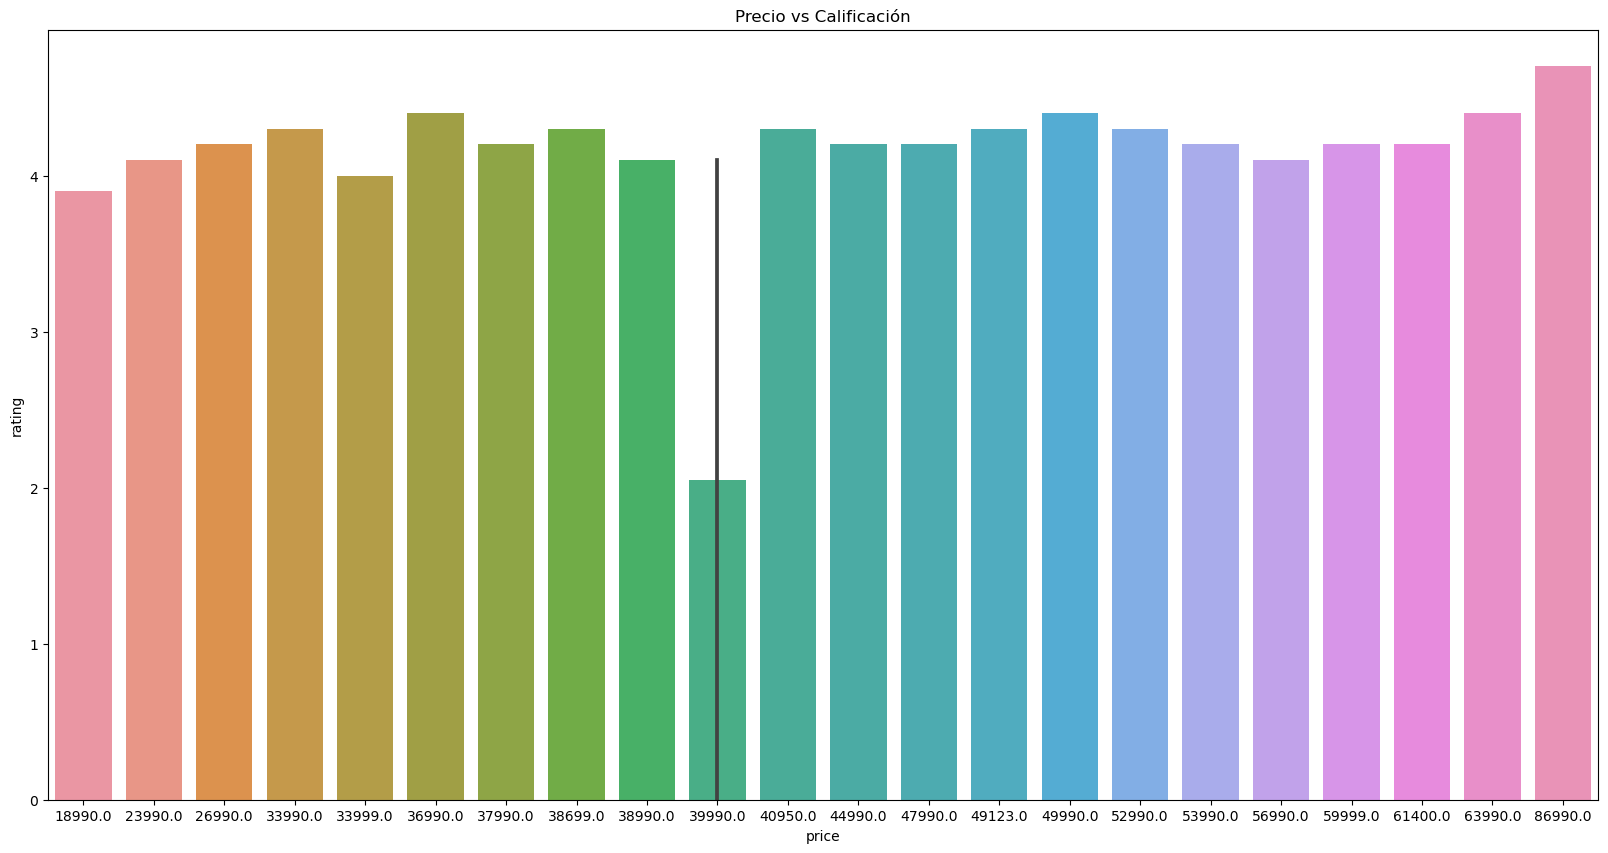

In [120]:
#<COMPLETA>

Text(0.5, 1.0, 'Calificación vs Precio')

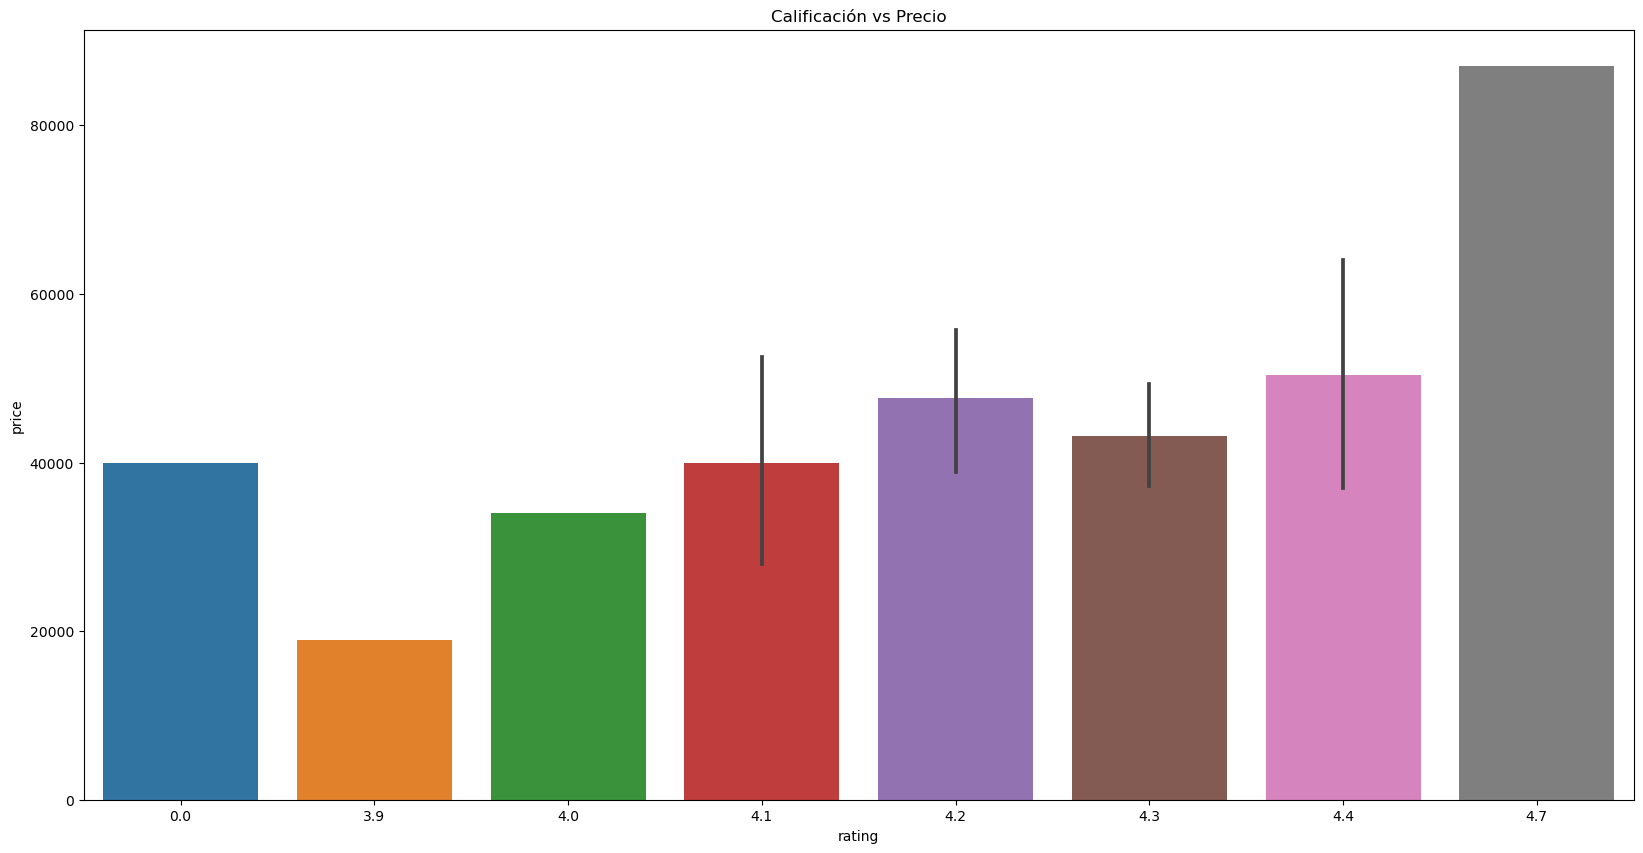

In [121]:
#<COMPLETA>

Podemos concluir a partir de aquí que los productos con precios más altos tienen calificaciones más altas hasta cierto punto.

Text(0.5, 1.0, 'Box plot')

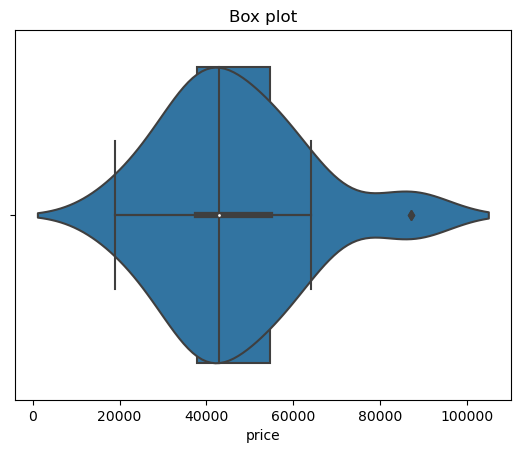

In [123]:
#<COMPLETA>

## ¿Les ha salido algún discordante visual a ustedes?

In [124]:
#<COMPLETA>

,rating,price,model,RAM,Storage,System,Other_Info
3,4.7,86990.0,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur,MGN63HN/A
10,4.4,63990.0,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,8 GB,512 GB SSD,Windows 11 Ho...,NaN
13,4.7,86990.0,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur,MGN93HN/A
23,4.2,61400.0,HP 14s Intel Core i5 12th Gen,16 GB,512 GB SSD,Windows 11 Home,14s - dy5005TU Thin and Light Lapto...


### ¿Para ustedes, cuáles fueron las computadoras más caras?